# Updated Event Plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load Geometry Files

In [3]:
full_tank_geo_file_path = '/fast_scratch/WatChMaL/data/mPMT_full_geo.npz'
full_tank_geofile = np.load(full_tank_geo_file_path, allow_pickle=True)

In [4]:
geo_path = '/fast_scratch/WatChMaL/data/geo_mPMTshort.npz'
geofile = np.load(geo_path, allow_pickle=True)

# Load Full Tank Data and Find Parameters

In [5]:
full_tank_tubes = full_tank_geofile[ 'tube_no' ]

full_tank_tube_xyz = full_tank_geofile[ 'position' ]
full_tank_tube_x   = full_tank_tube_xyz[:,0]
full_tank_tube_y   = full_tank_tube_xyz[:,1]
full_tank_tube_z   = full_tank_tube_xyz[:,2]
R =  (full_tank_tube_x.max() - full_tank_tube_x.min())/2.0

full_tank_tube_dir = full_tank_geofile[ 'orientation']

# Load Short Tank Data and Find Parameters

In [6]:
tubes = geofile[ 'tube_no' ]

tube_xyz = geofile[ 'position' ]
tube_x   = tube_xyz[:,0]
tube_y   = tube_xyz[:,1]
tube_z   = tube_xyz[:,2]

R =  (tube_x.max() - tube_x.min())/2.0

tube_dir = geofile[ 'orientation']

In [7]:
print("Short tank dimensions: ")
print(tube_x.max())
print(tube_y.max())
print(tube_z.max())
print("R: ", R)

Short tank dimensions: 
399.0980529785156
296.4490661621094
399.0980529785156
R:  399.0980529785156


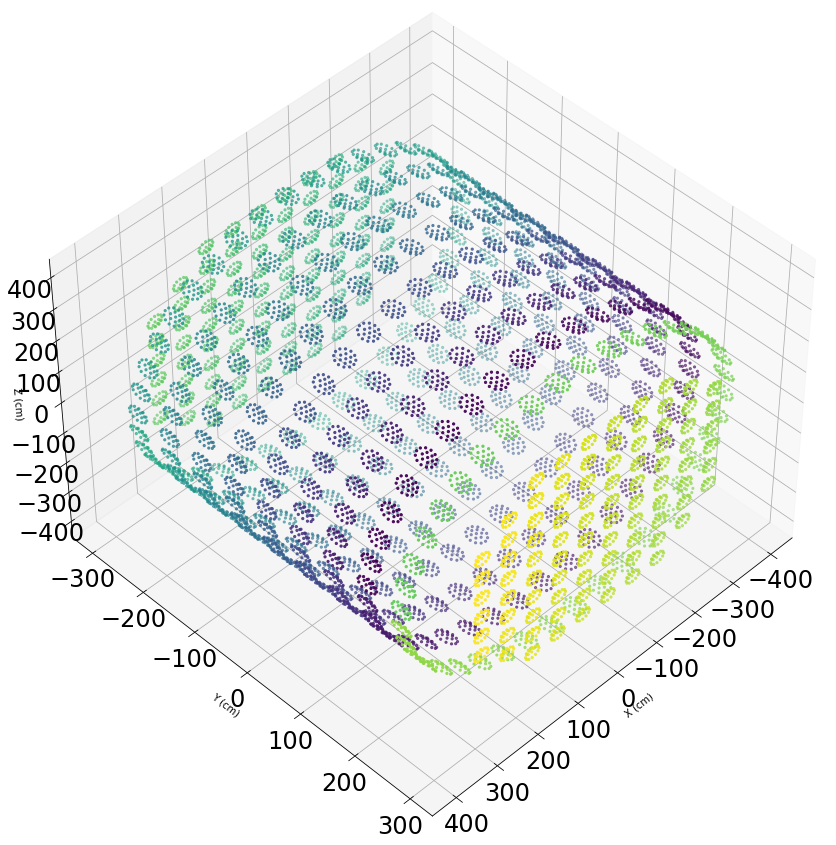

In [43]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( tube_x, tube_y, tube_z, marker='.', c=tubes - 1, cmap=plt.cm.viridis, label='short'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()

# Display 3D Plots

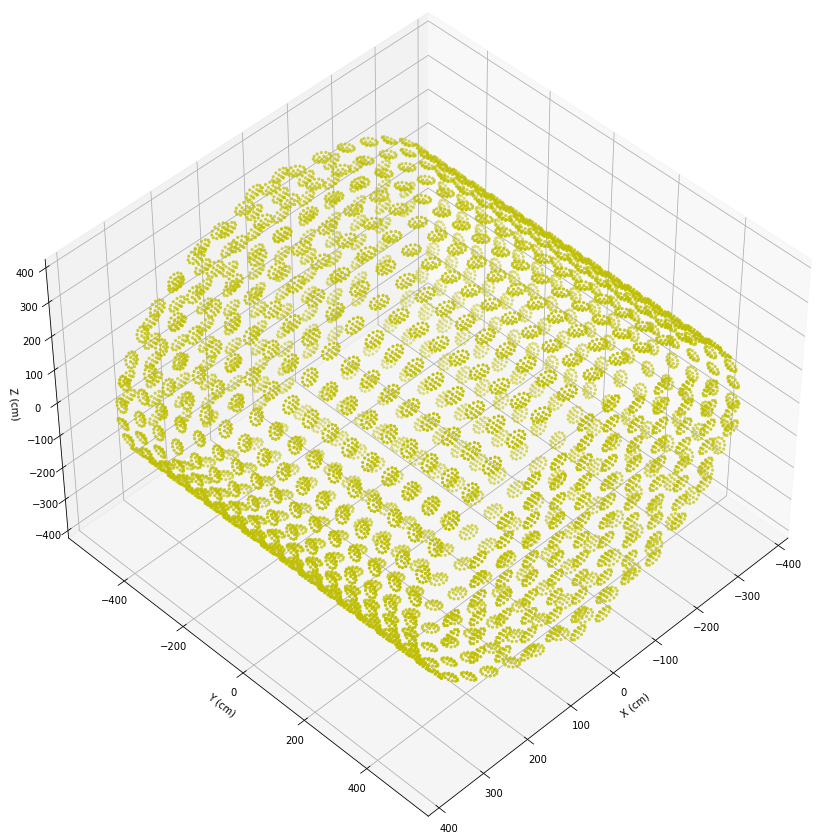

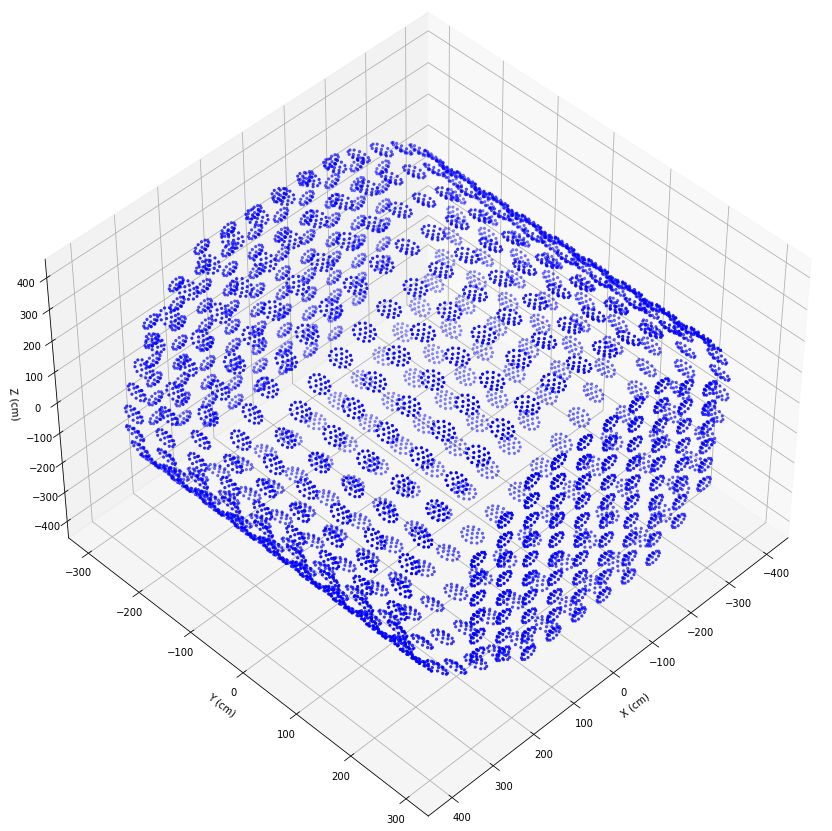

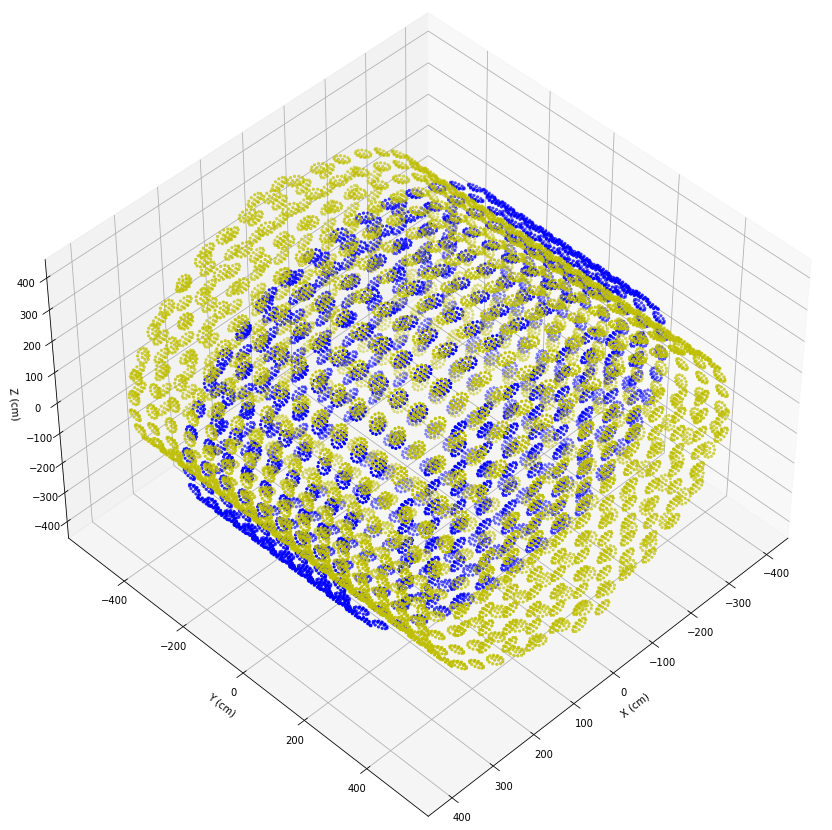

In [8]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( full_tank_tube_x, full_tank_tube_y, full_tank_tube_z, marker='.', c='y', label='full'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()

fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( tube_x, tube_y, tube_z, marker='.', c='b', label='short'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()


fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter( tube_x, tube_y, tube_z, marker='.', c='b', label='short'  )
ax.scatter( full_tank_tube_x, full_tank_tube_y, full_tank_tube_z, marker='.', c='y', label='full'  )
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.view_init(elev=45.0, azim=45.0)
plt.show()

In [9]:
sys.path.append("../..")

NameError: name 'sys' is not defined

In [ ]:
print(tube_x.shape)

In [10]:
import sys

In [14]:
sys.path.append('/home/jtindall/WatChMaL_analysis/')
sys.path.append('/home/jtindall/WatChMaL_analysis/WatChMaL')

In [15]:
from WatChMaL.analysis.event_analysis.EventPlotter import EventPlotter

In [16]:
plotter = EventPlotter(h5_path='/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5',
                       mpmt_positions_file='/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', 
                       geo_path='/fast_scratch/WatChMaL/data/geo_mPMTshort.npz')

<Figure size 432x288 with 0 Axes>

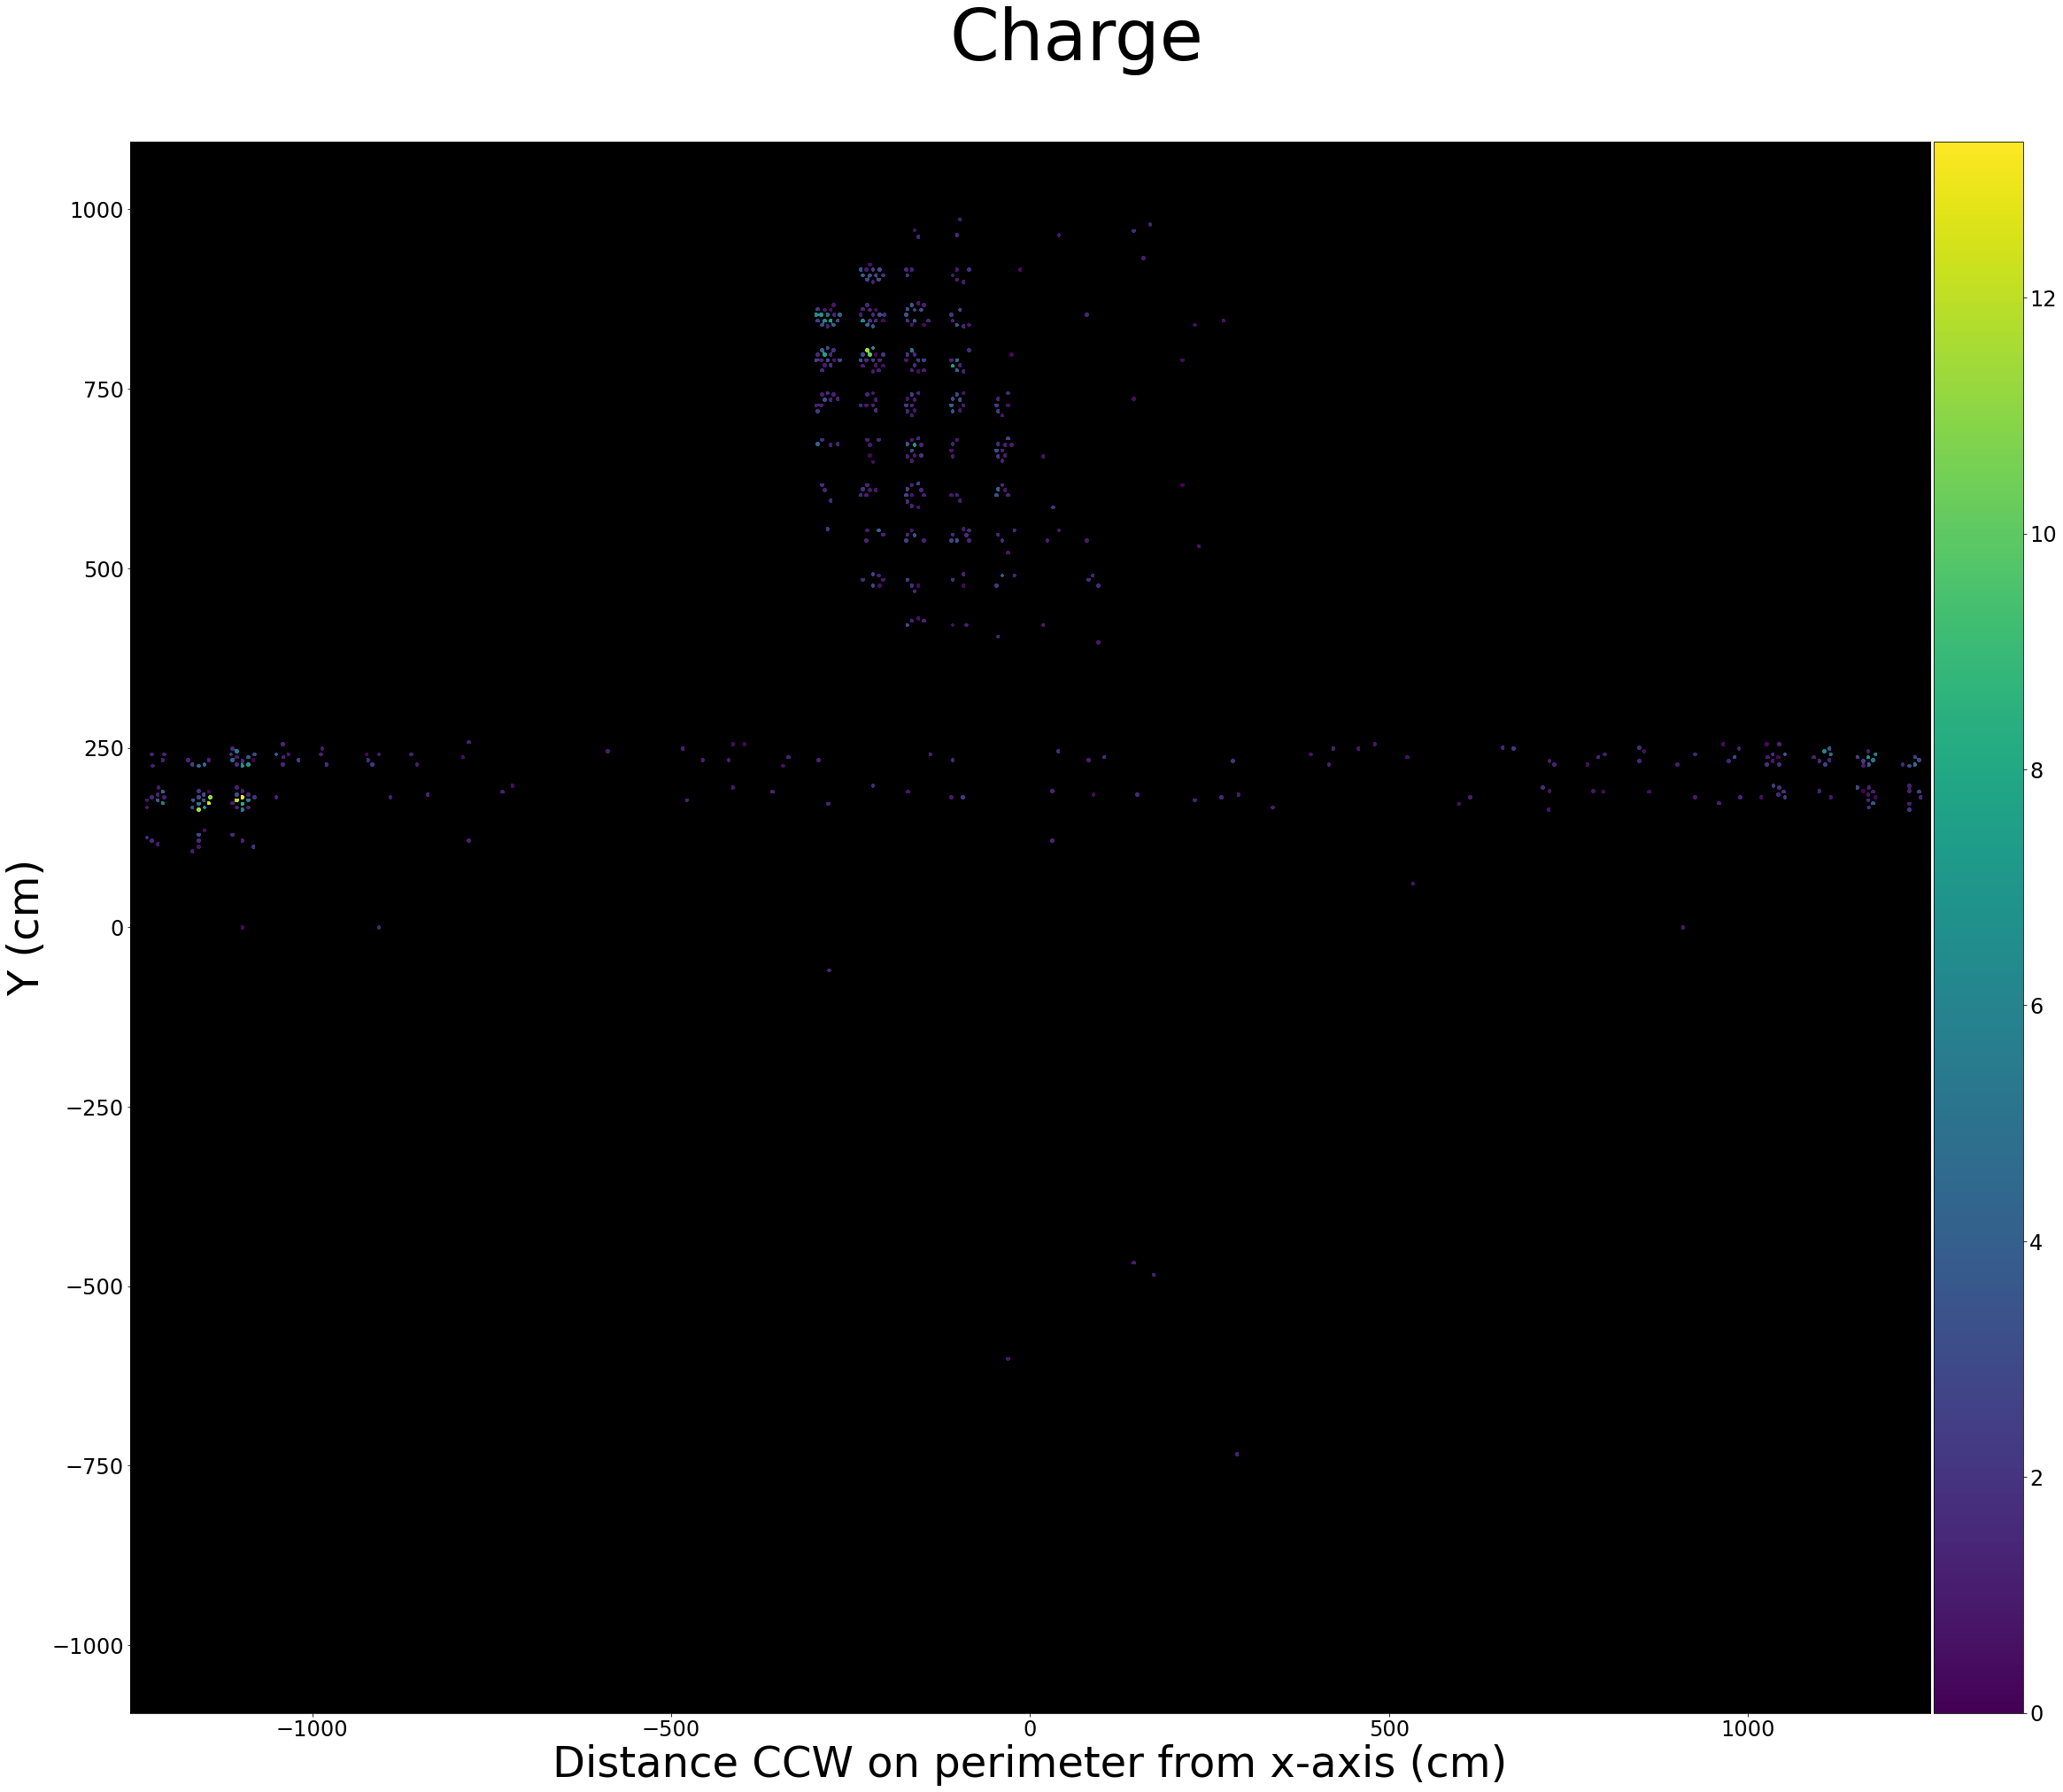

In [45]:
plotter.display_event(100, dark=True)

In [31]:
corrected_tubes = tubes - 1

<Figure size 432x288 with 0 Axes>

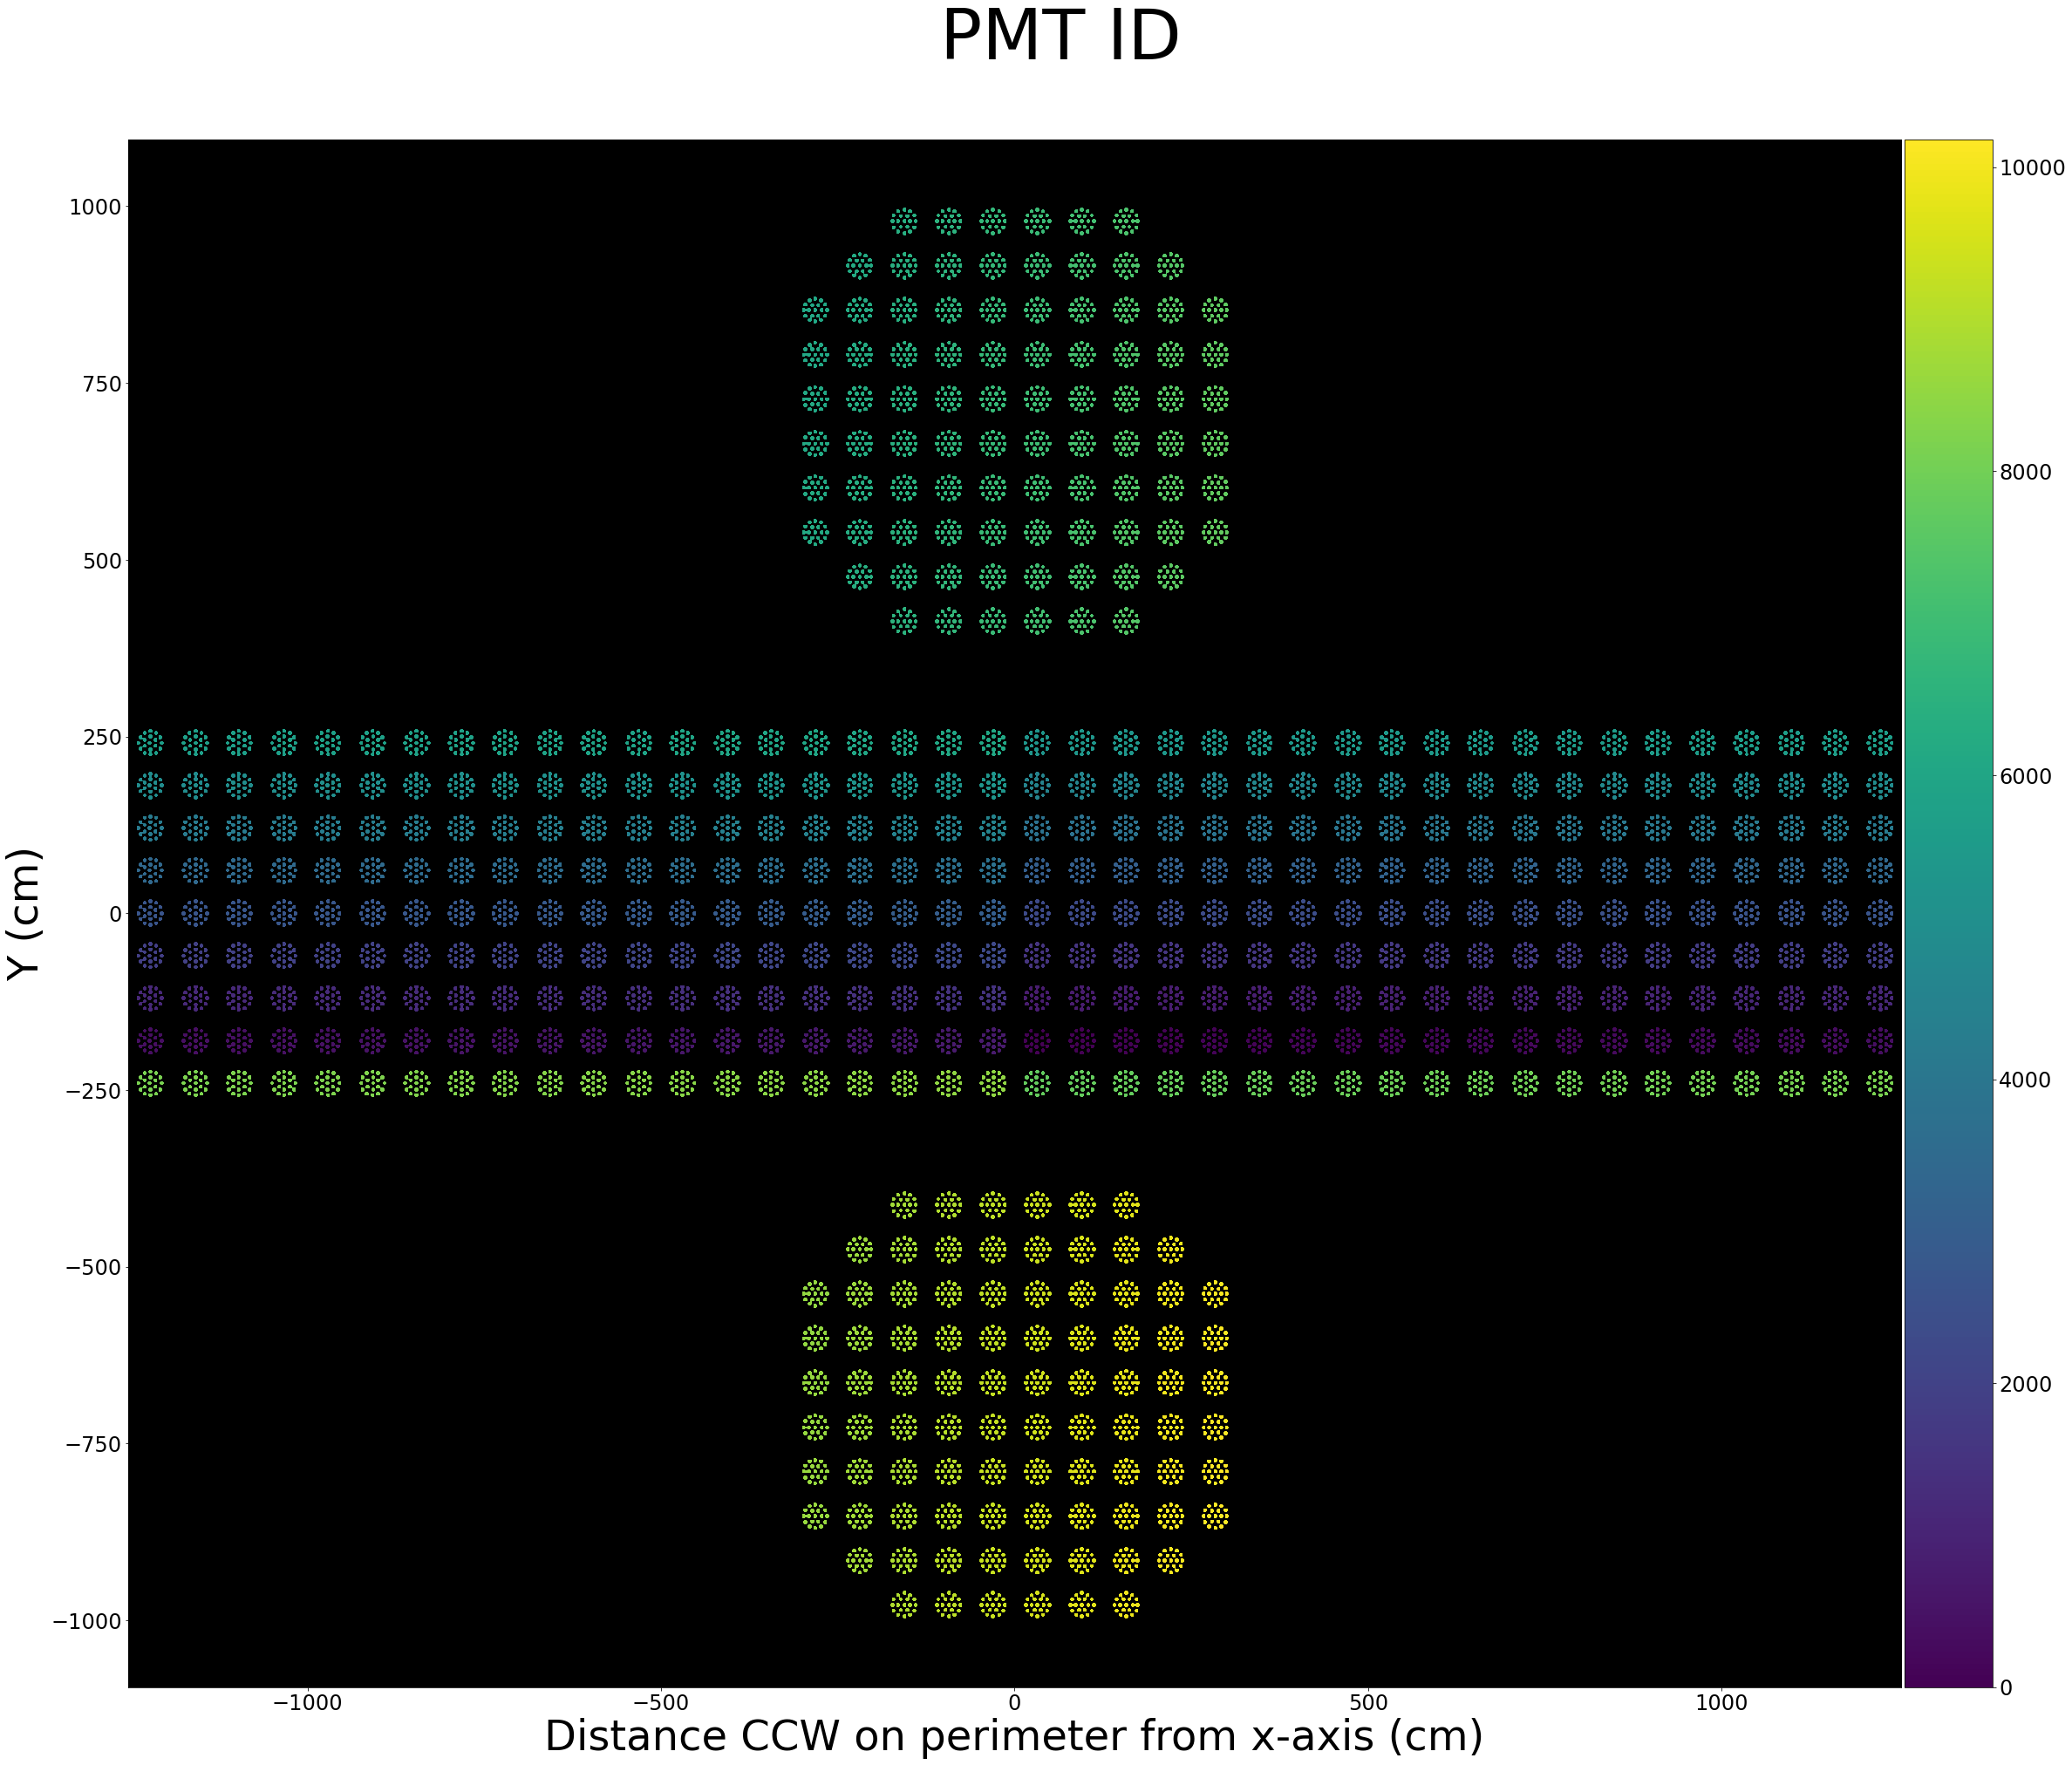

In [32]:
plotter.display_data(corrected_tubes, corrected_tubes, title='PMT ID', dark=True)

In [33]:
sample_channel_data = plotter.dataset.process_data(corrected_tubes, corrected_tubes)

In [34]:
print(sample_channel_data.shape)

(19, 29, 40)


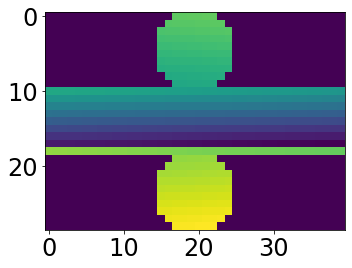

In [41]:
fig, ax = plt.subplots()
ax.imshow(sample_channel_data[0])
fig.set_facecolor("white")
plt.show()

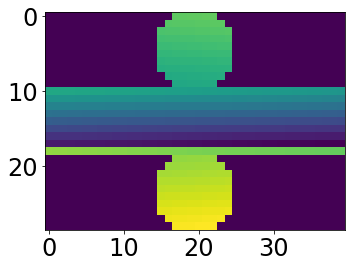

In [40]:
plt.imshow(sample_channel_data[0])

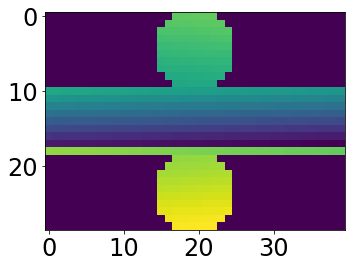

In [38]:

plt.imshow(sample_channel_data[1])
plt.imshow(sample_channel_data[2])
plt.imshow(sample_channel_data[3])
plt.show()

<Figure size 432x288 with 0 Axes>

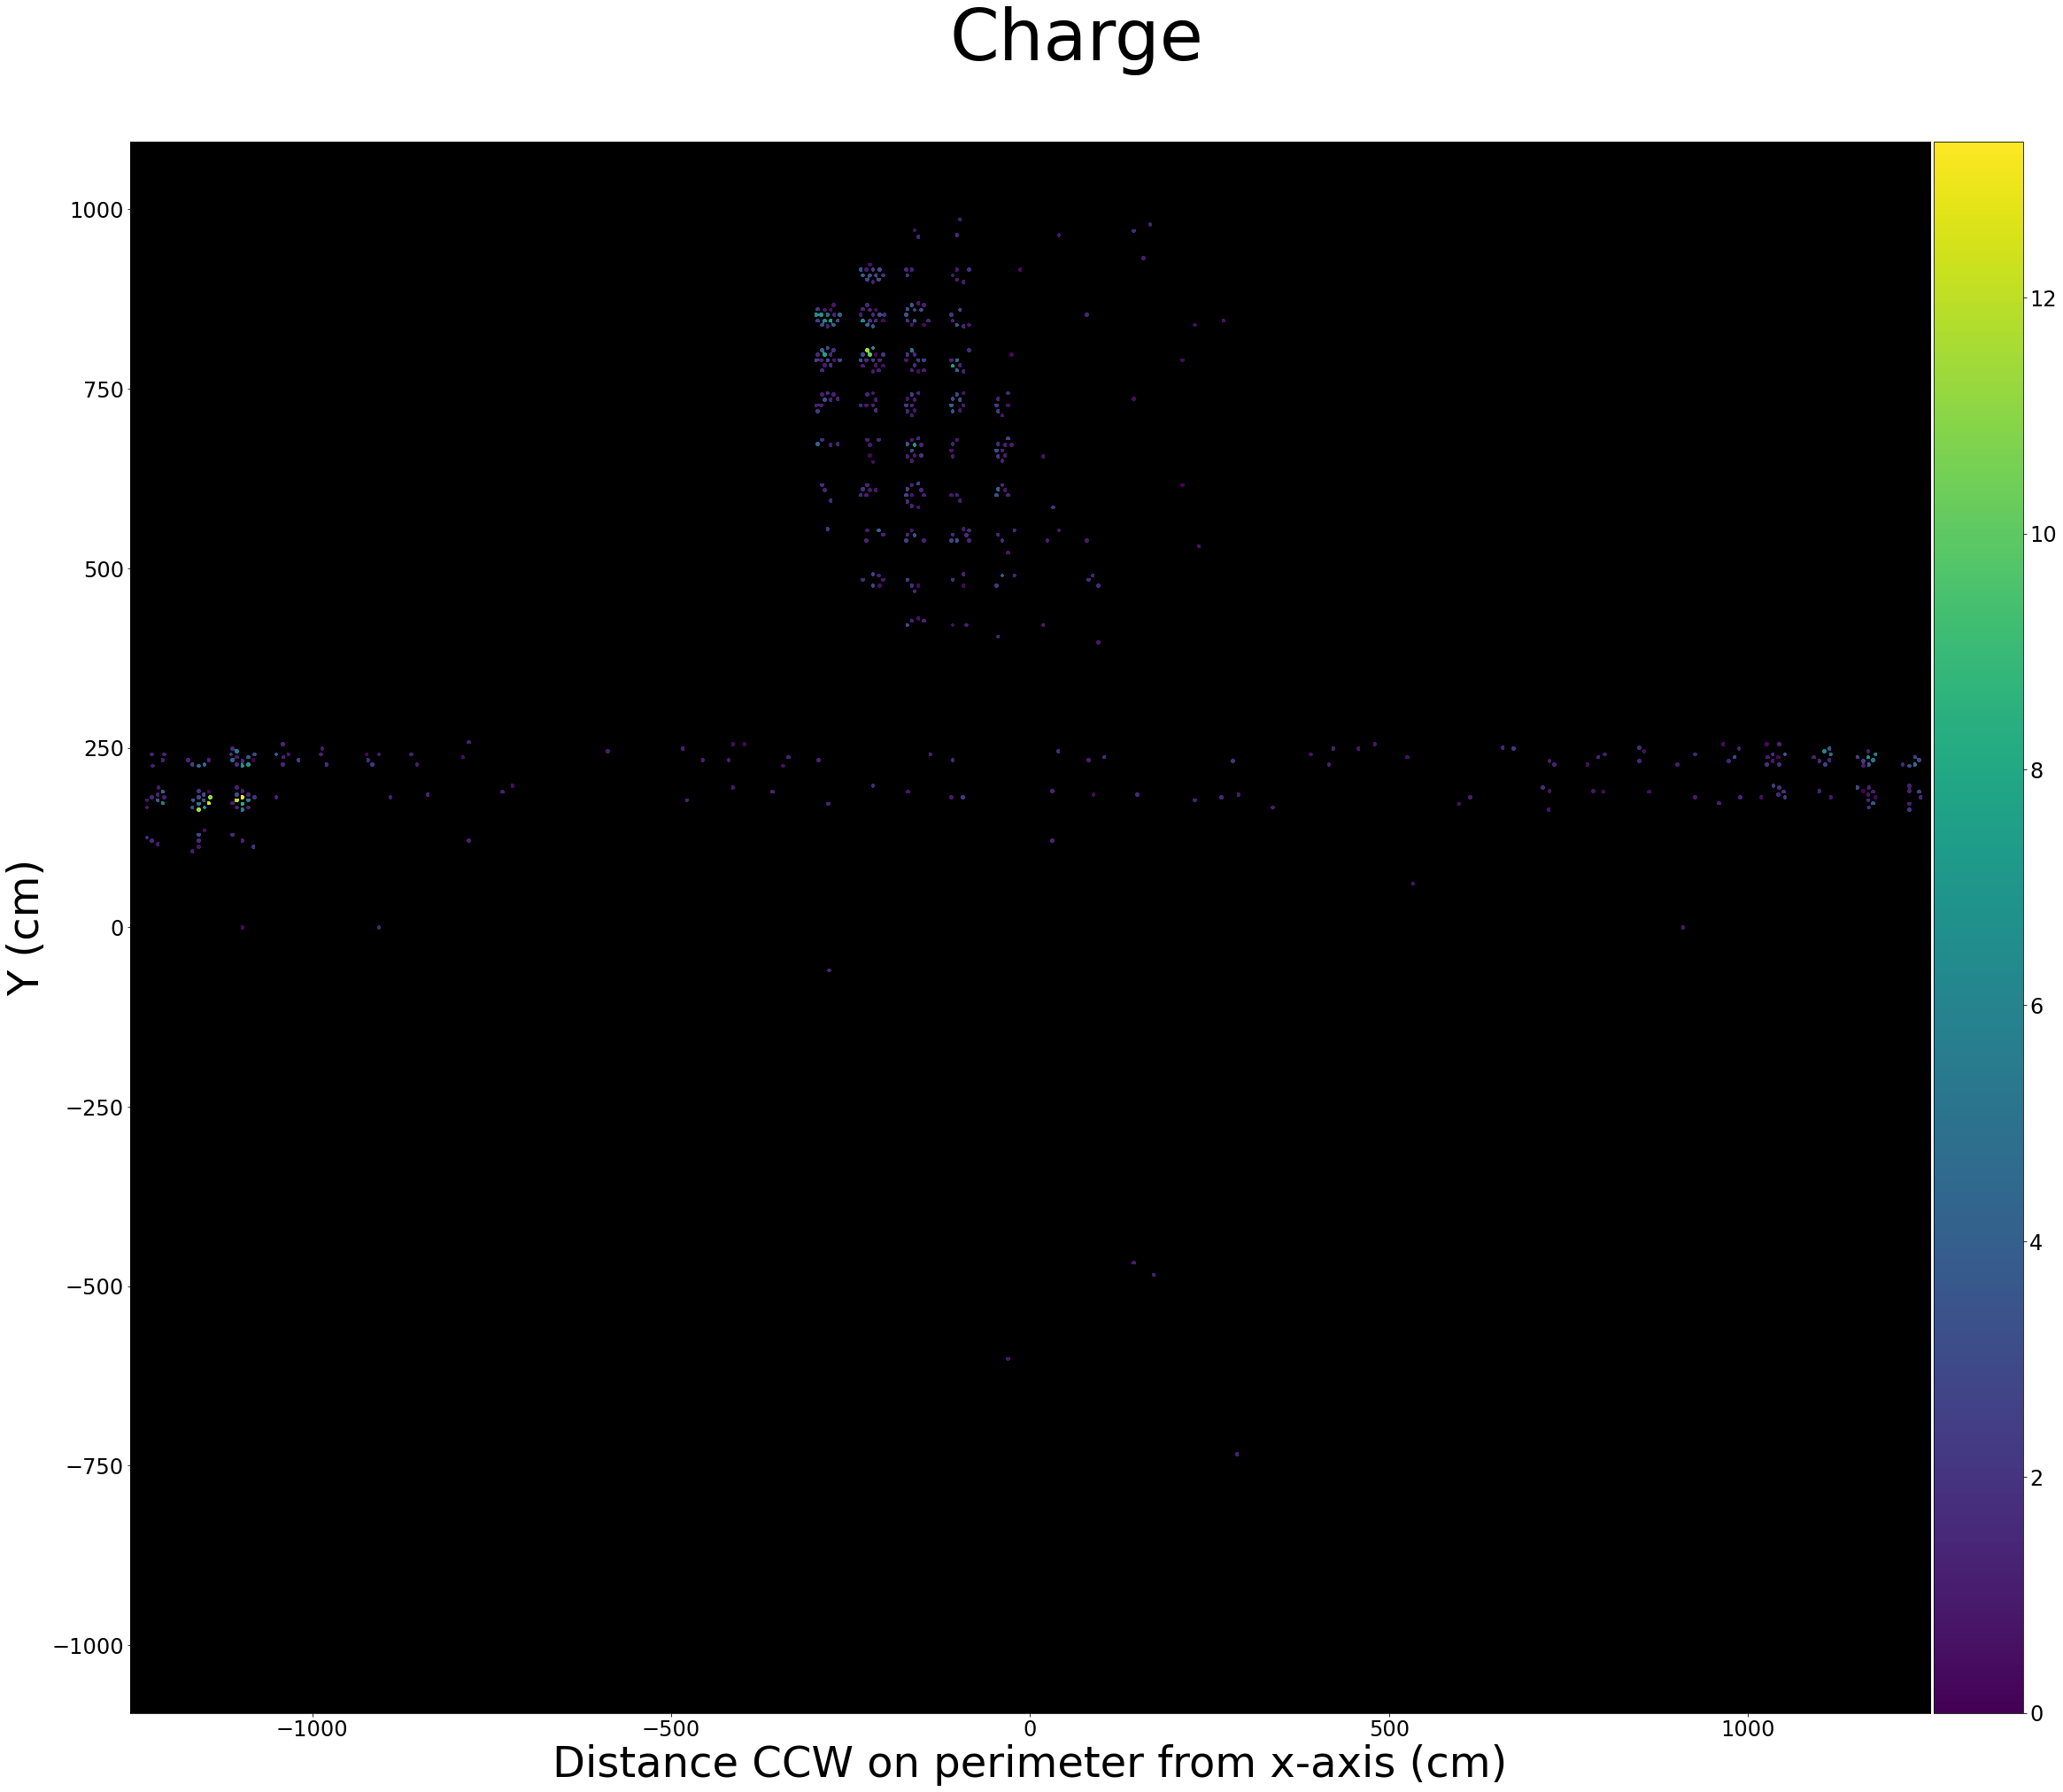

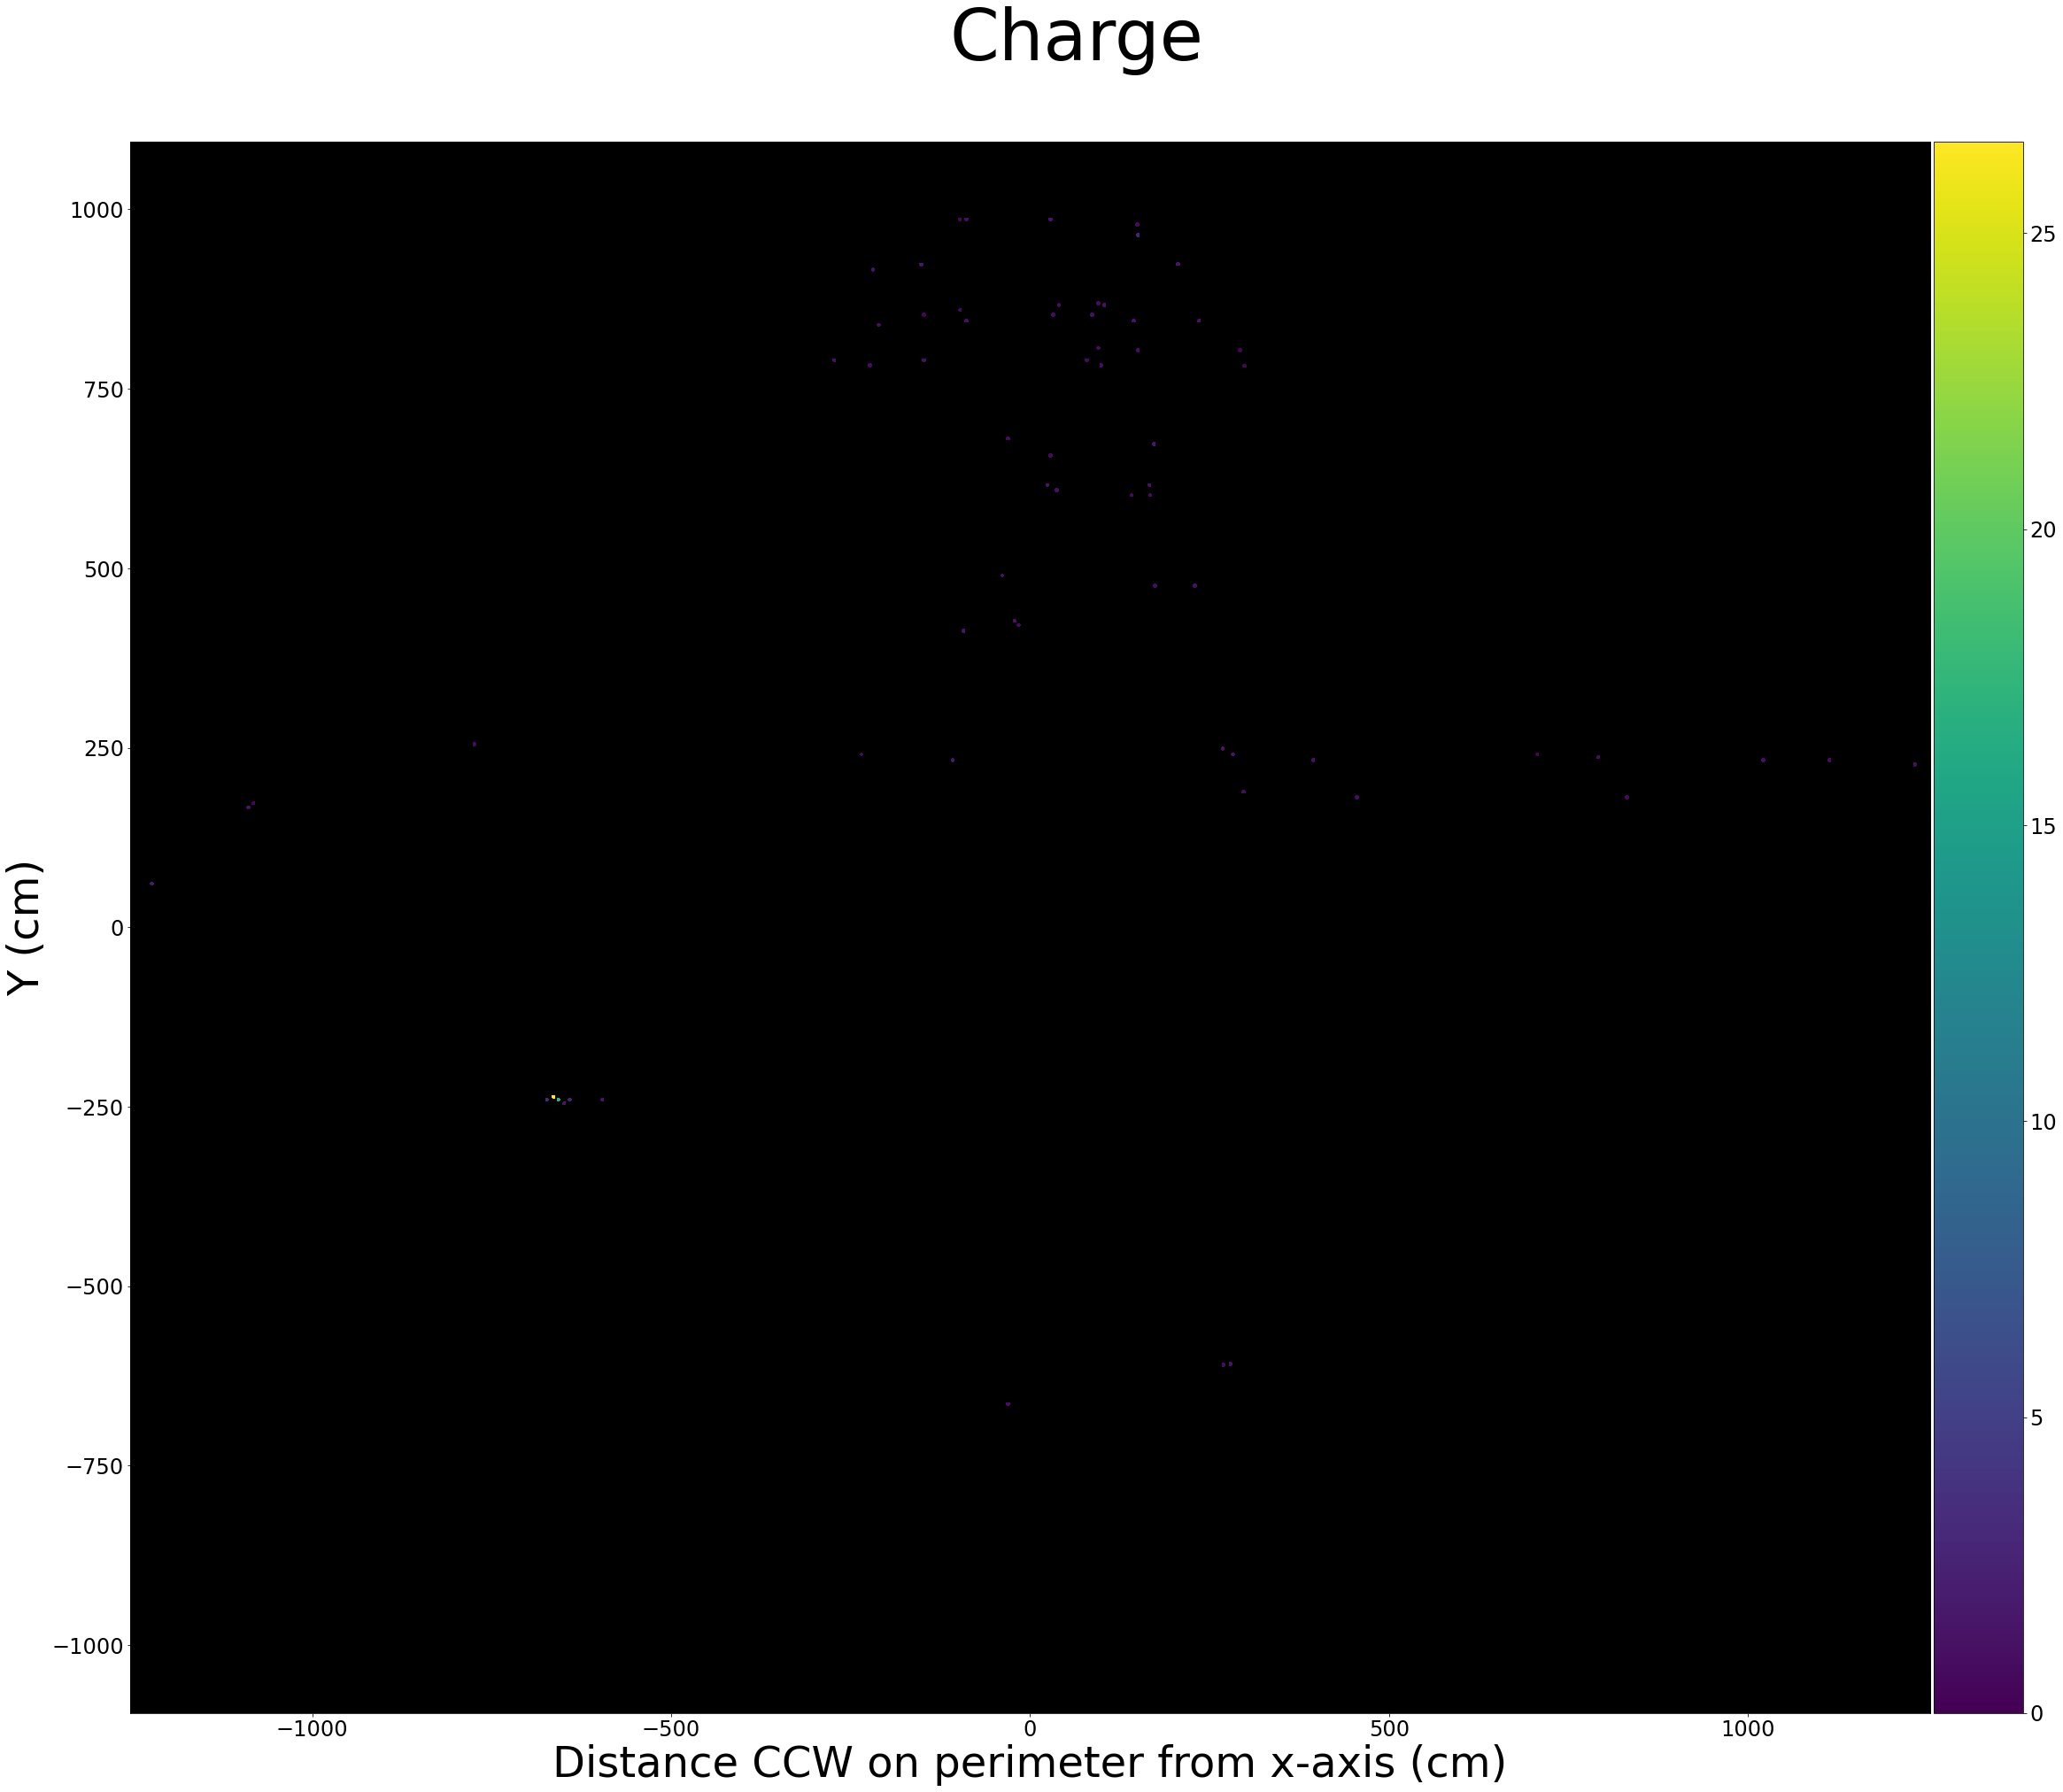

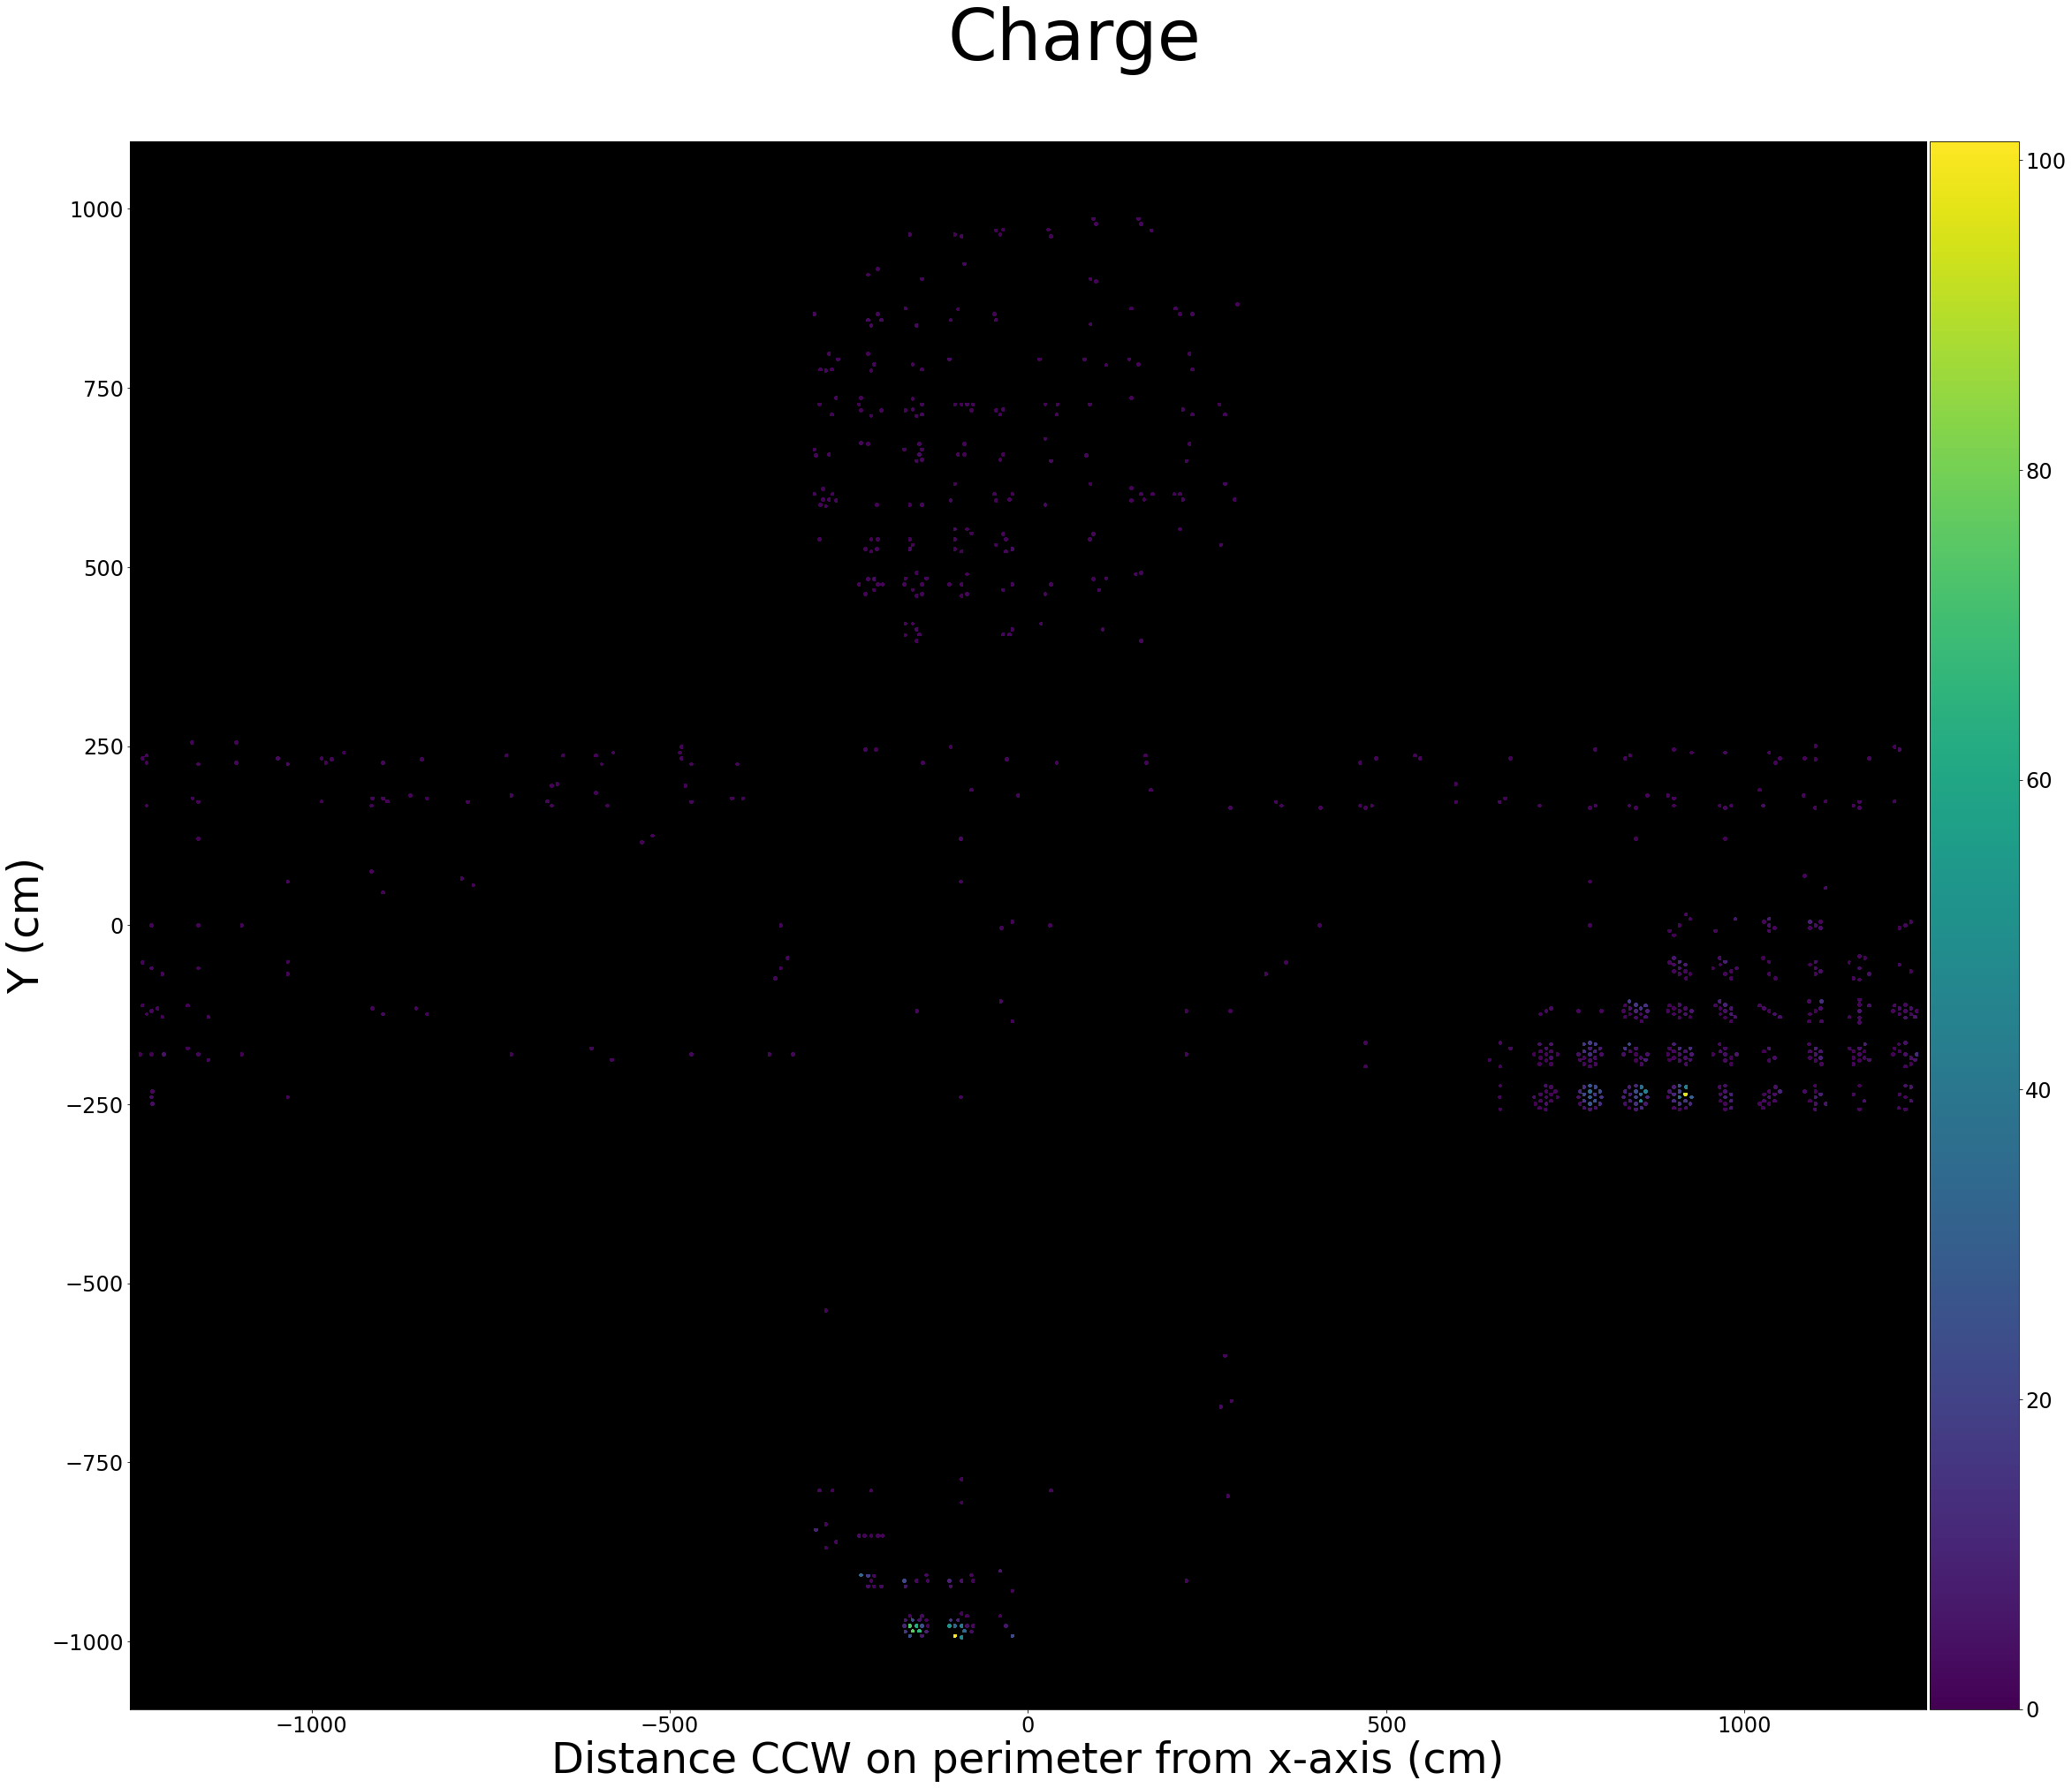

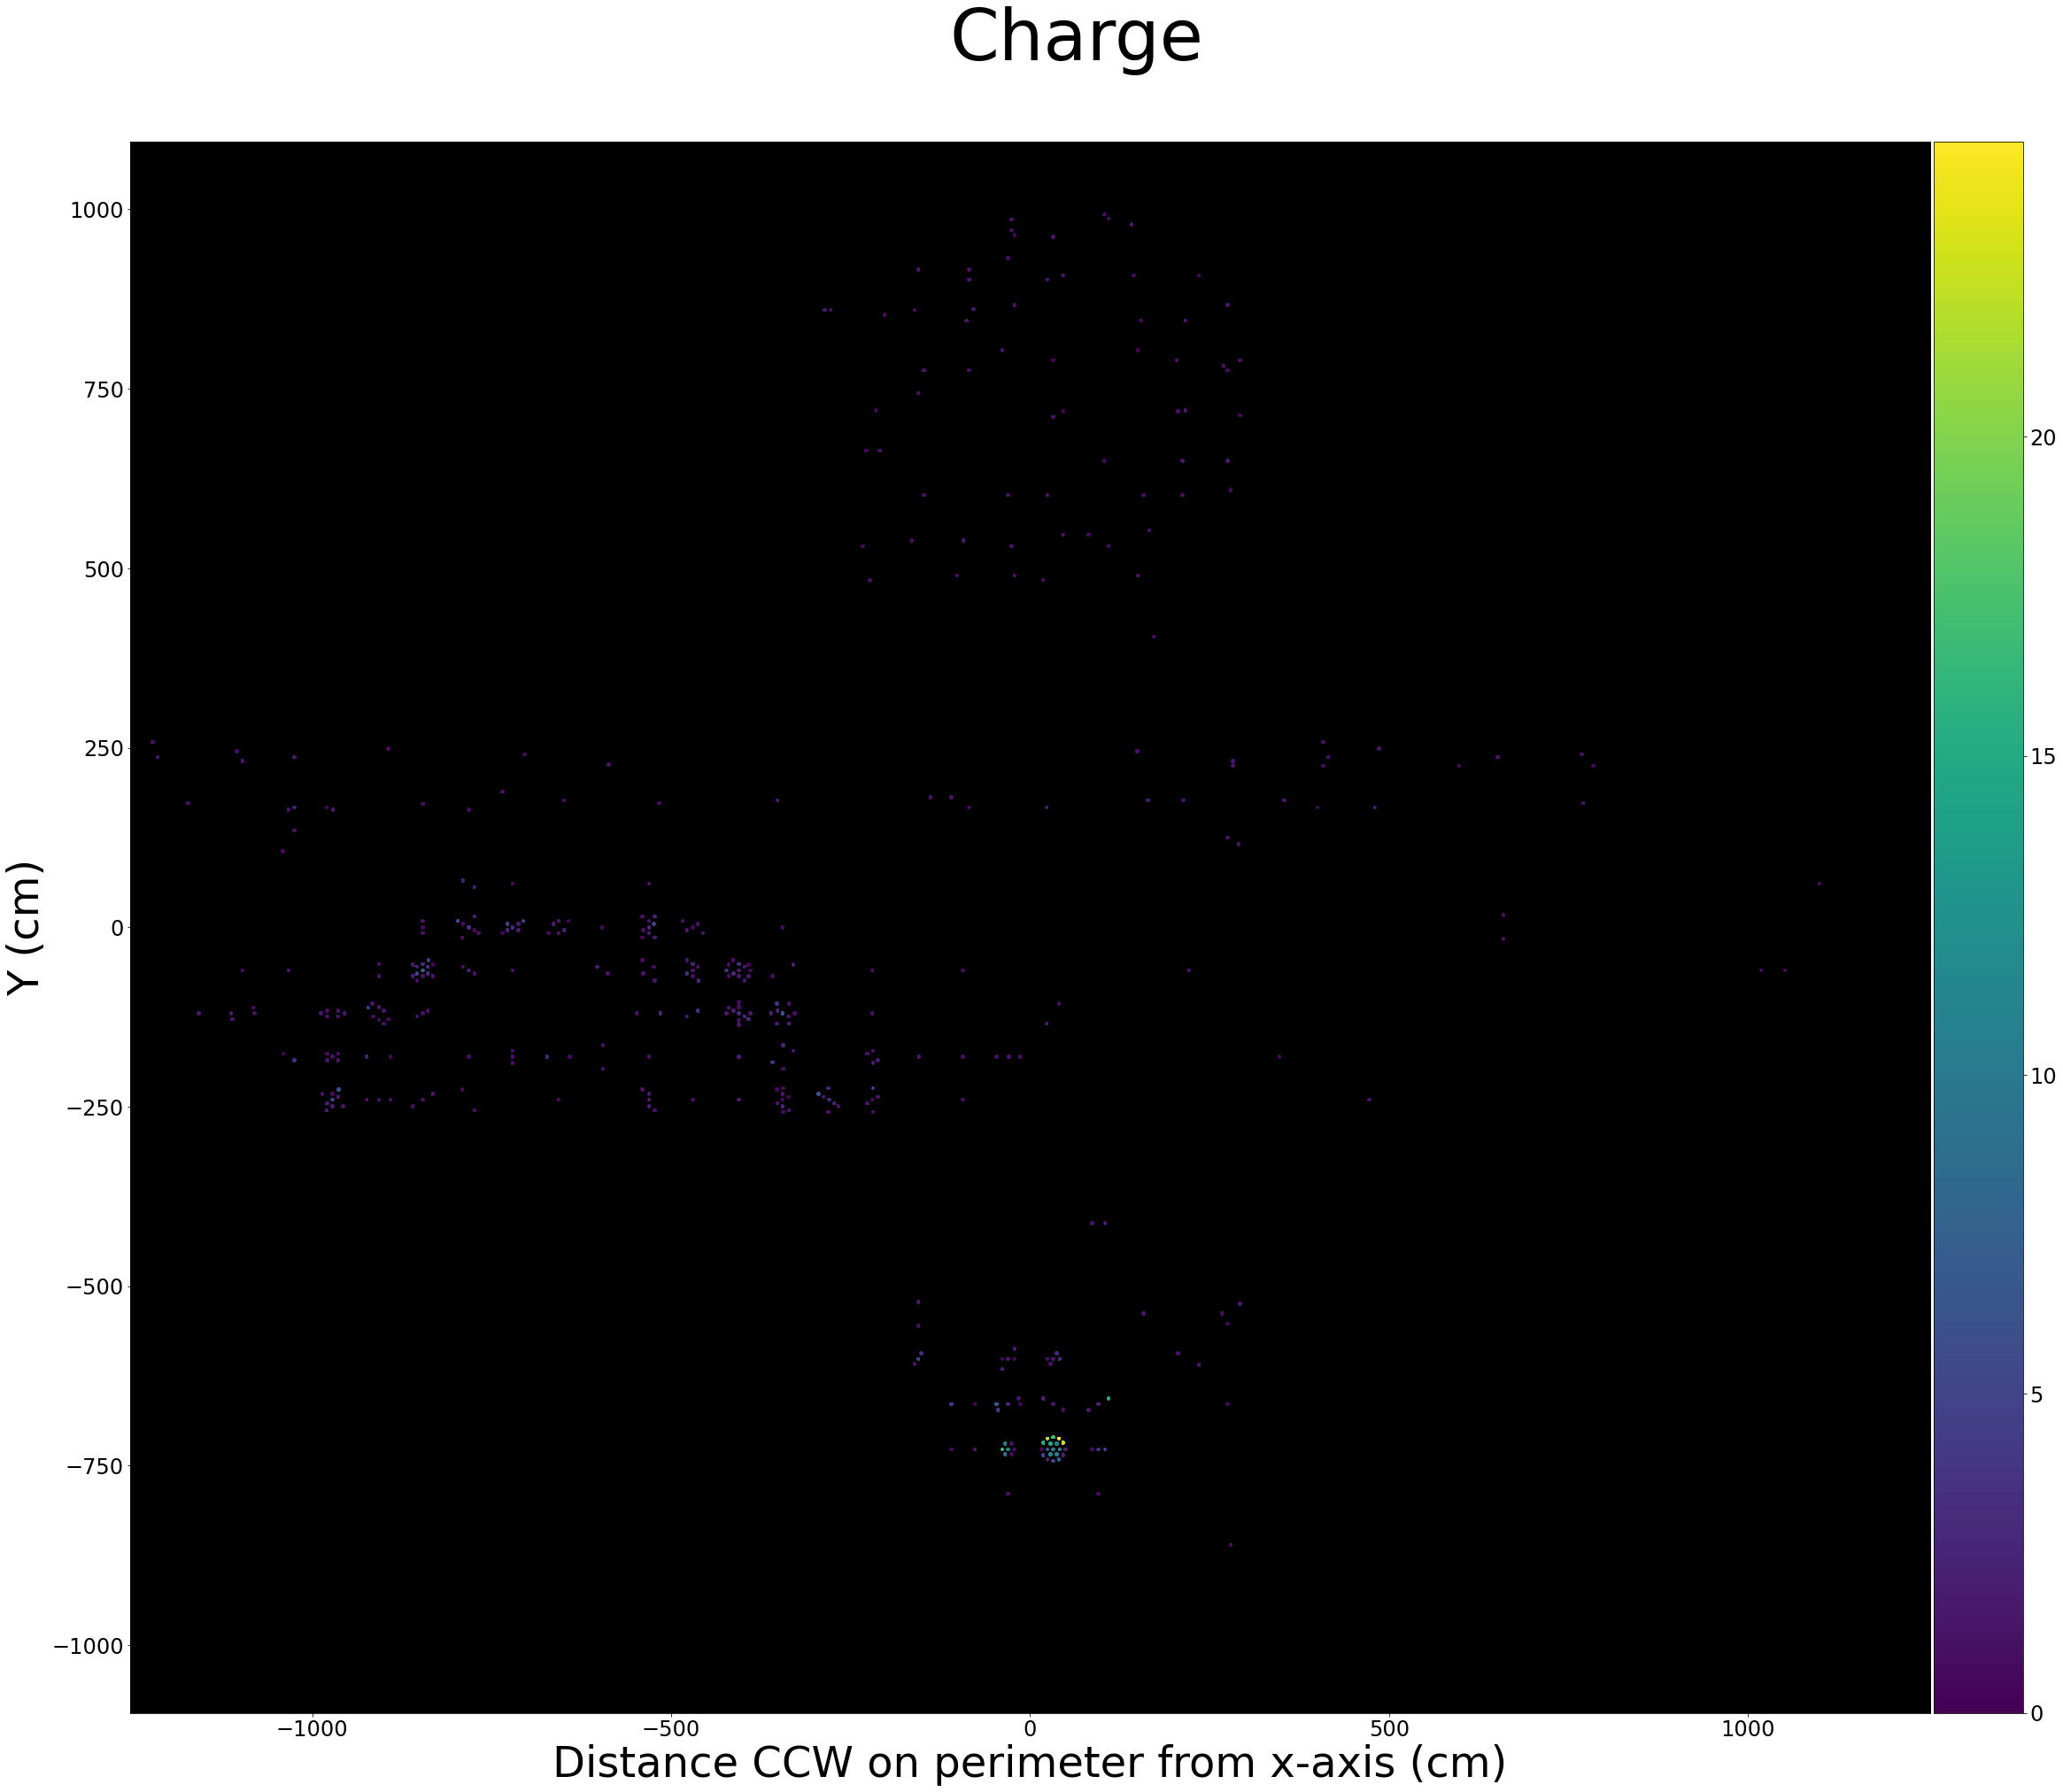

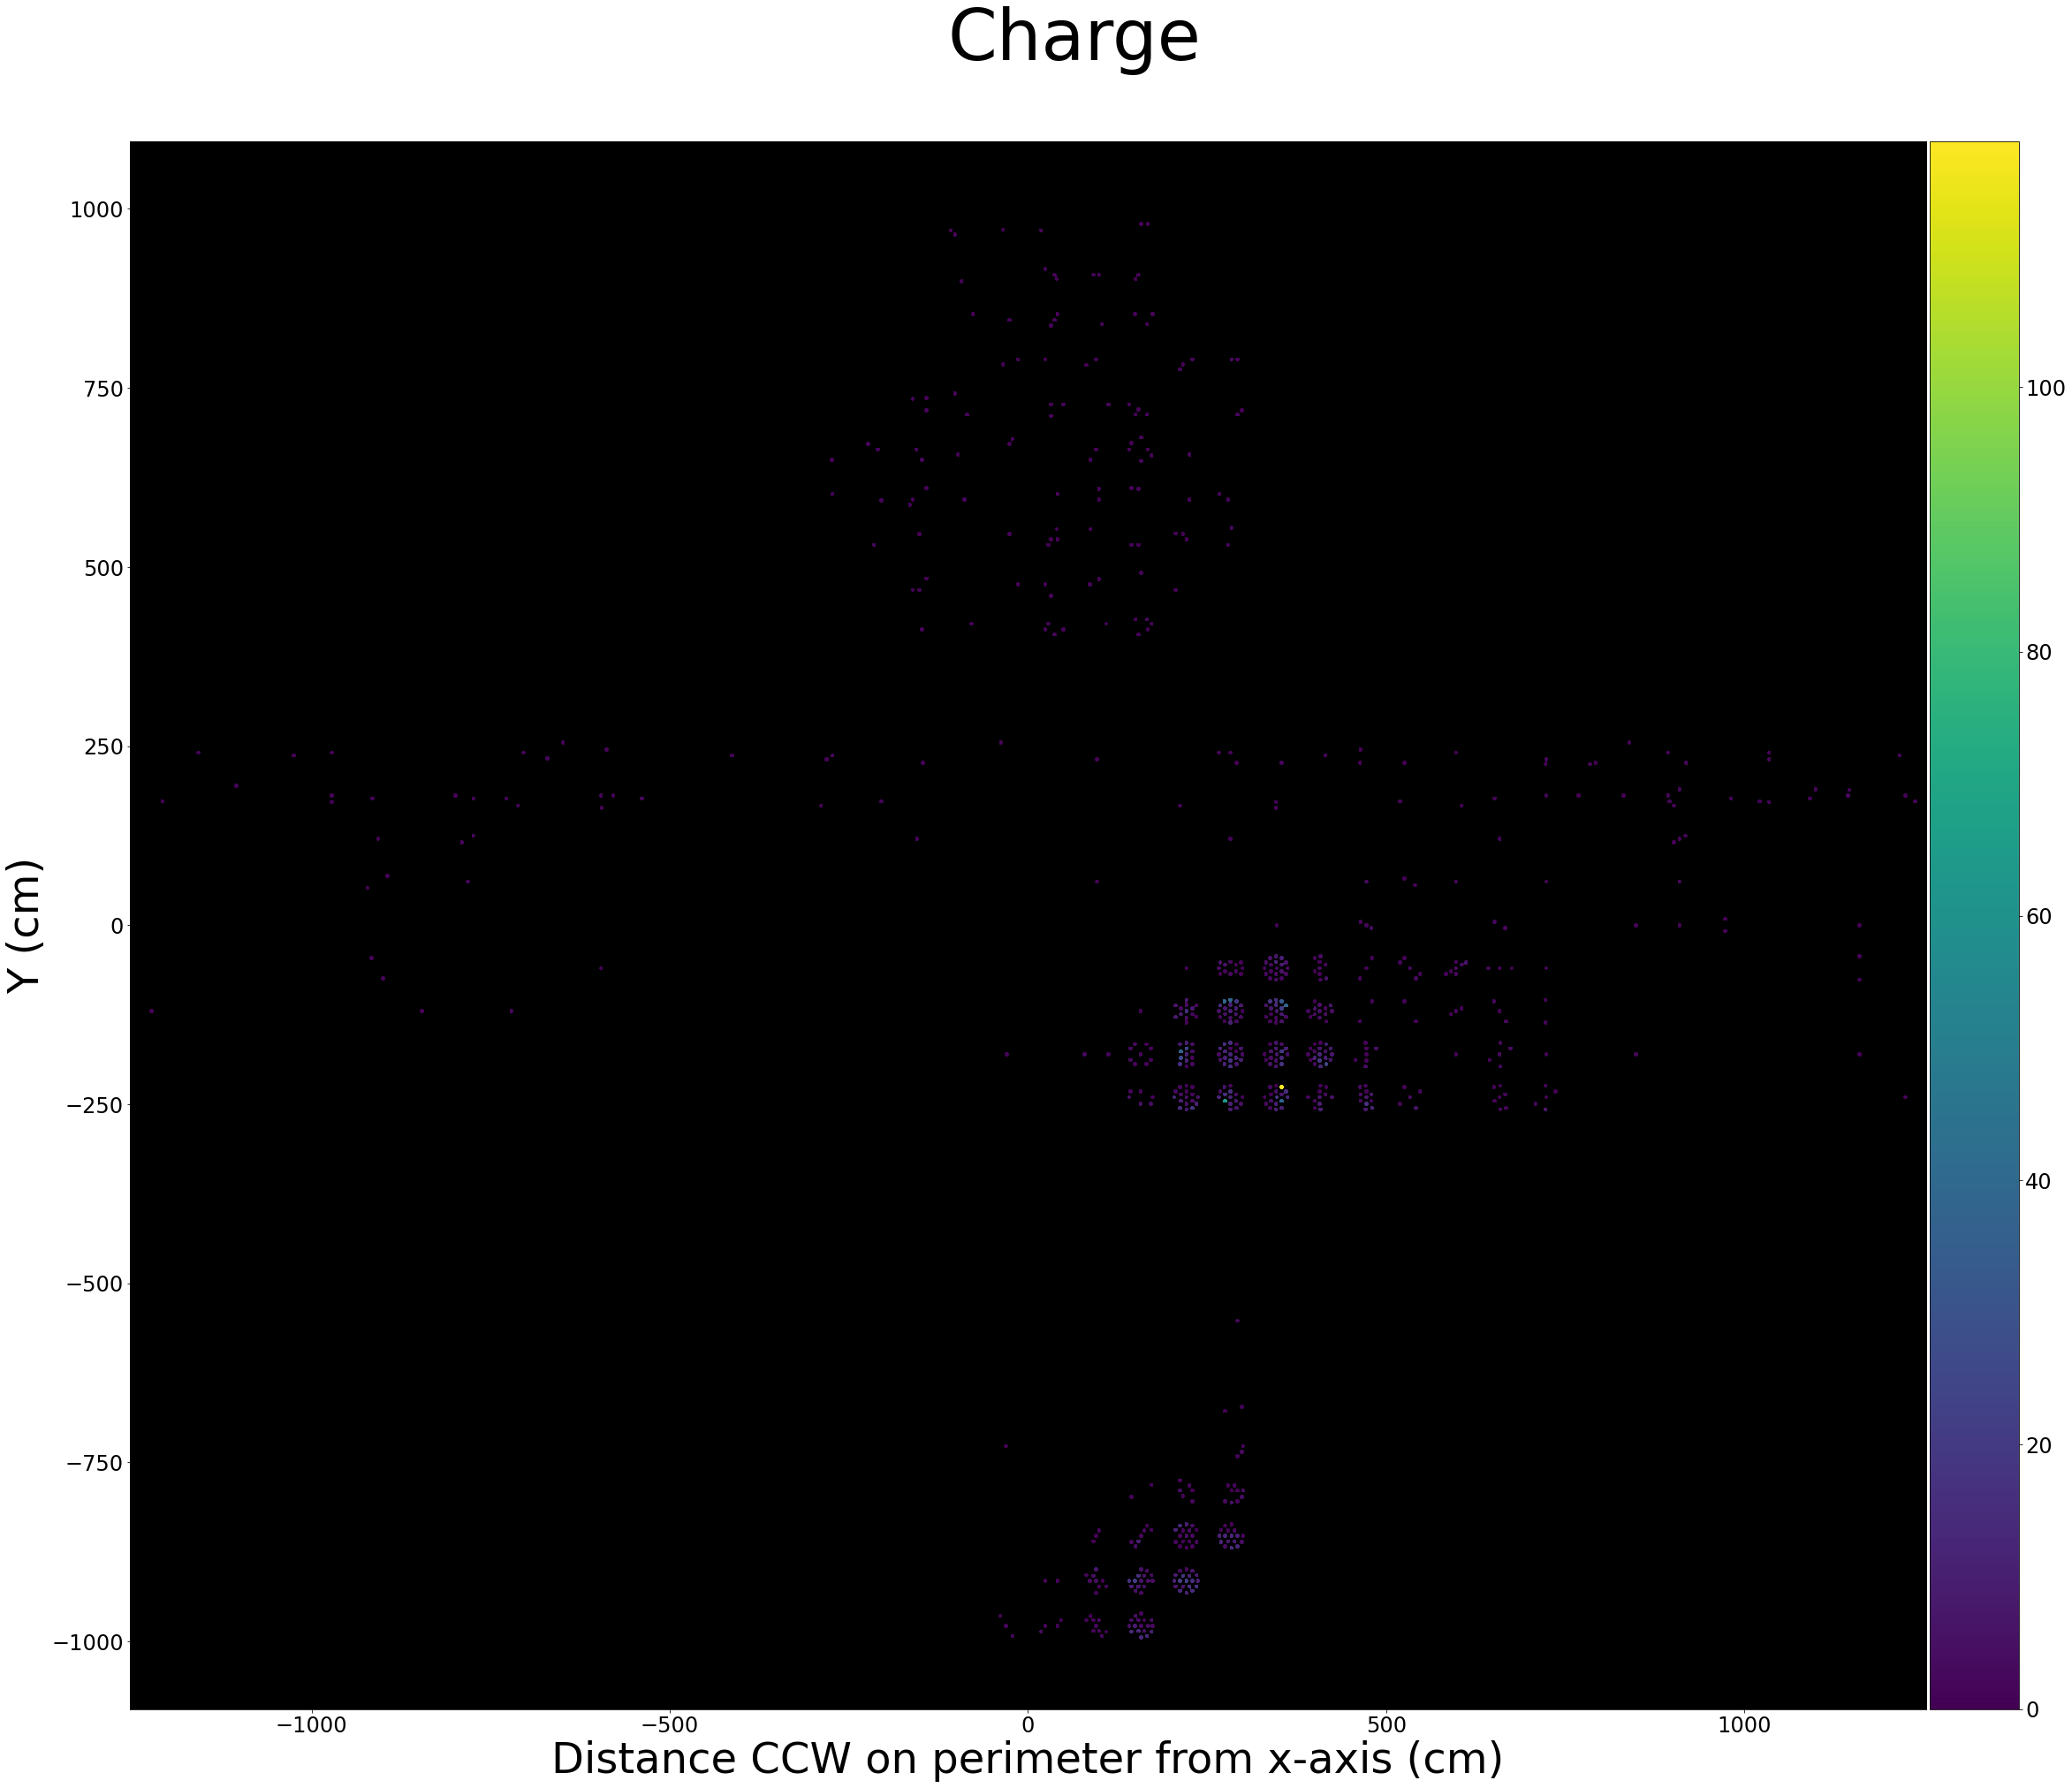

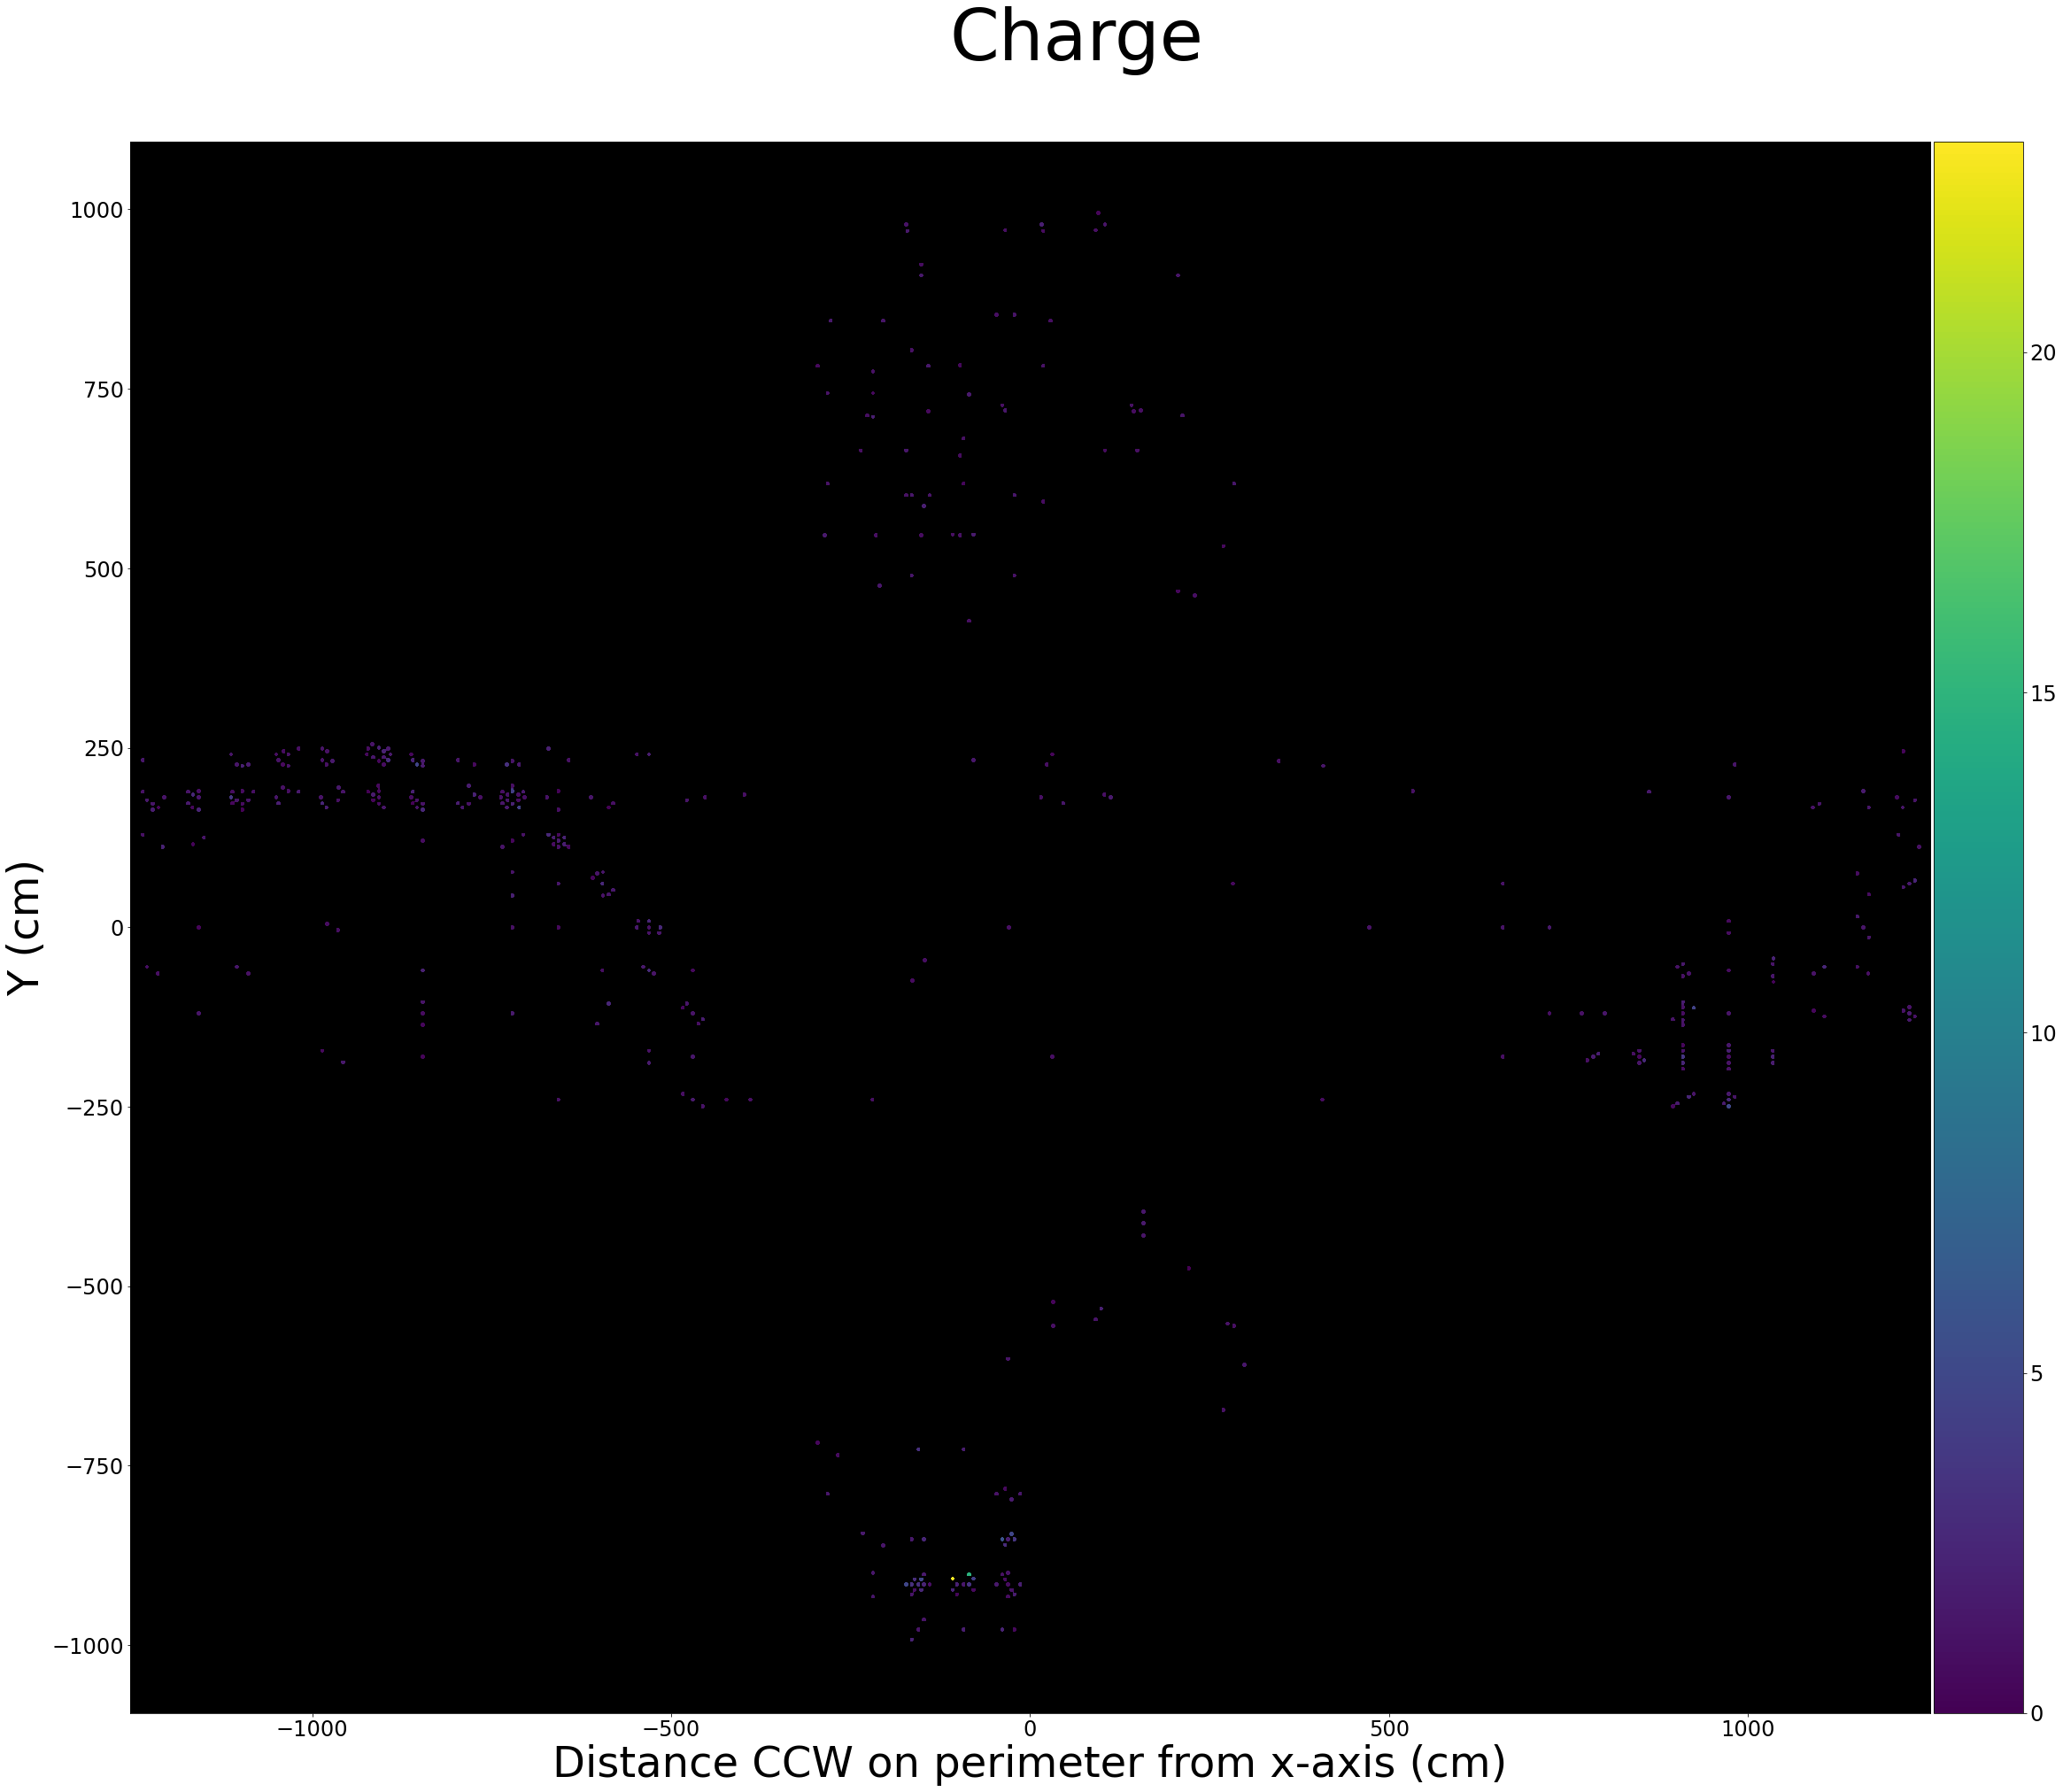

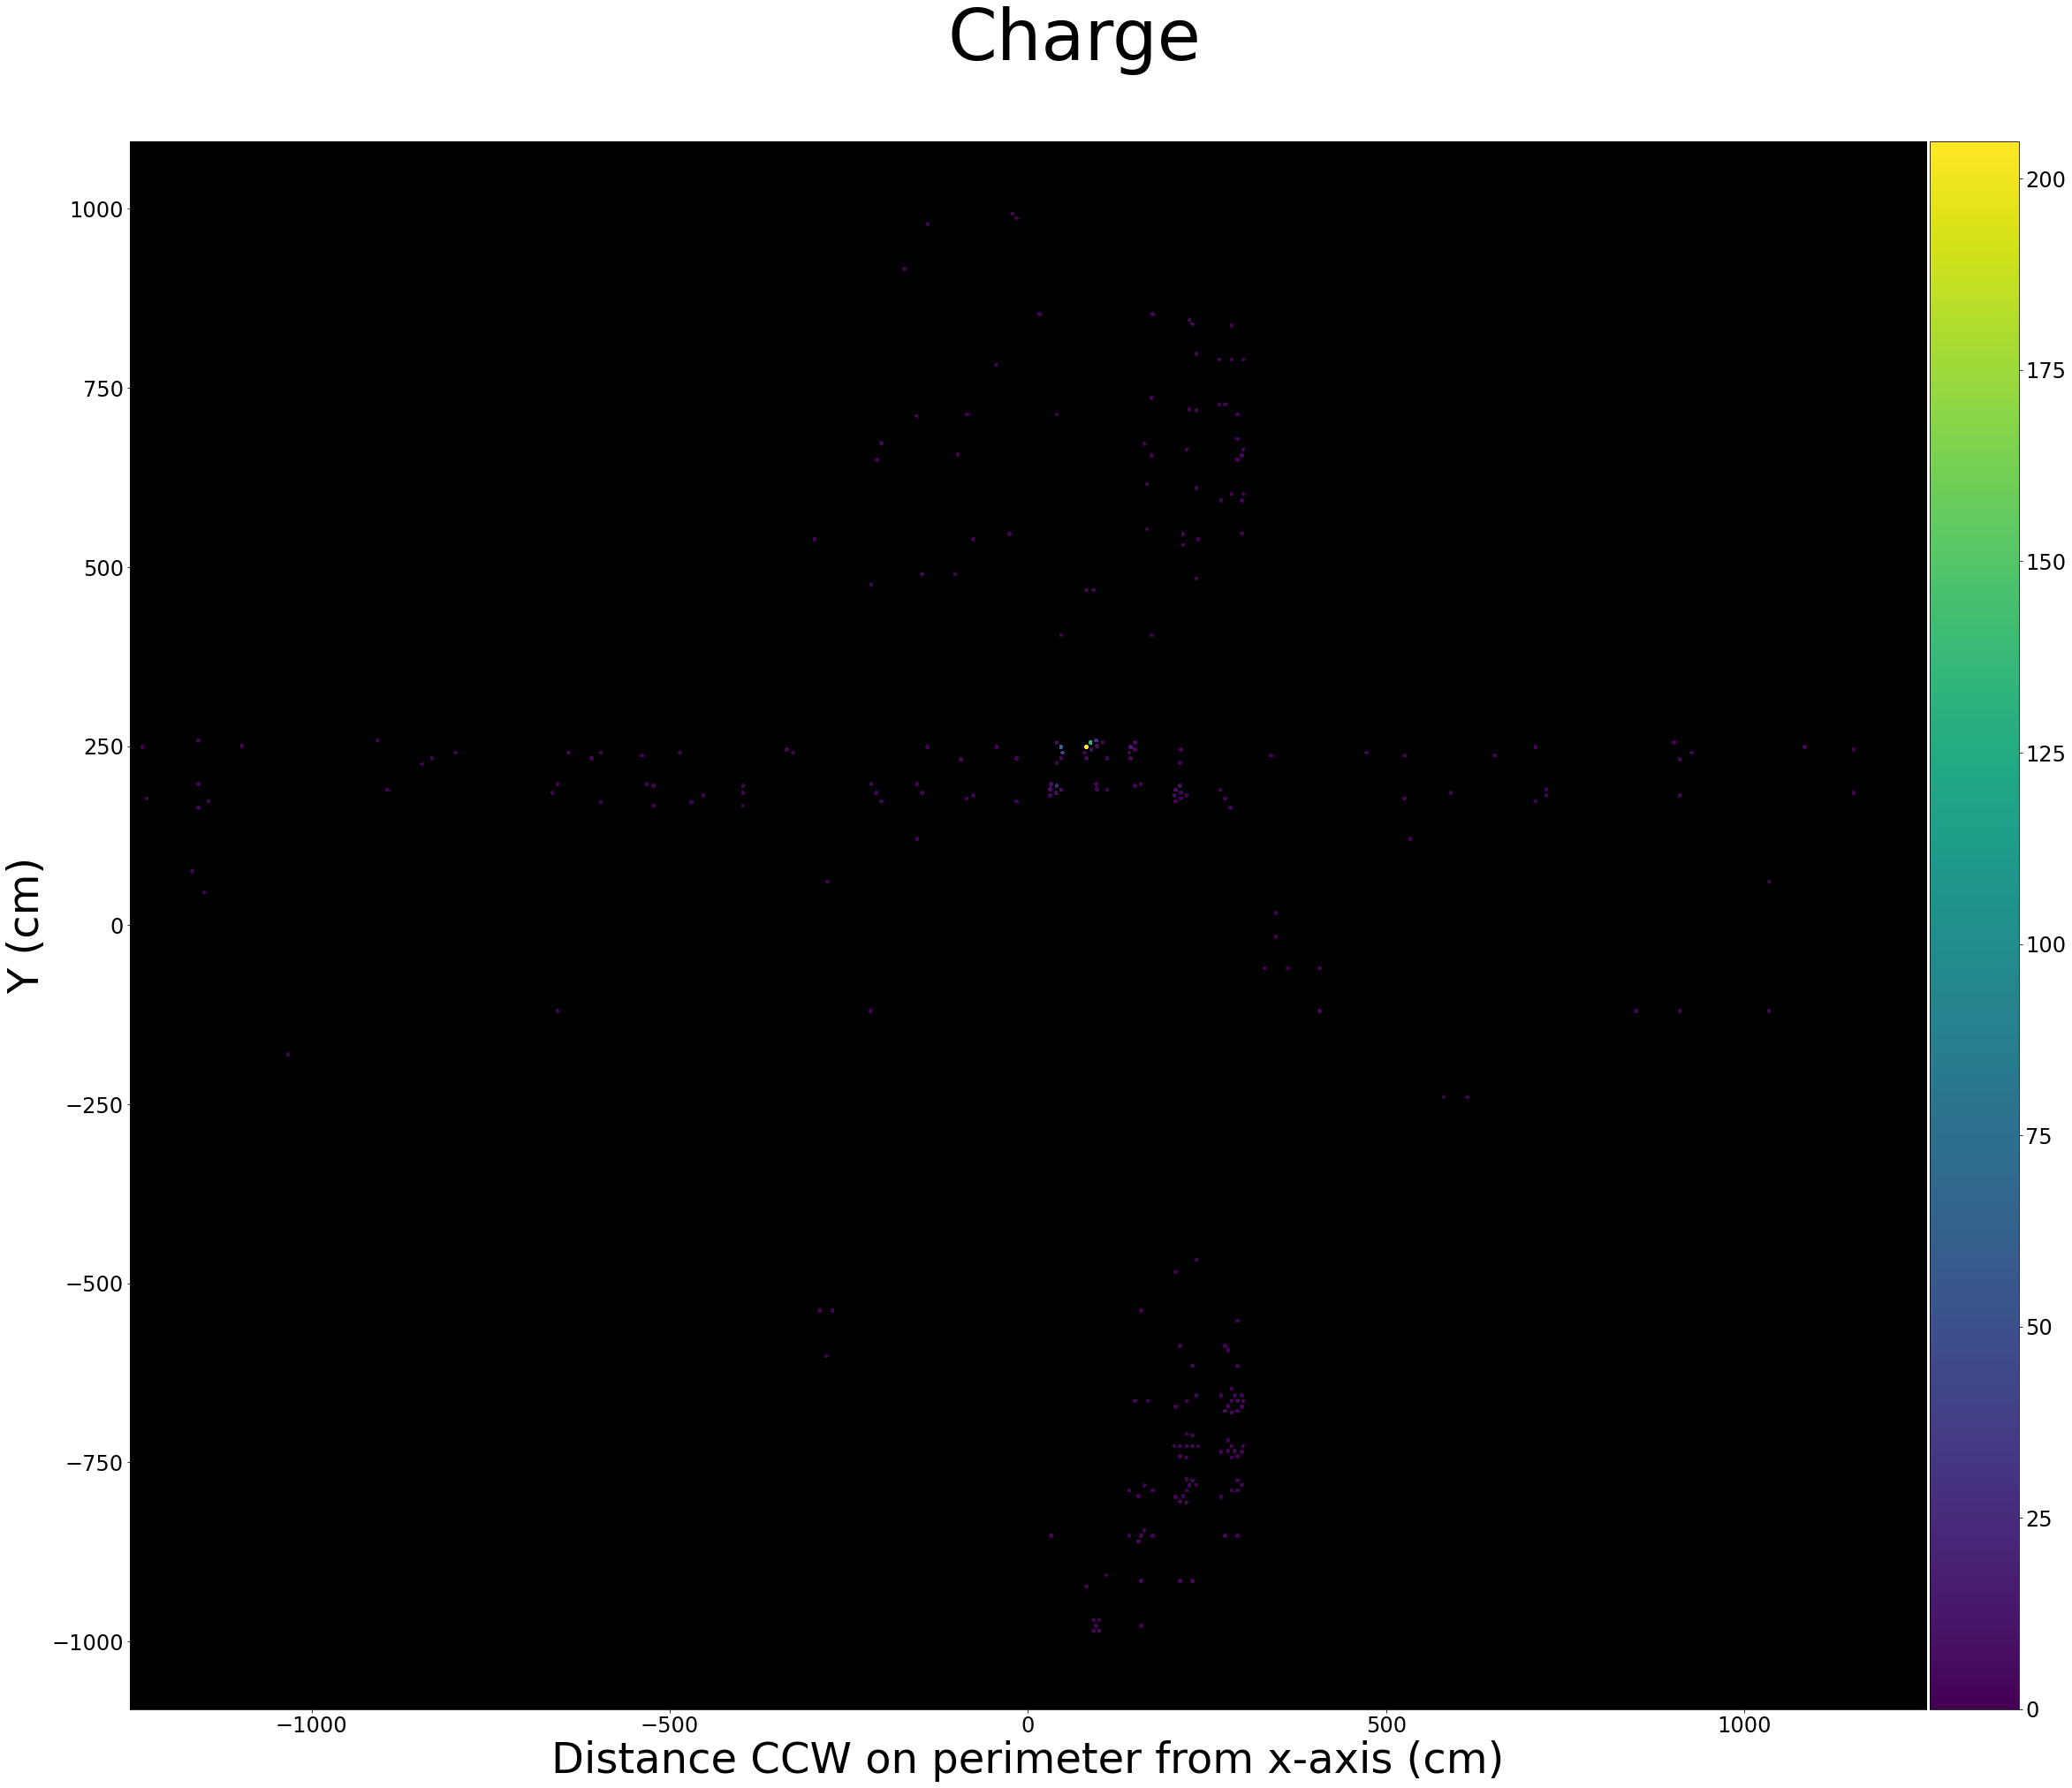

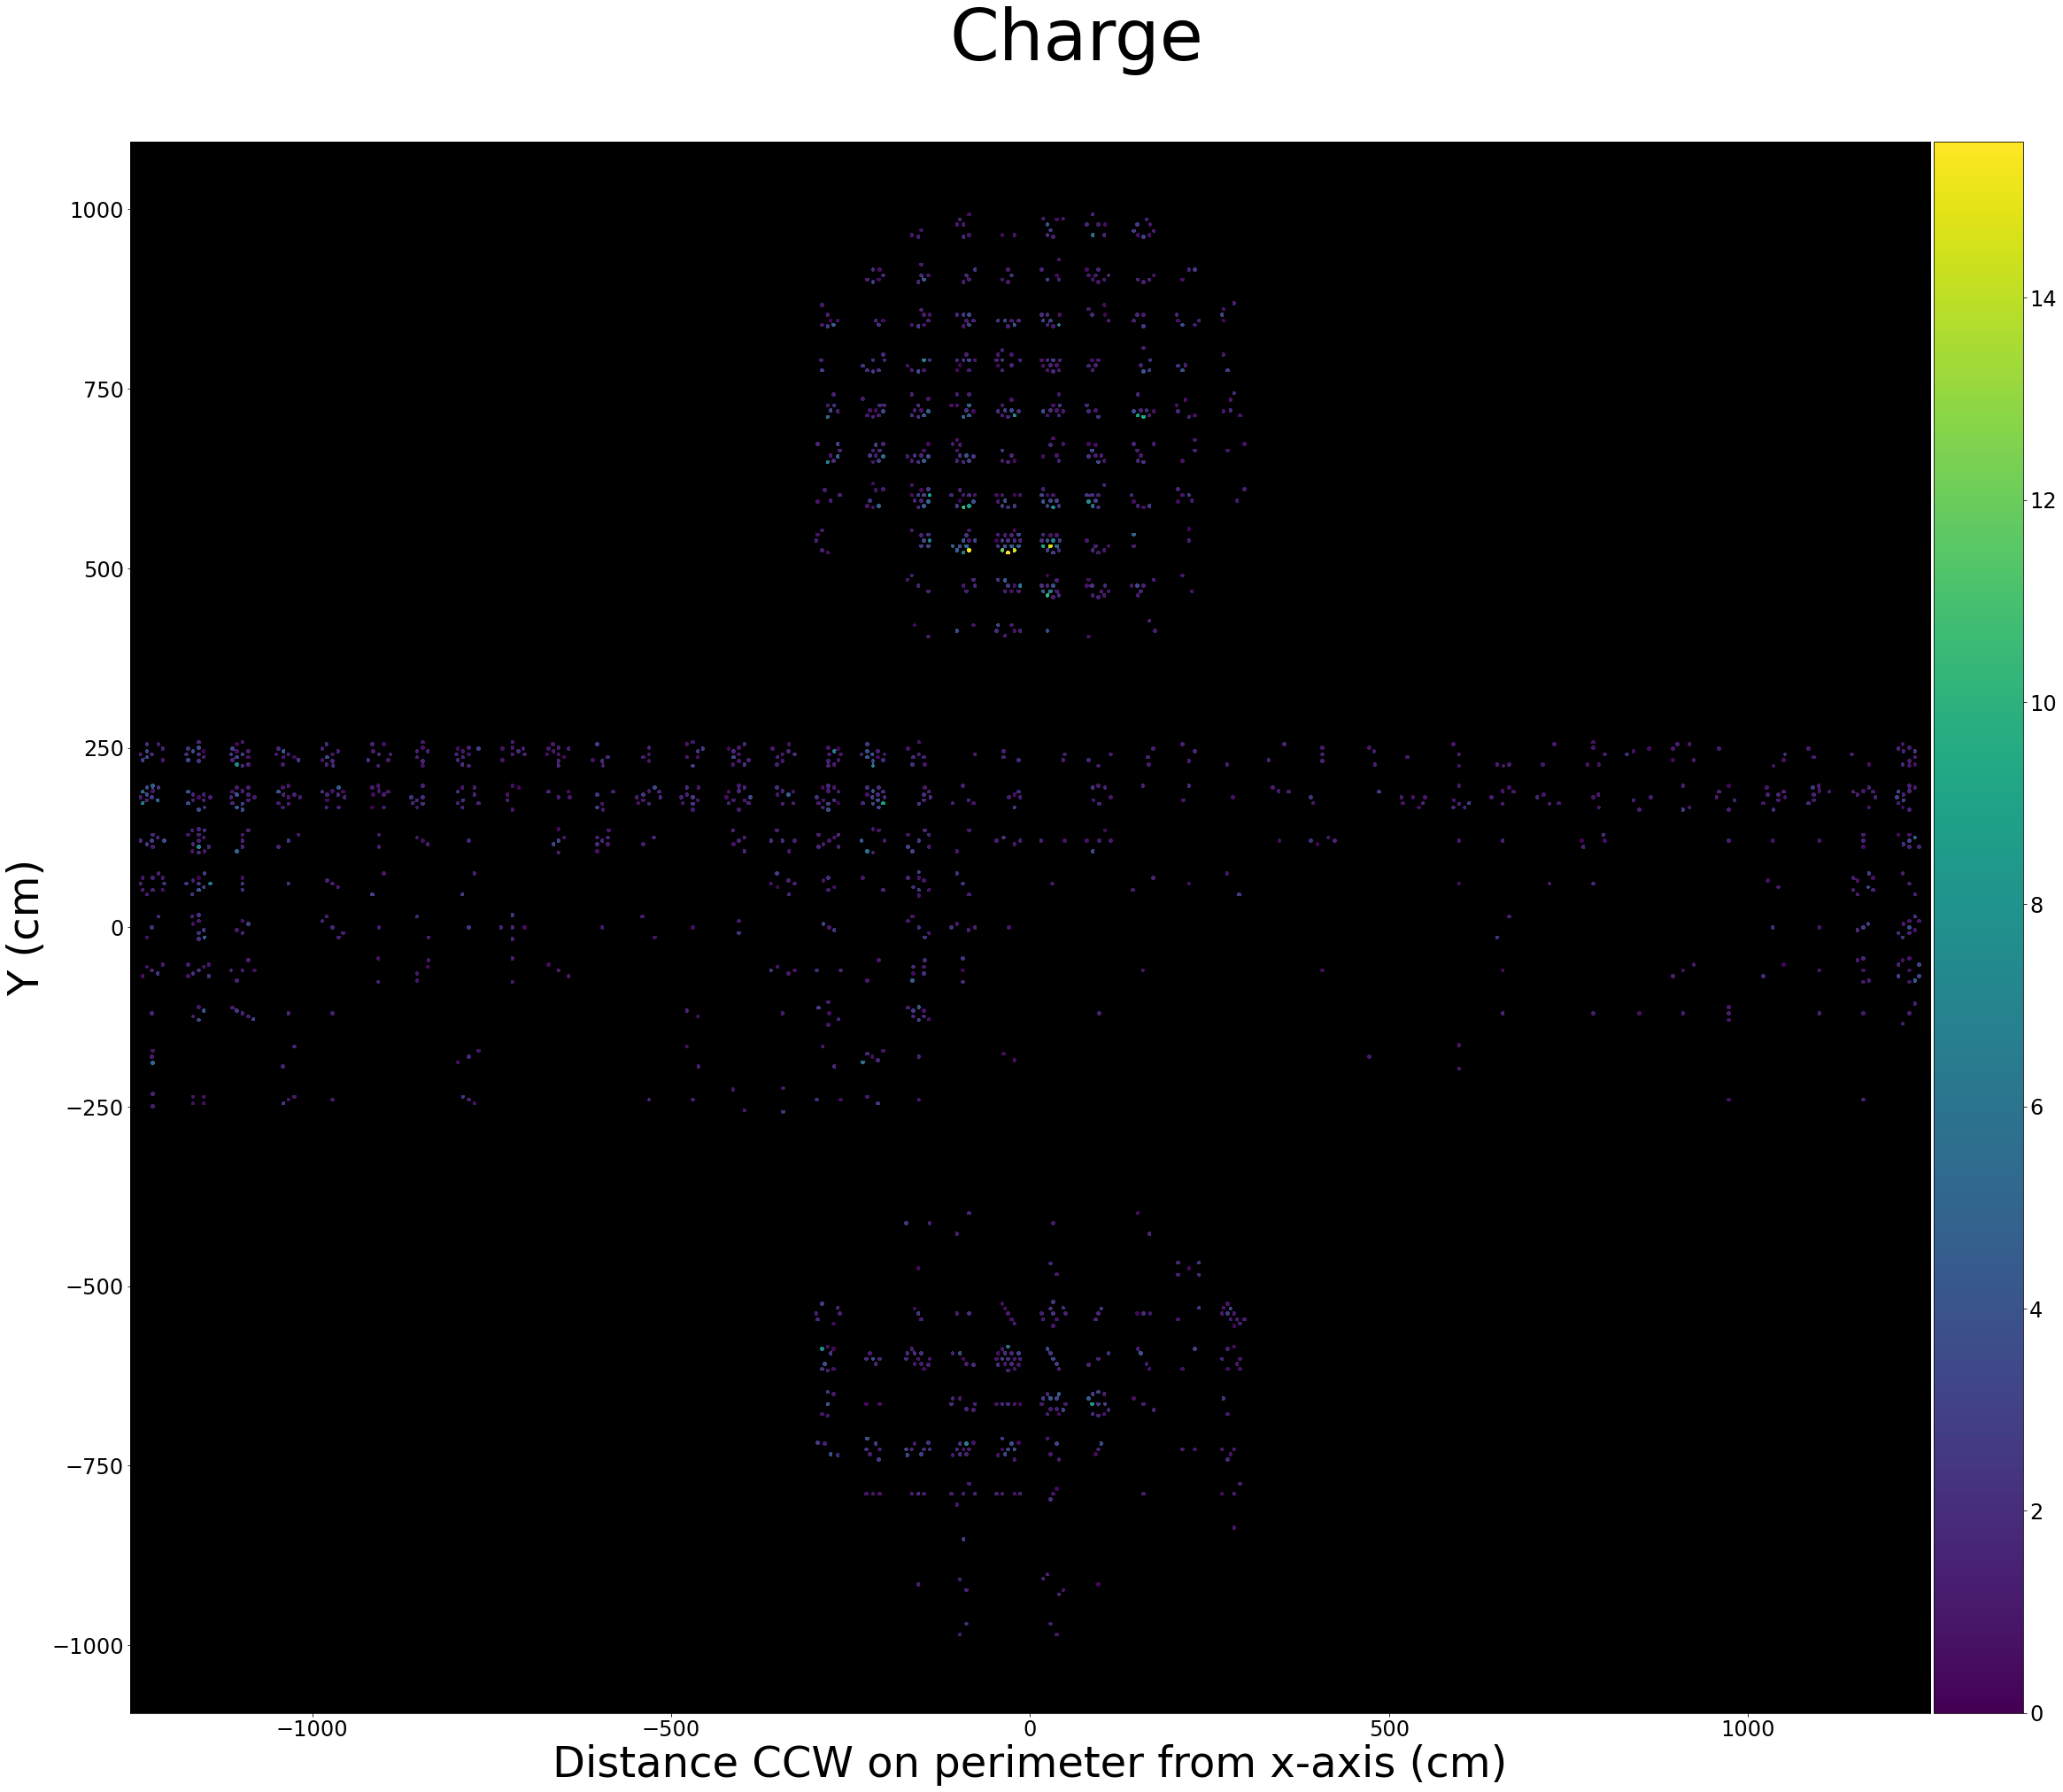

Error in callback <function flush_figures at 0x7fc34e4ef378> (for post_execute):


KeyboardInterrupt: 

In [46]:
base = 100
for i in range(base, base + 20):
    plotter.display_event(i, dark=True)

In [70]:
base = 0
a = np.array([])
for i in range(base, base + 1000000):
    pmts, charges, times = plotter.get_event_data_from_index(i)
    a = np.append(a, np.sum(charges))
print(a)

[ 612.23891869 4369.43365459 1707.53815001 ... 3586.38580856 1588.81521924
 1787.07580074]


In [64]:
idxs = np.argsort(-a)
print(idxs[0:5])

[71558 23830 92920 76203 58340]


idx:  71558
idx:  23830
idx:  92920
idx:  76203
idx:  58340
idx:  37019
idx:  90671
idx:  14590
idx:  18663
idx:  58152
idx:  16792
idx:  84020
idx:  38308
idx:  22540
idx:  46989
idx:  28106
idx:  22664
idx:  62485
idx:  45985
idx:  21766
idx:  36449
idx:  65874
idx:  55200
idx:  88214
idx:  94377
idx:  71312
idx:  31987
idx:  96059
idx:  72449
idx:  48876


<Figure size 432x288 with 0 Axes>

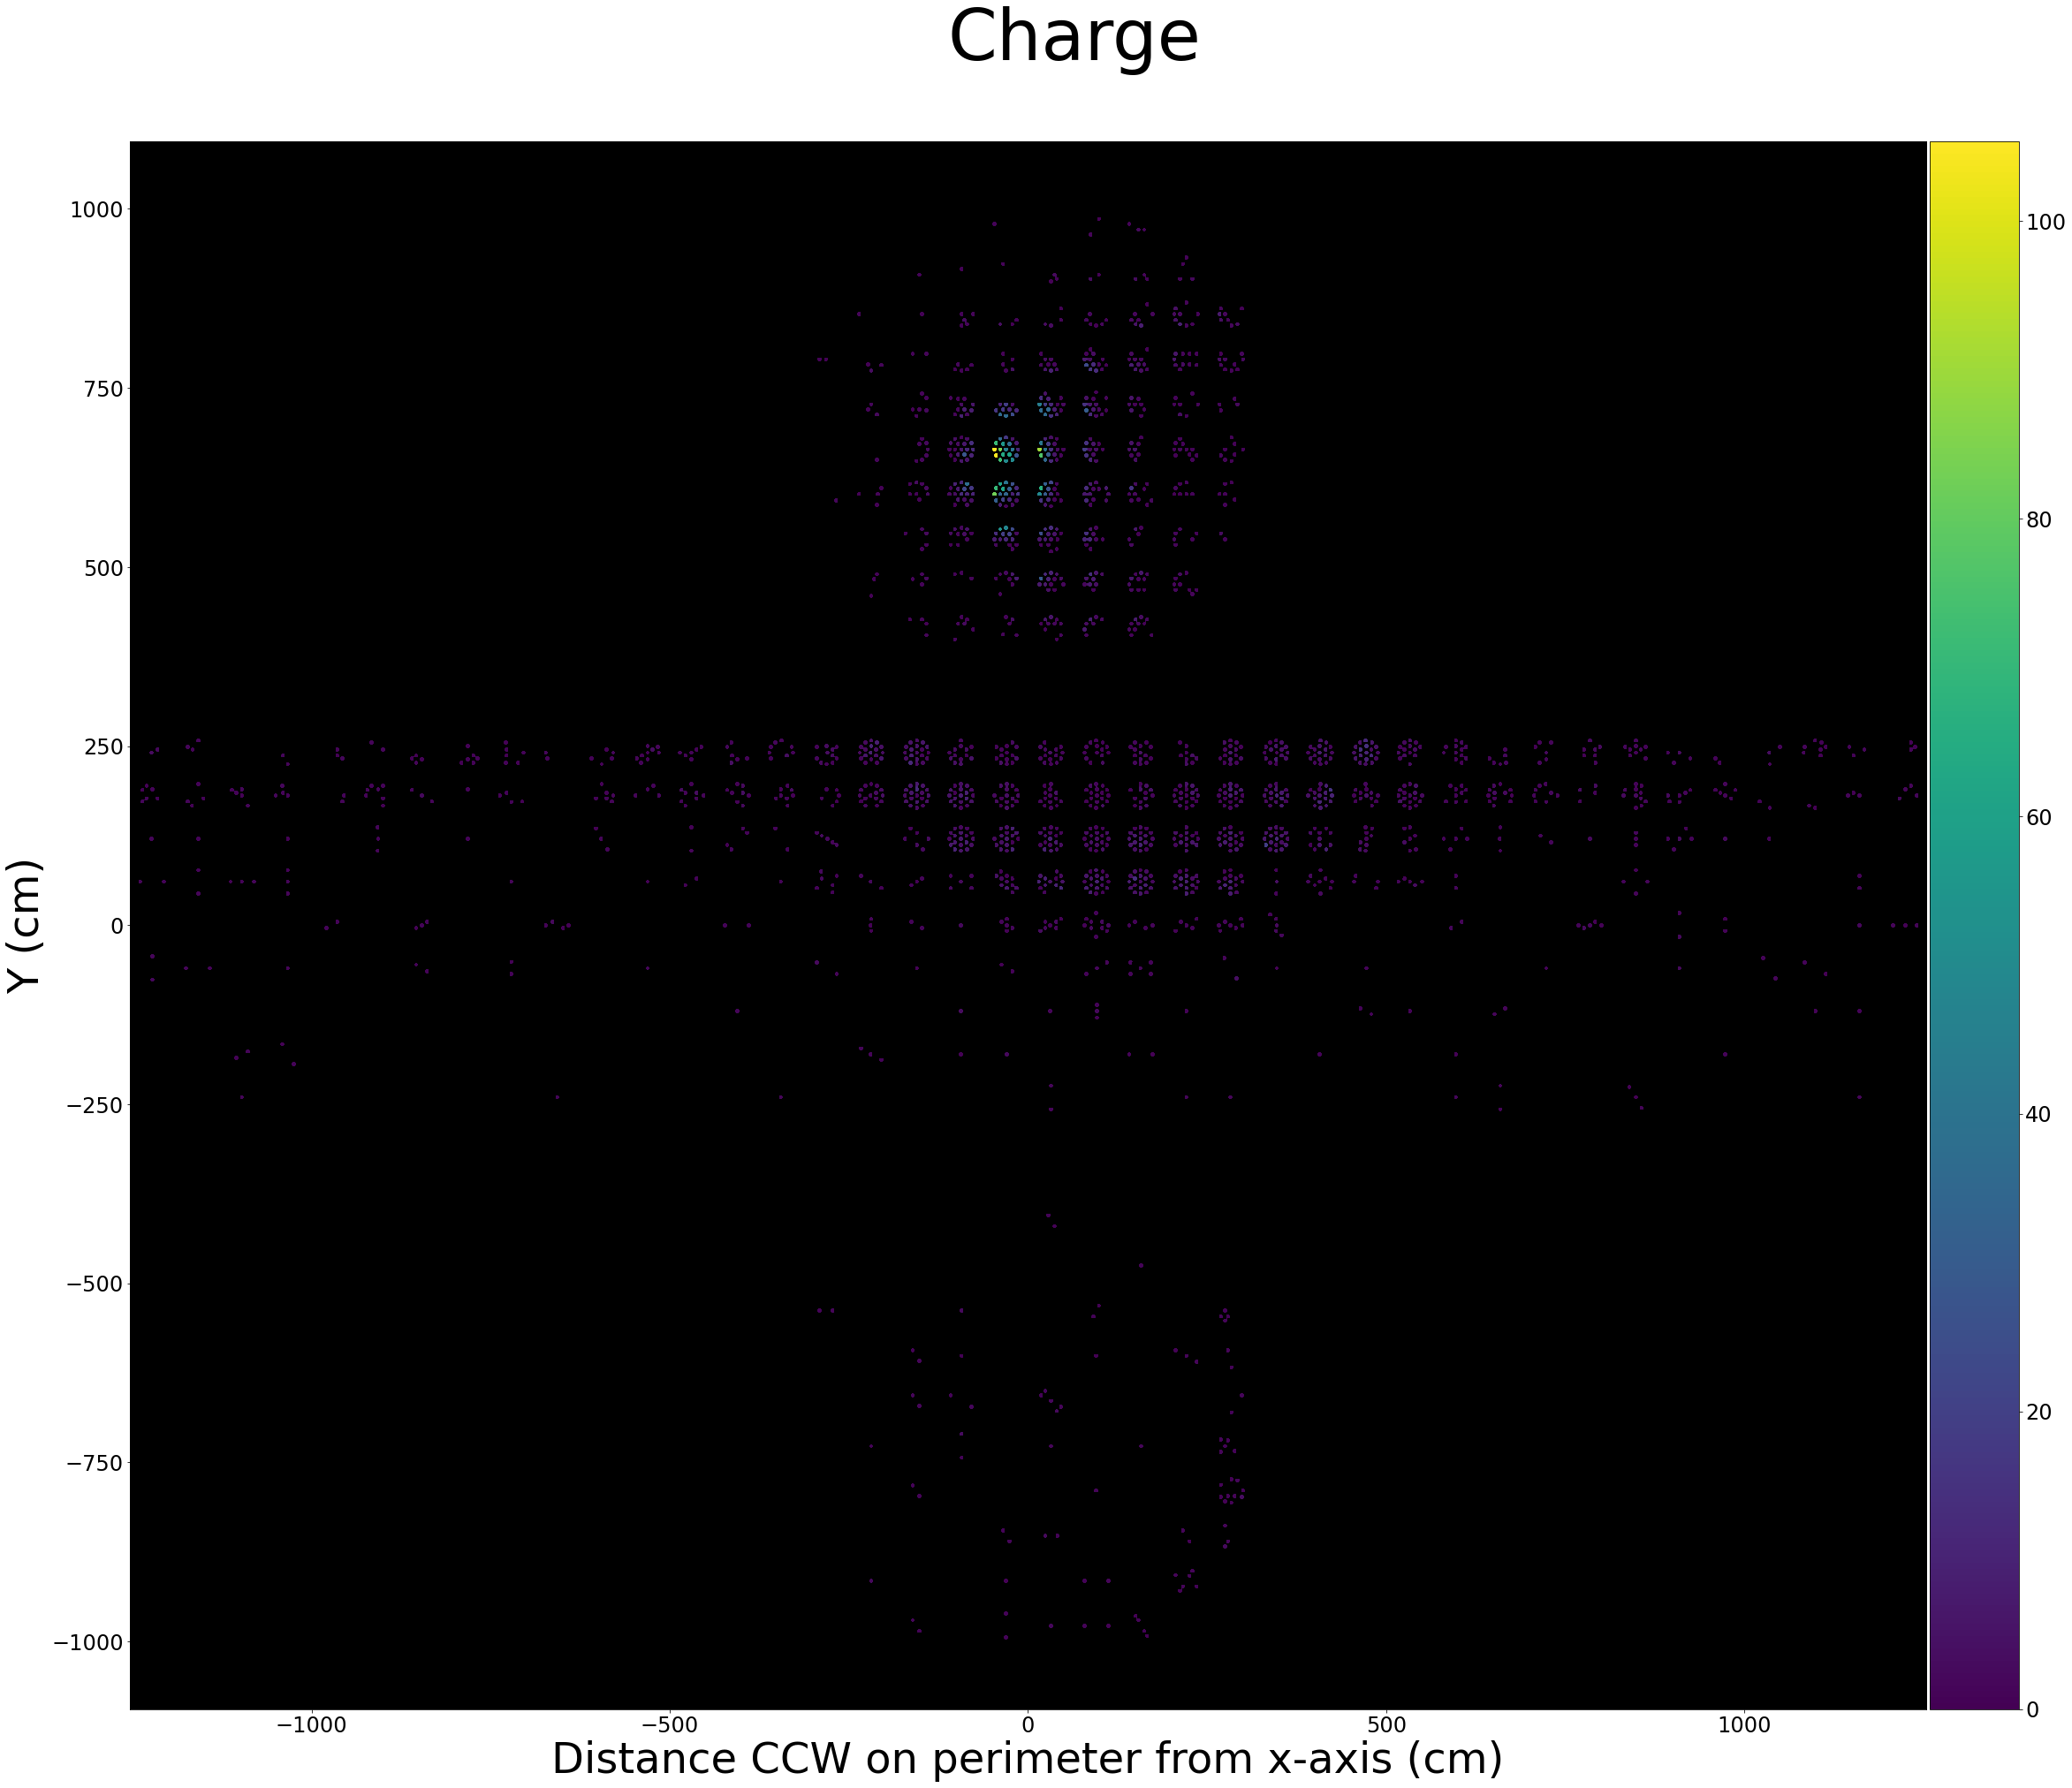

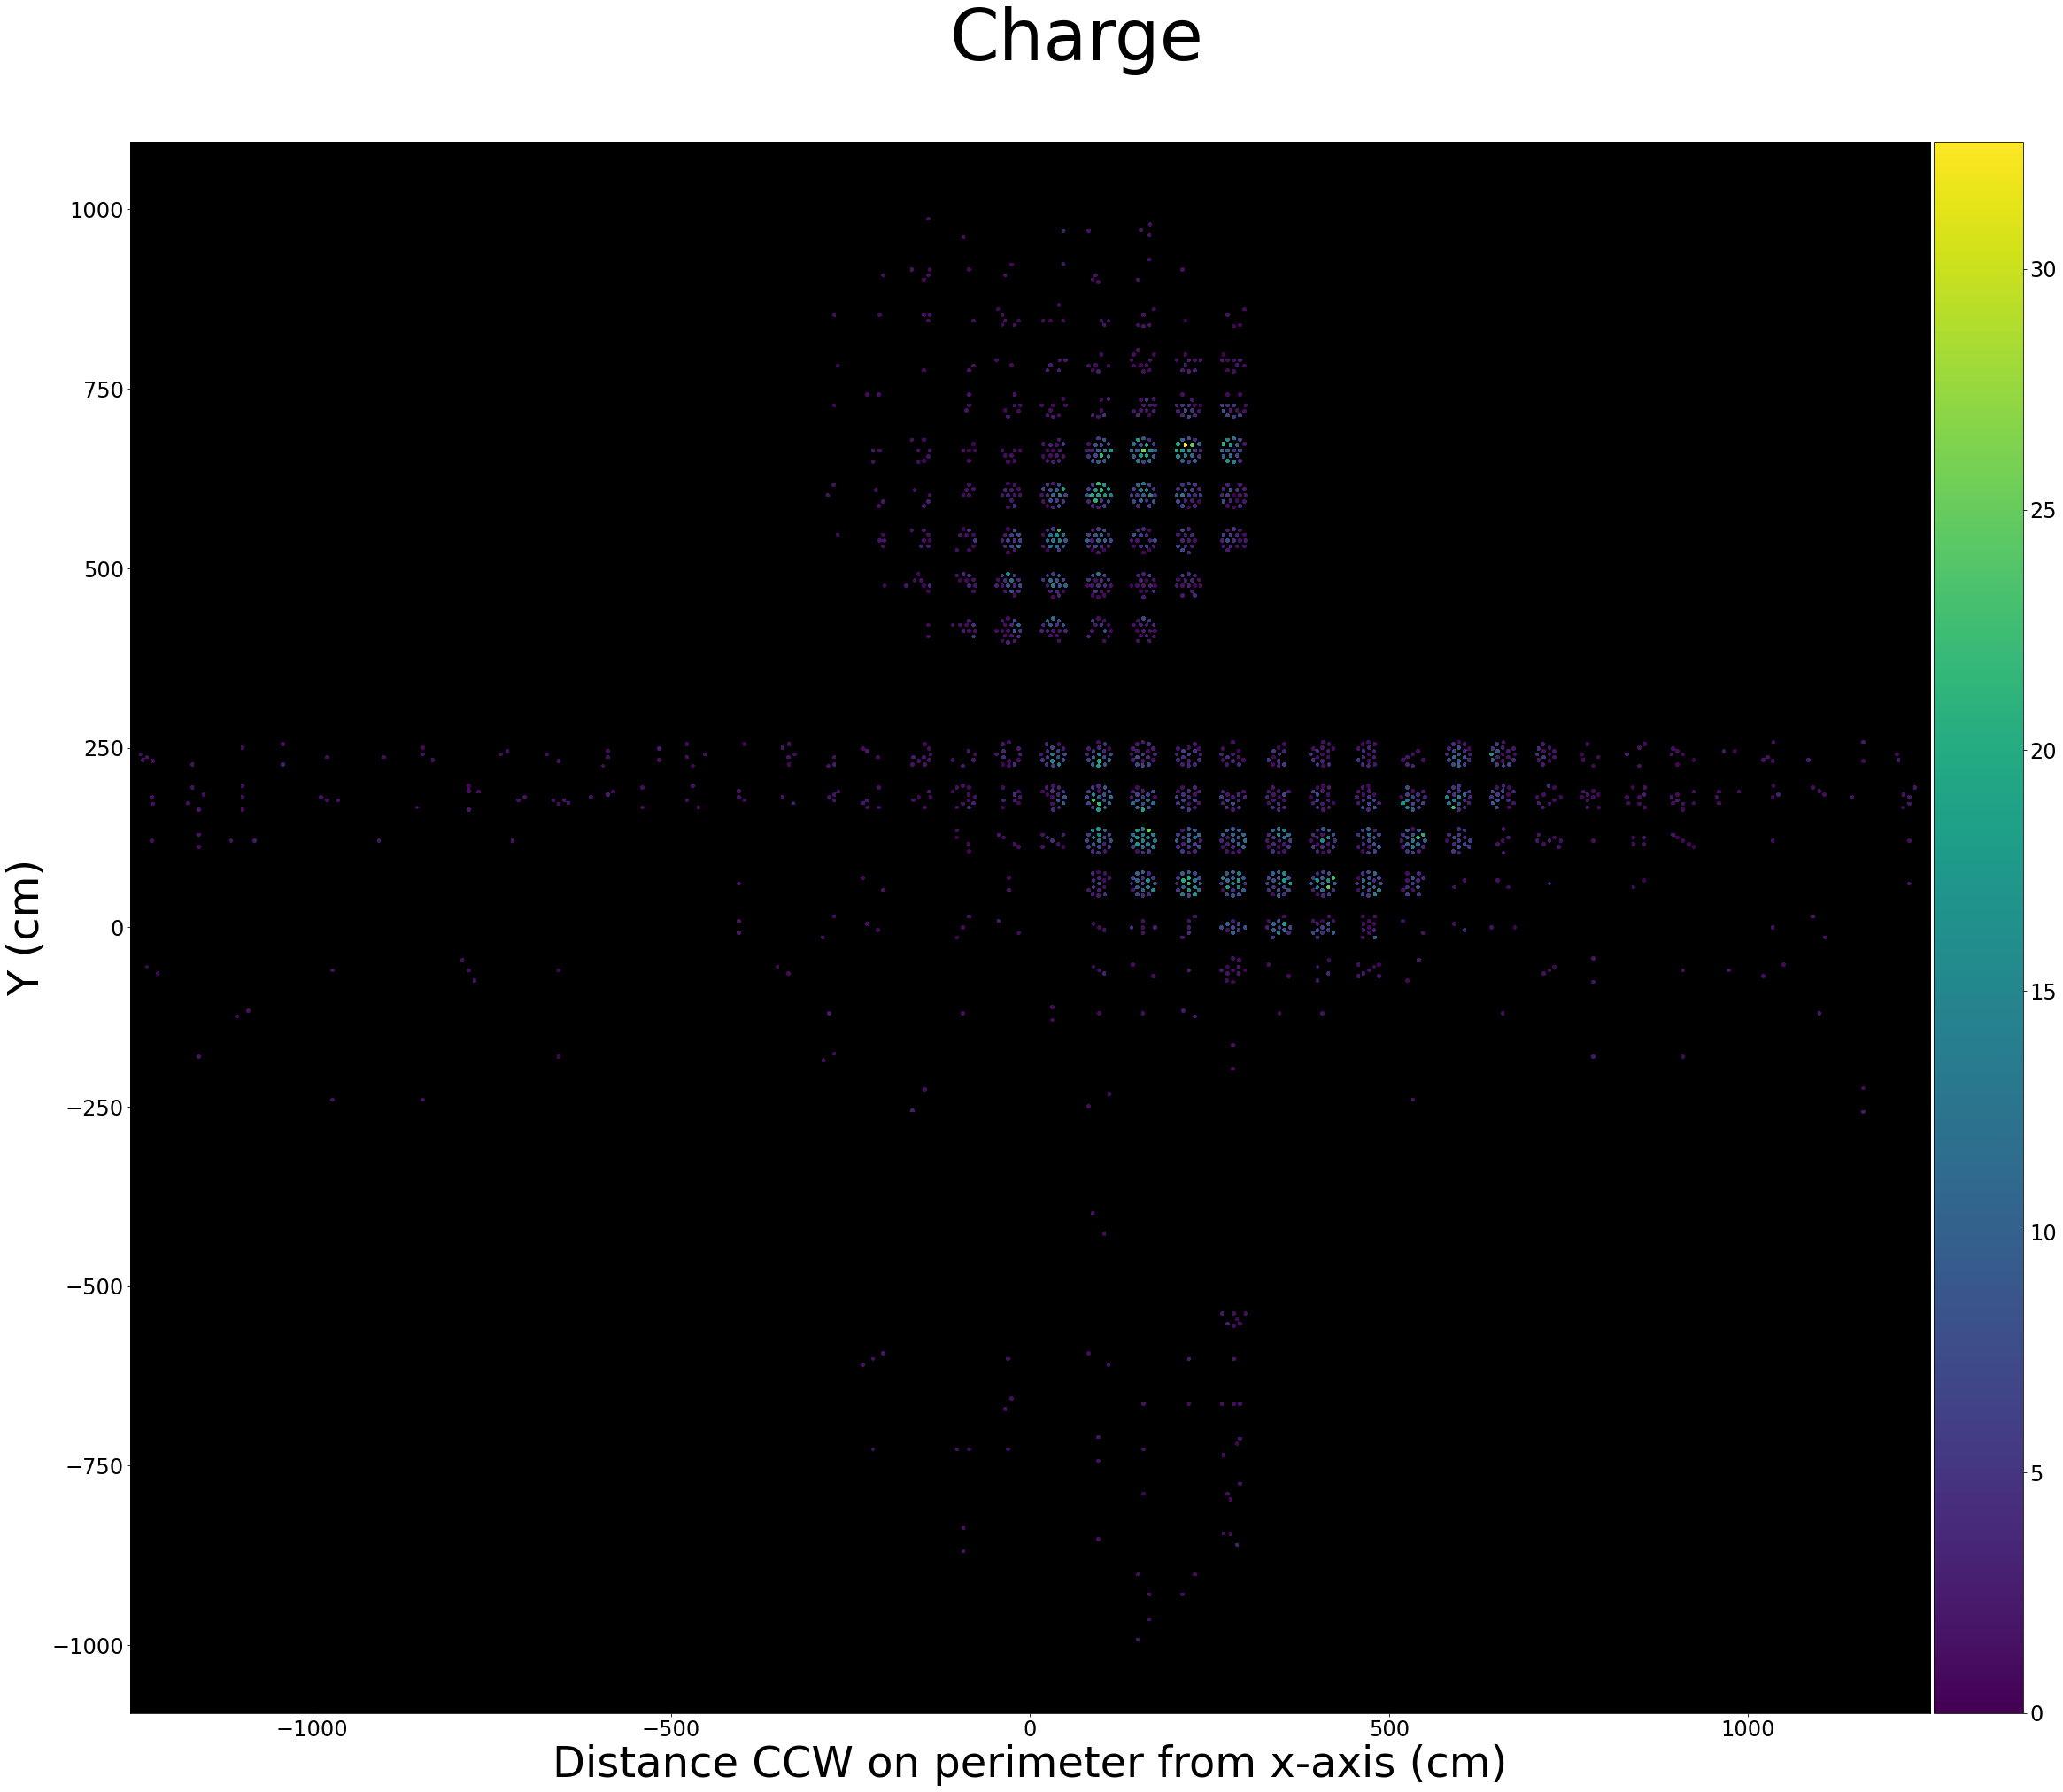

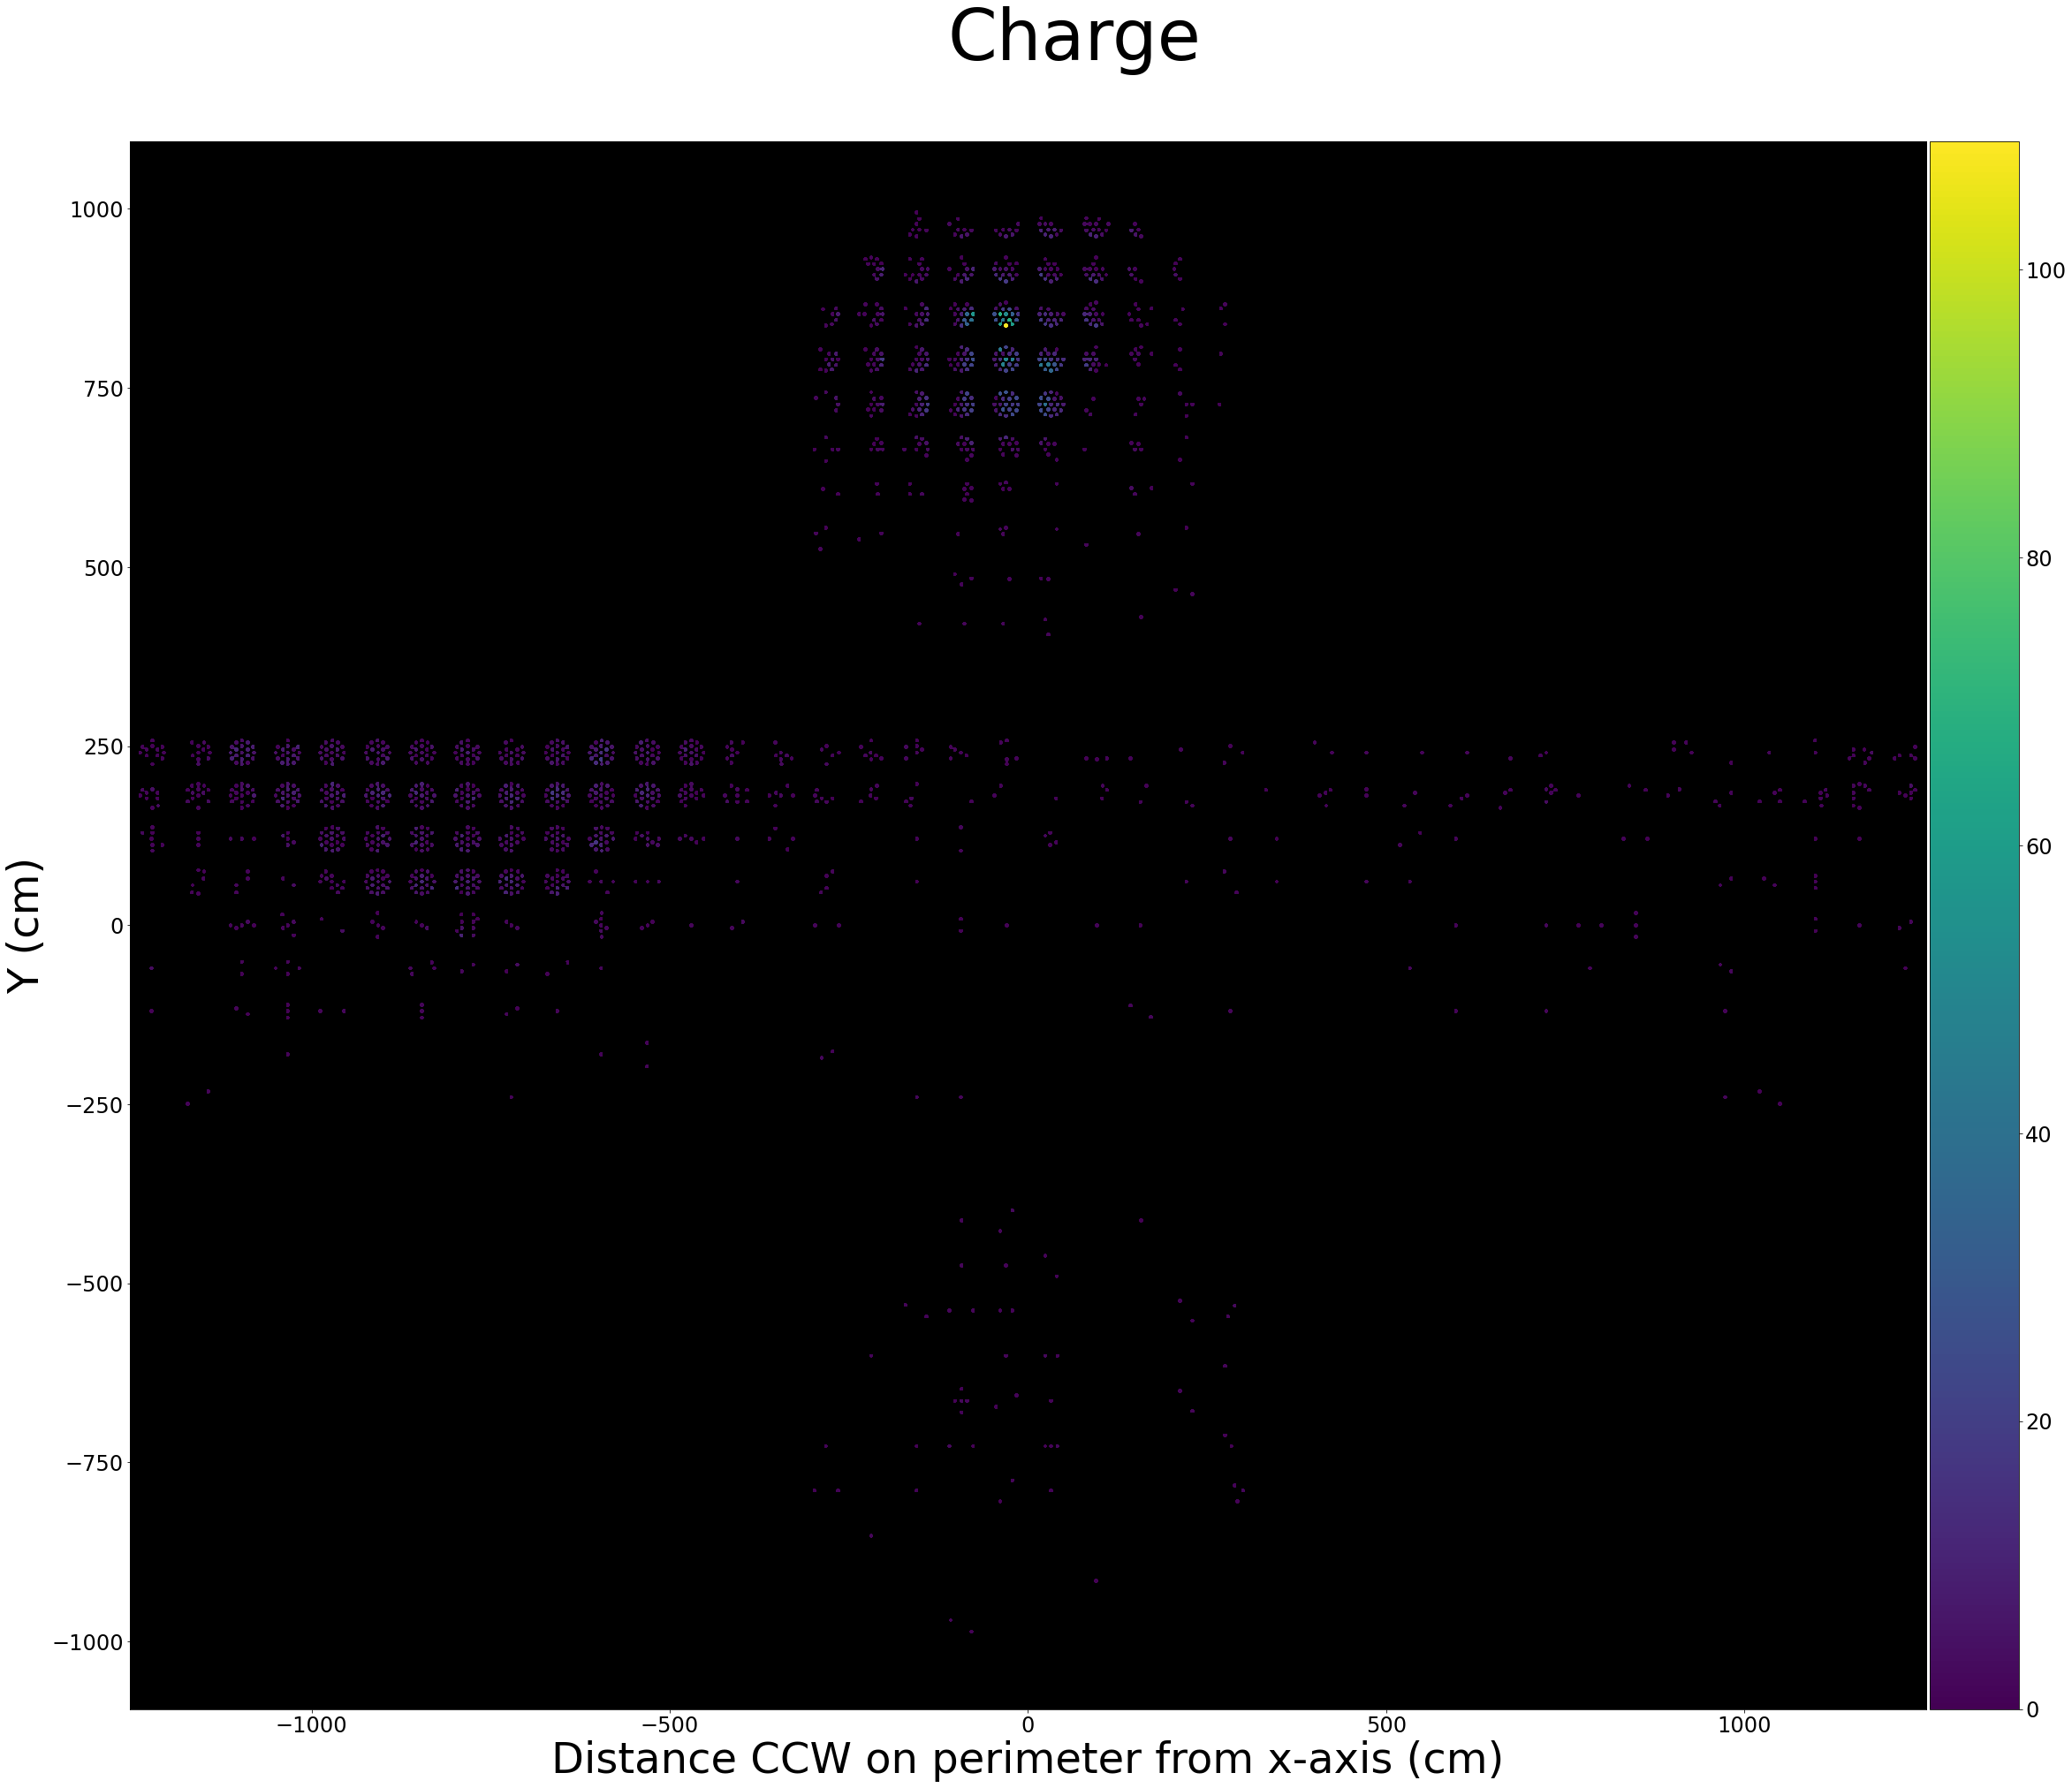

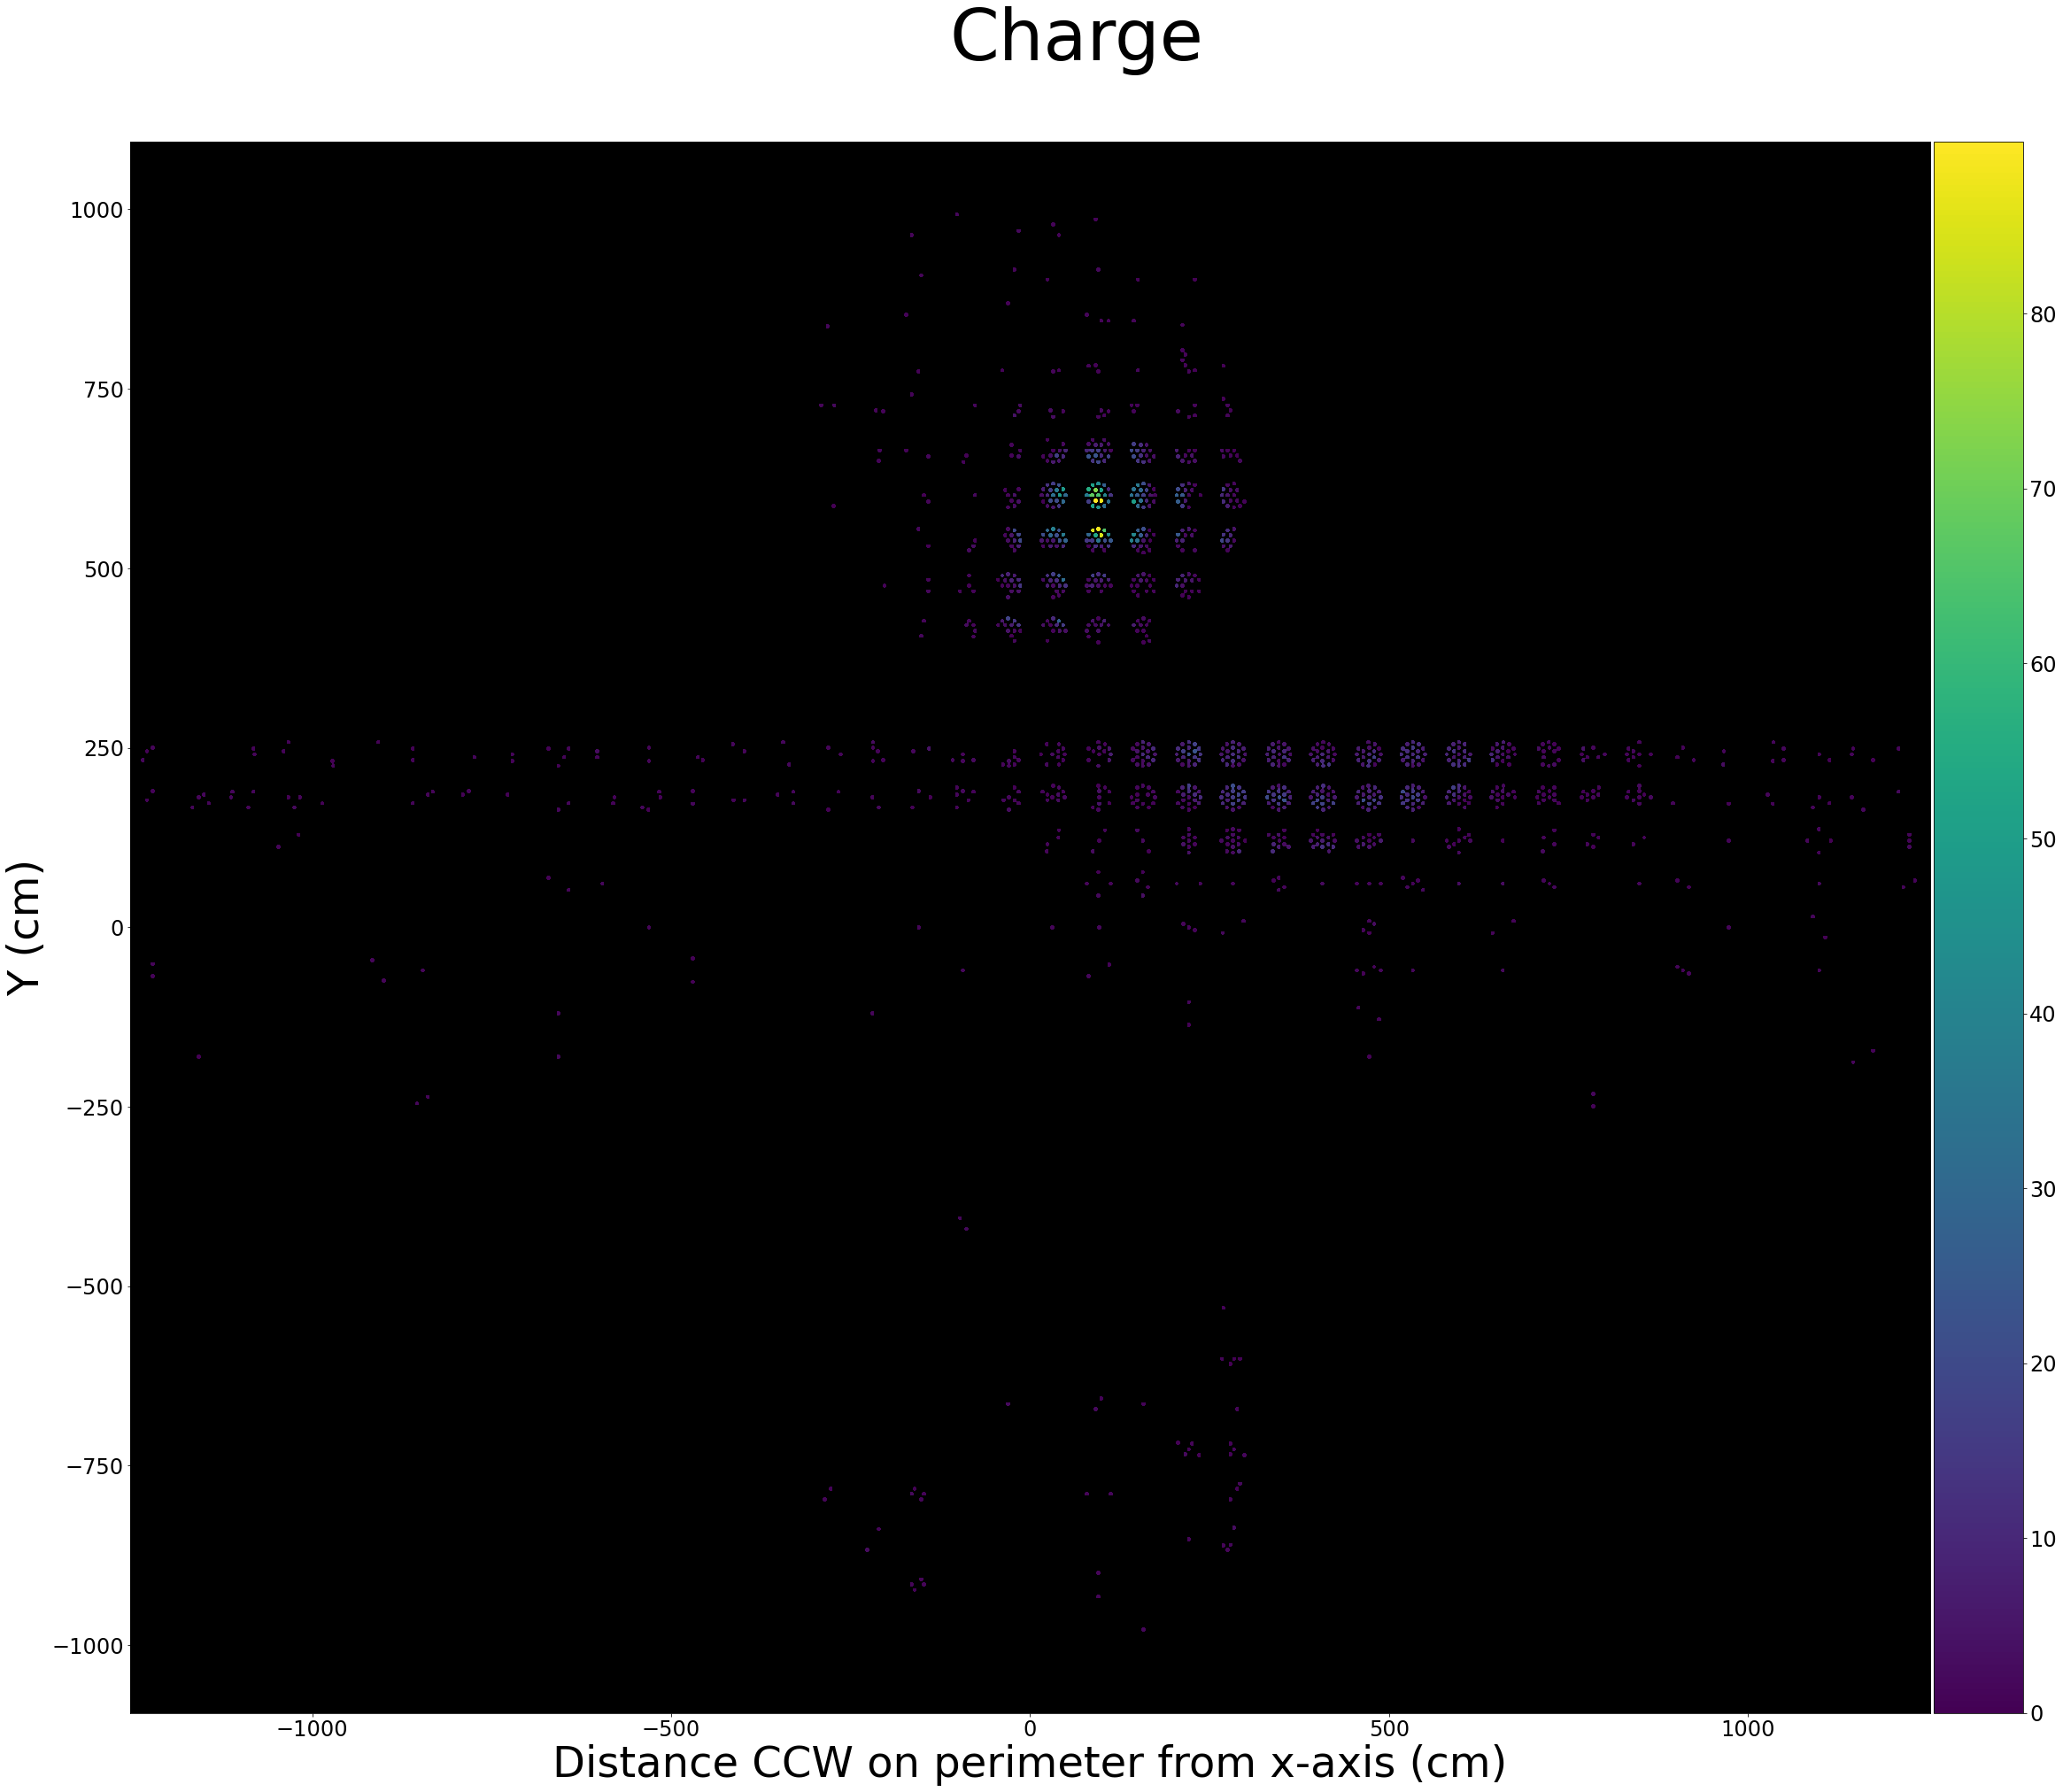

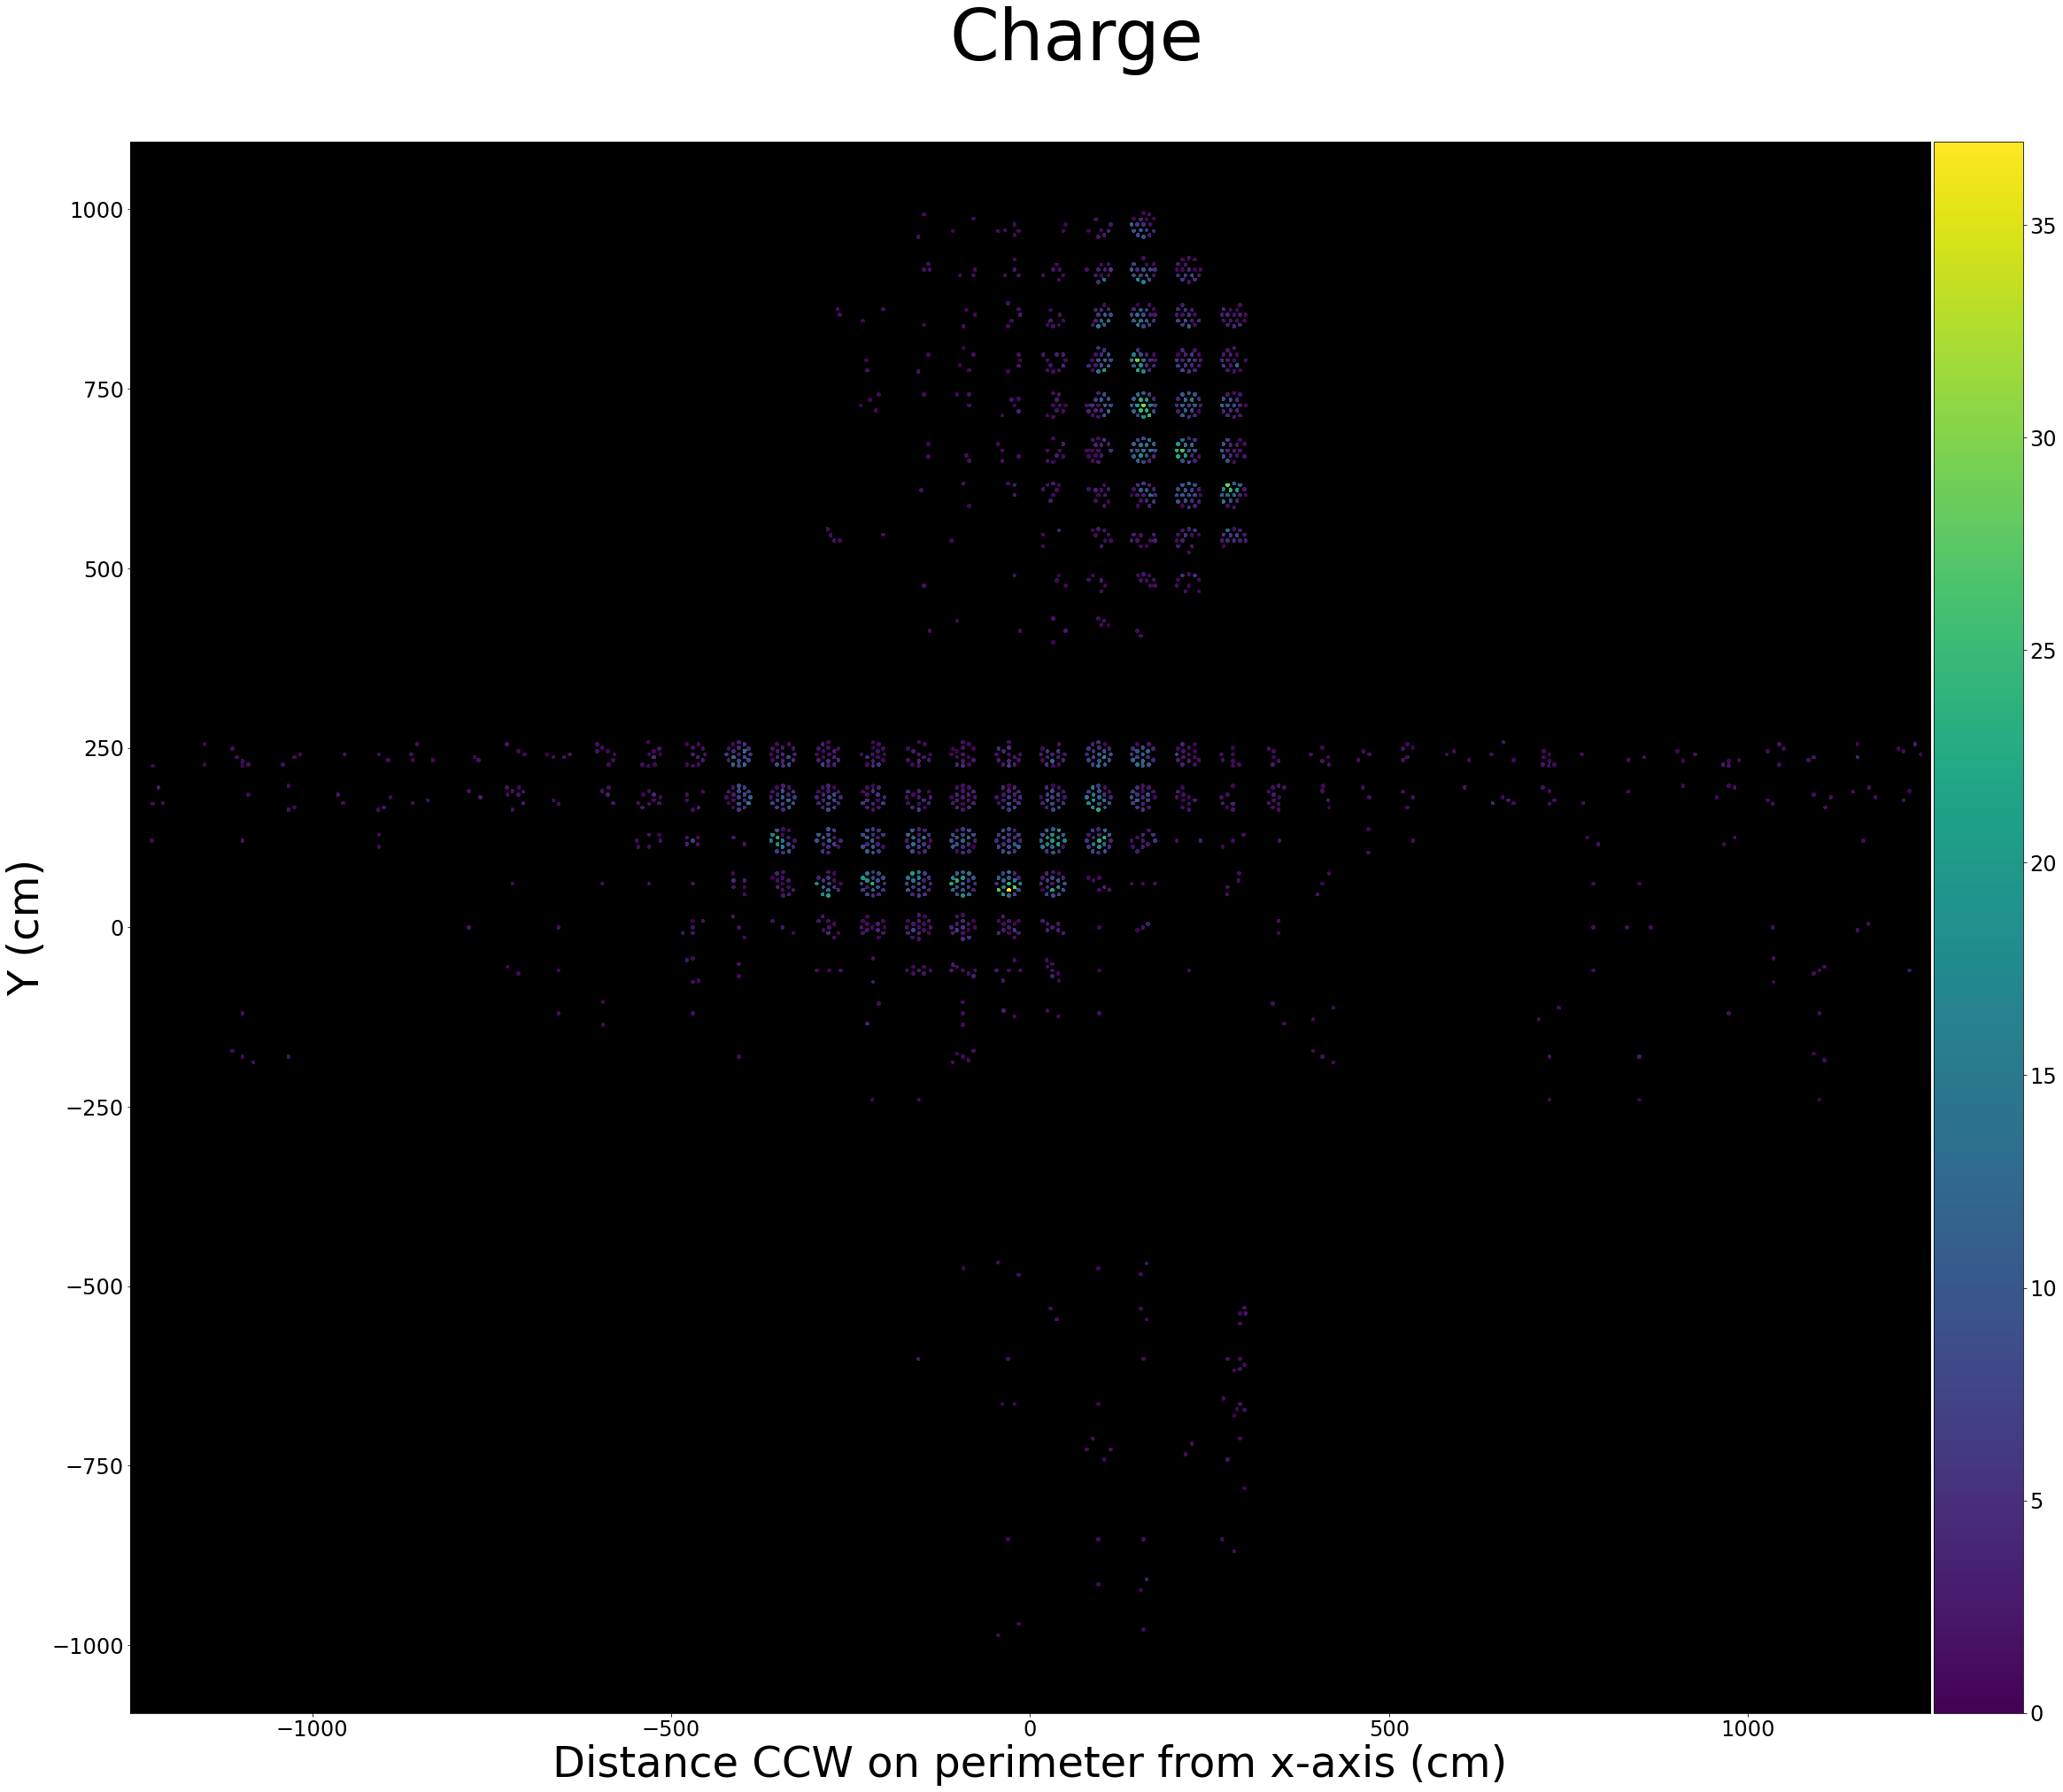

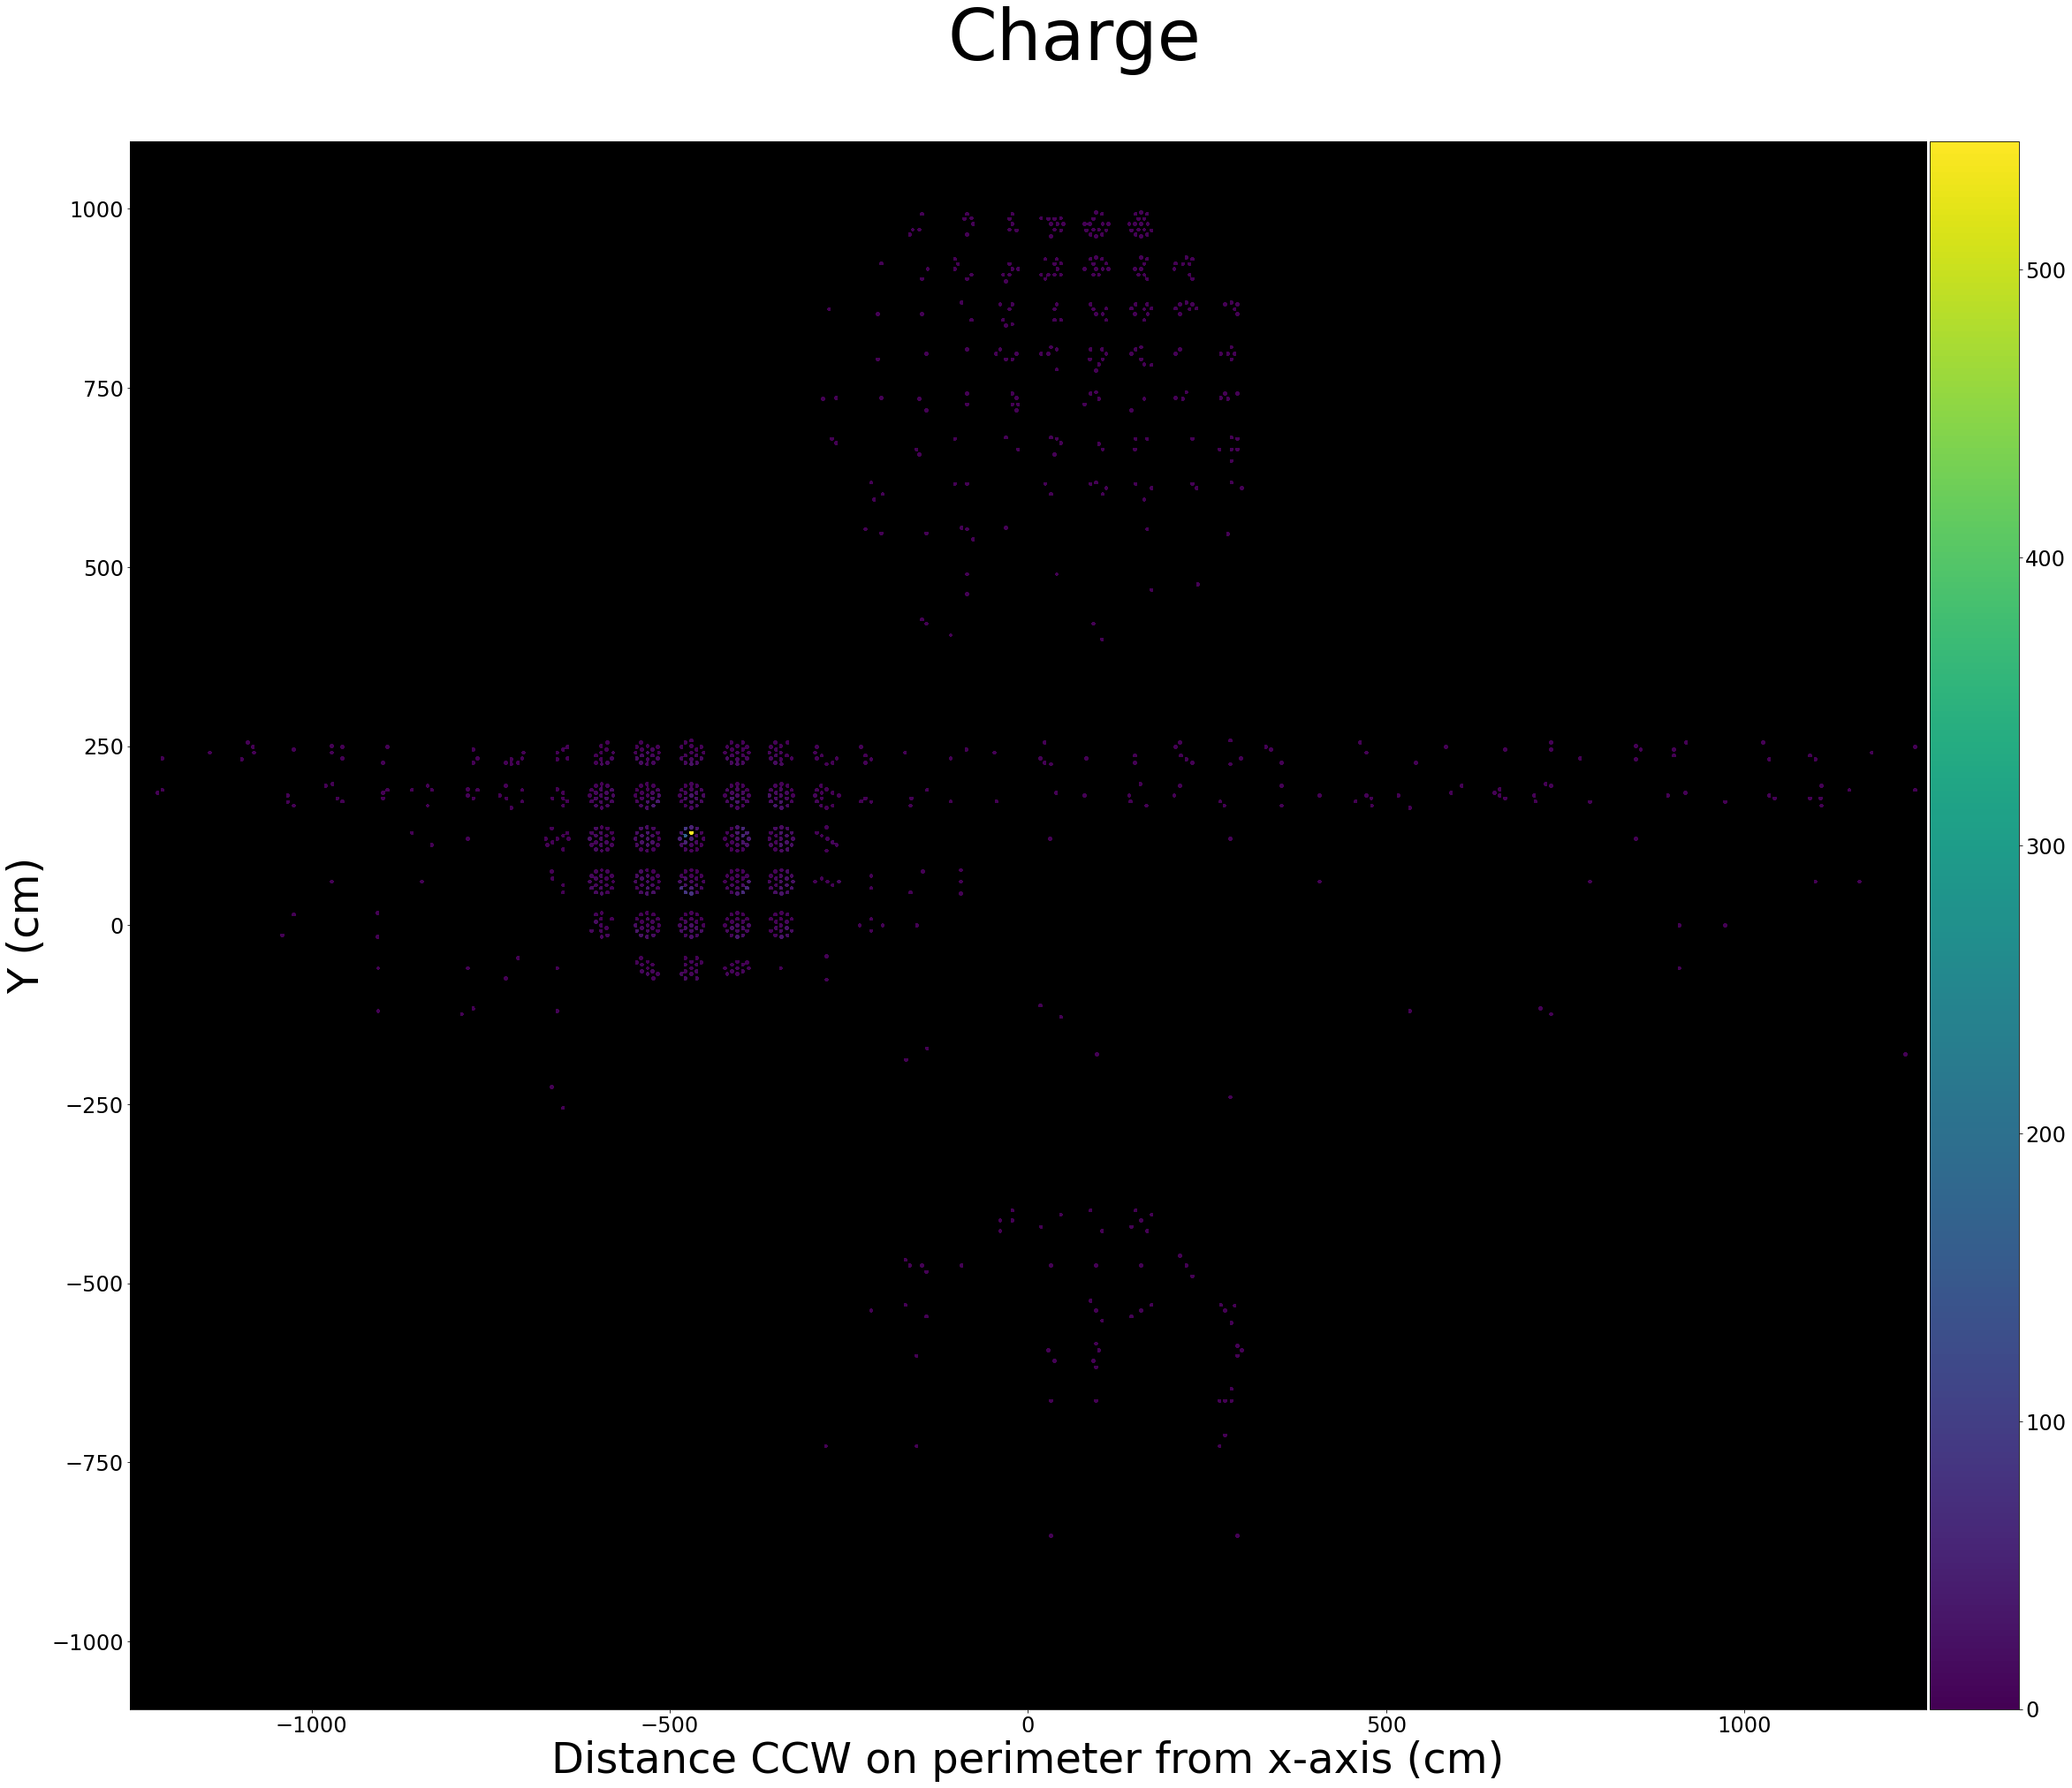

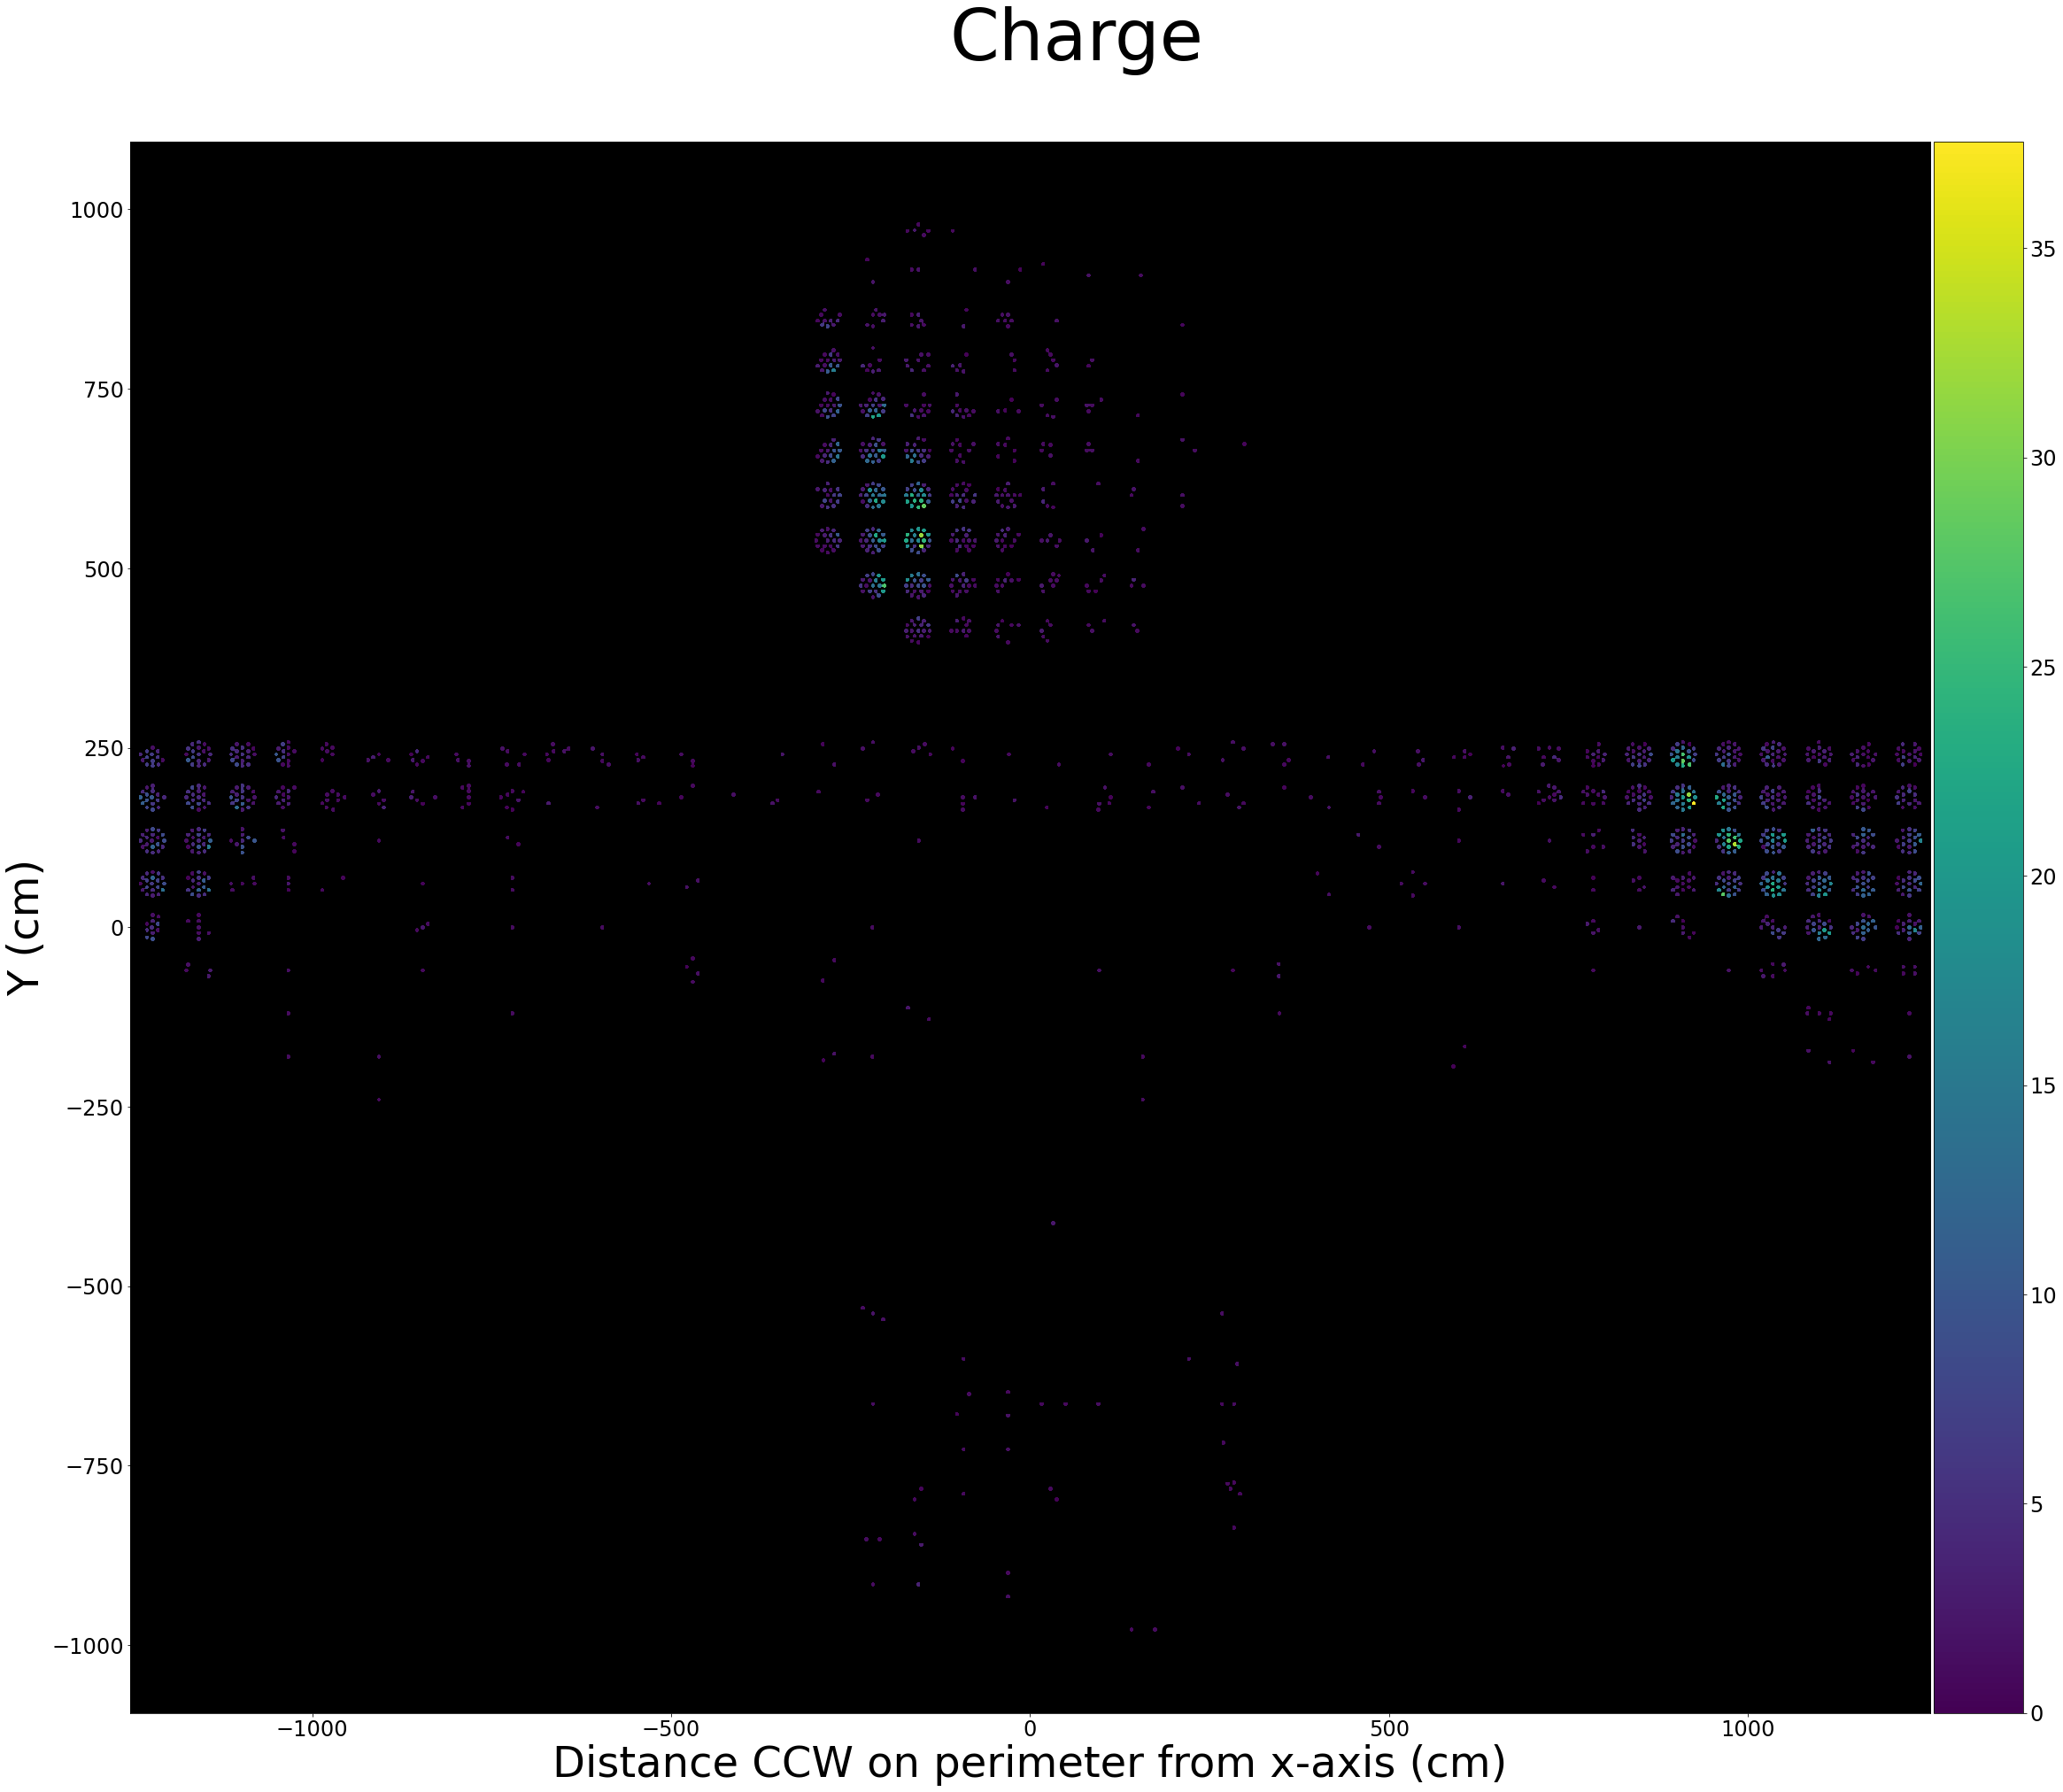

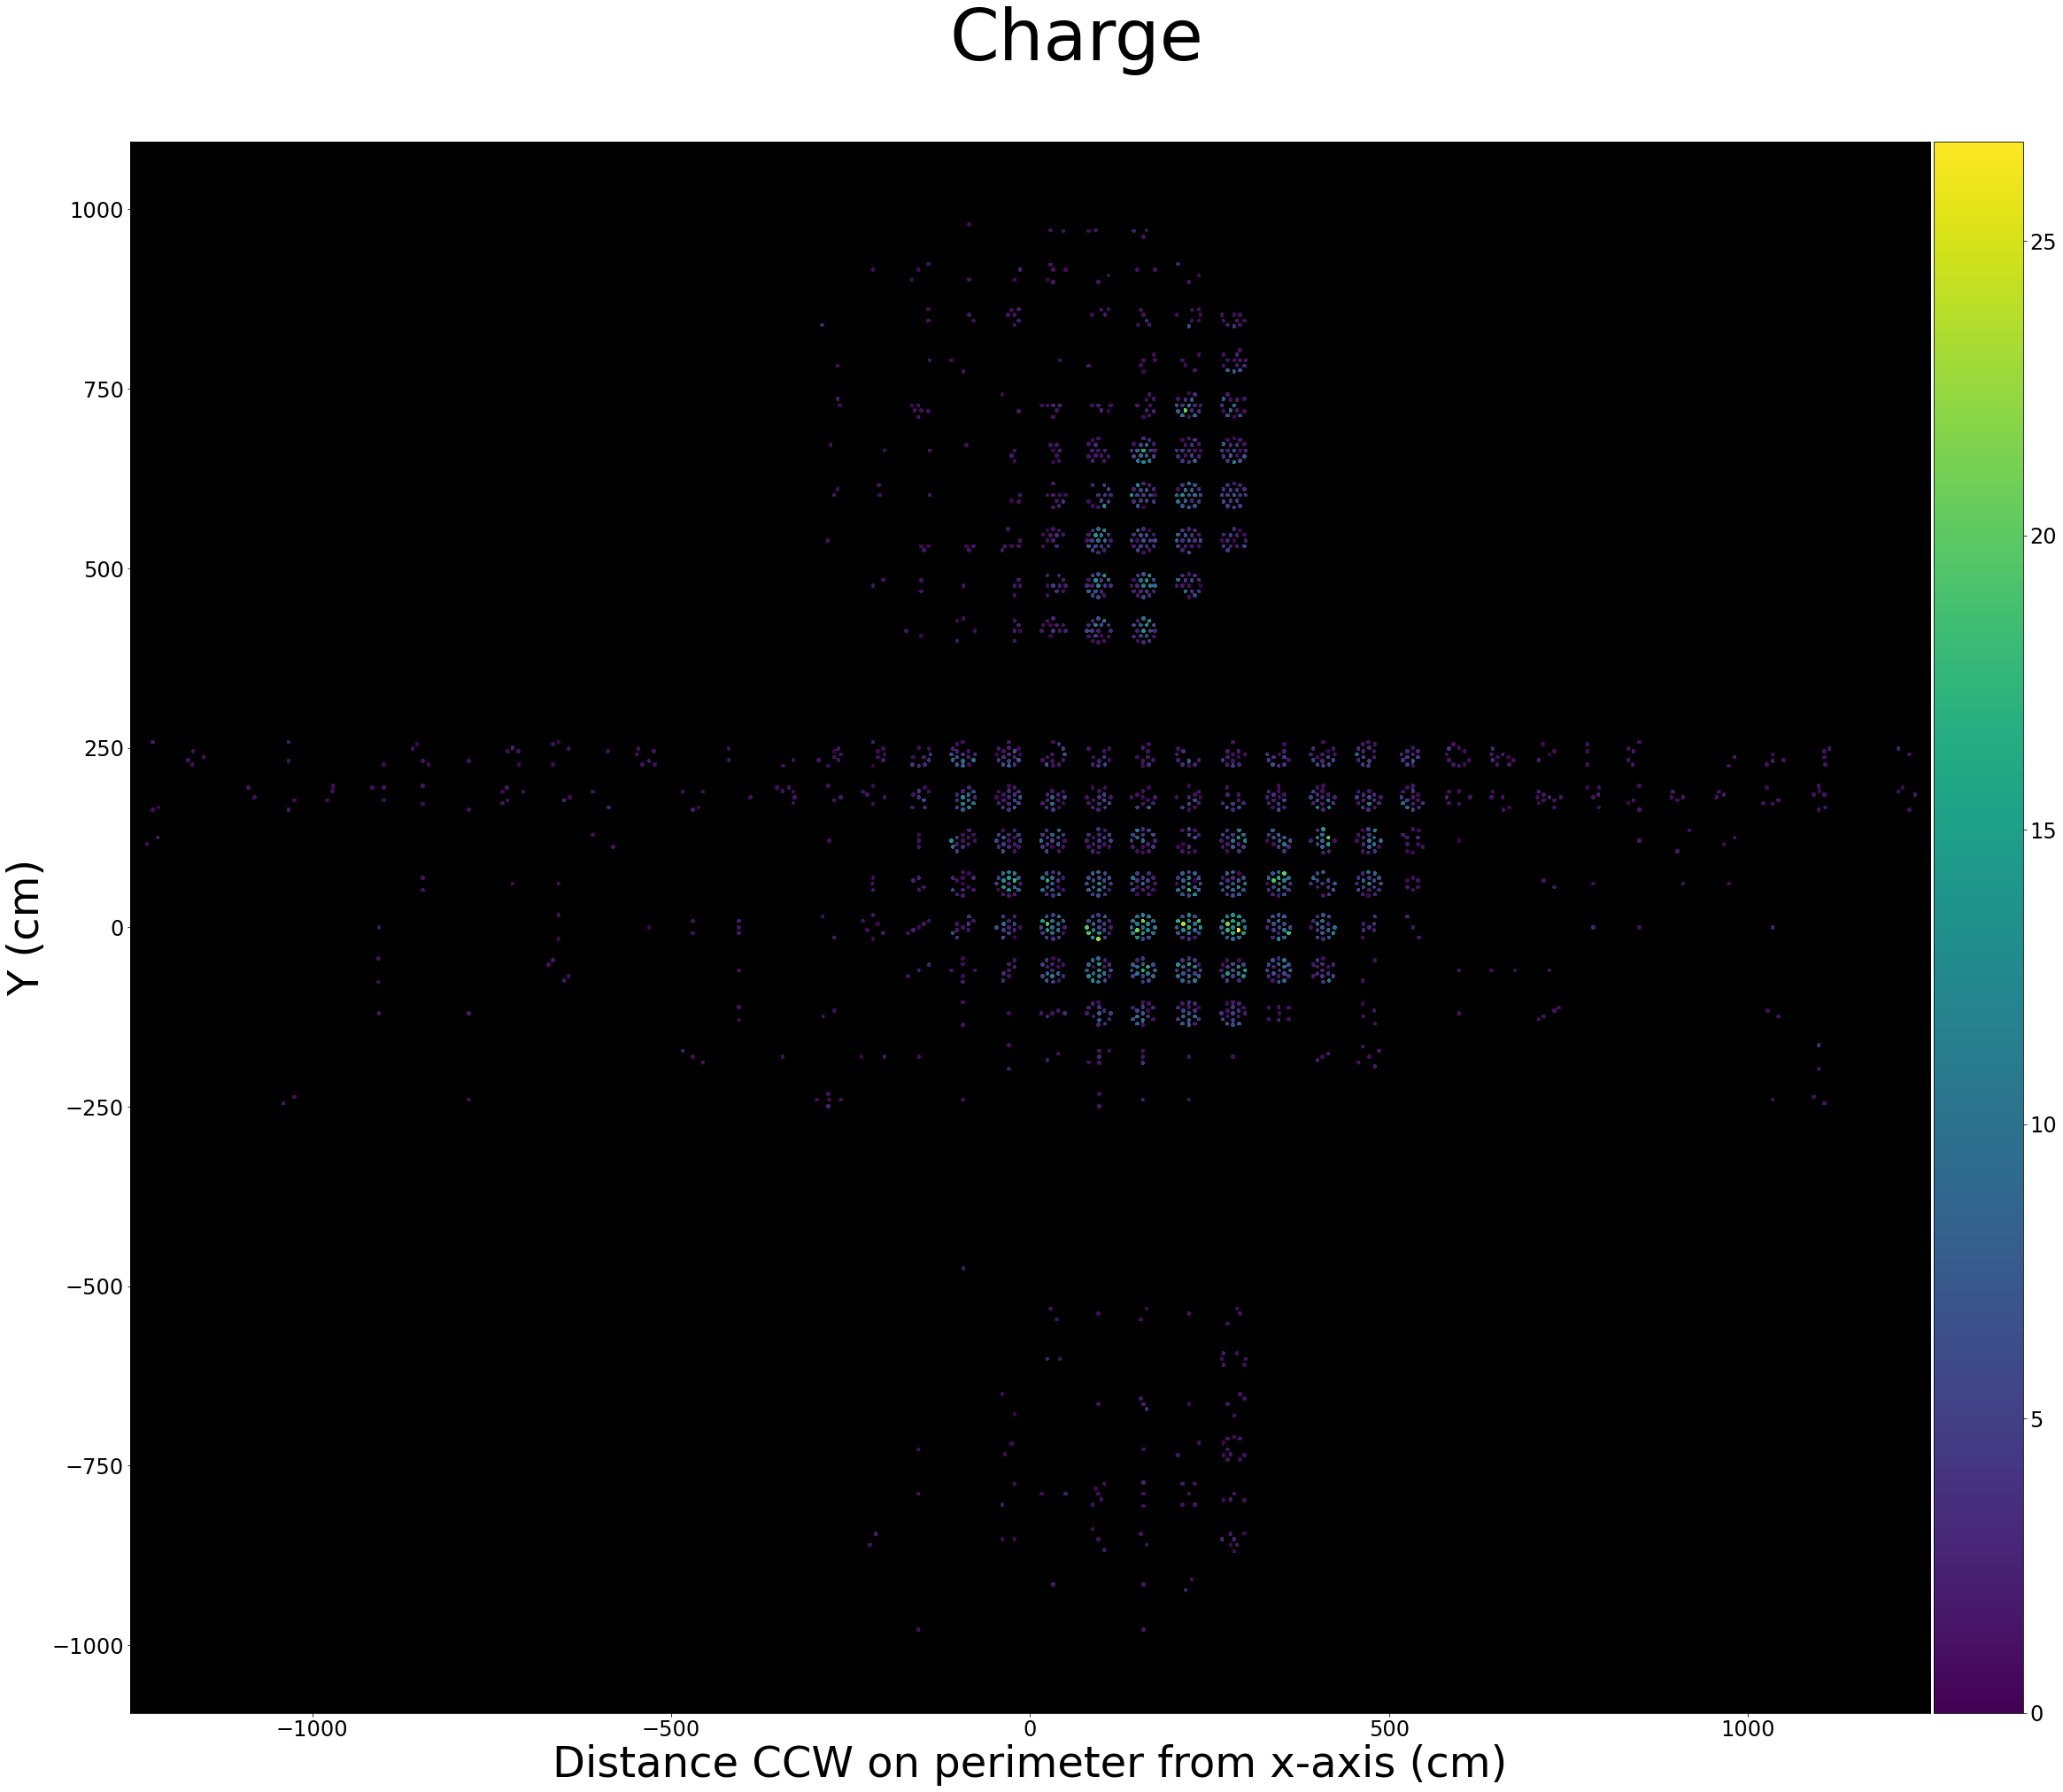

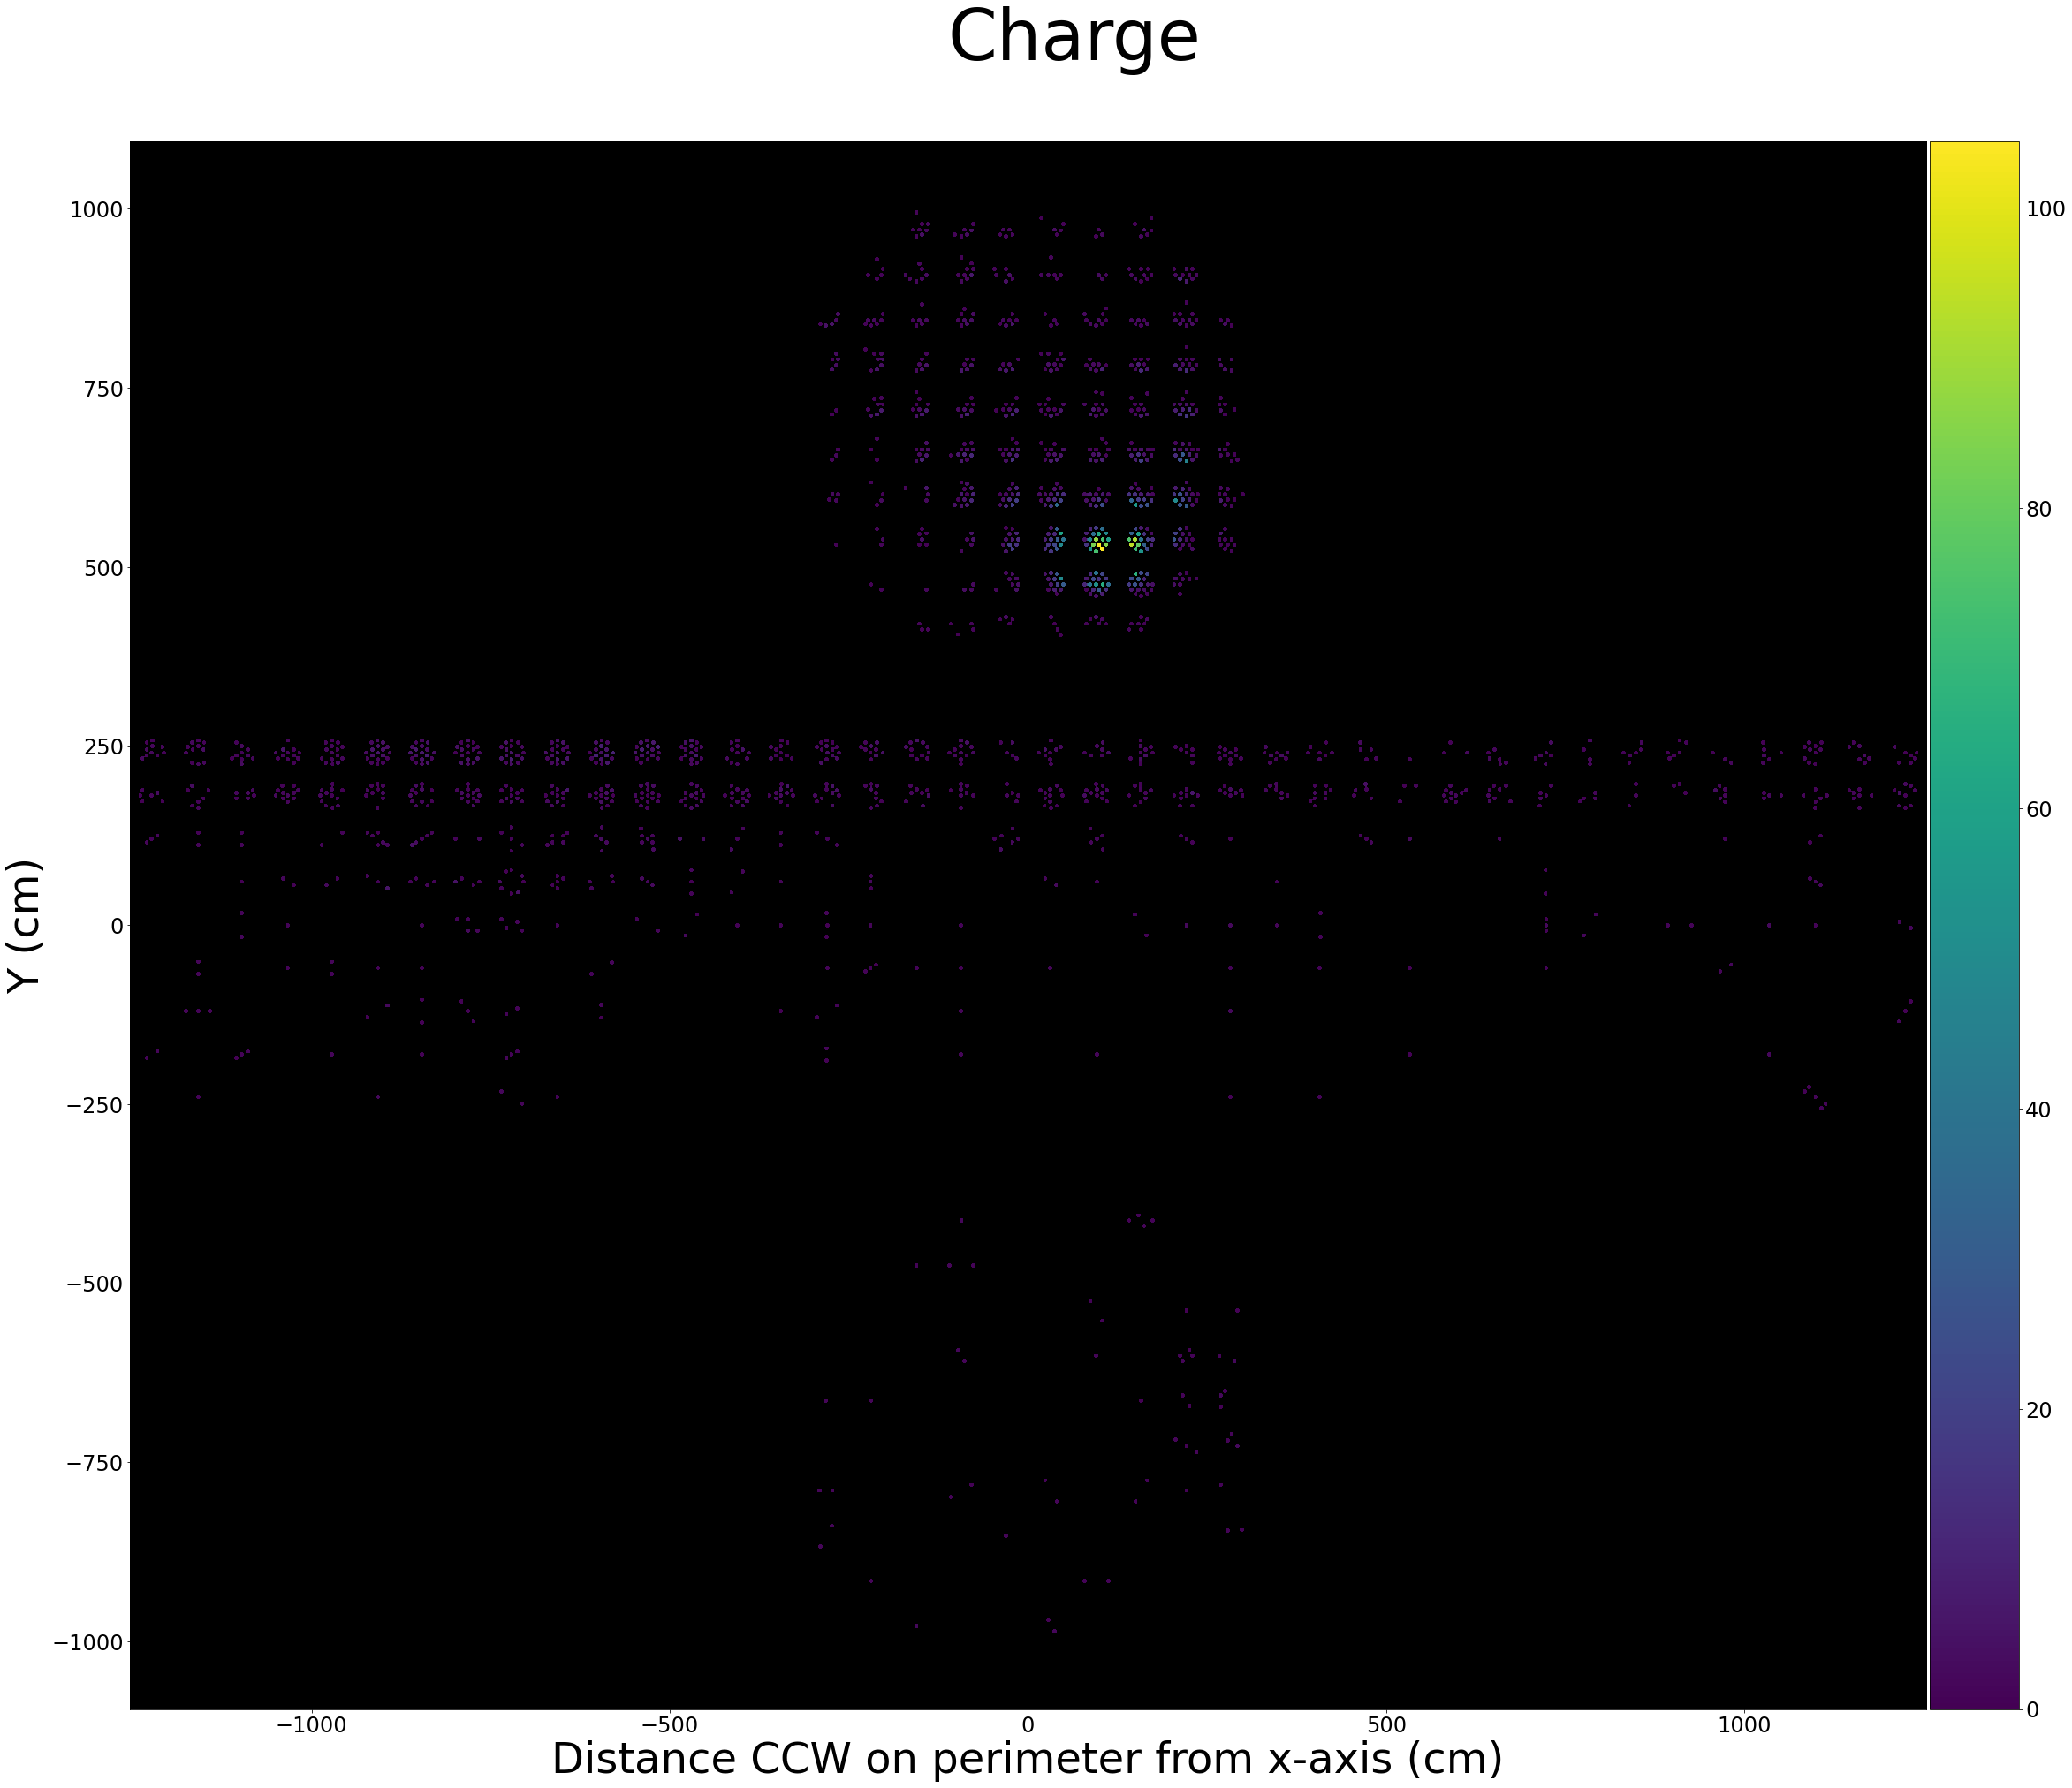

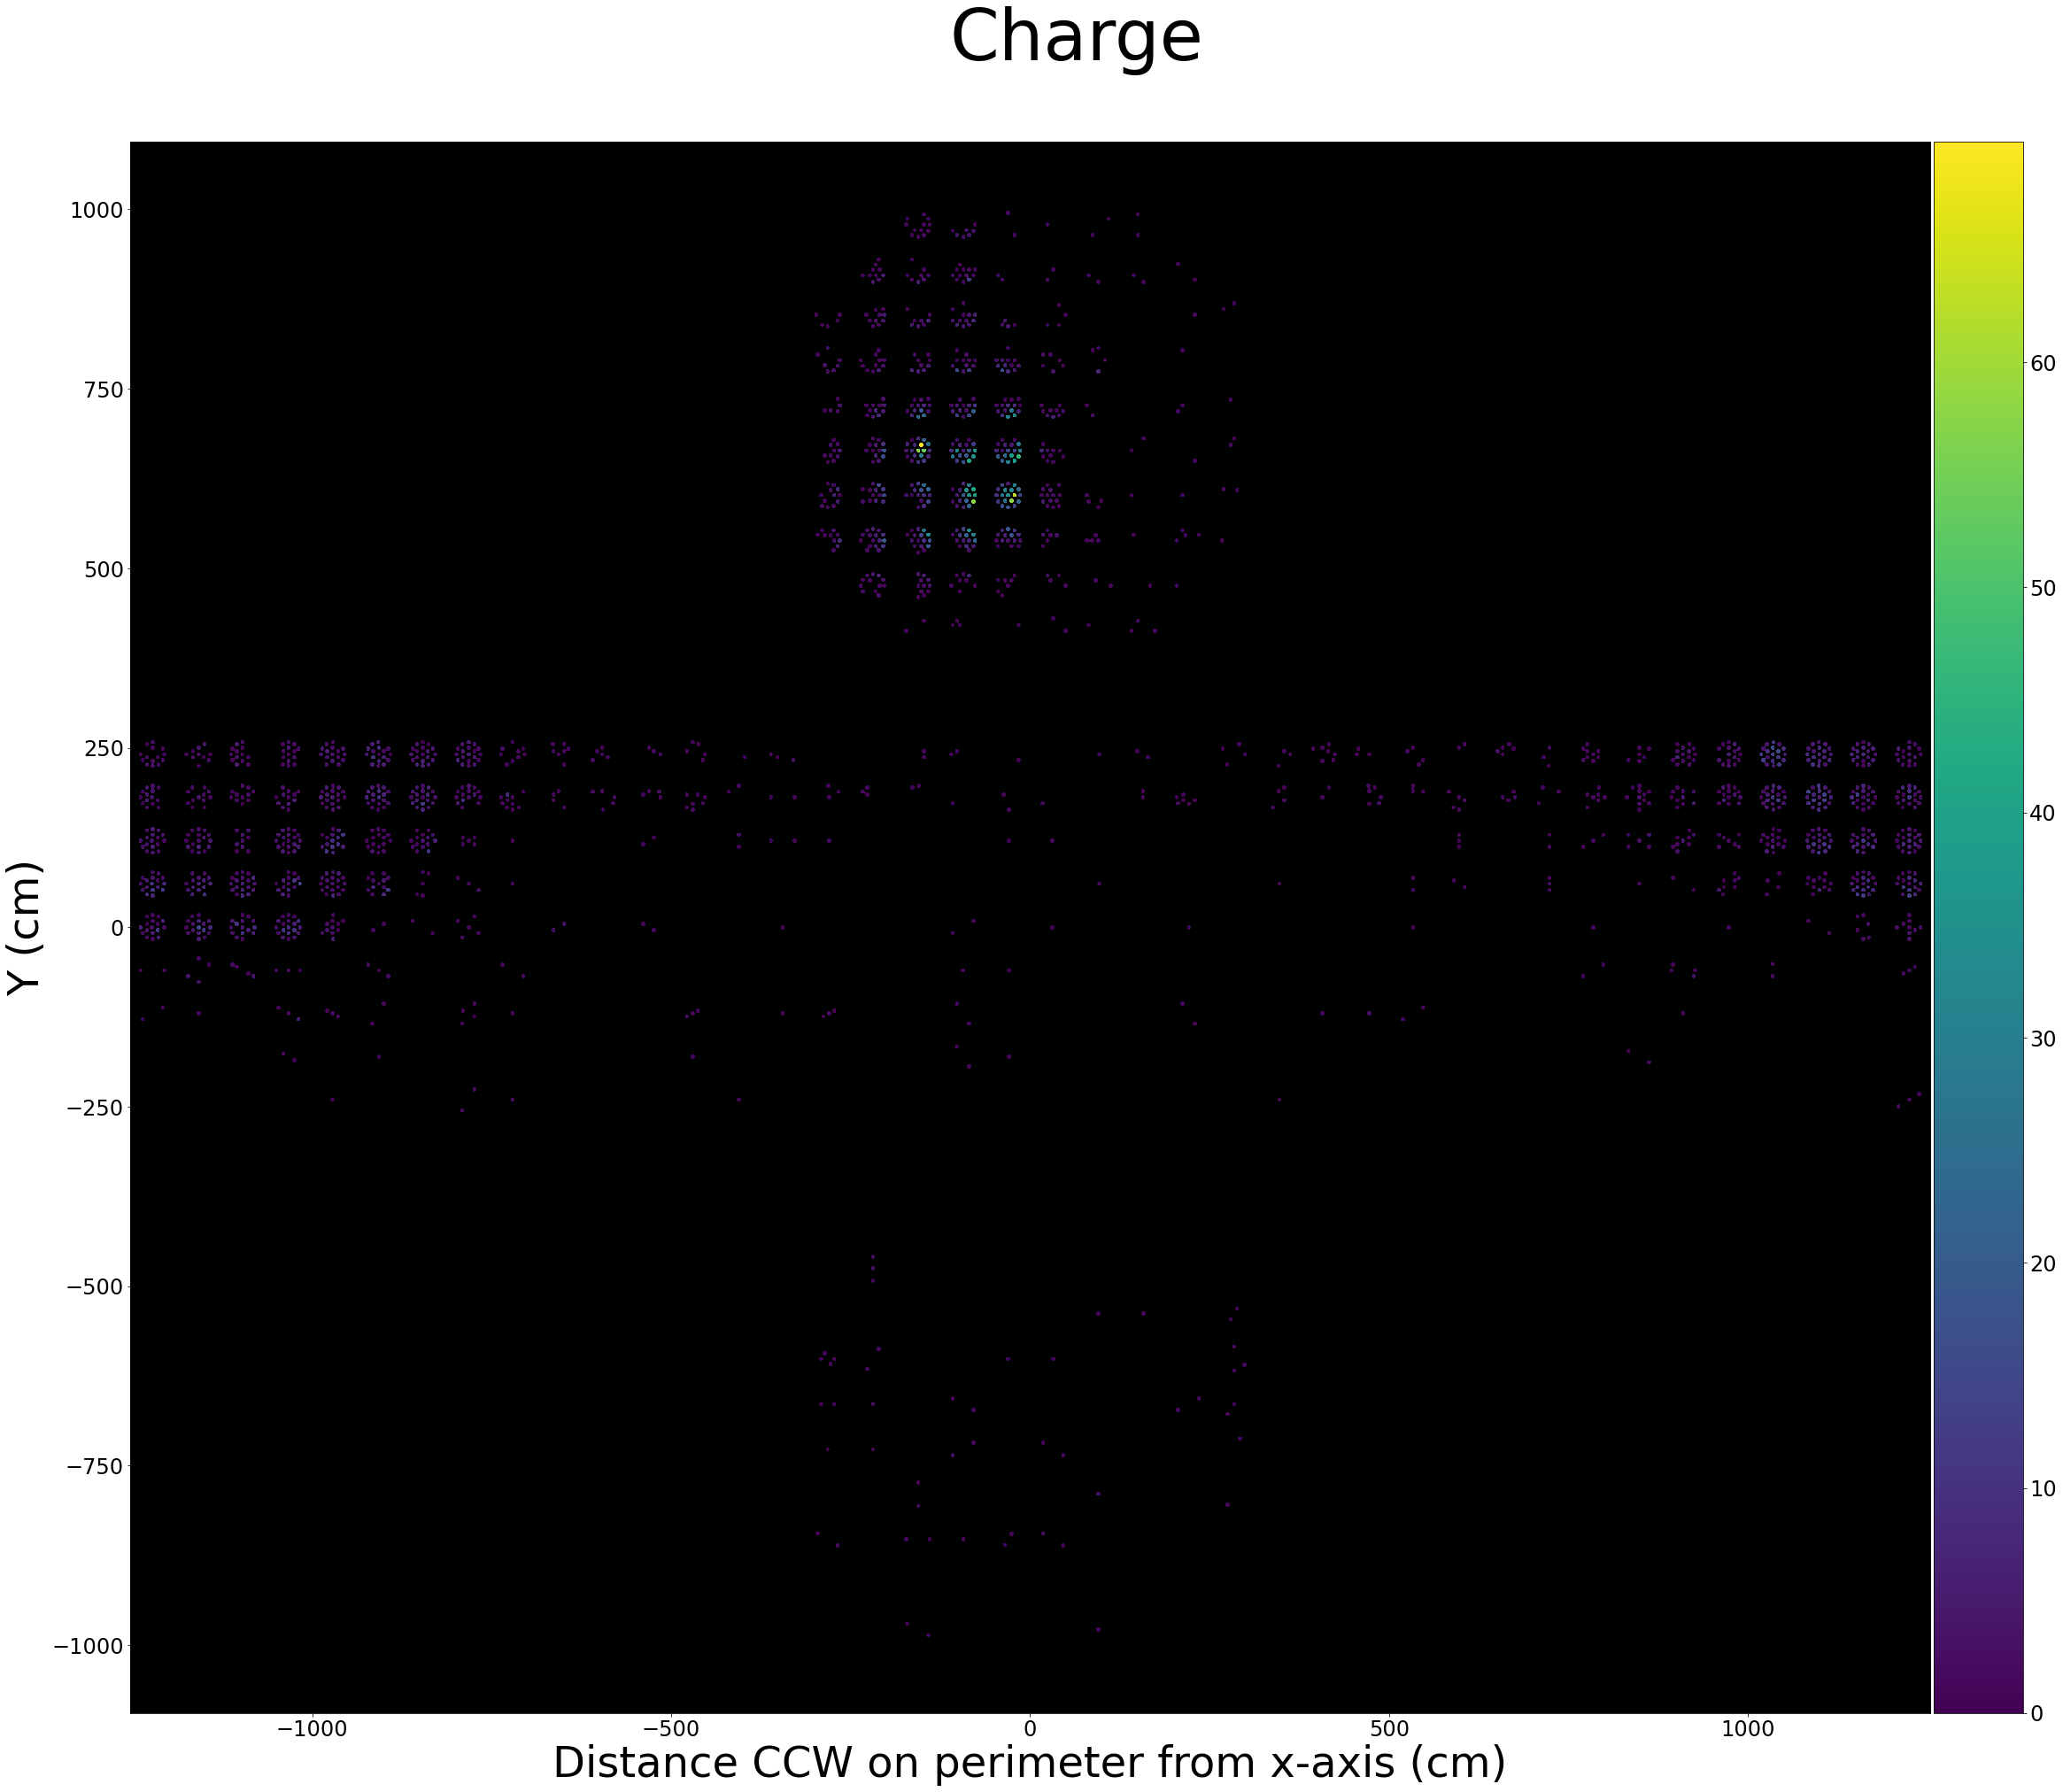

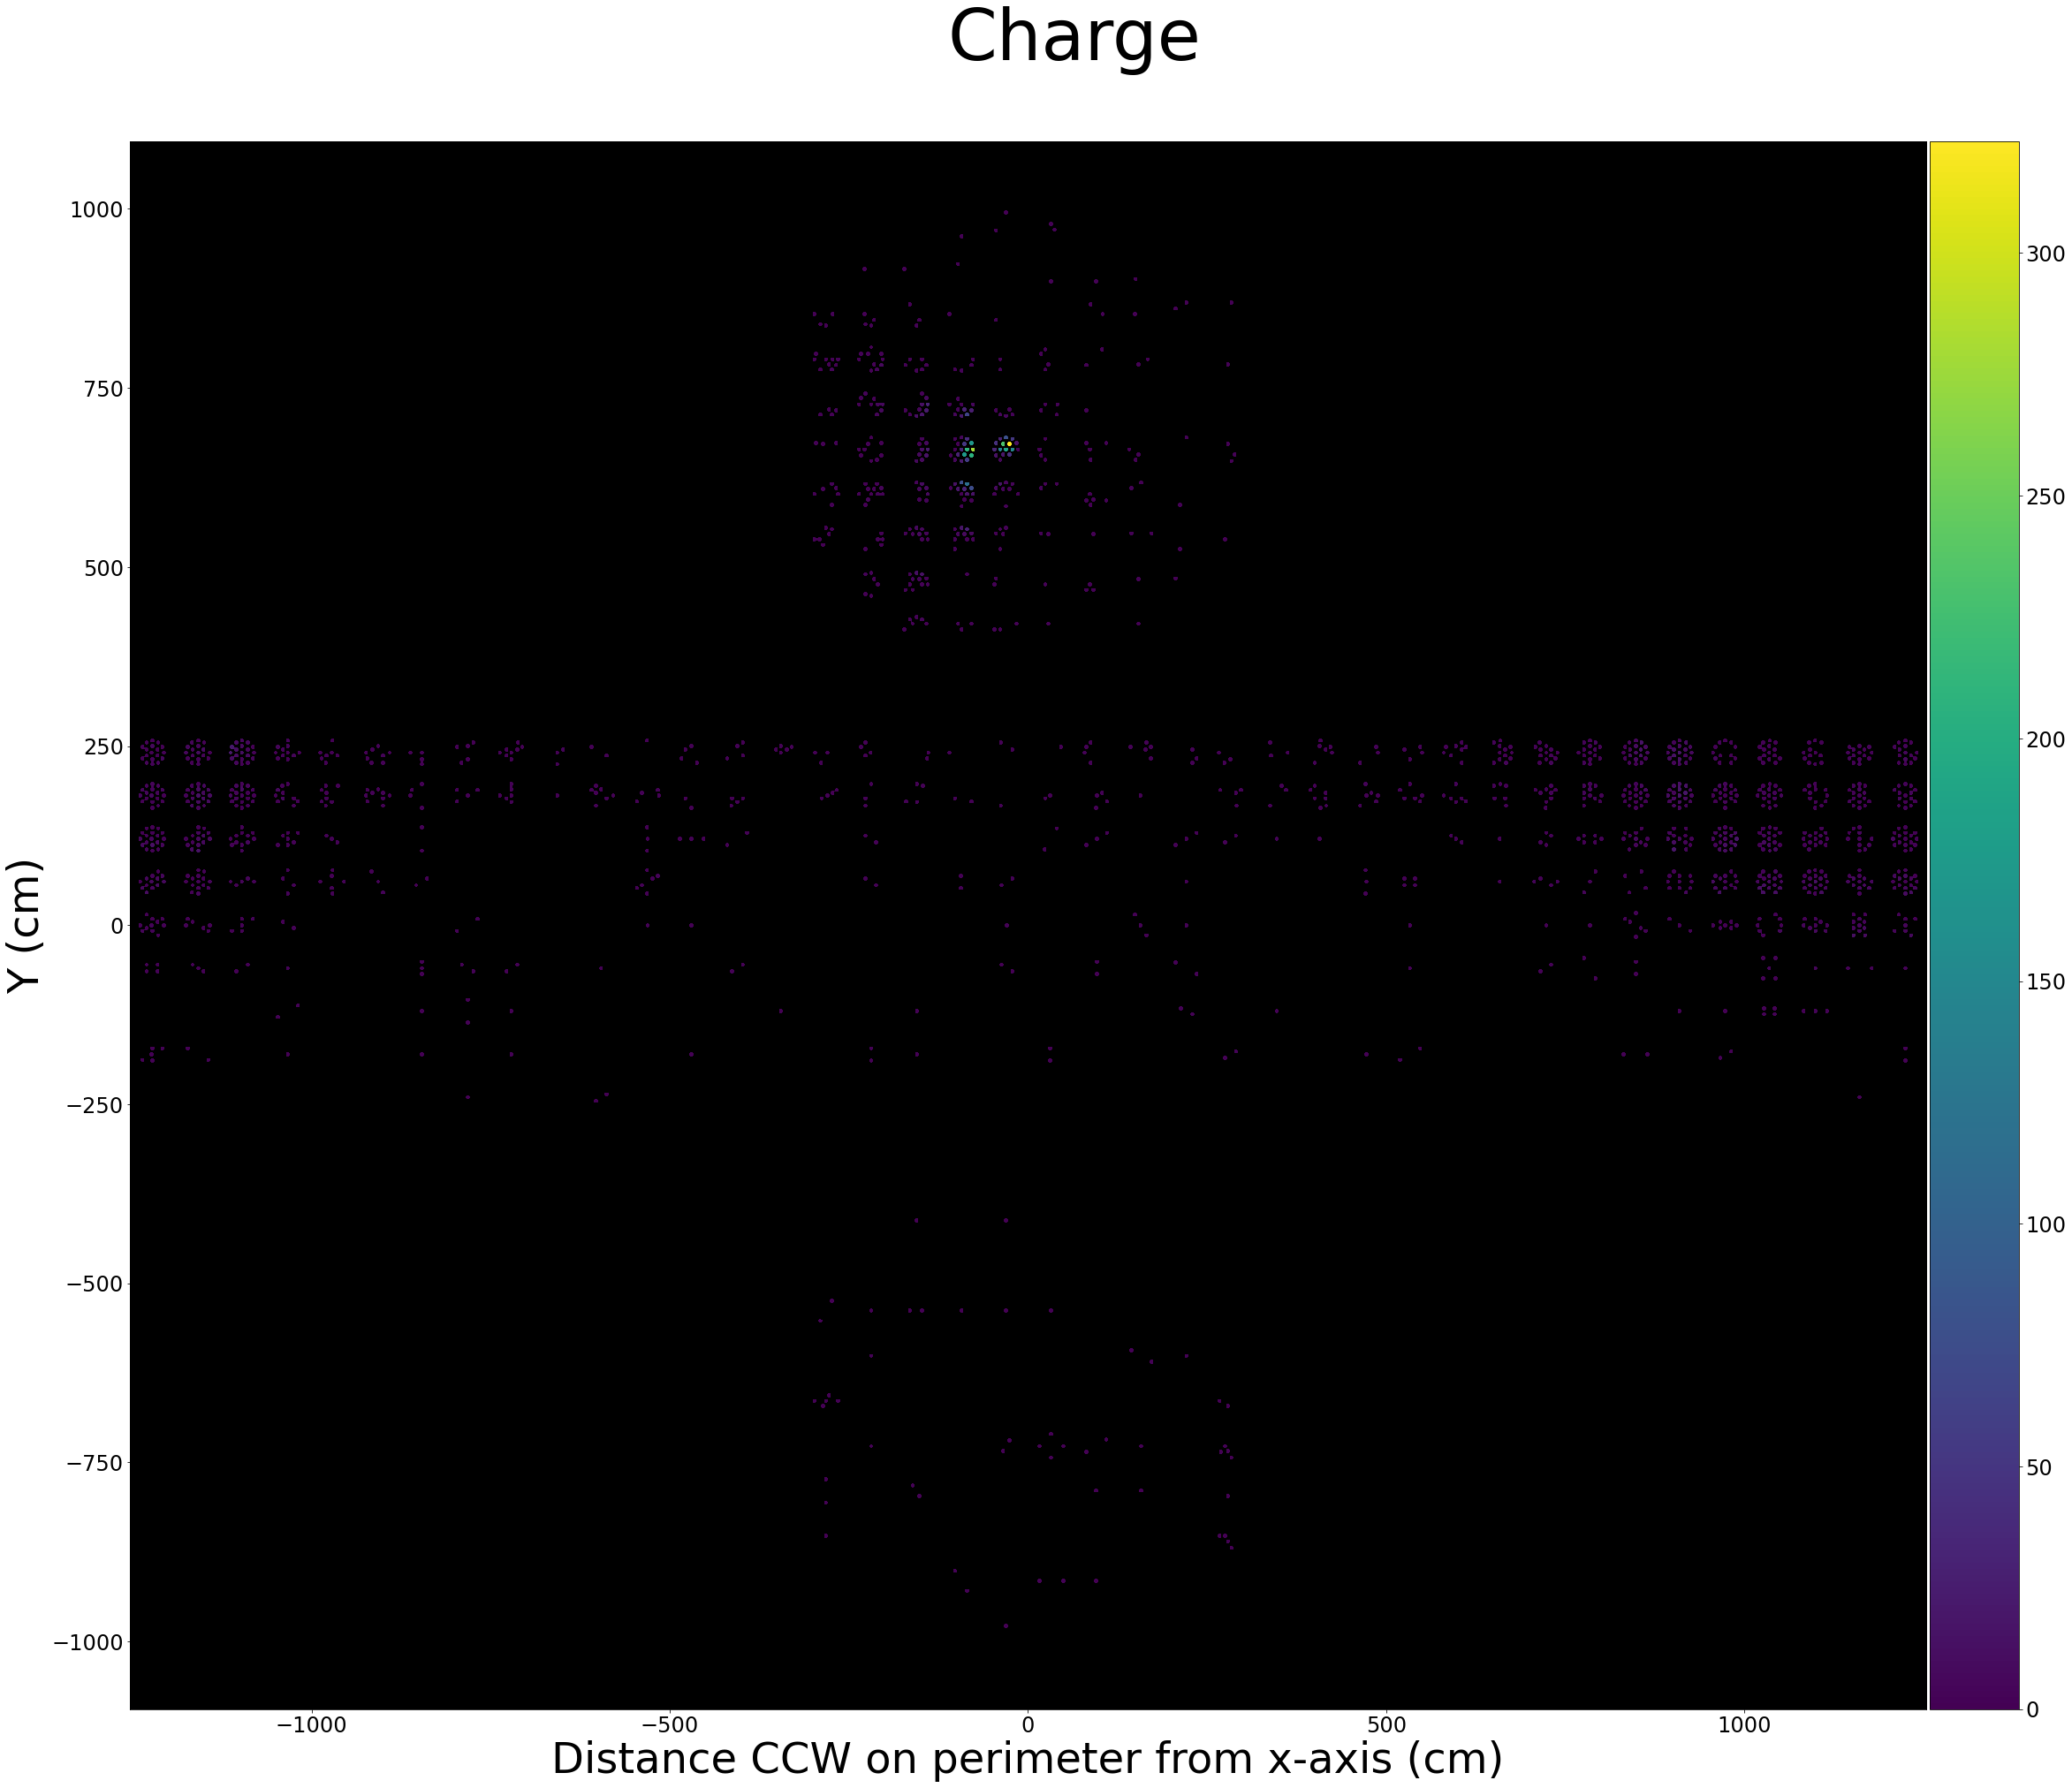

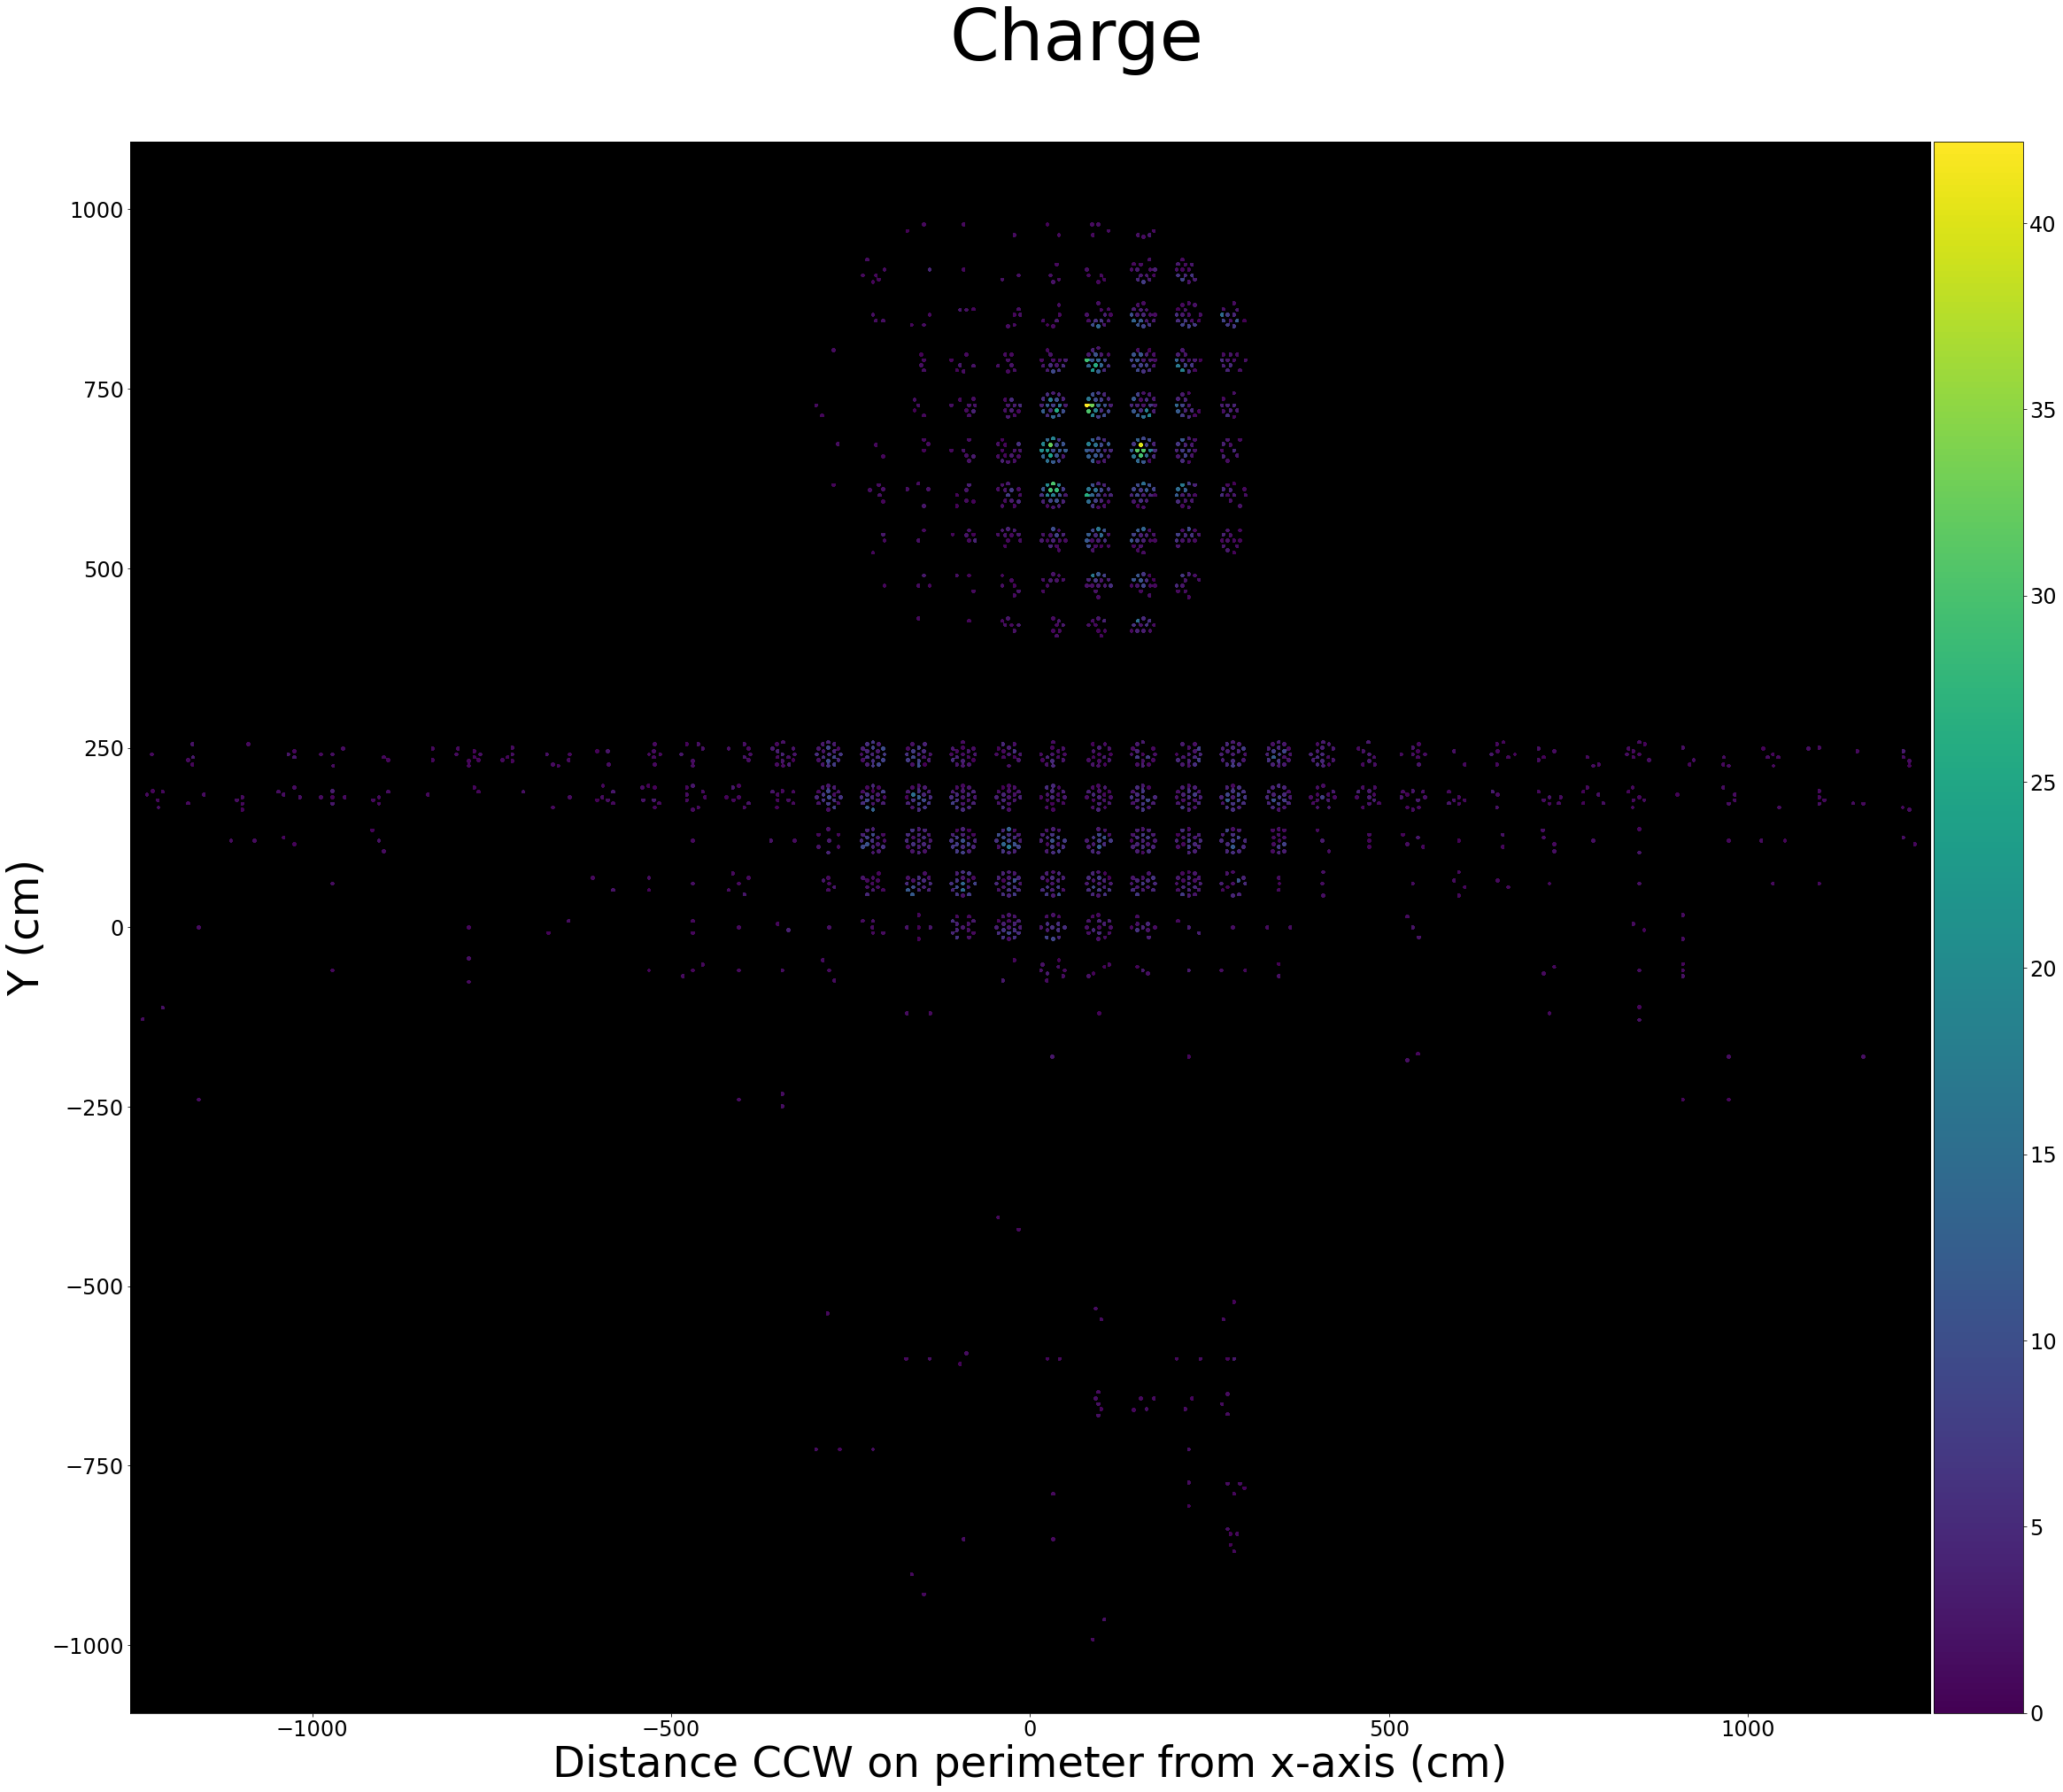

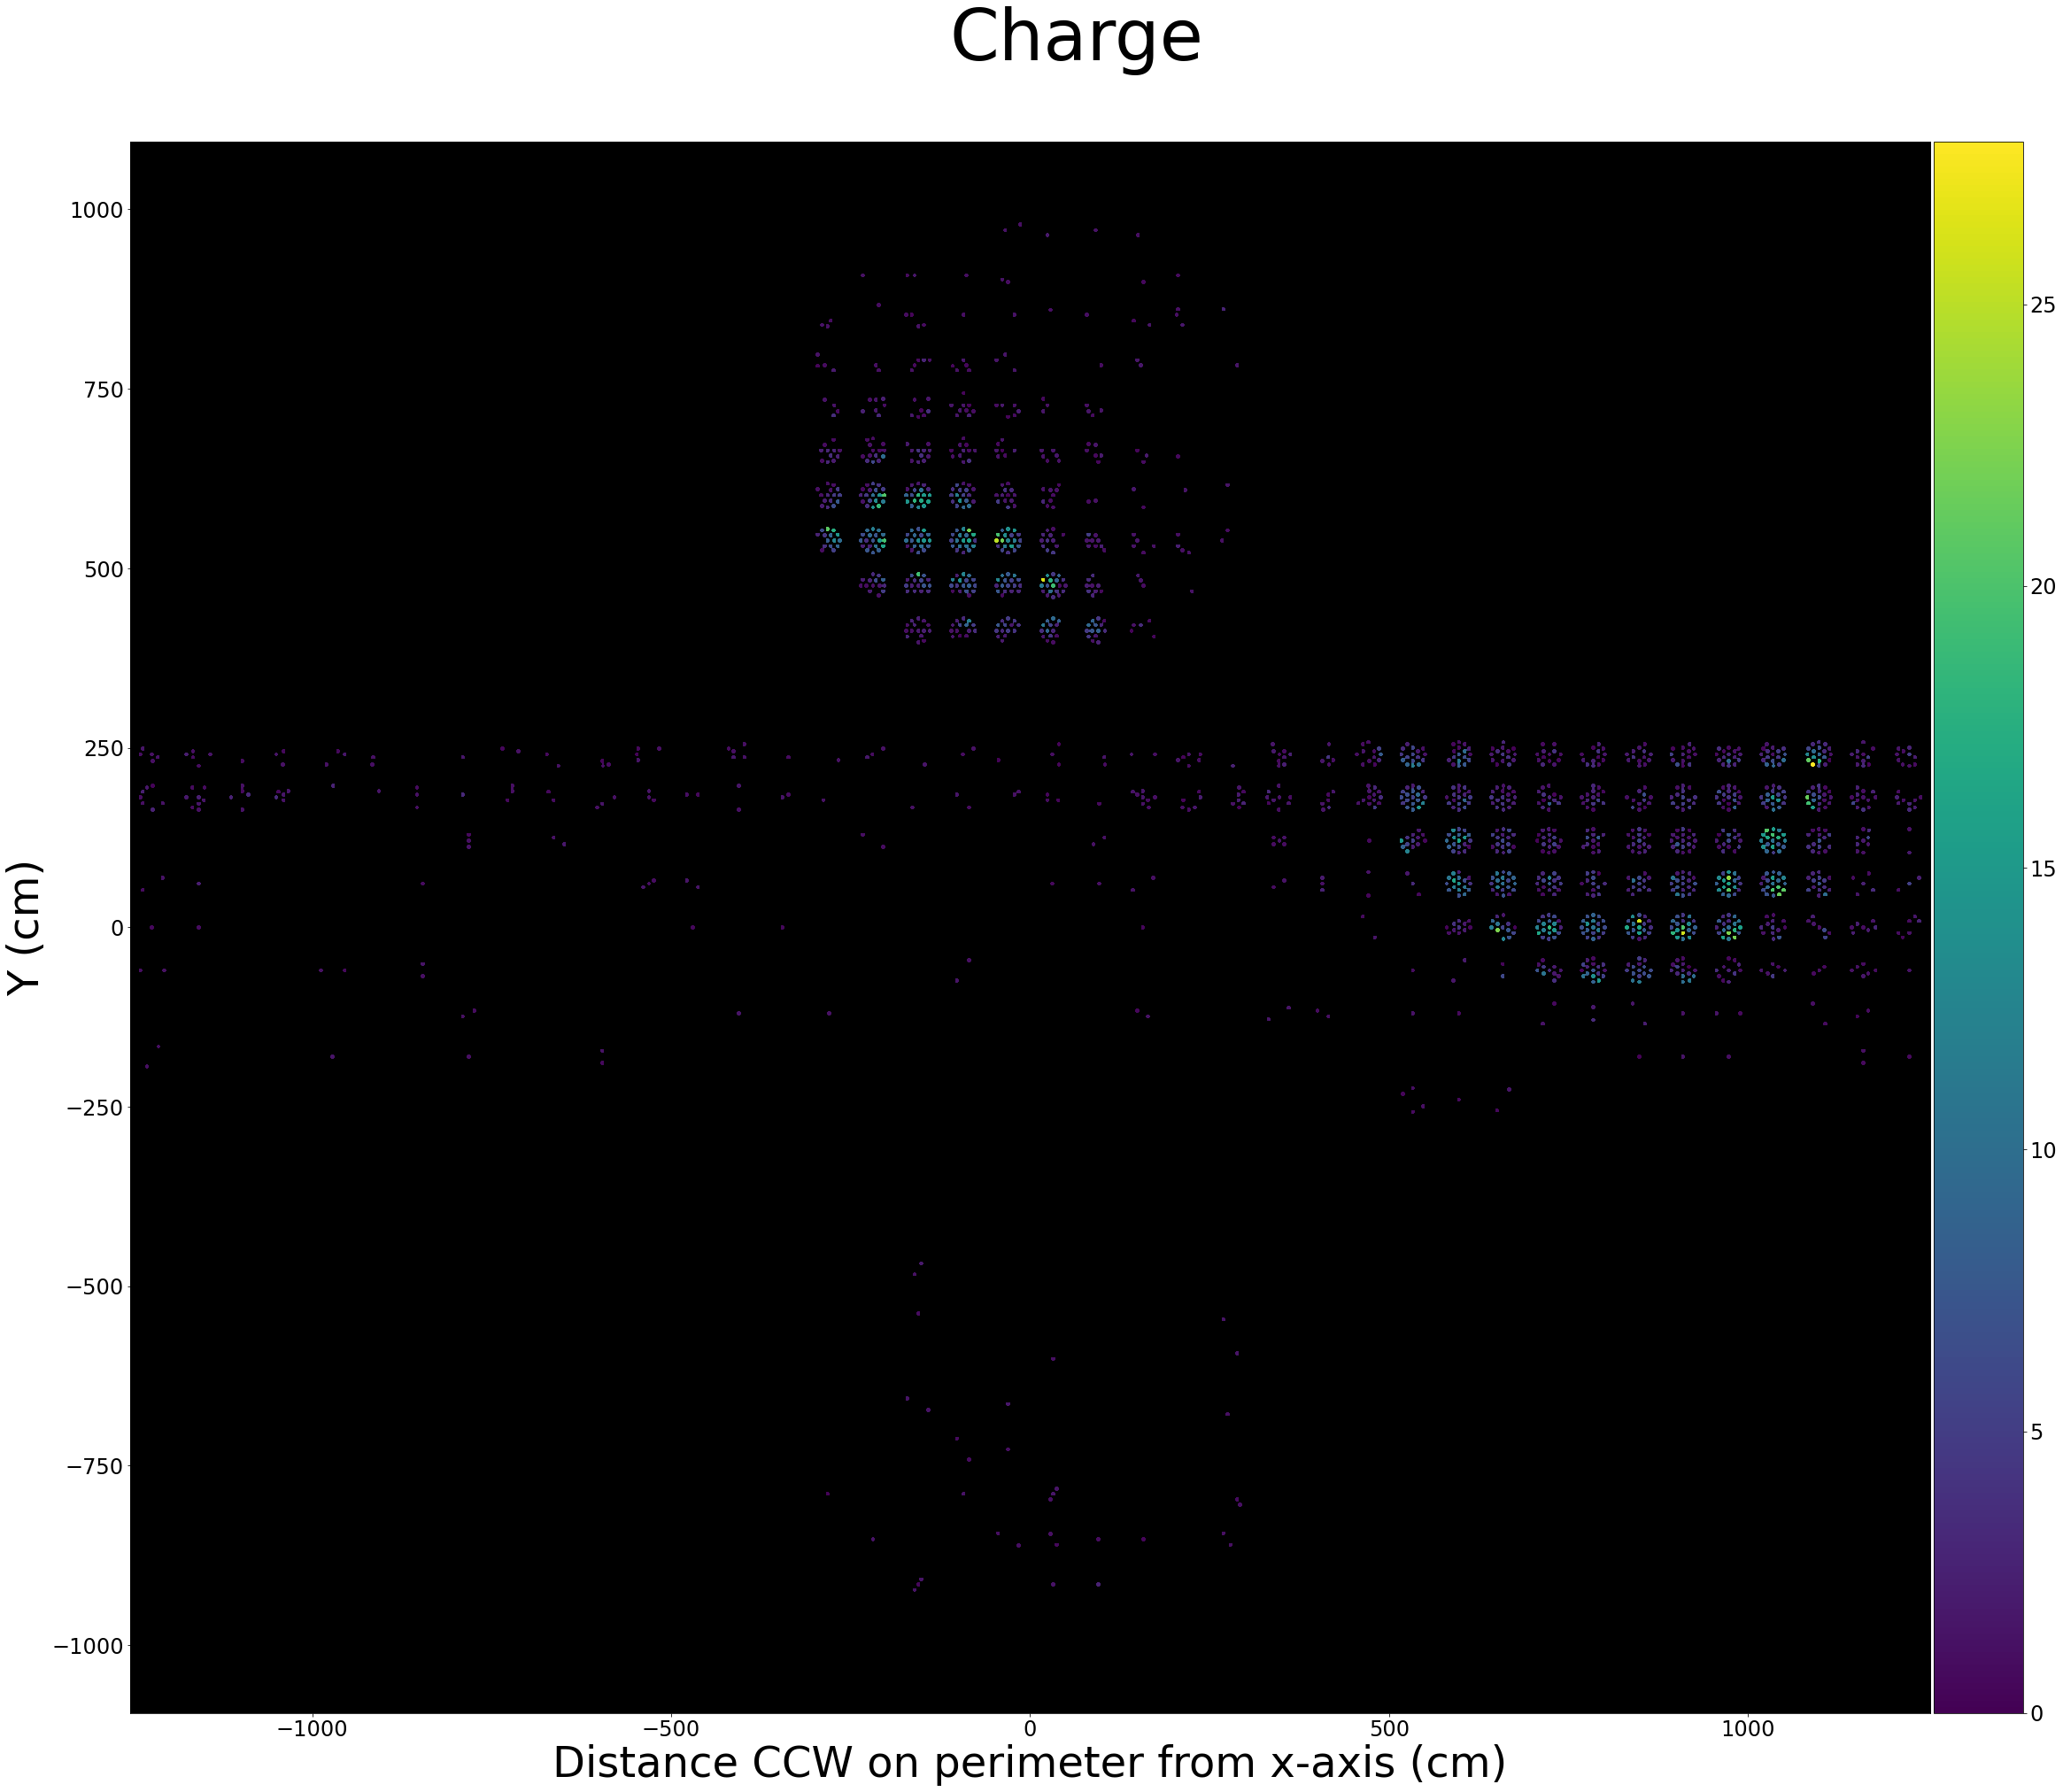

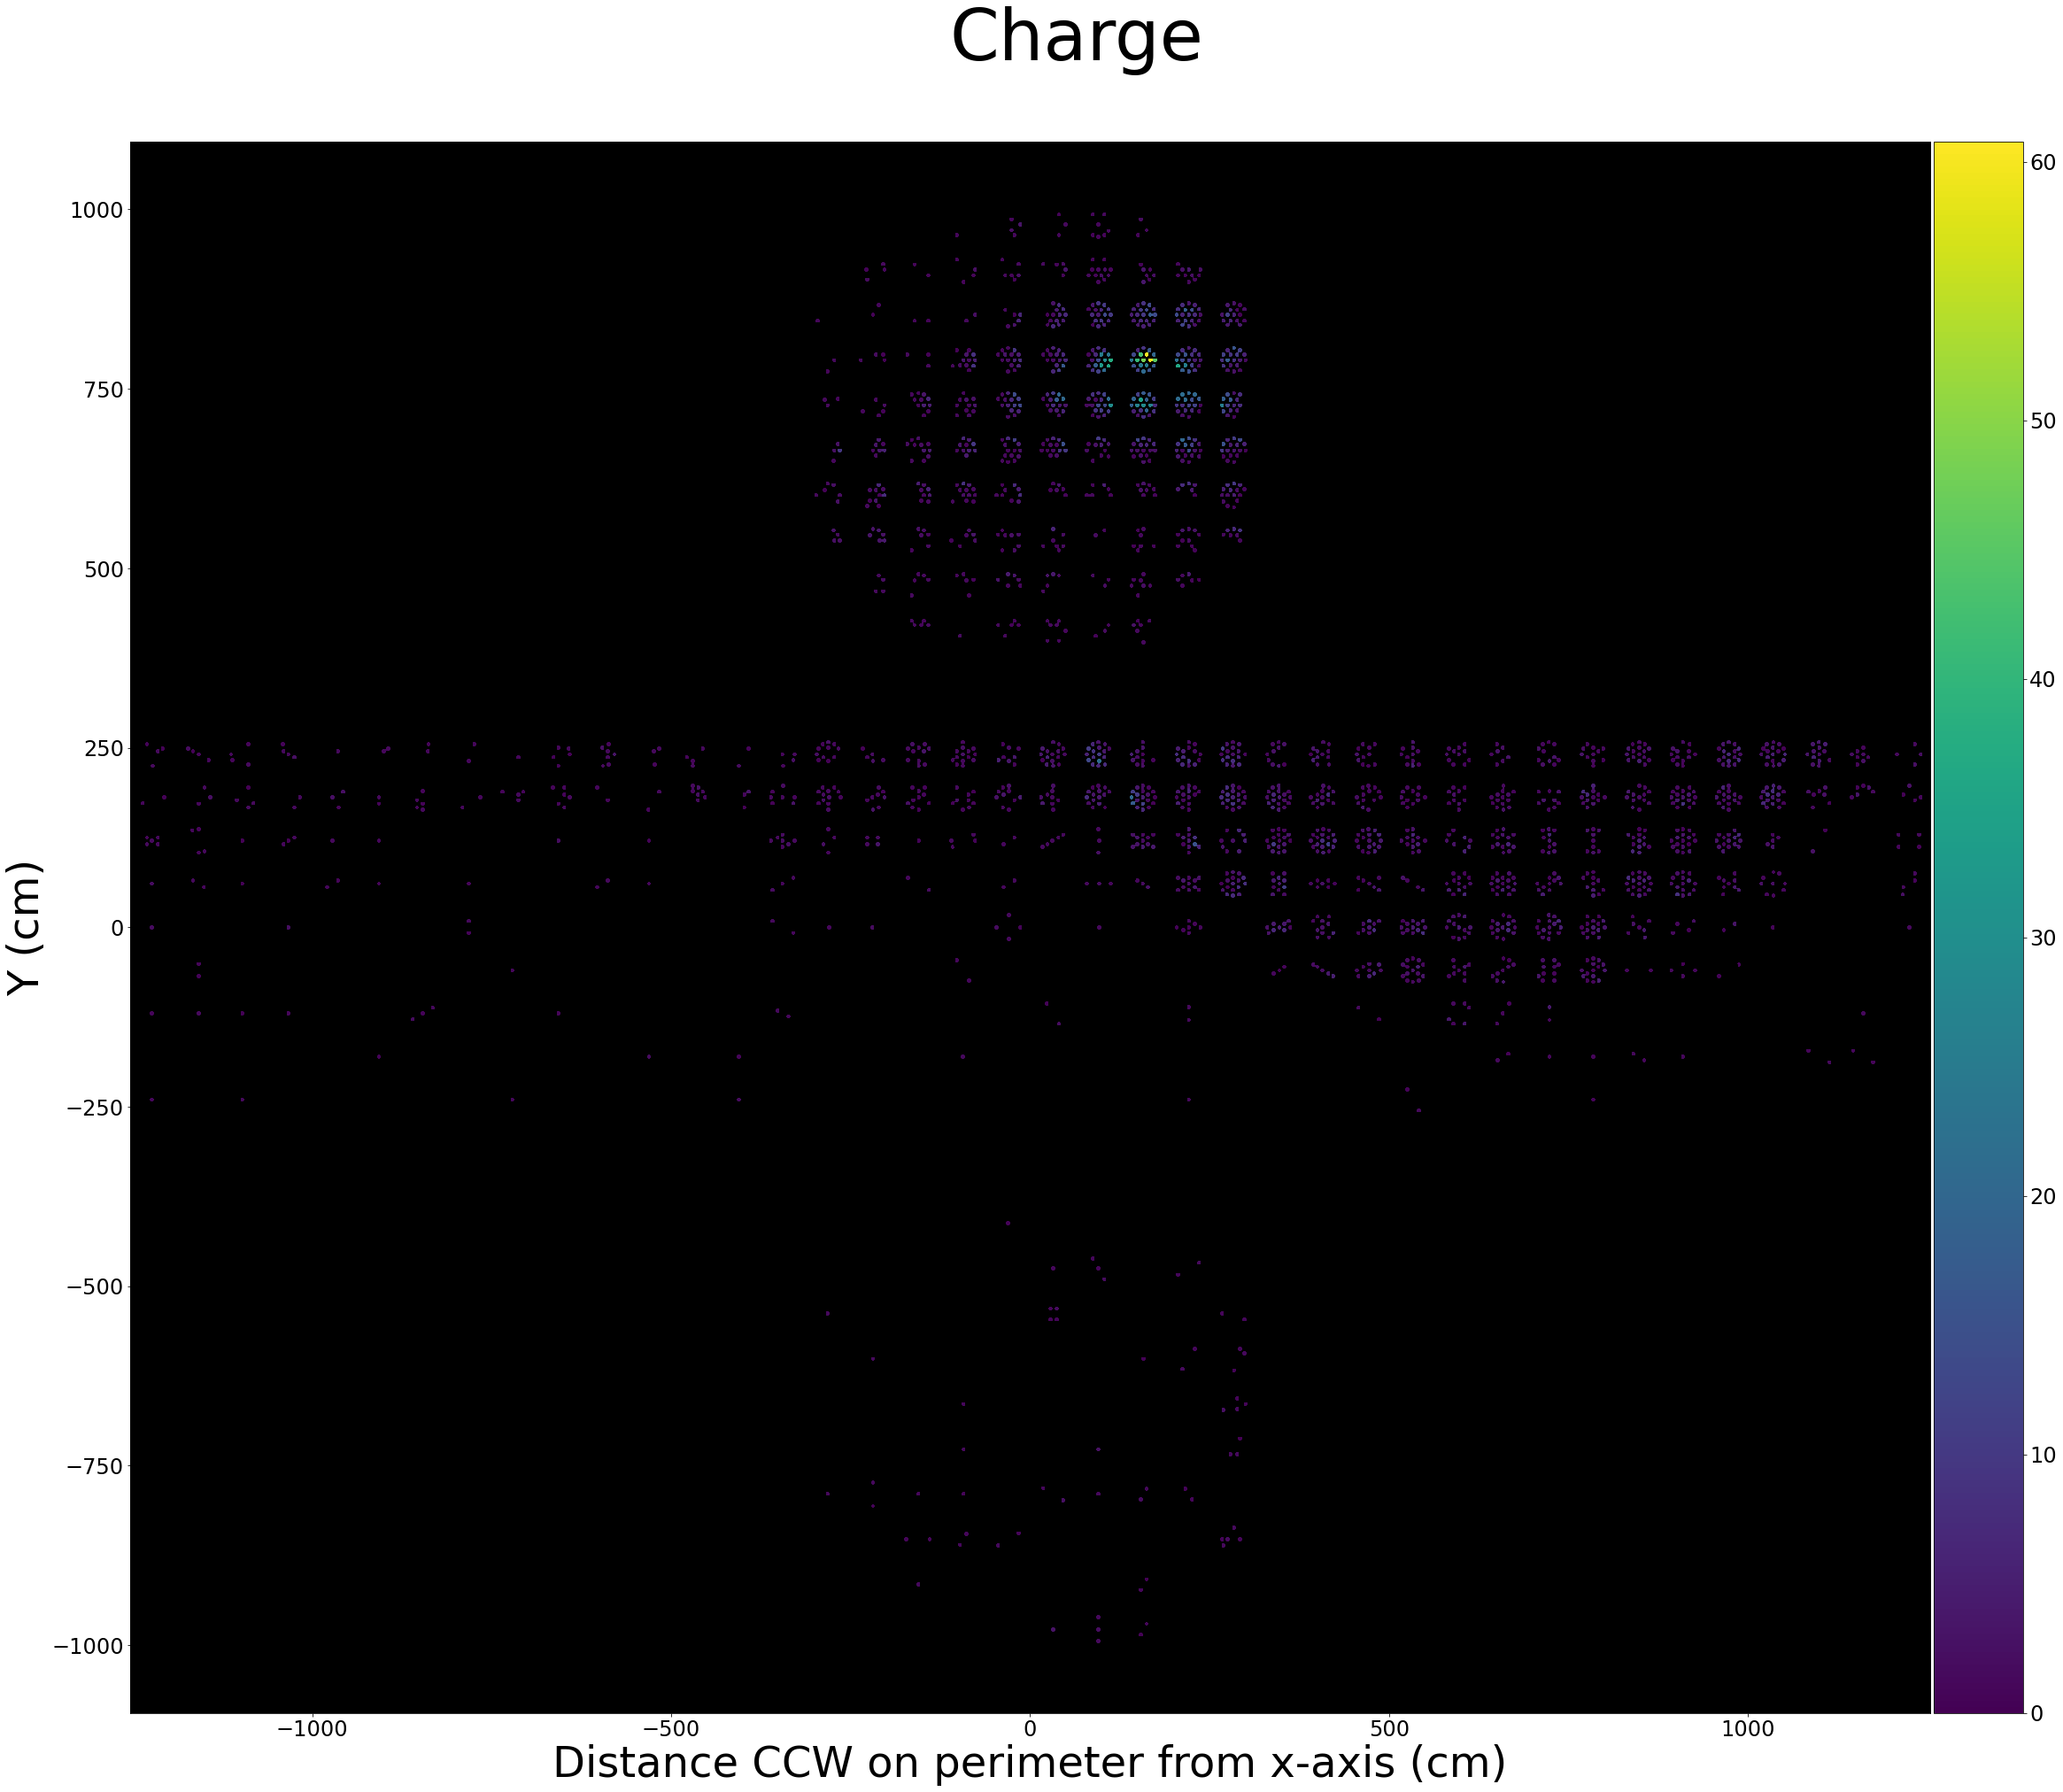

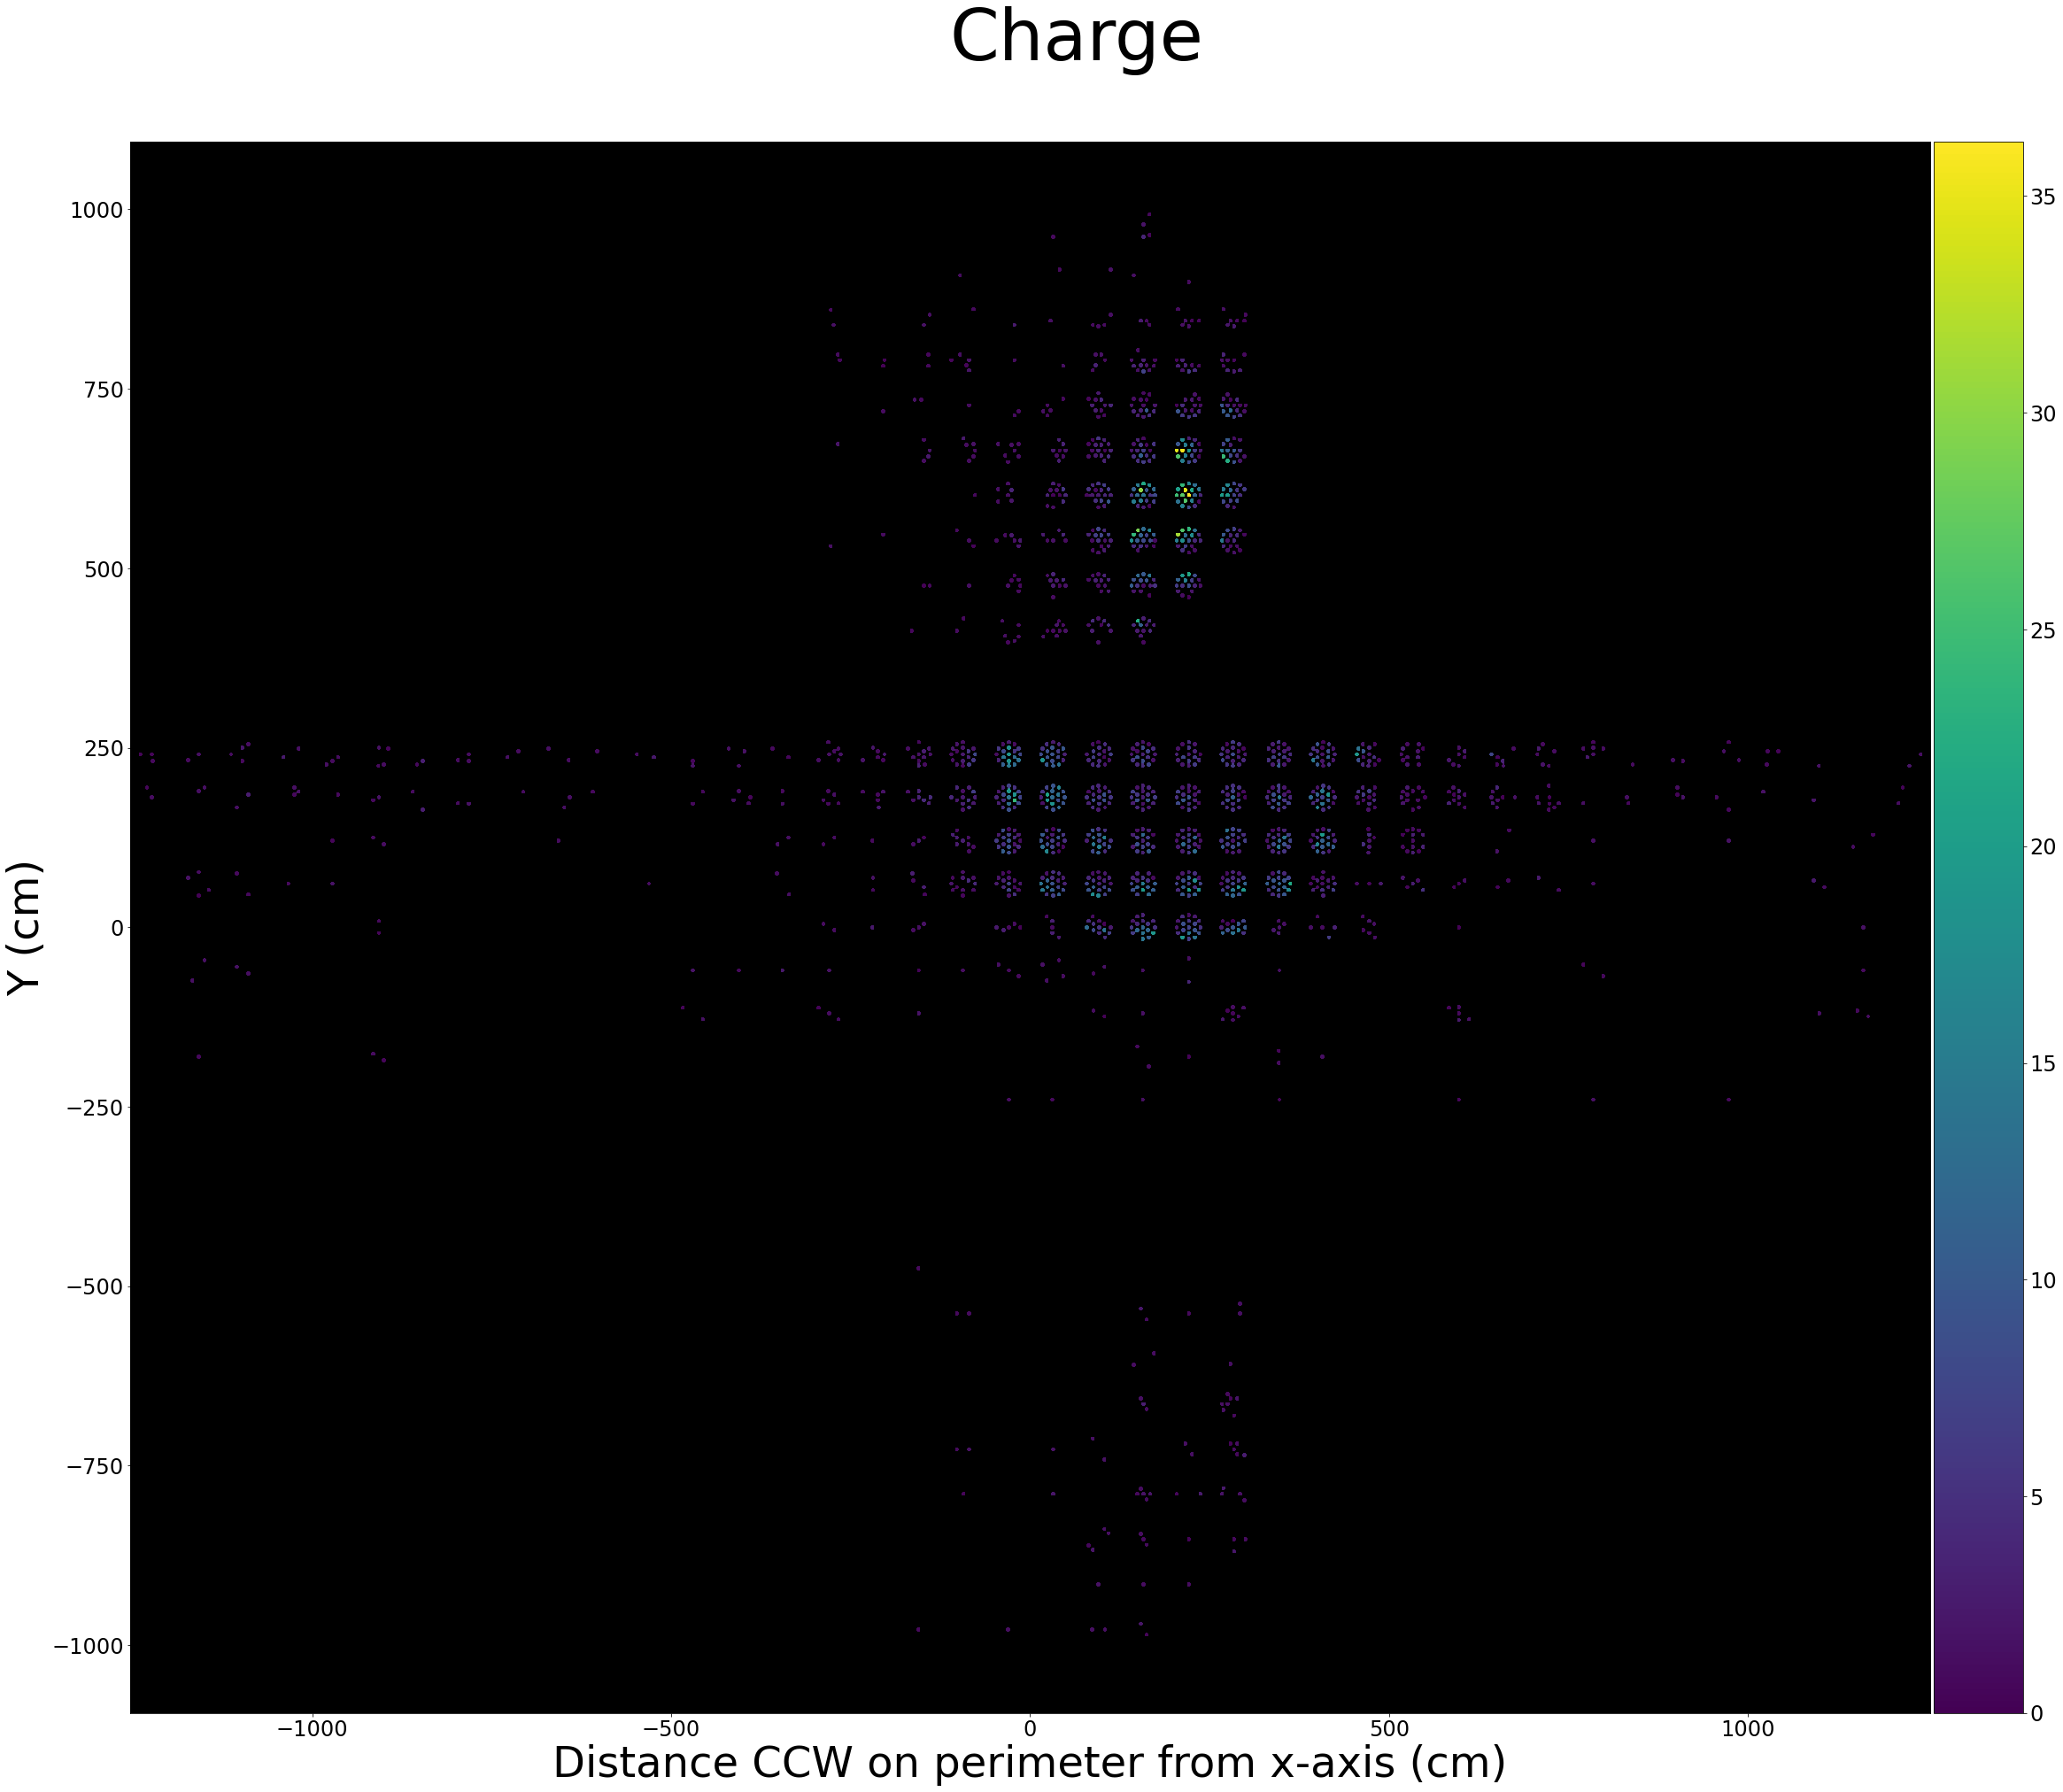

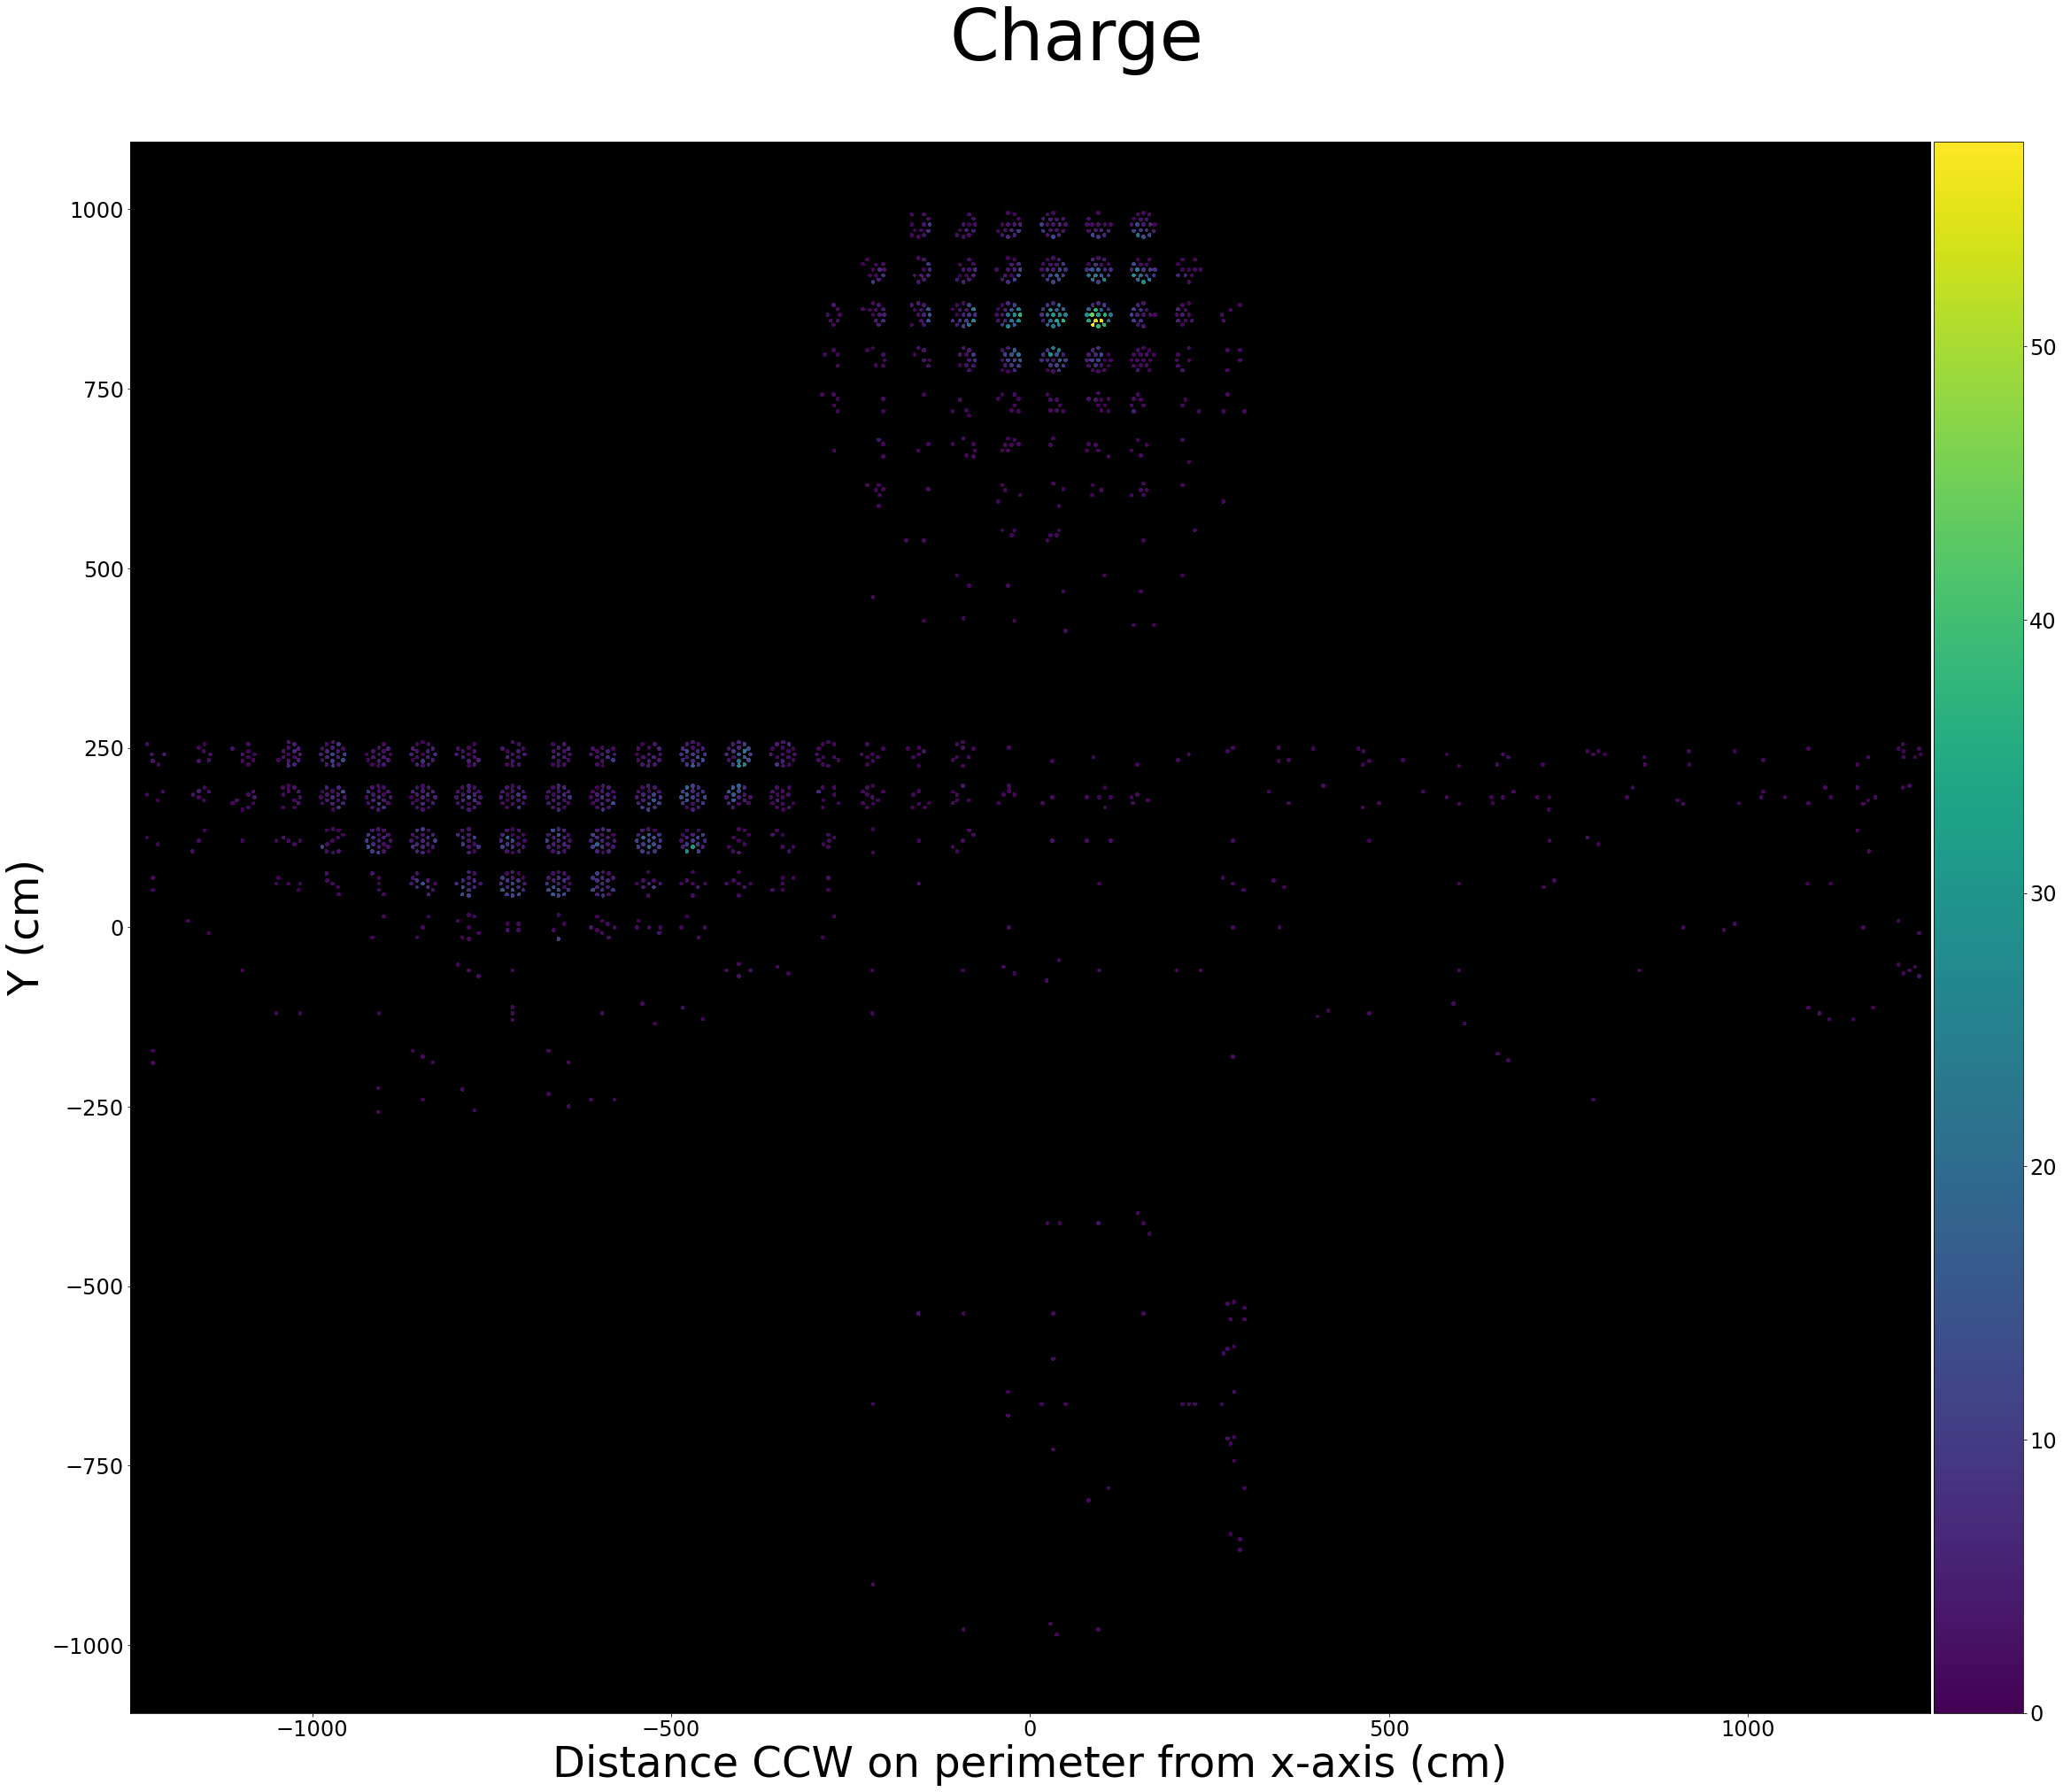

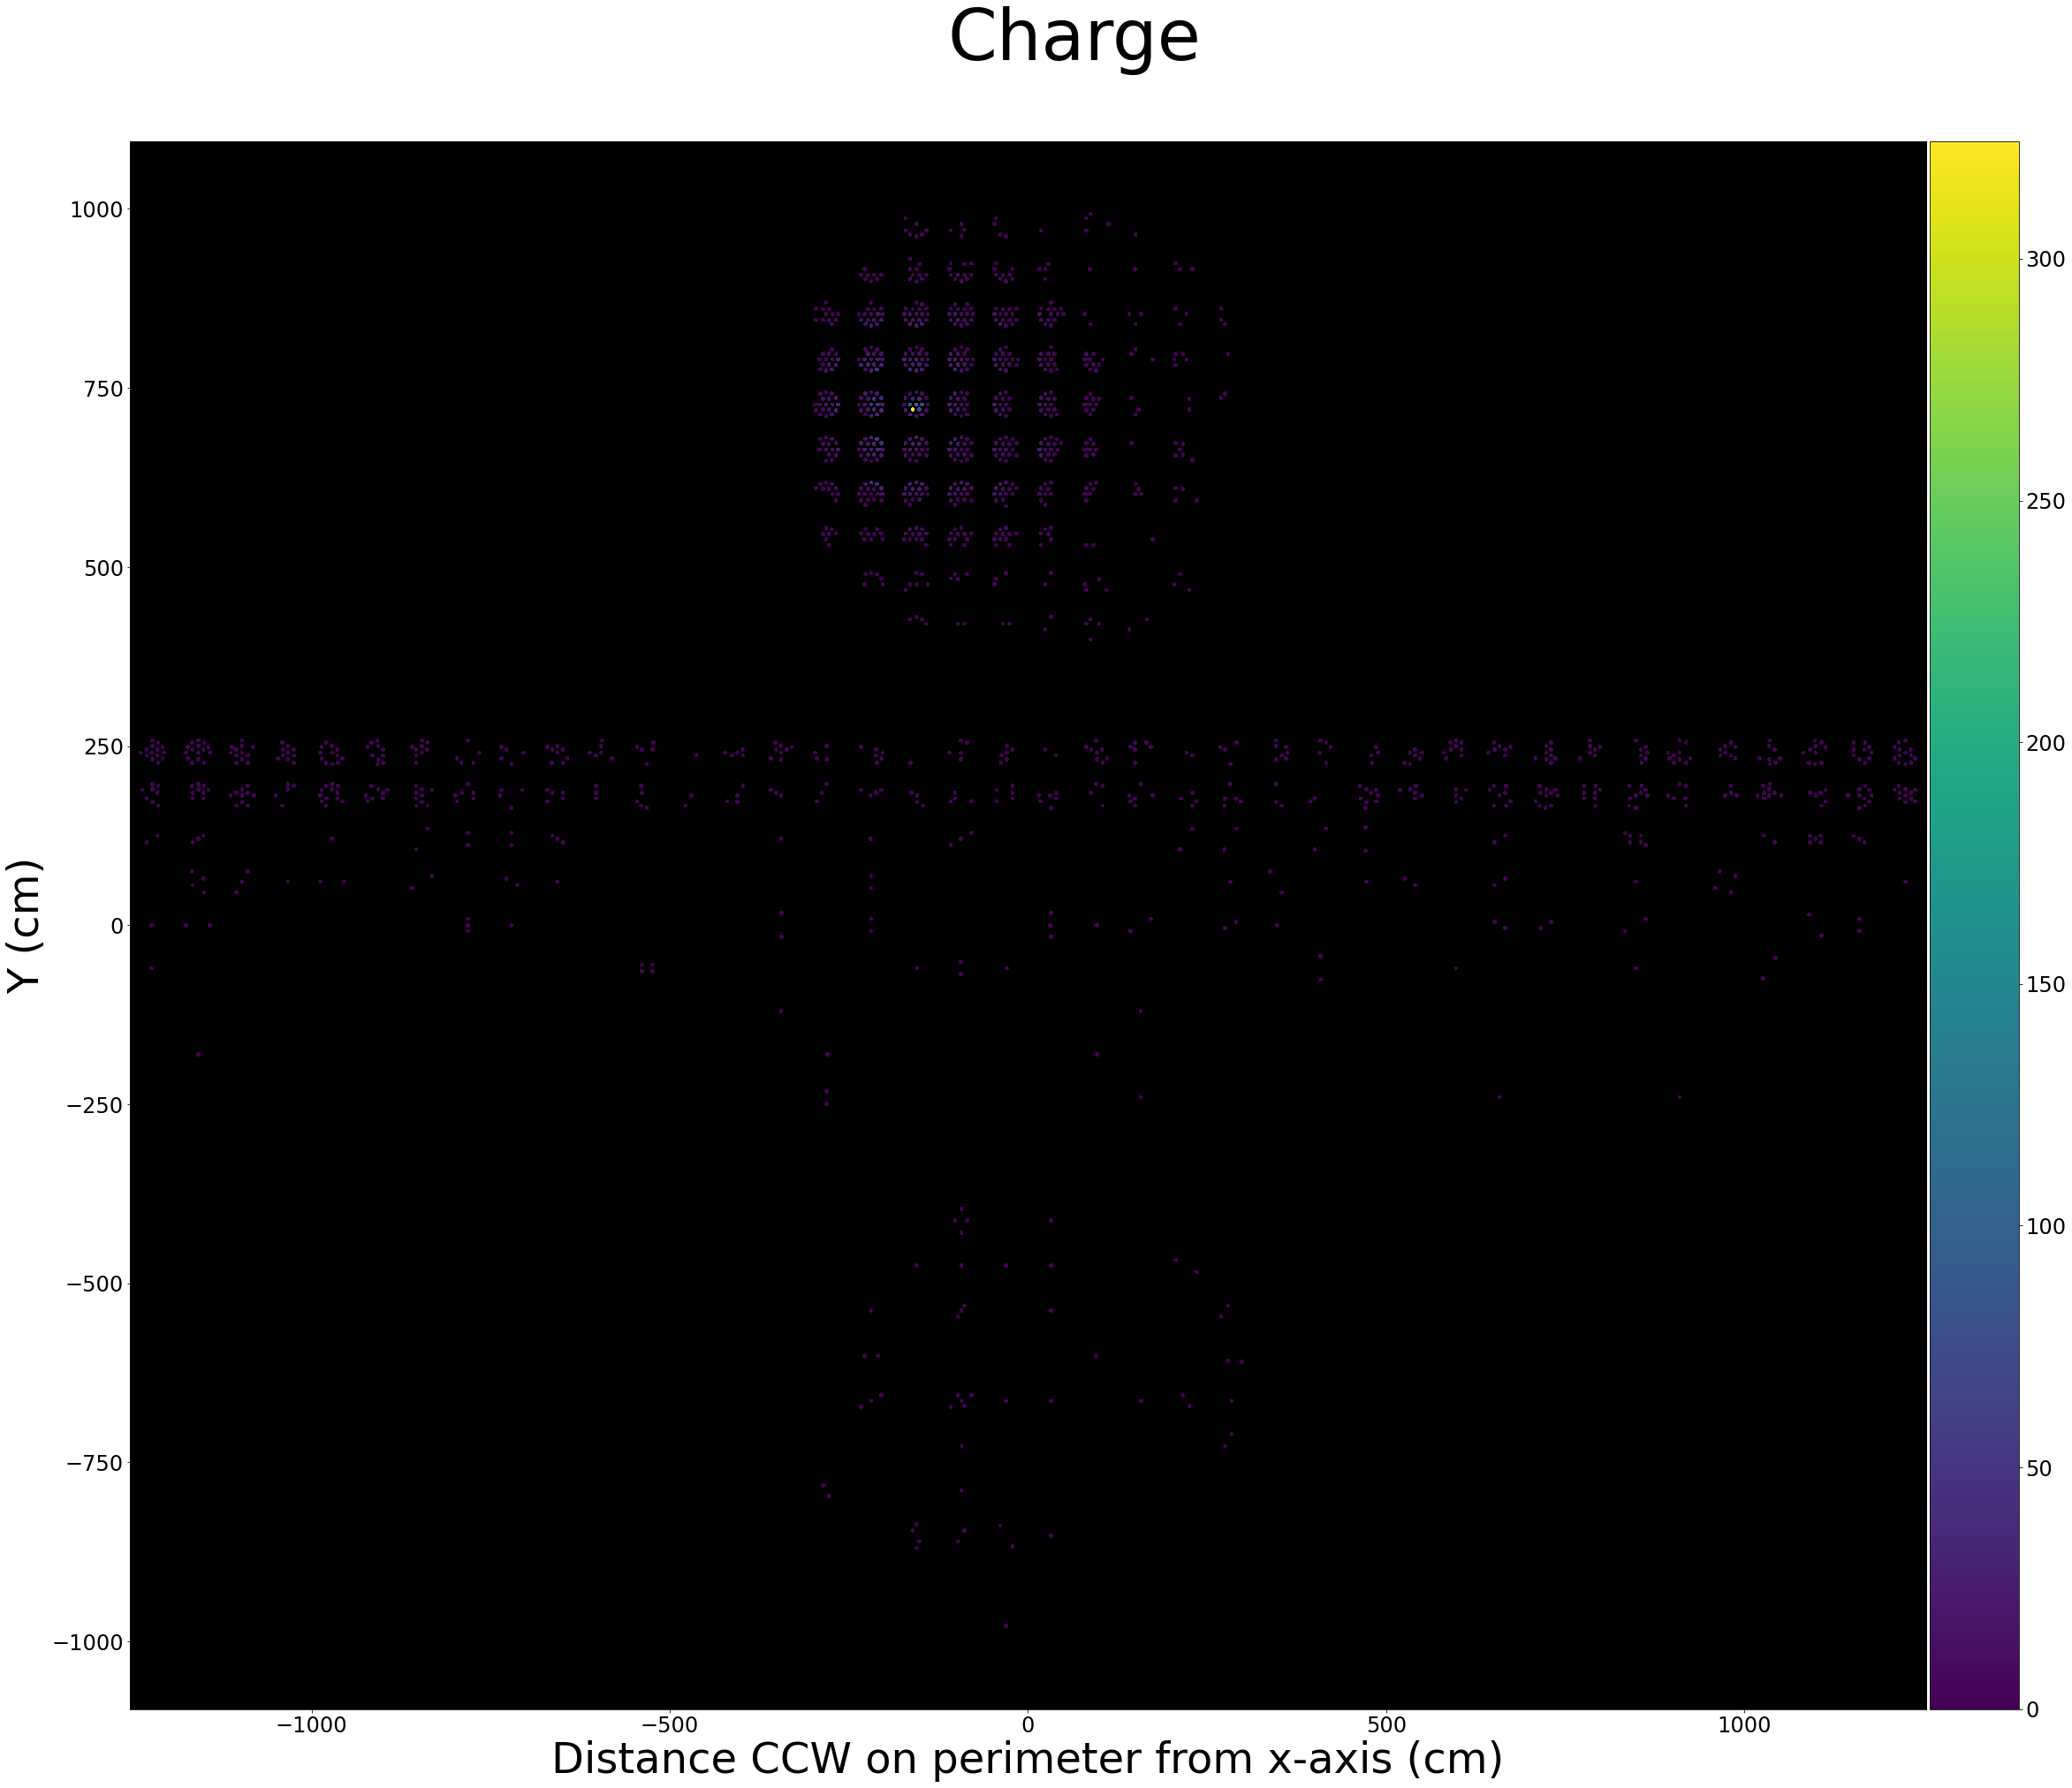

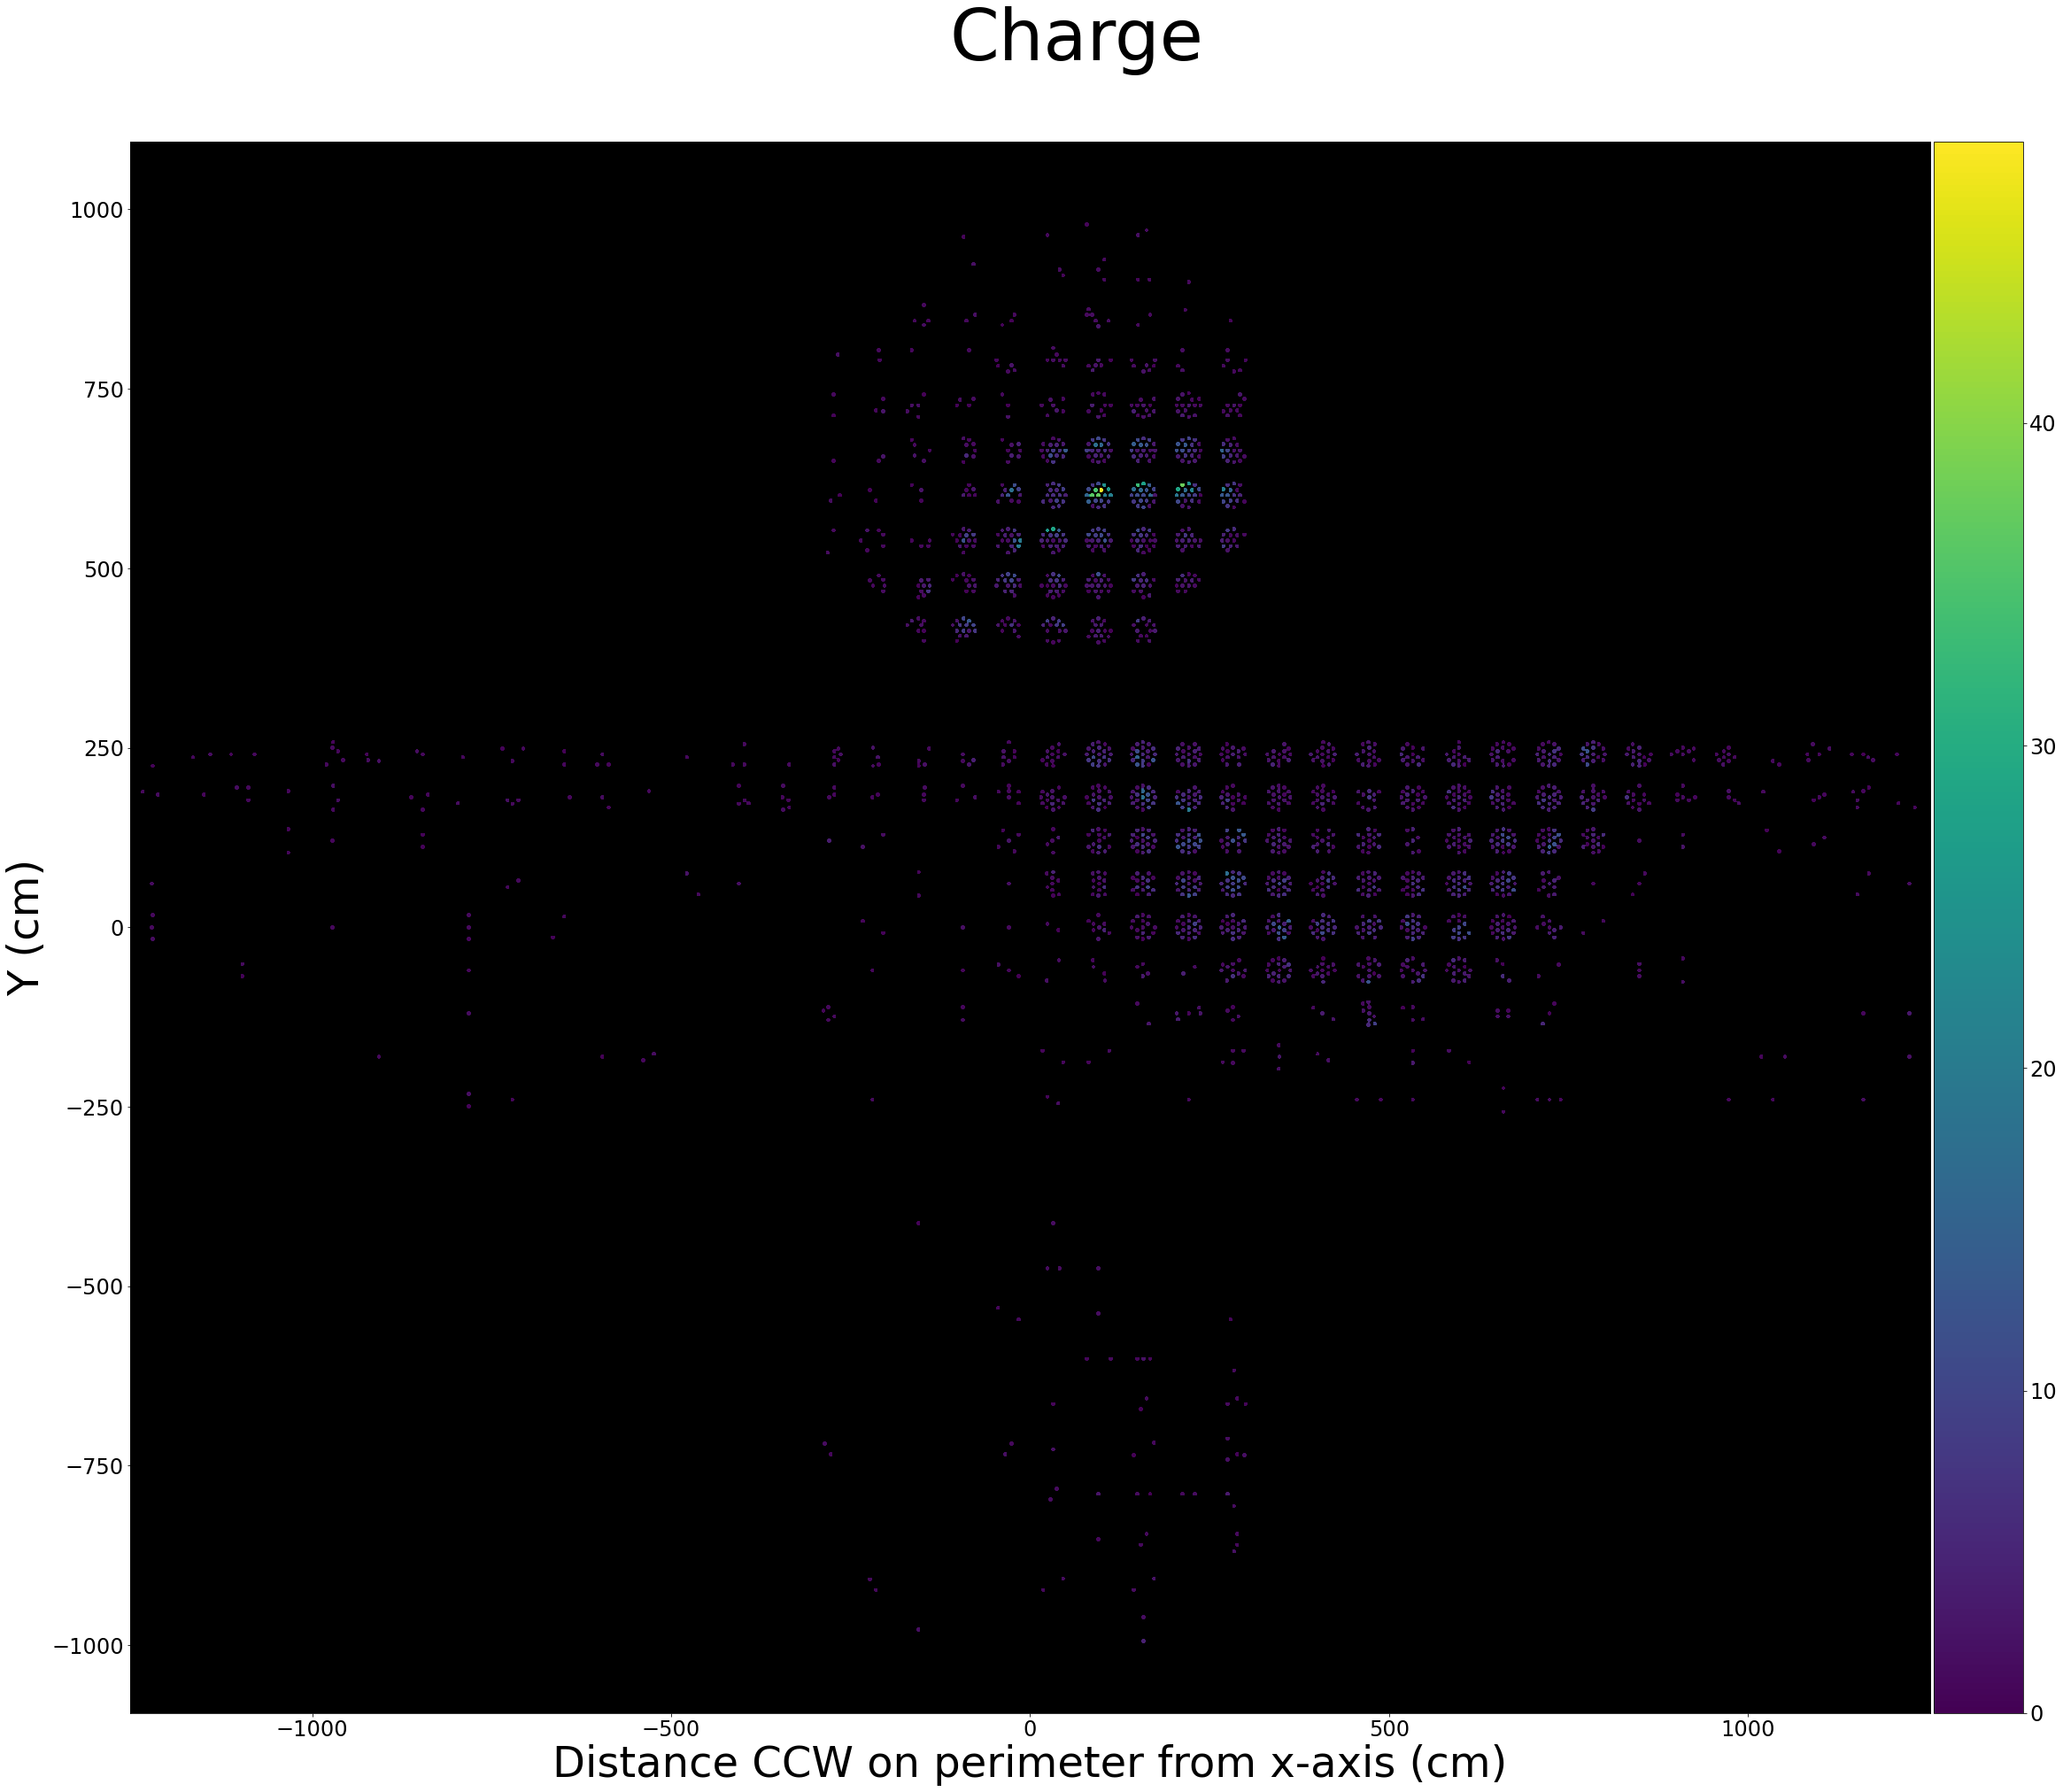

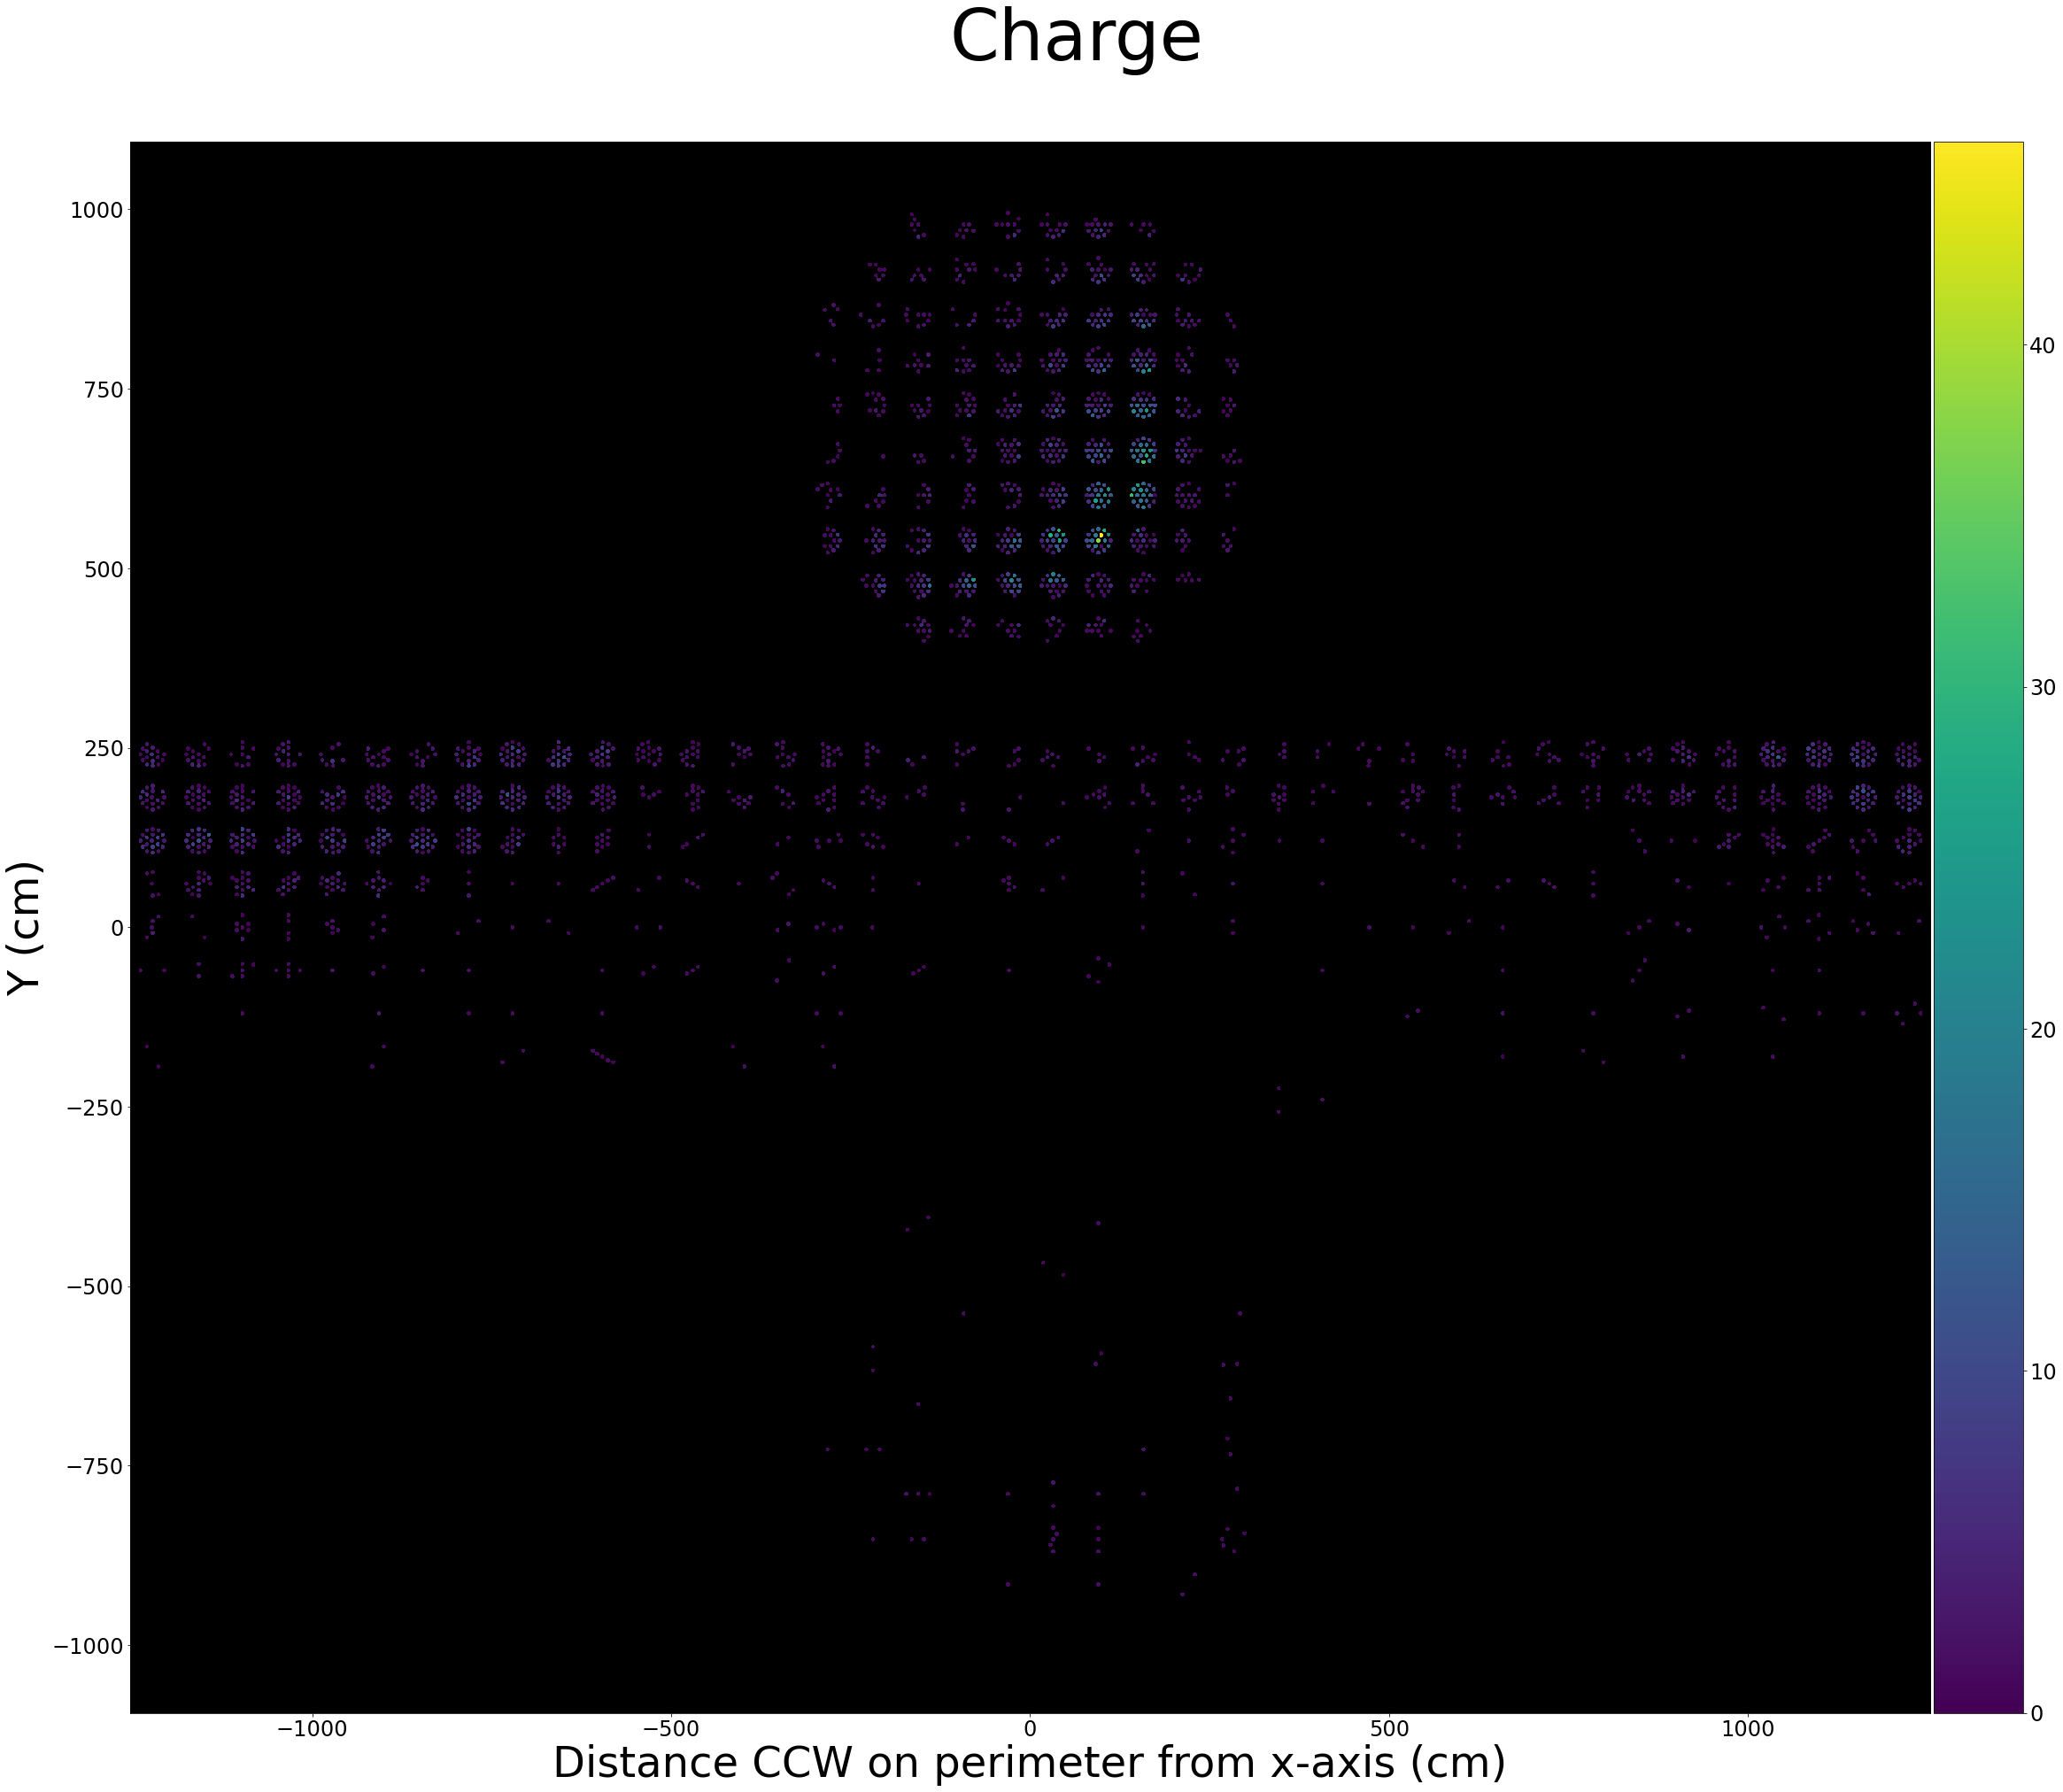

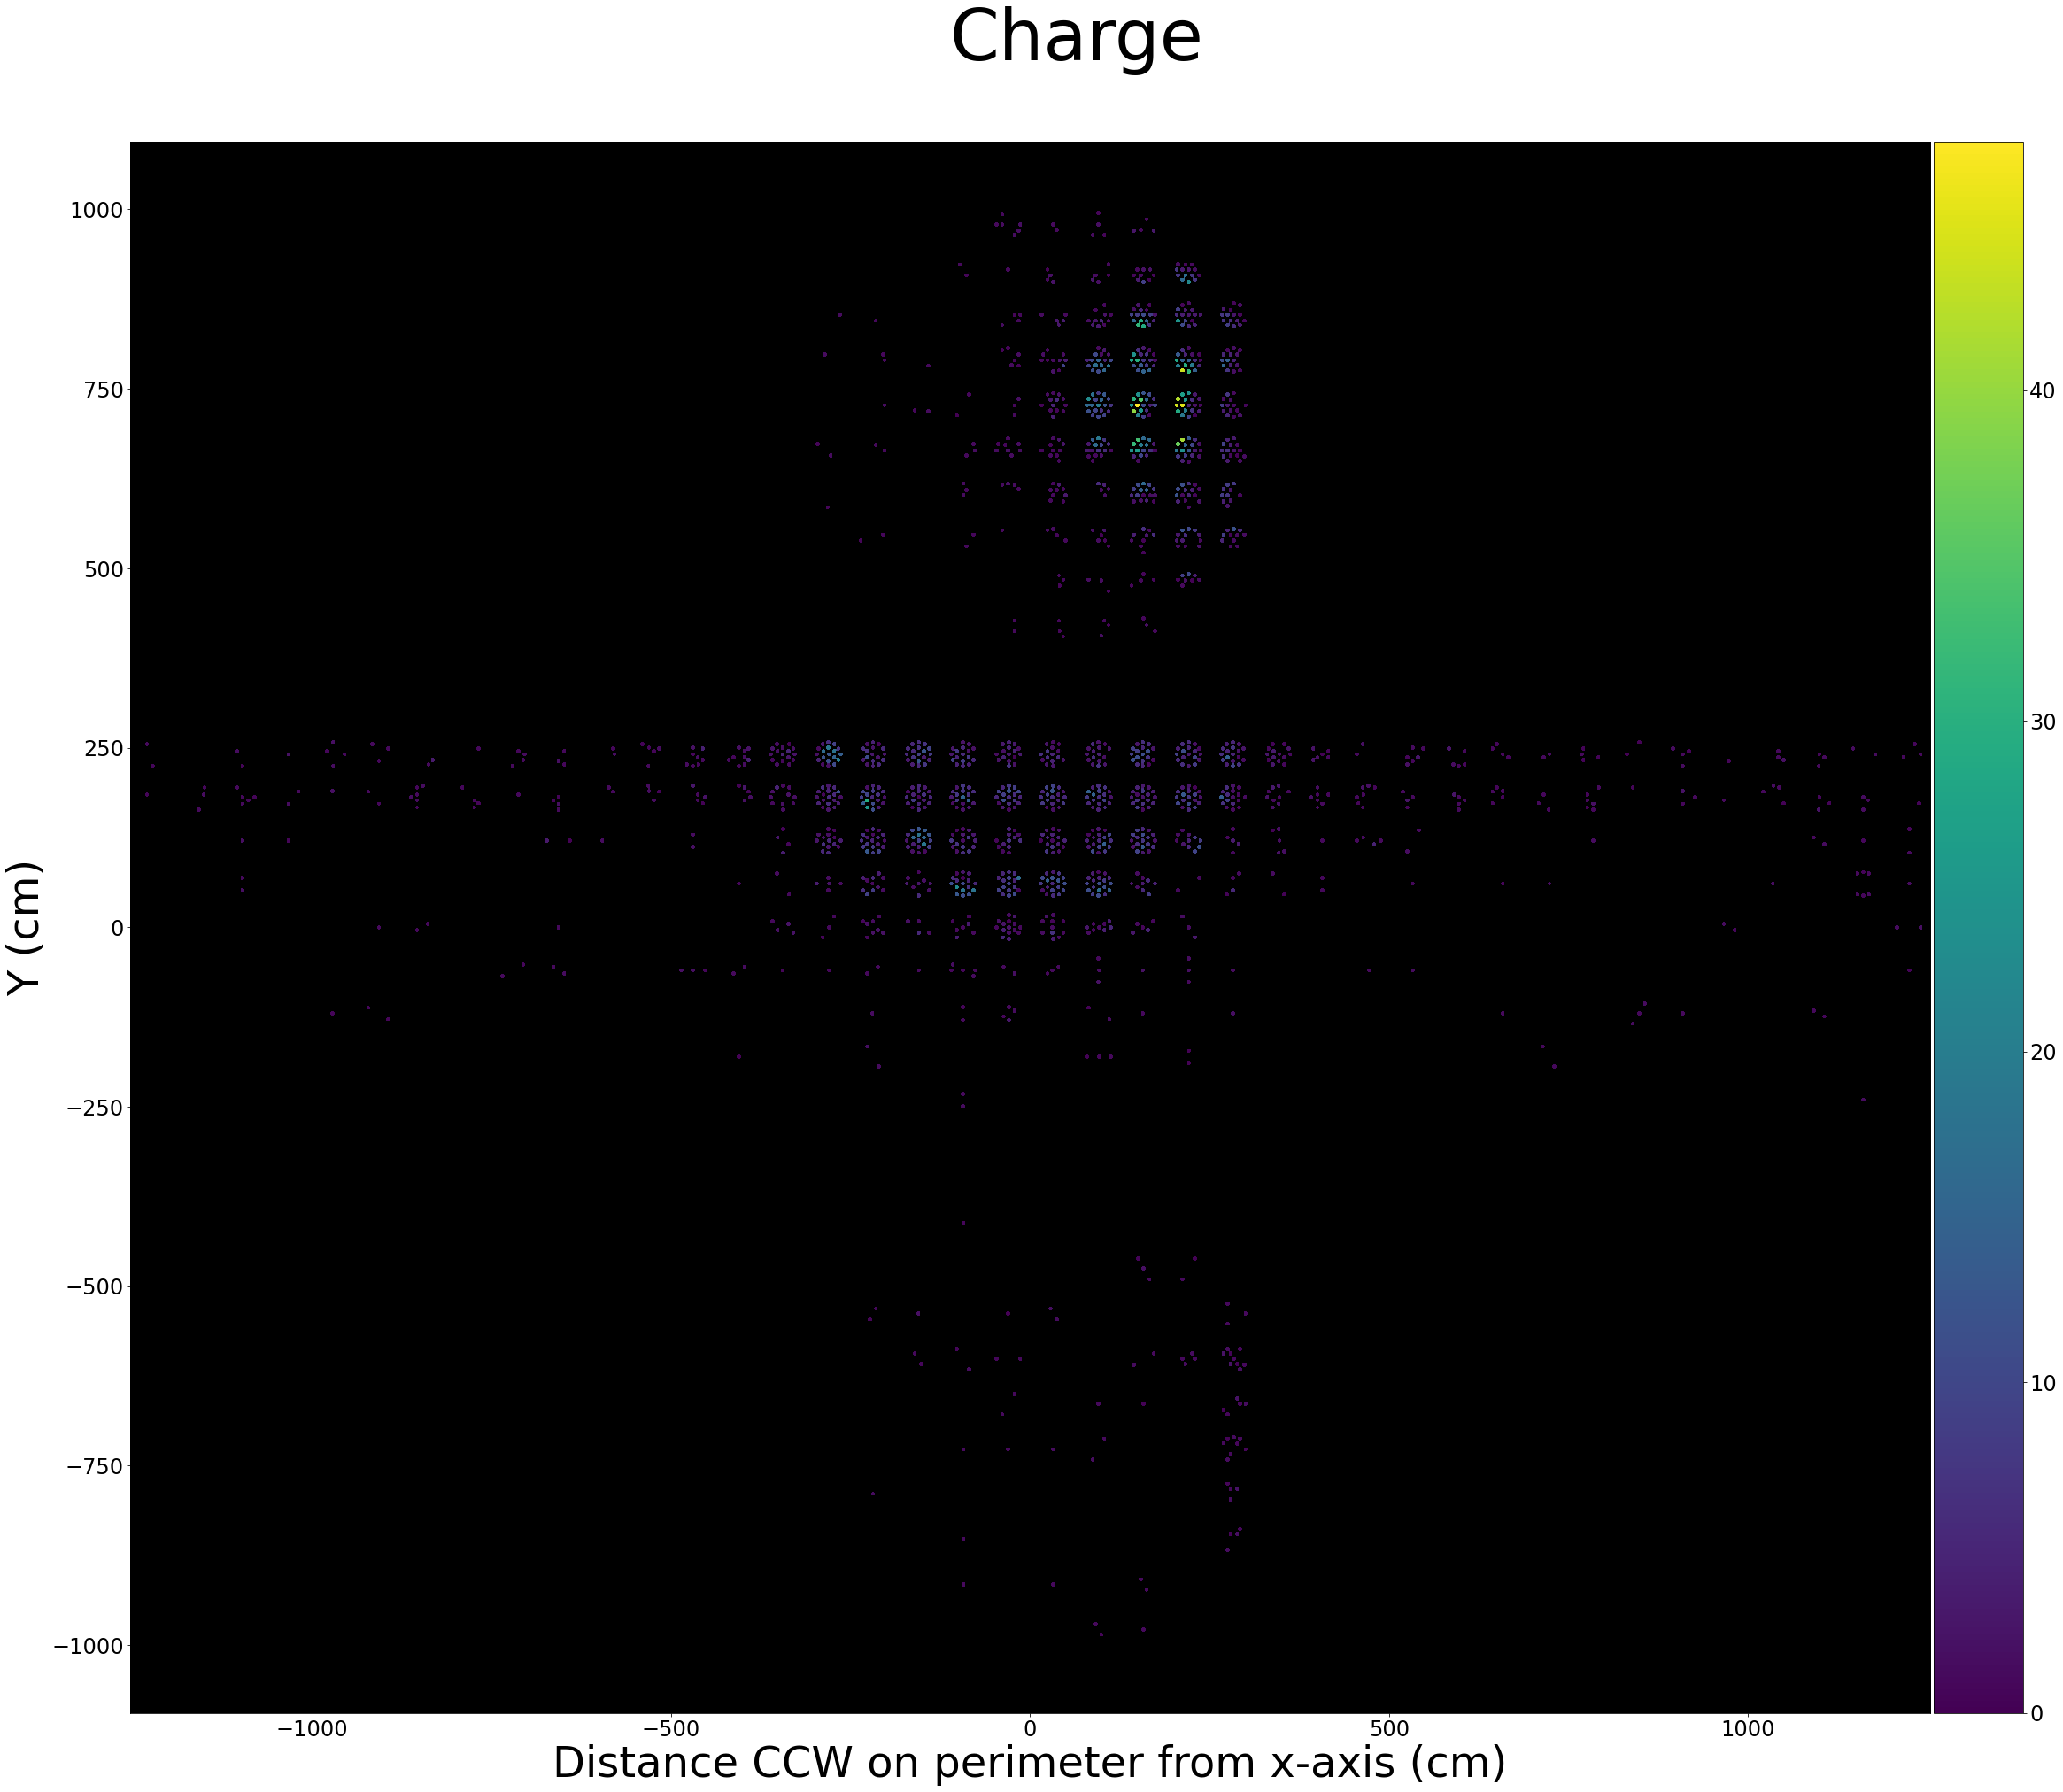

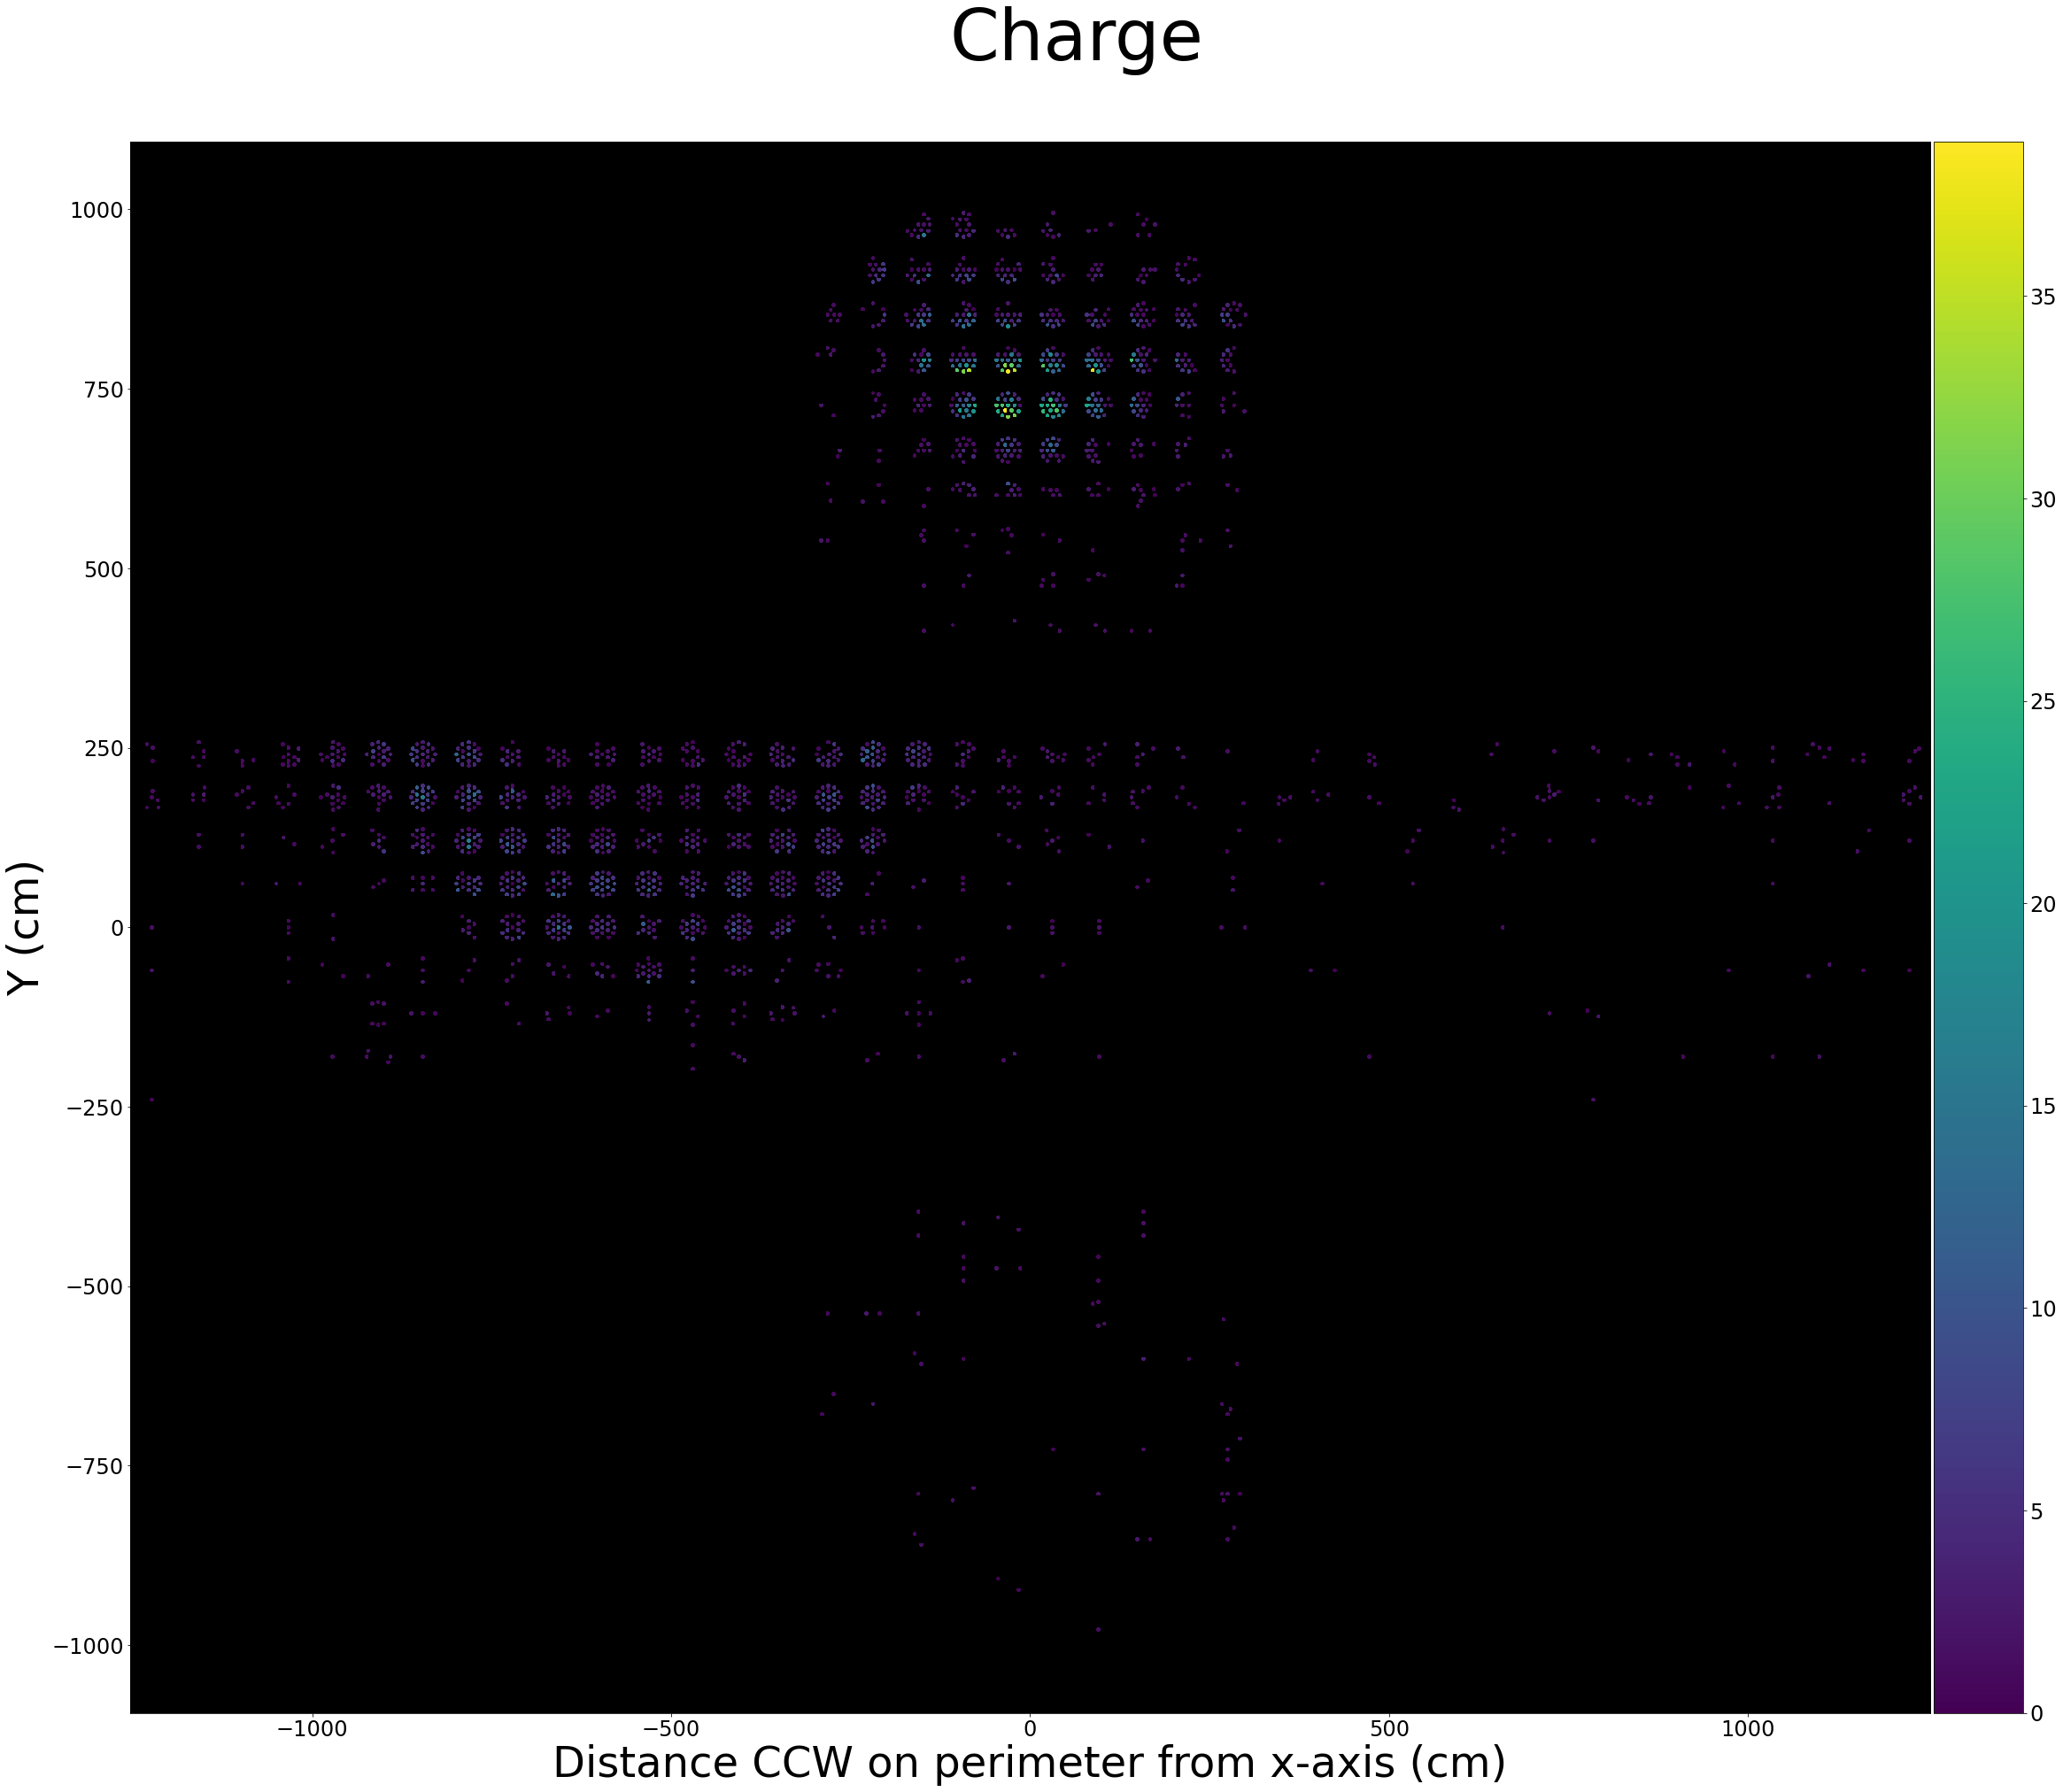

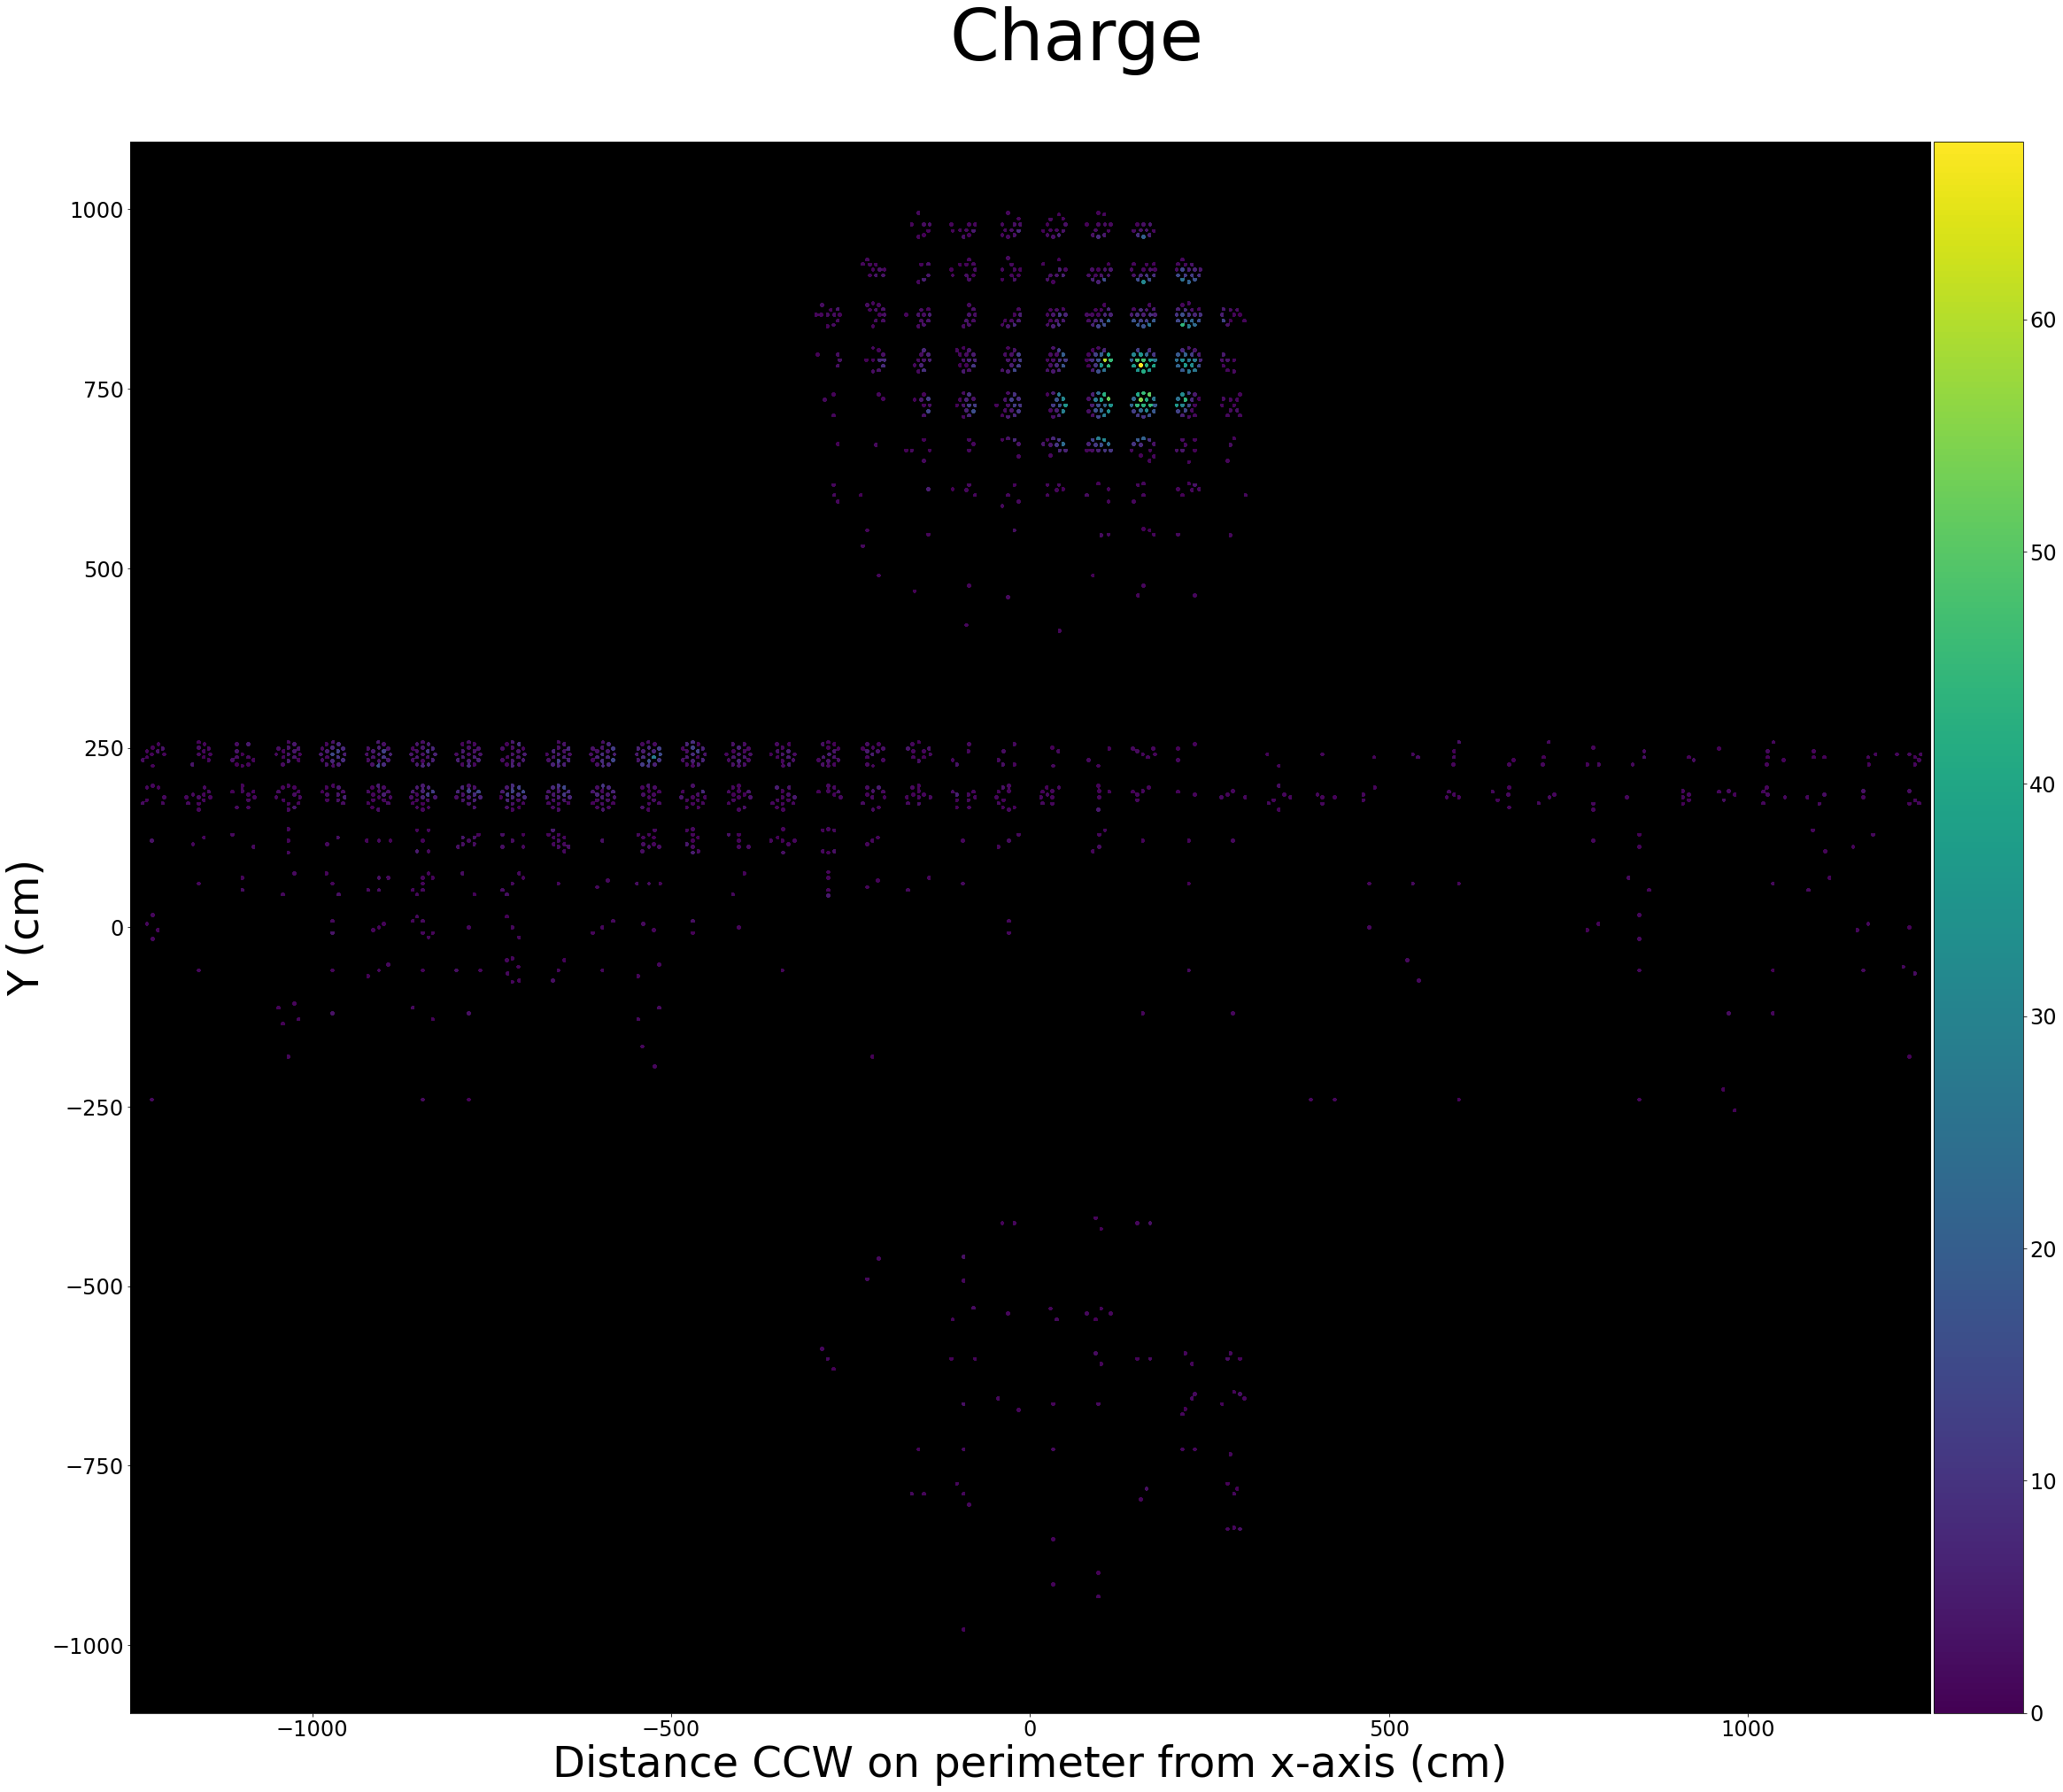

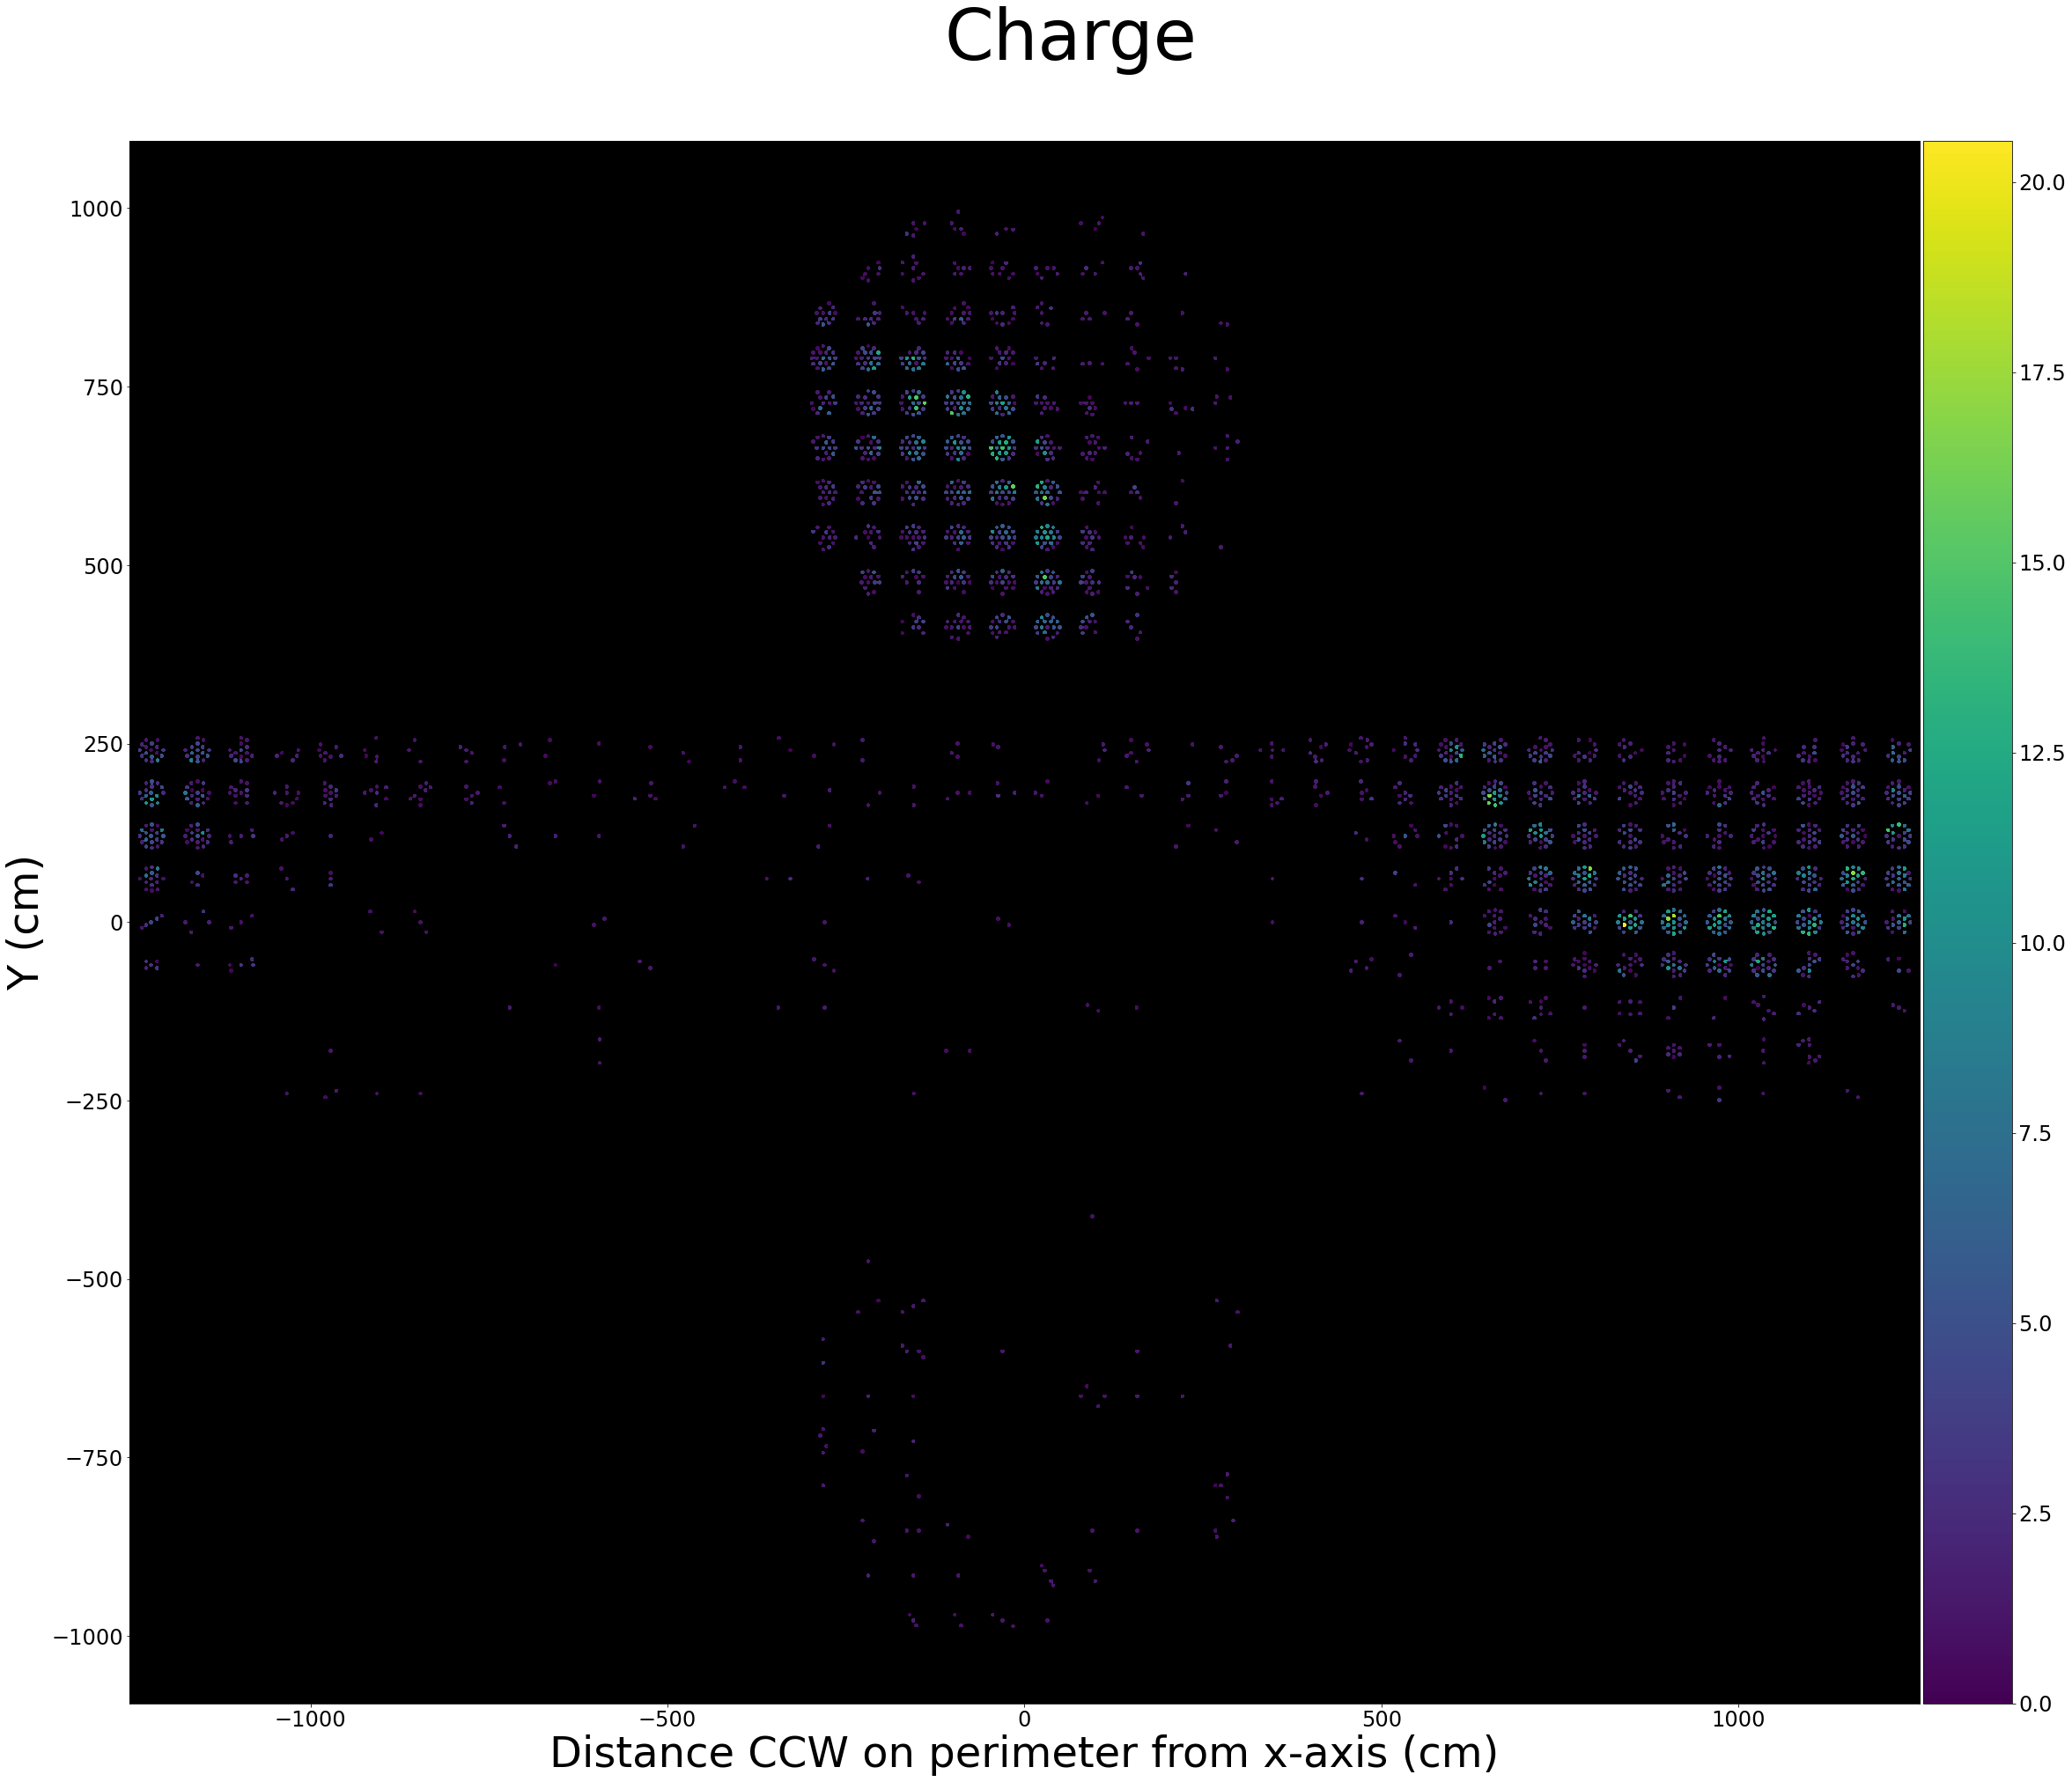

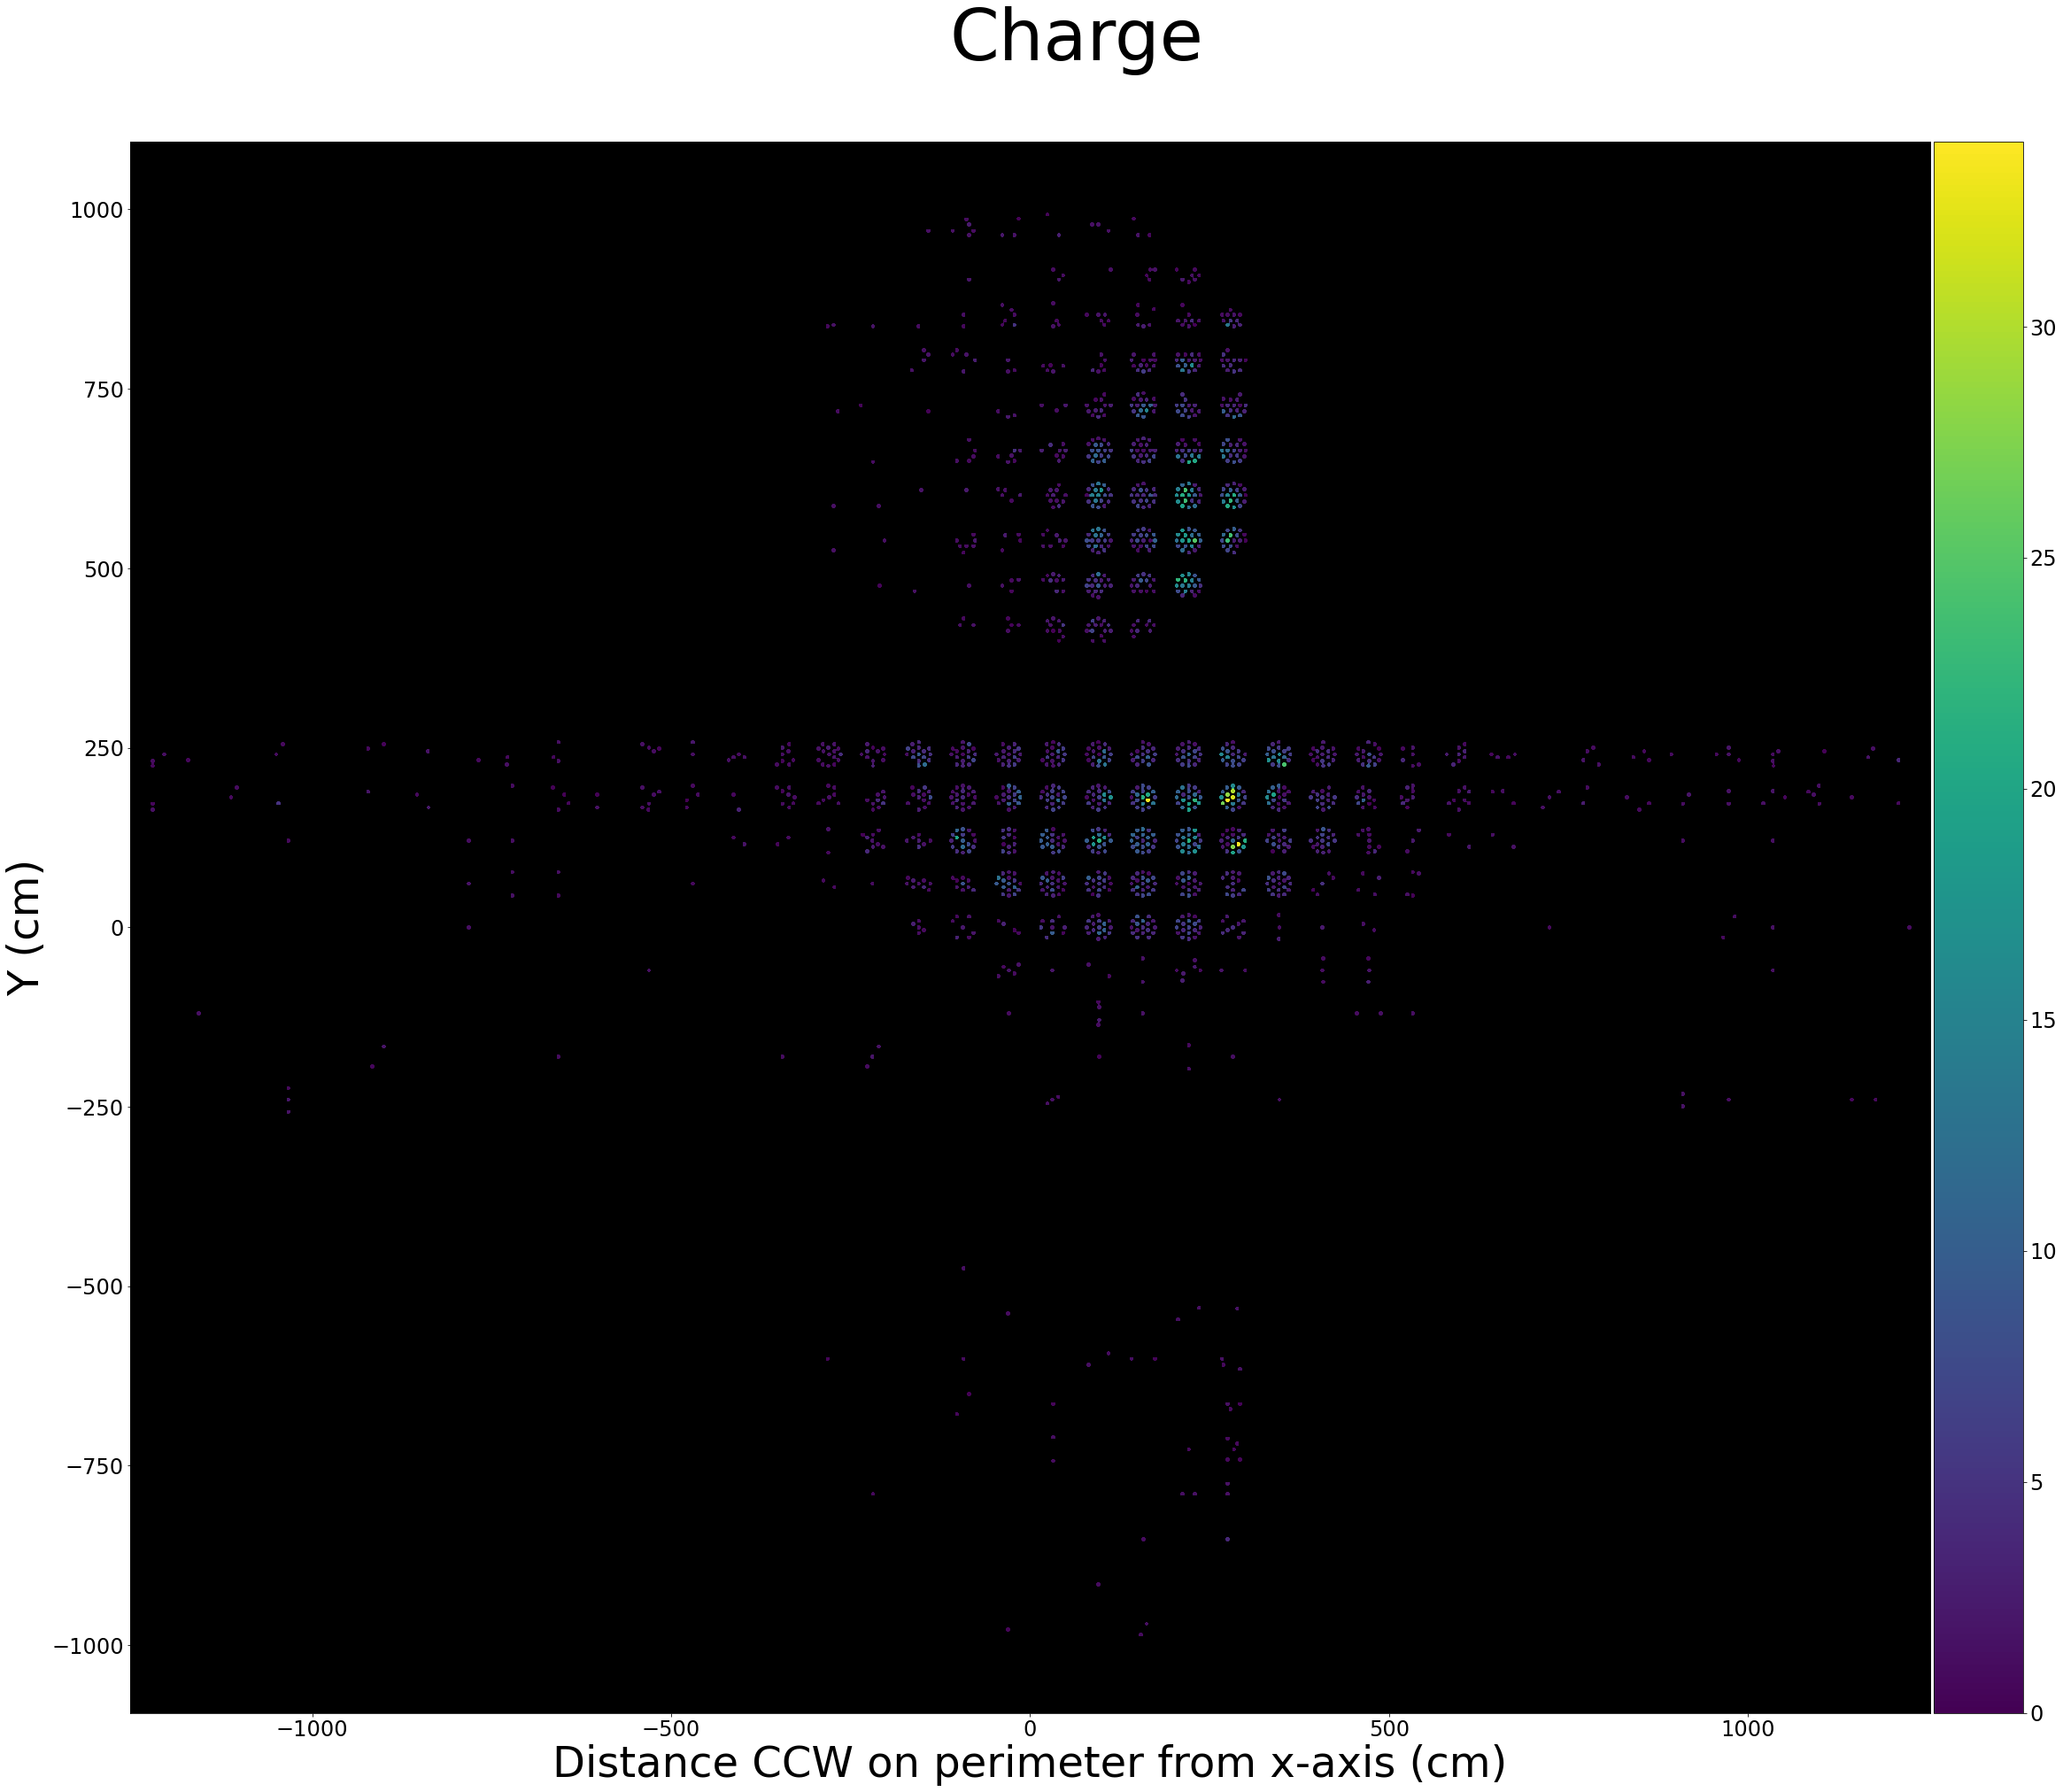

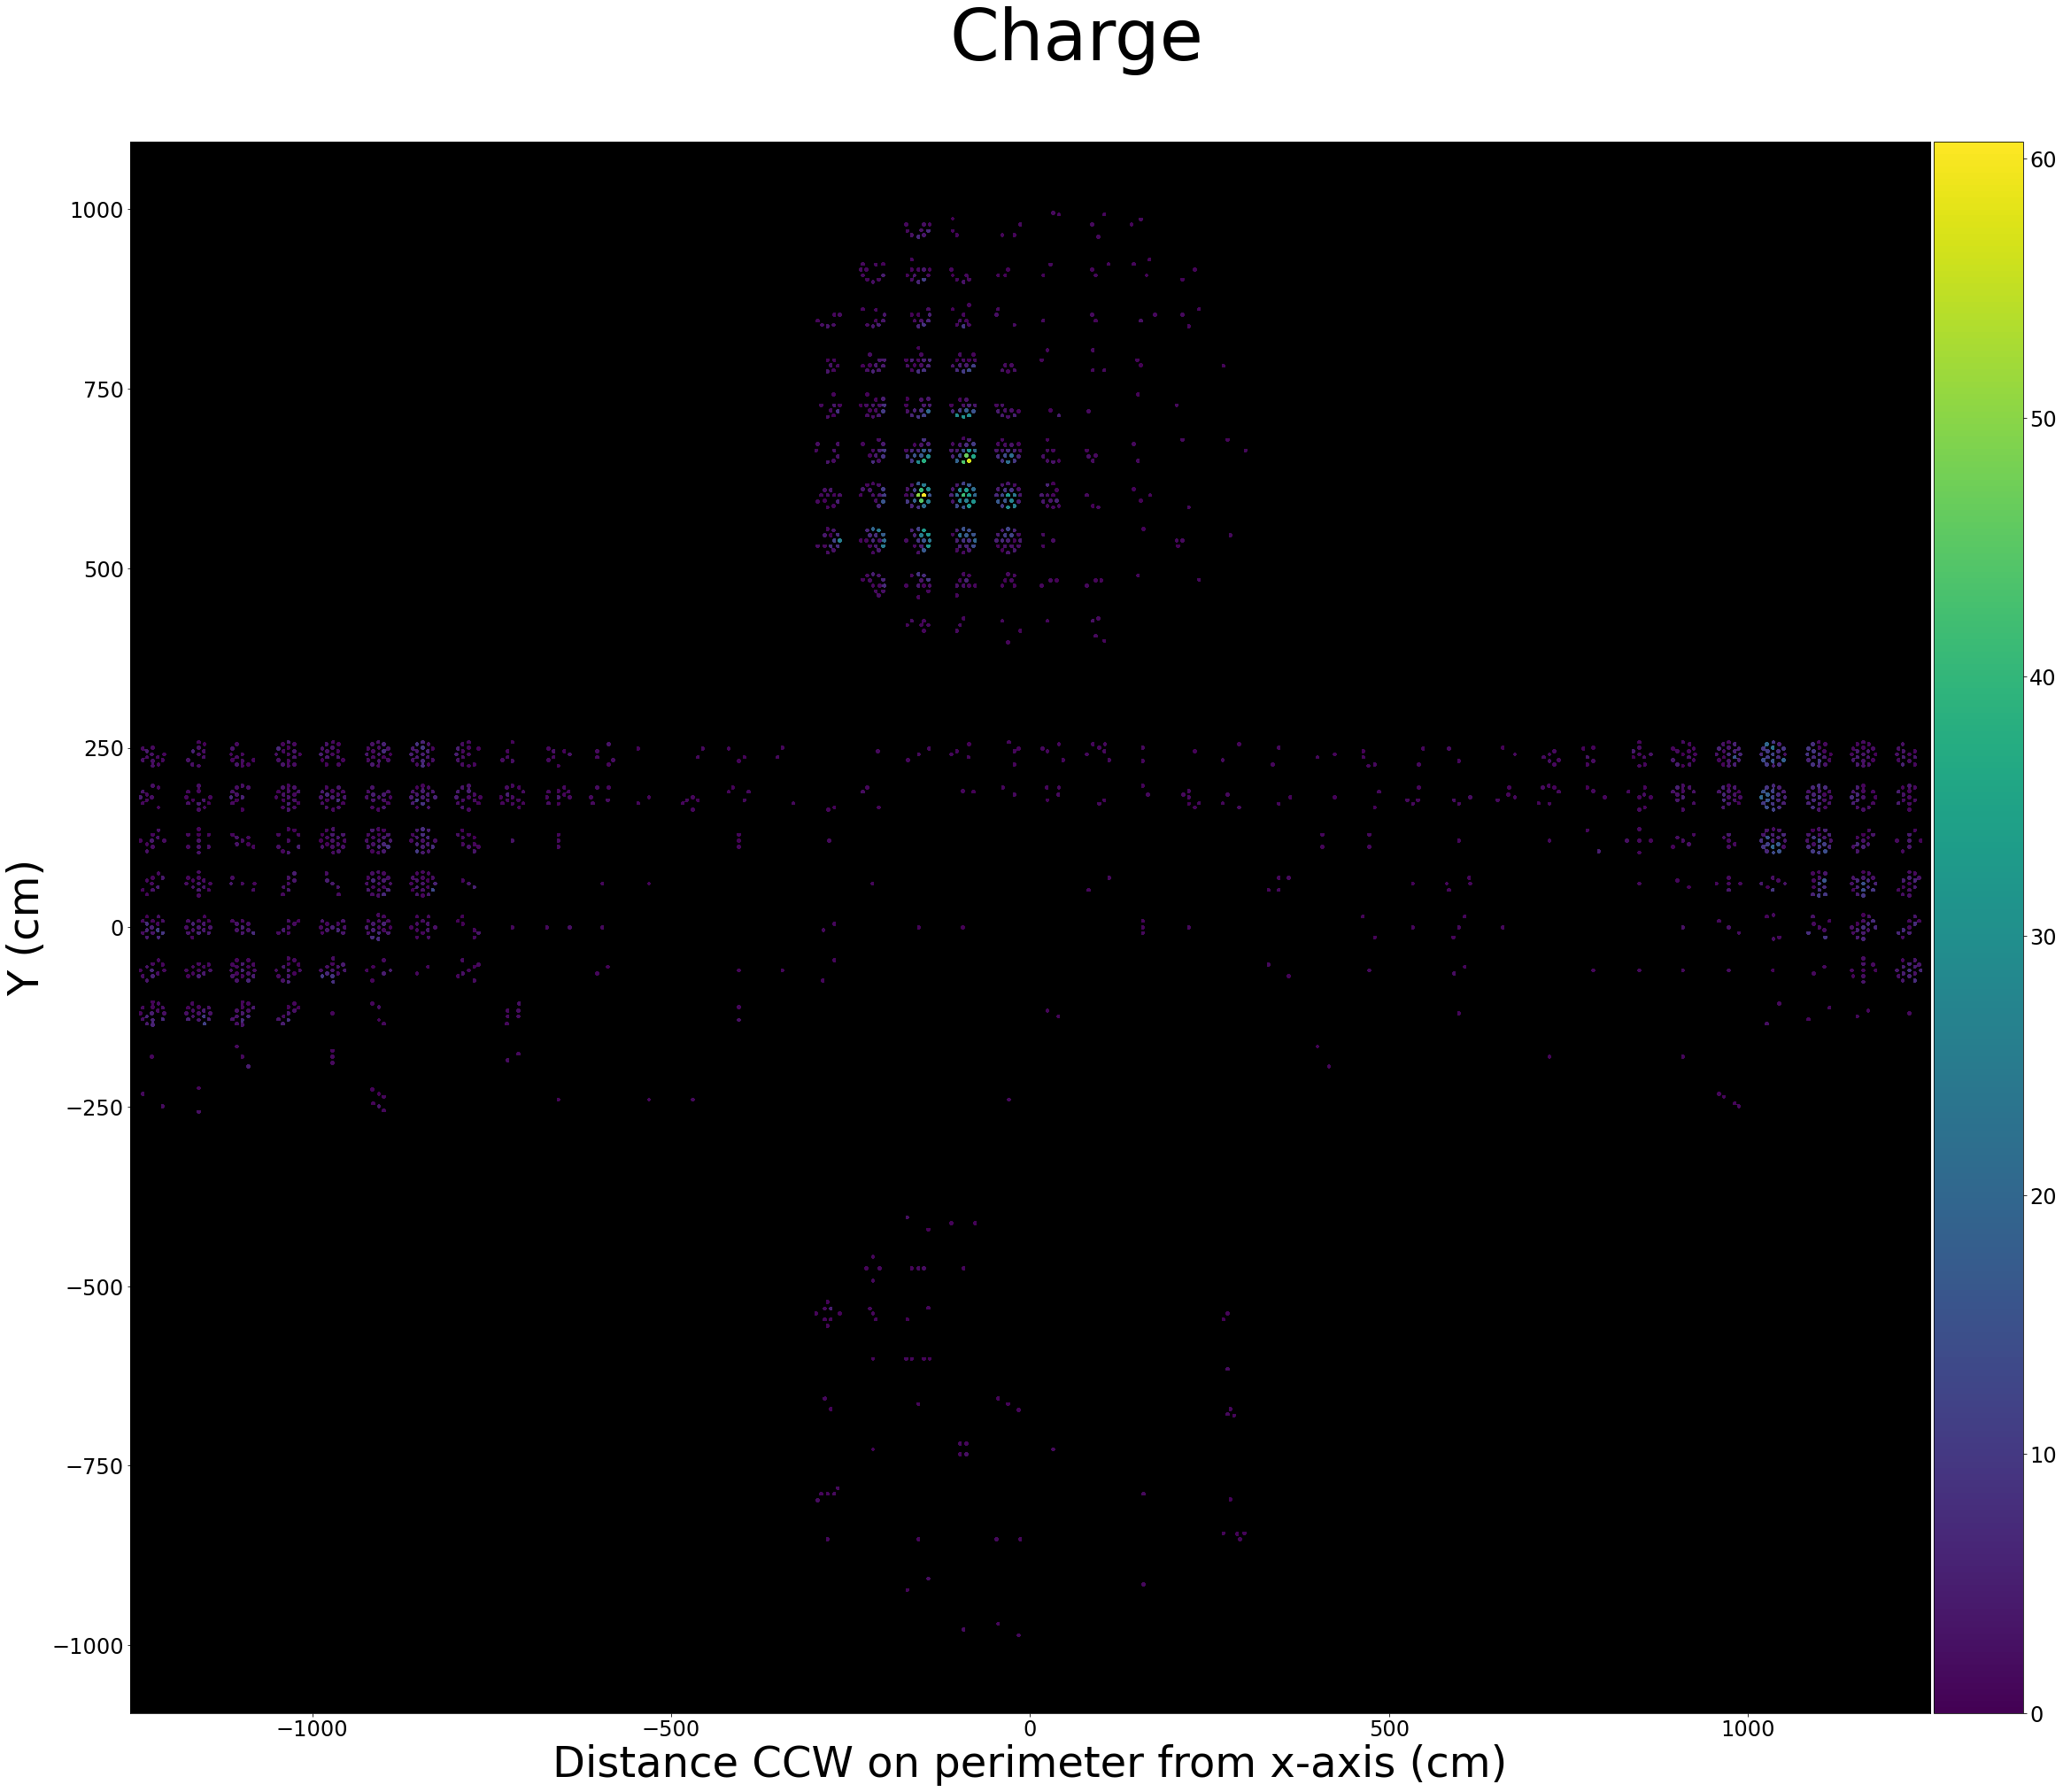

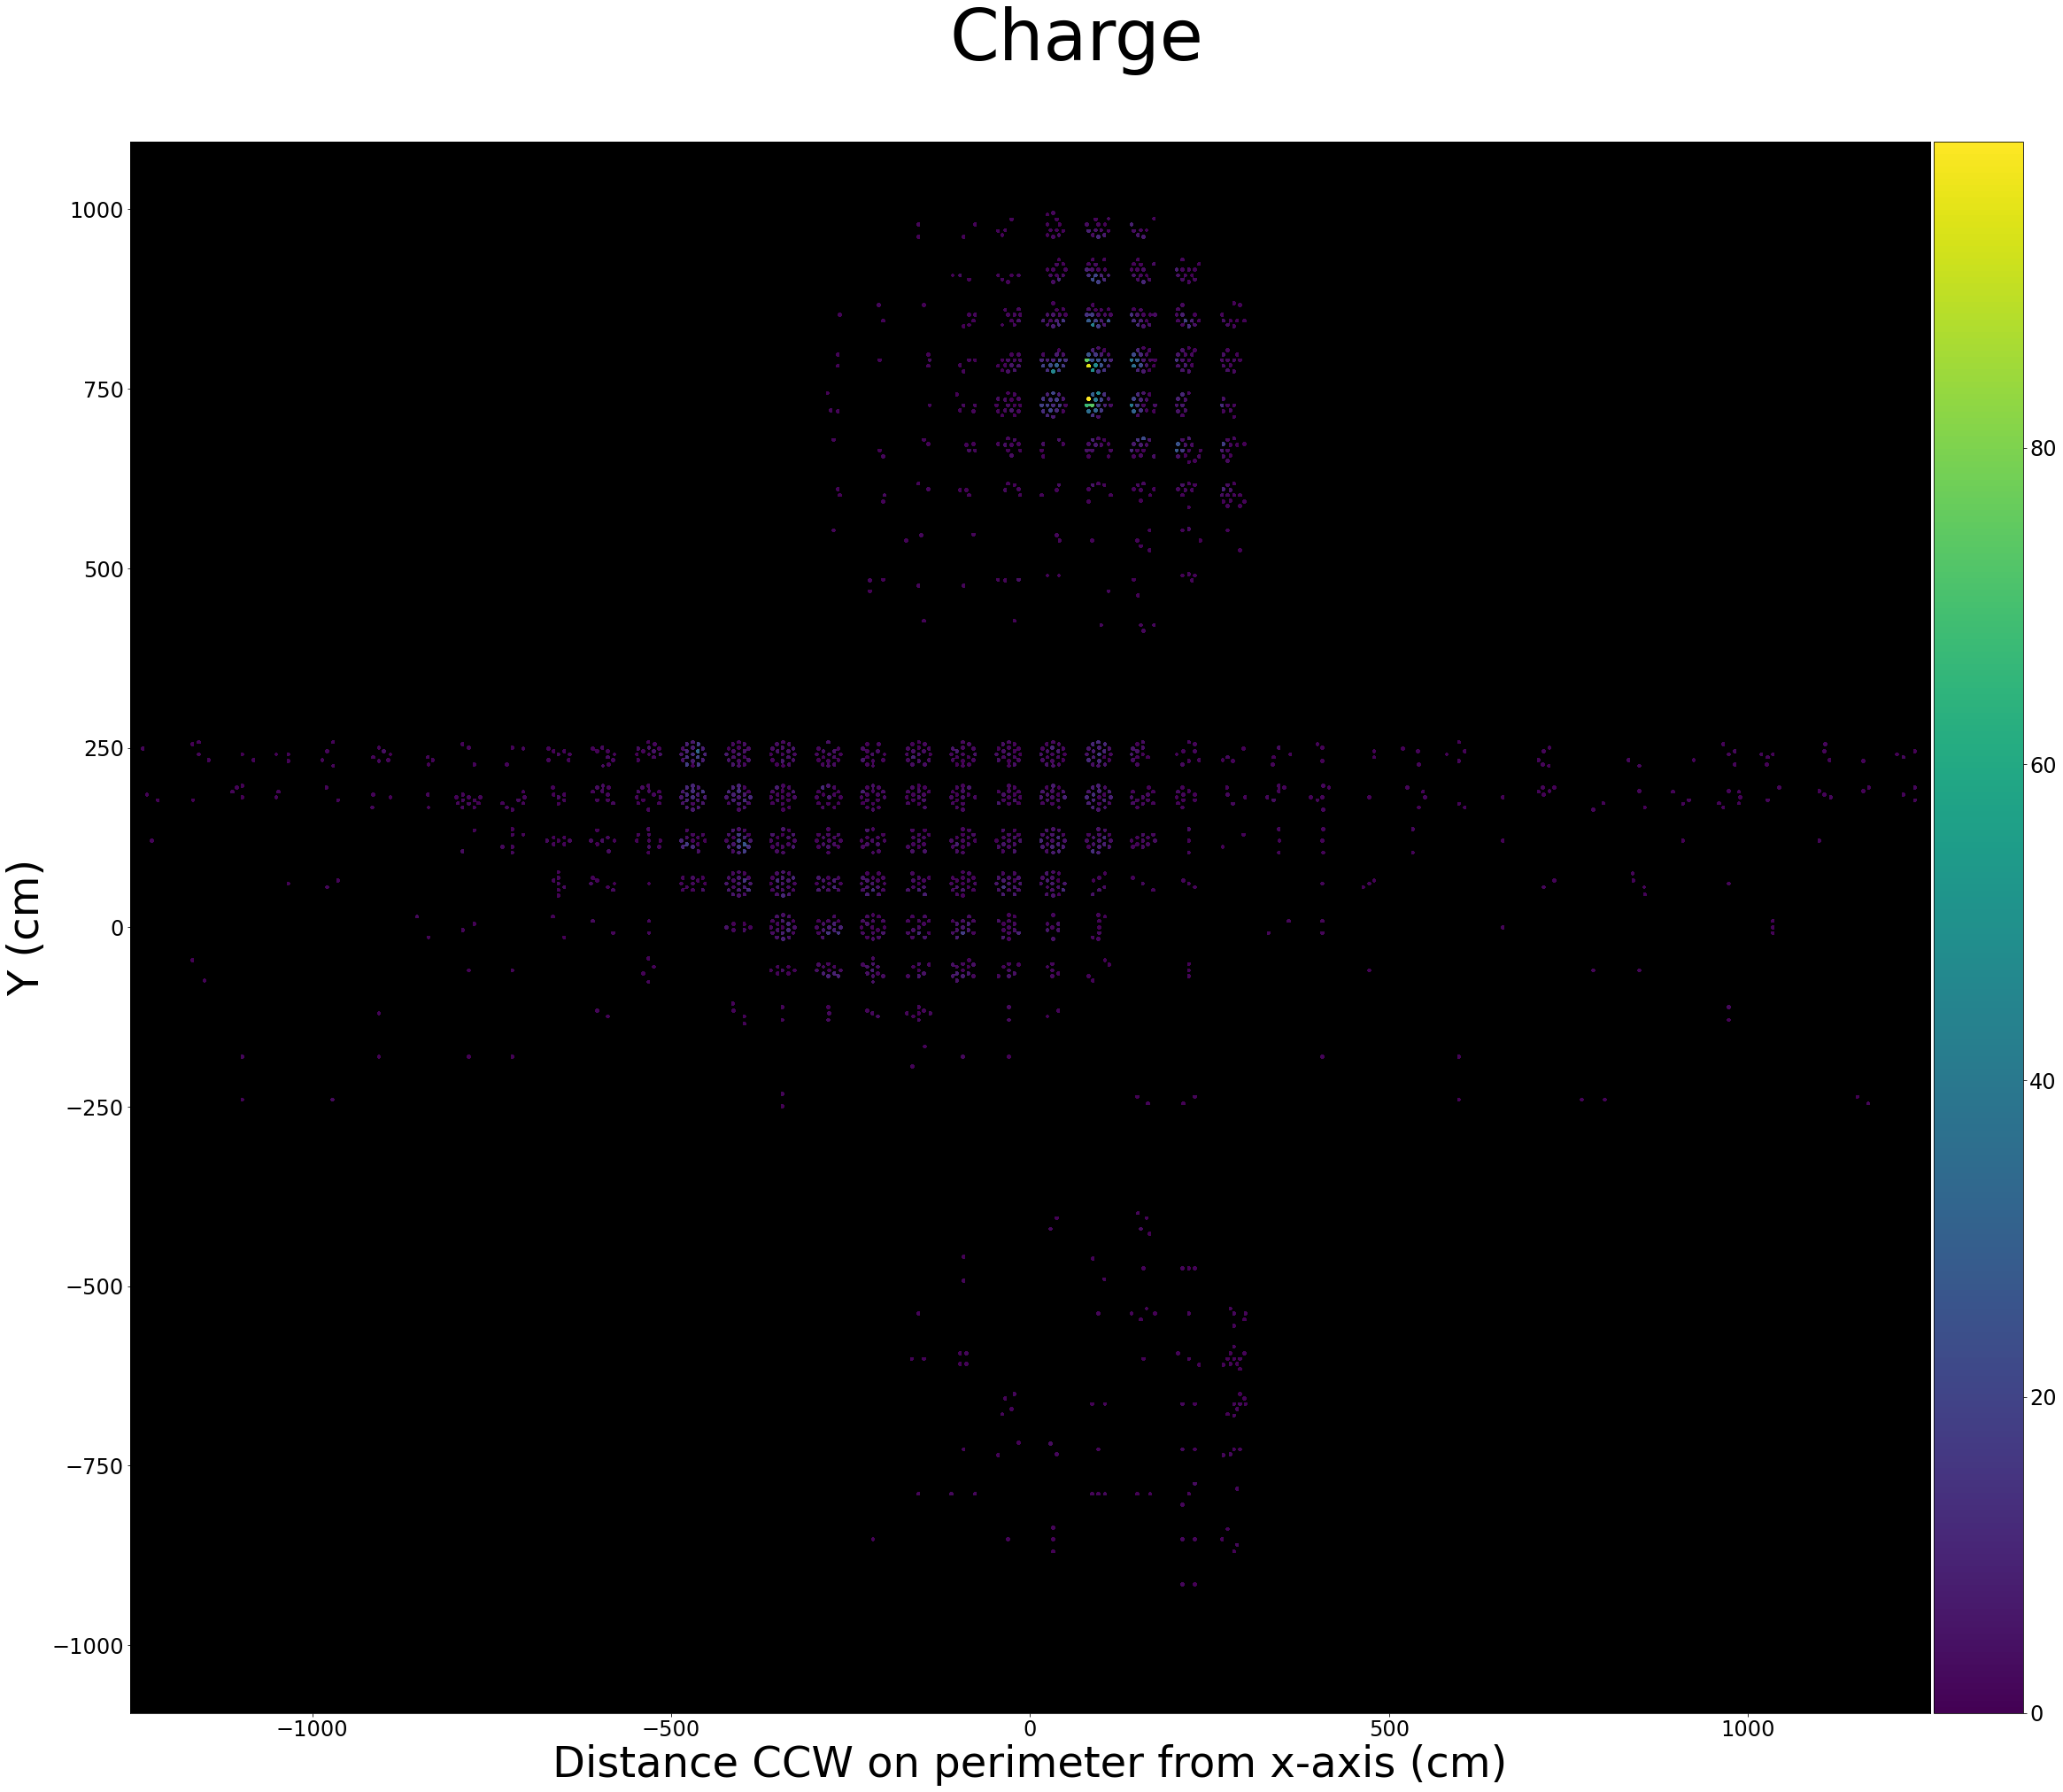

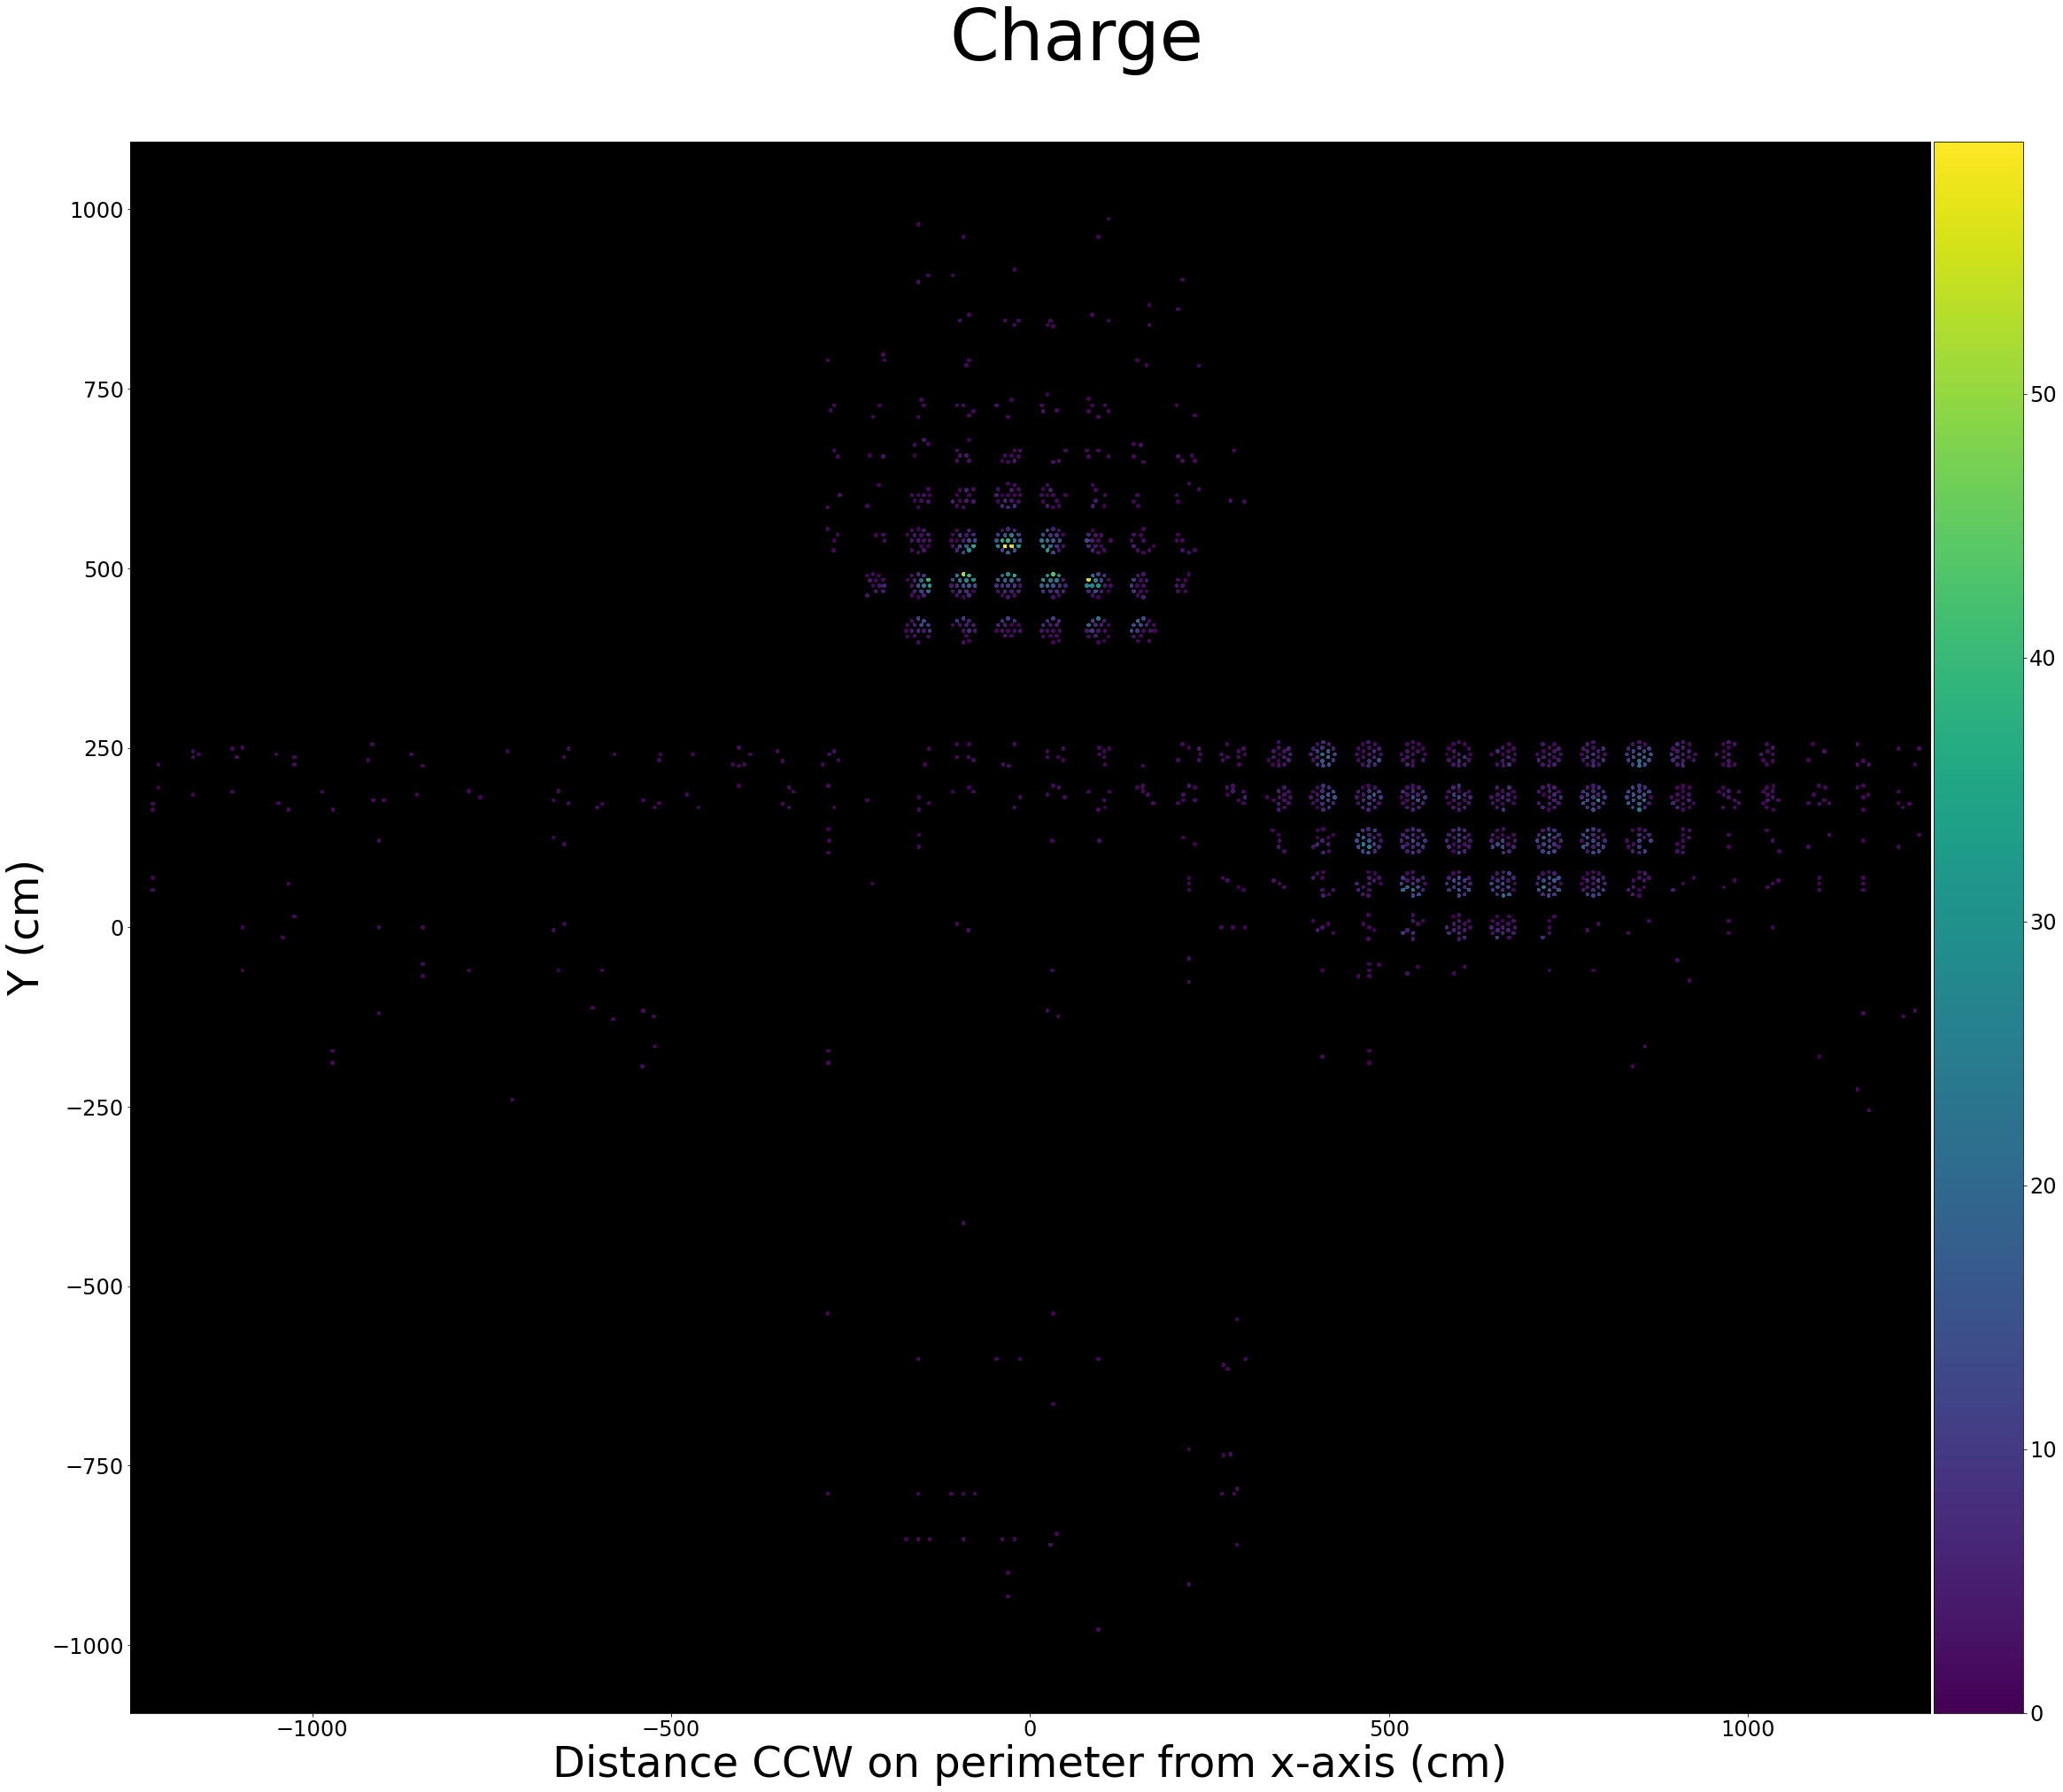

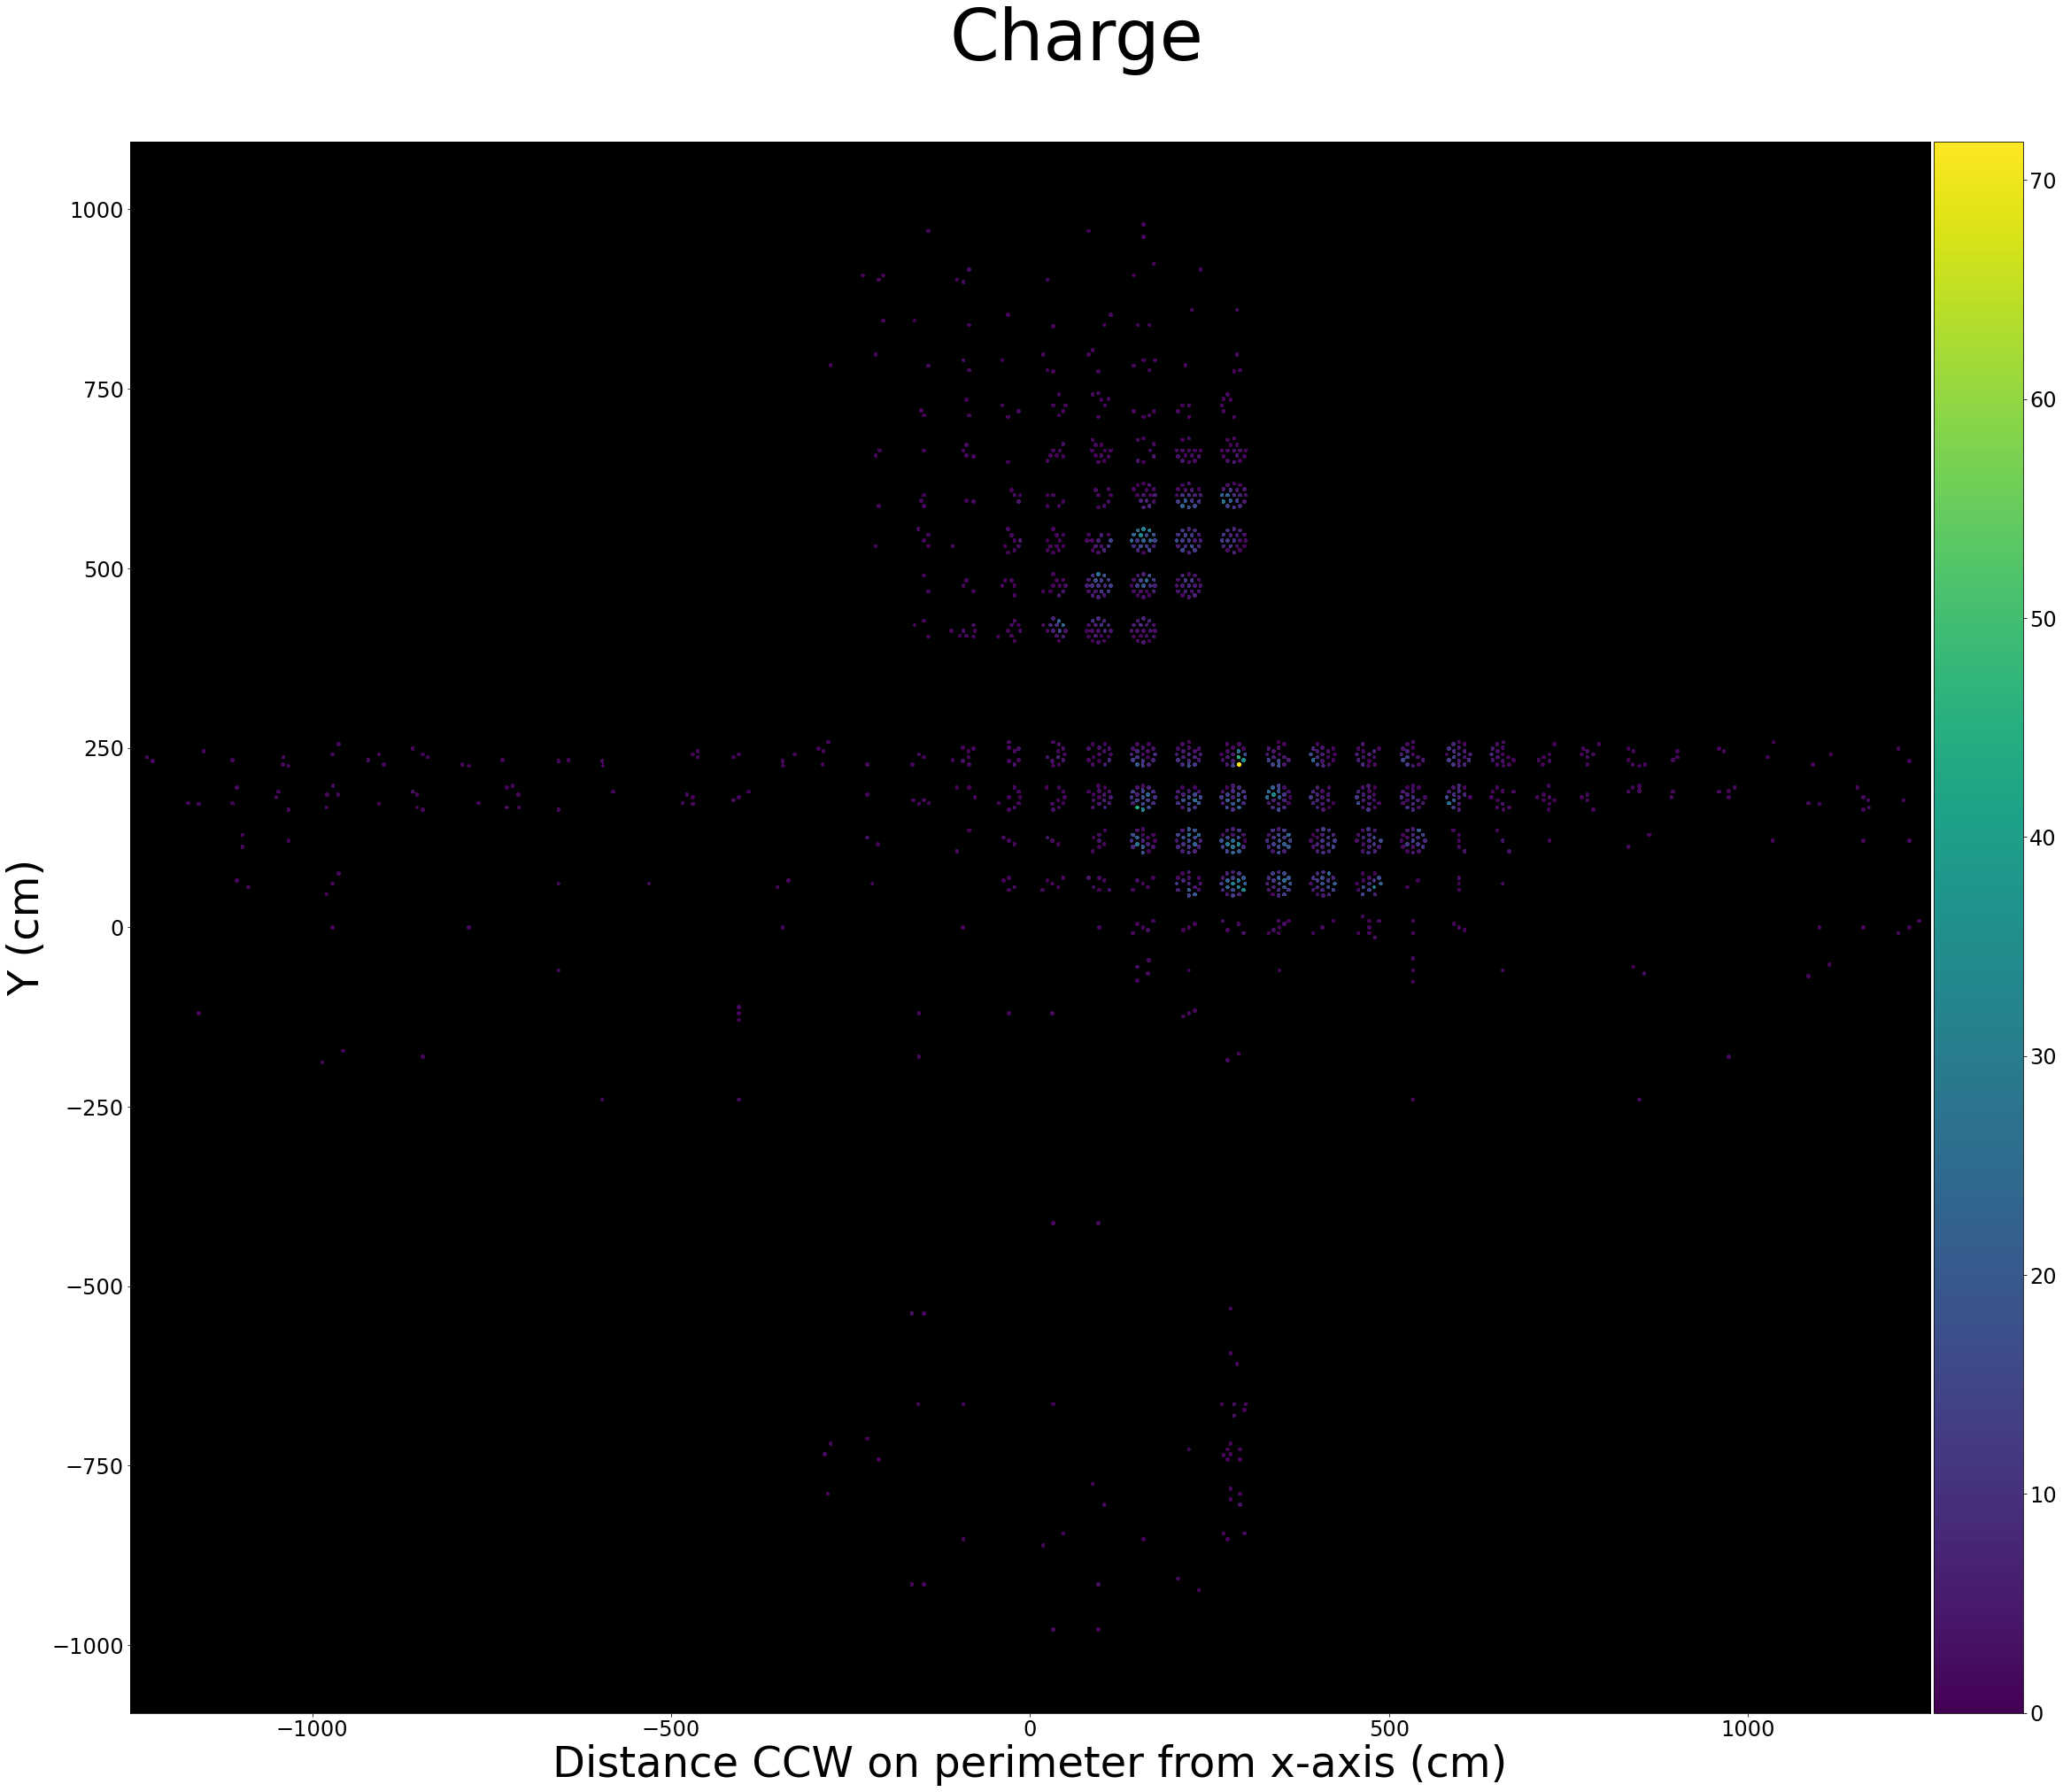

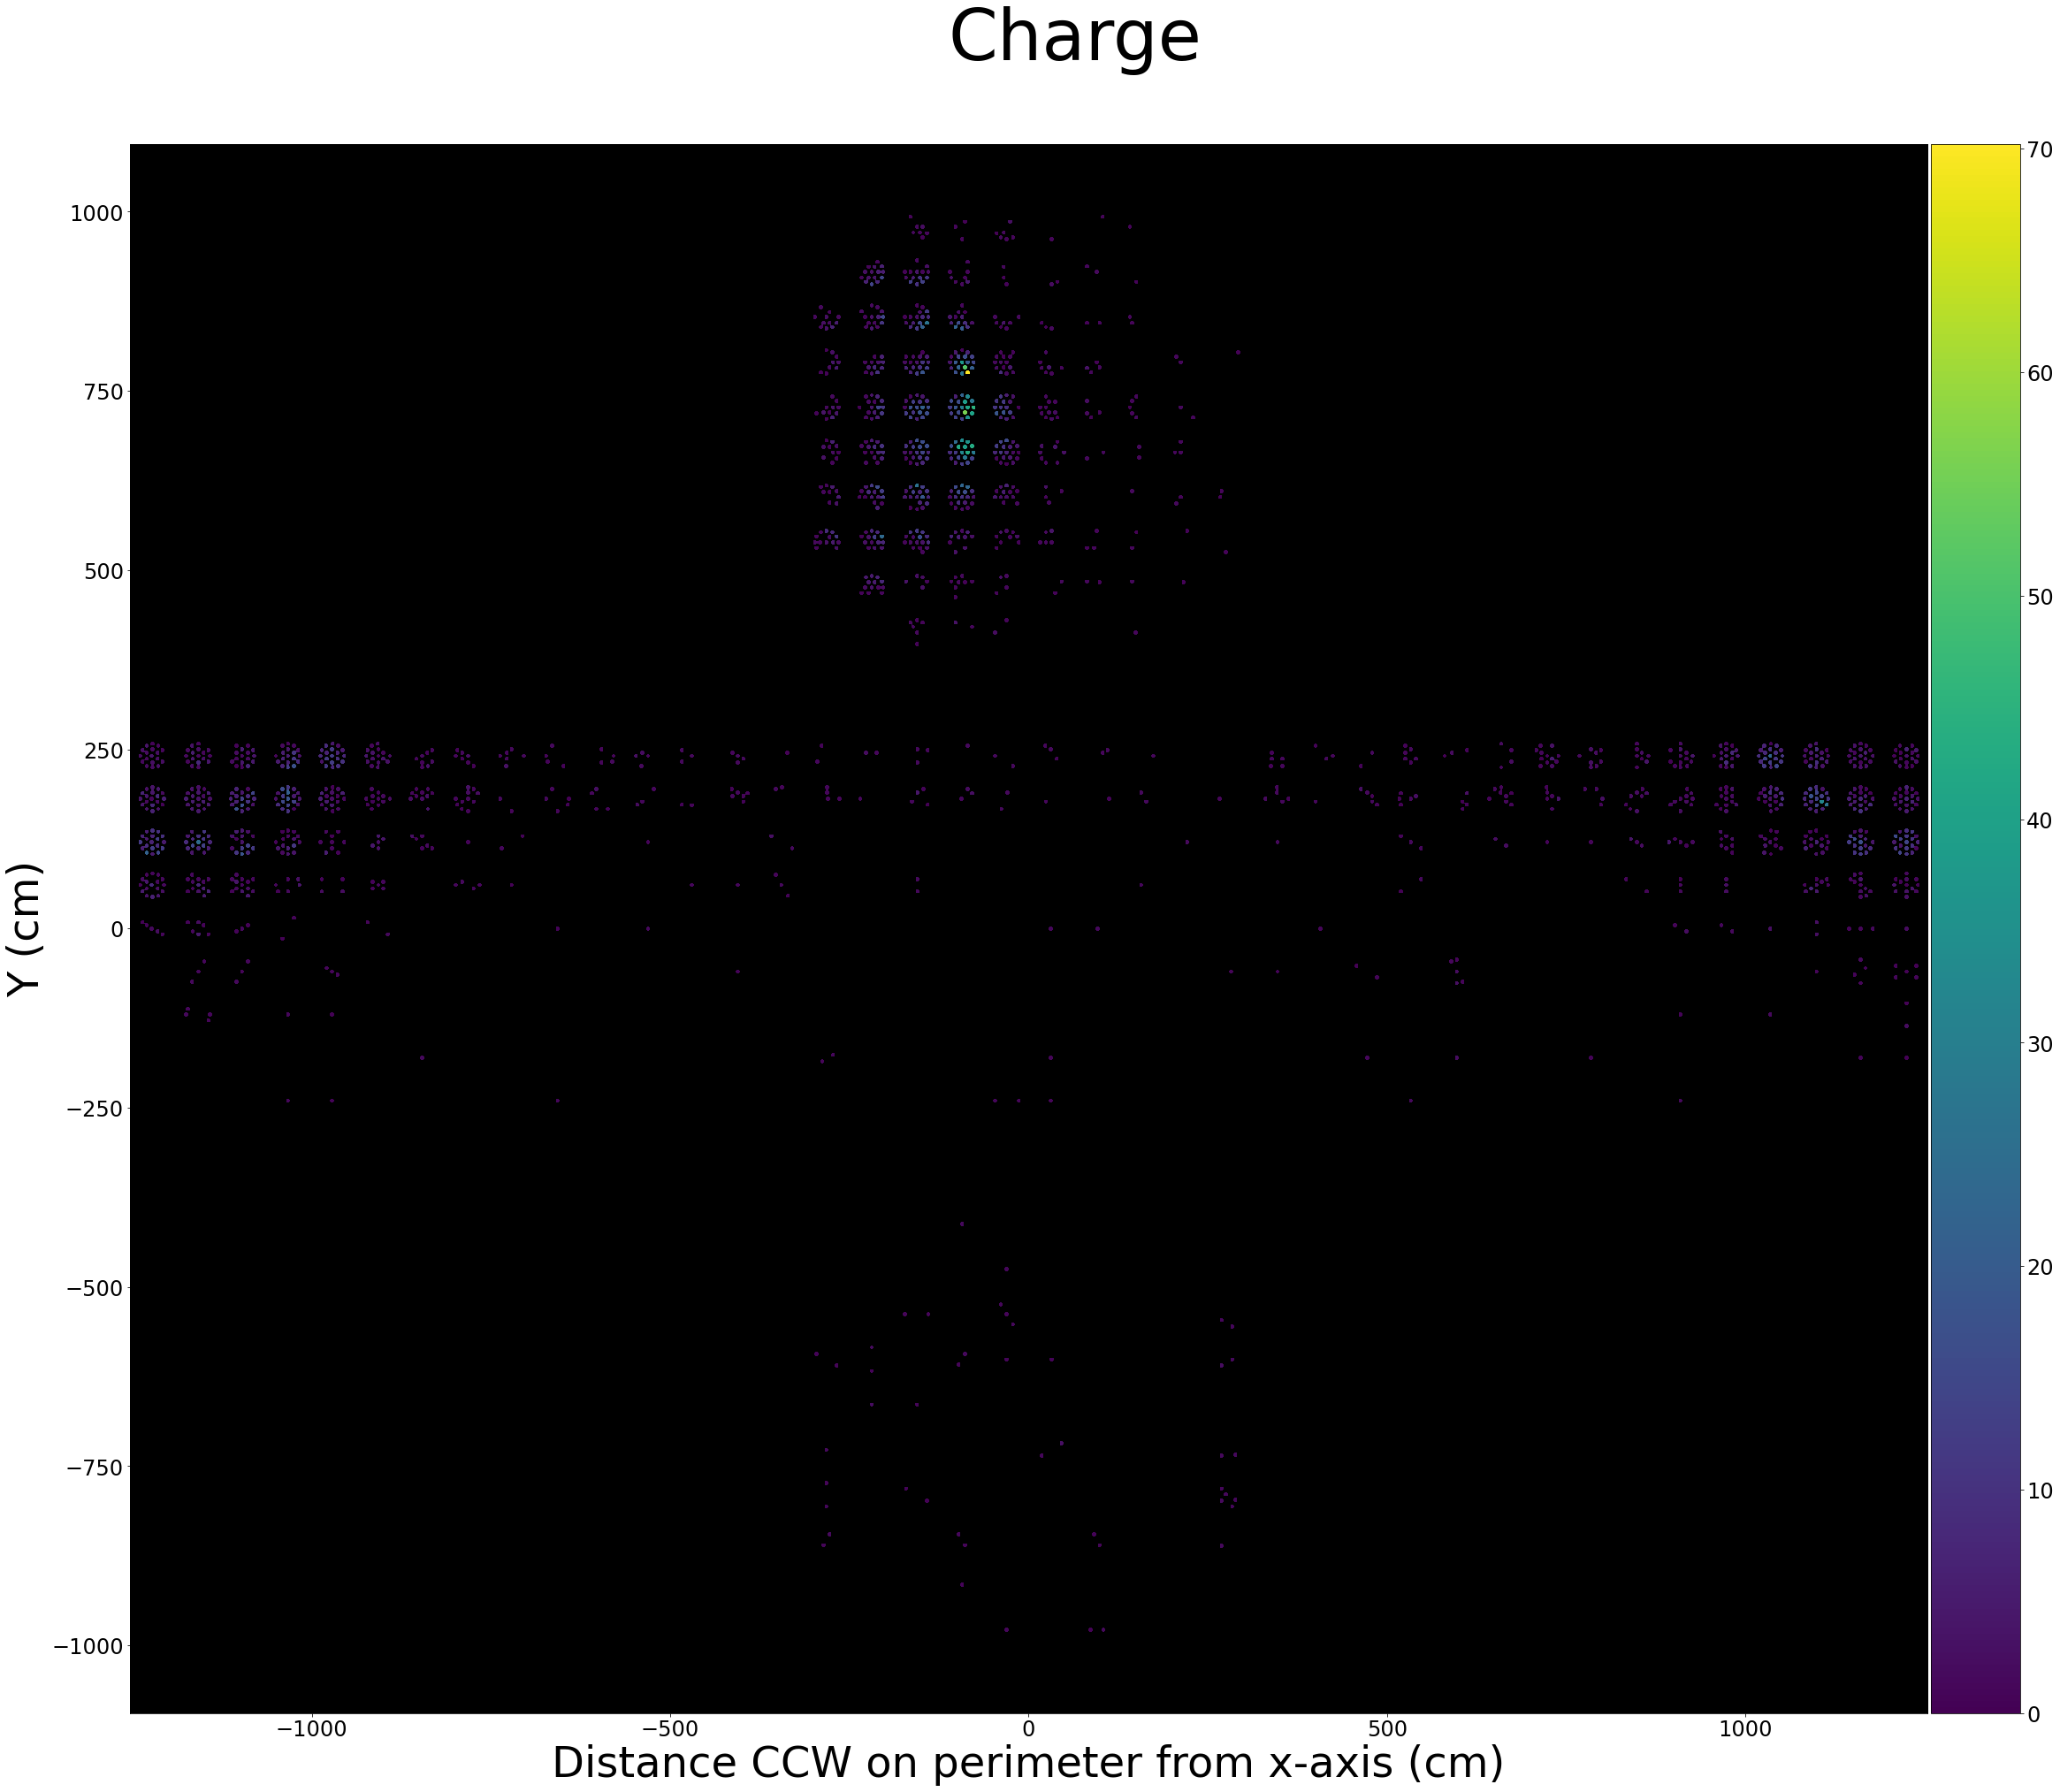

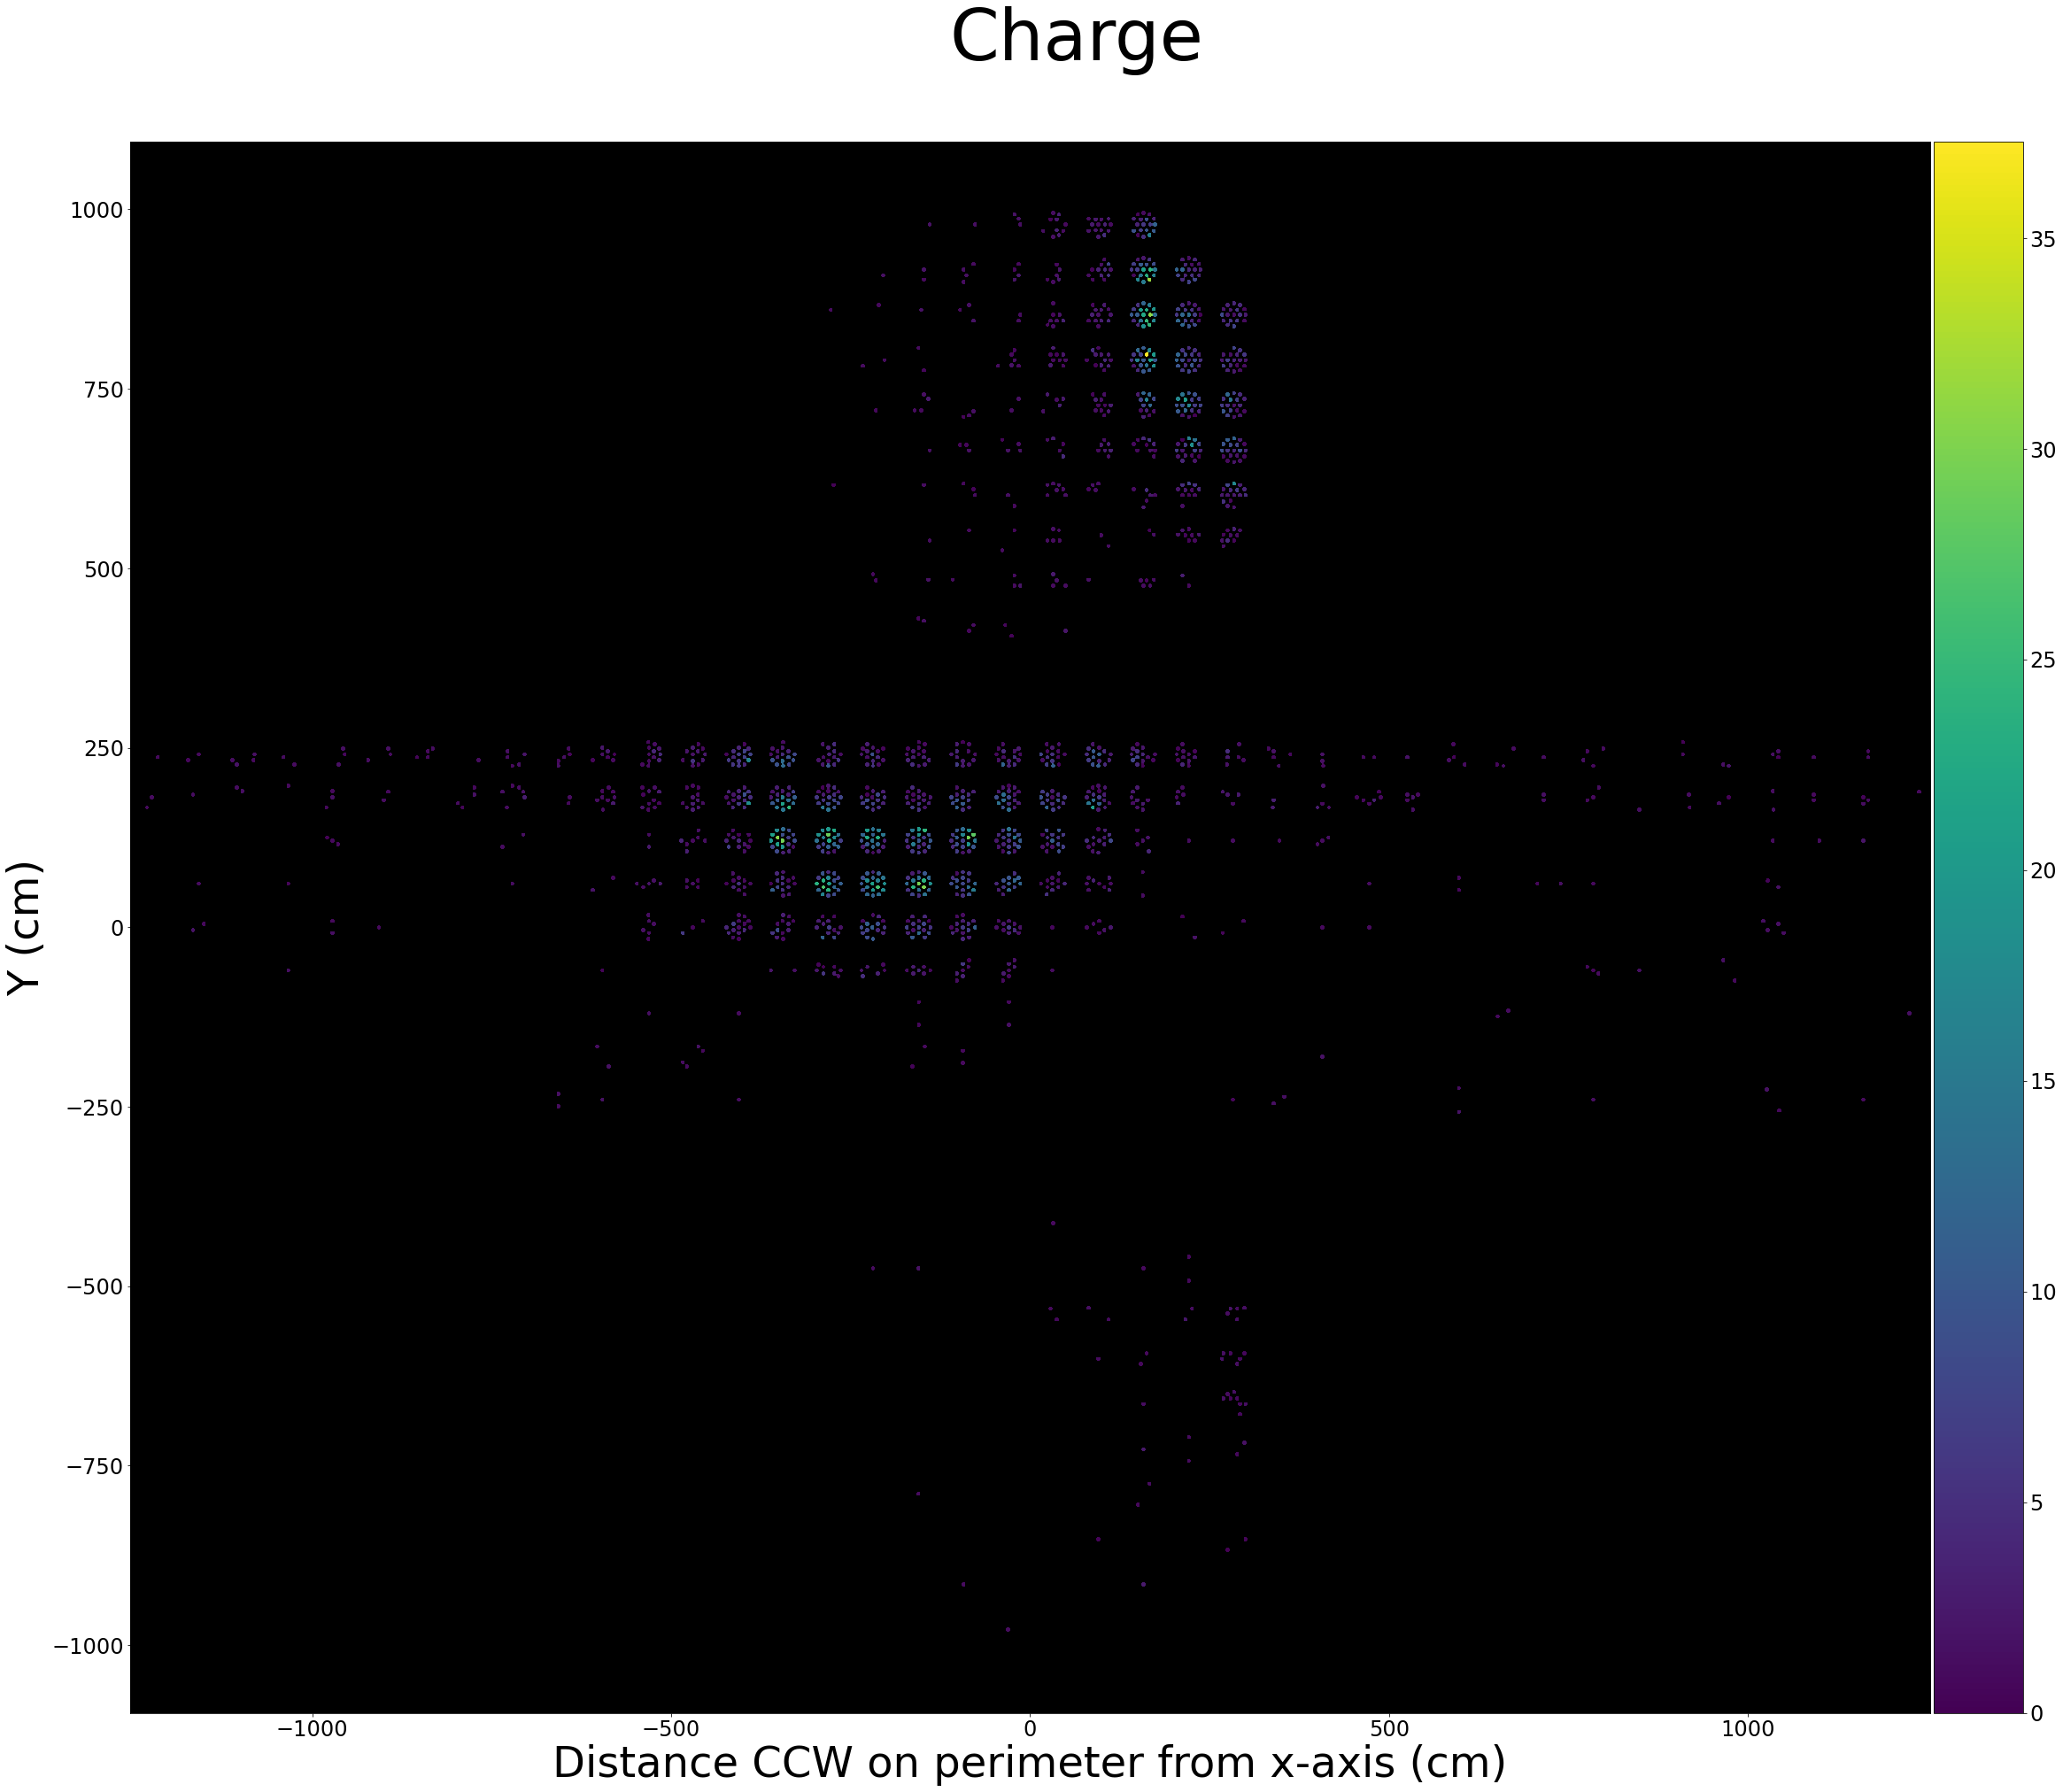

In [67]:
for i in range(30):
    print('idx: ', idxs[i])
    plotter.display_event(idxs[i], dark=True)

<Figure size 432x288 with 0 Axes>

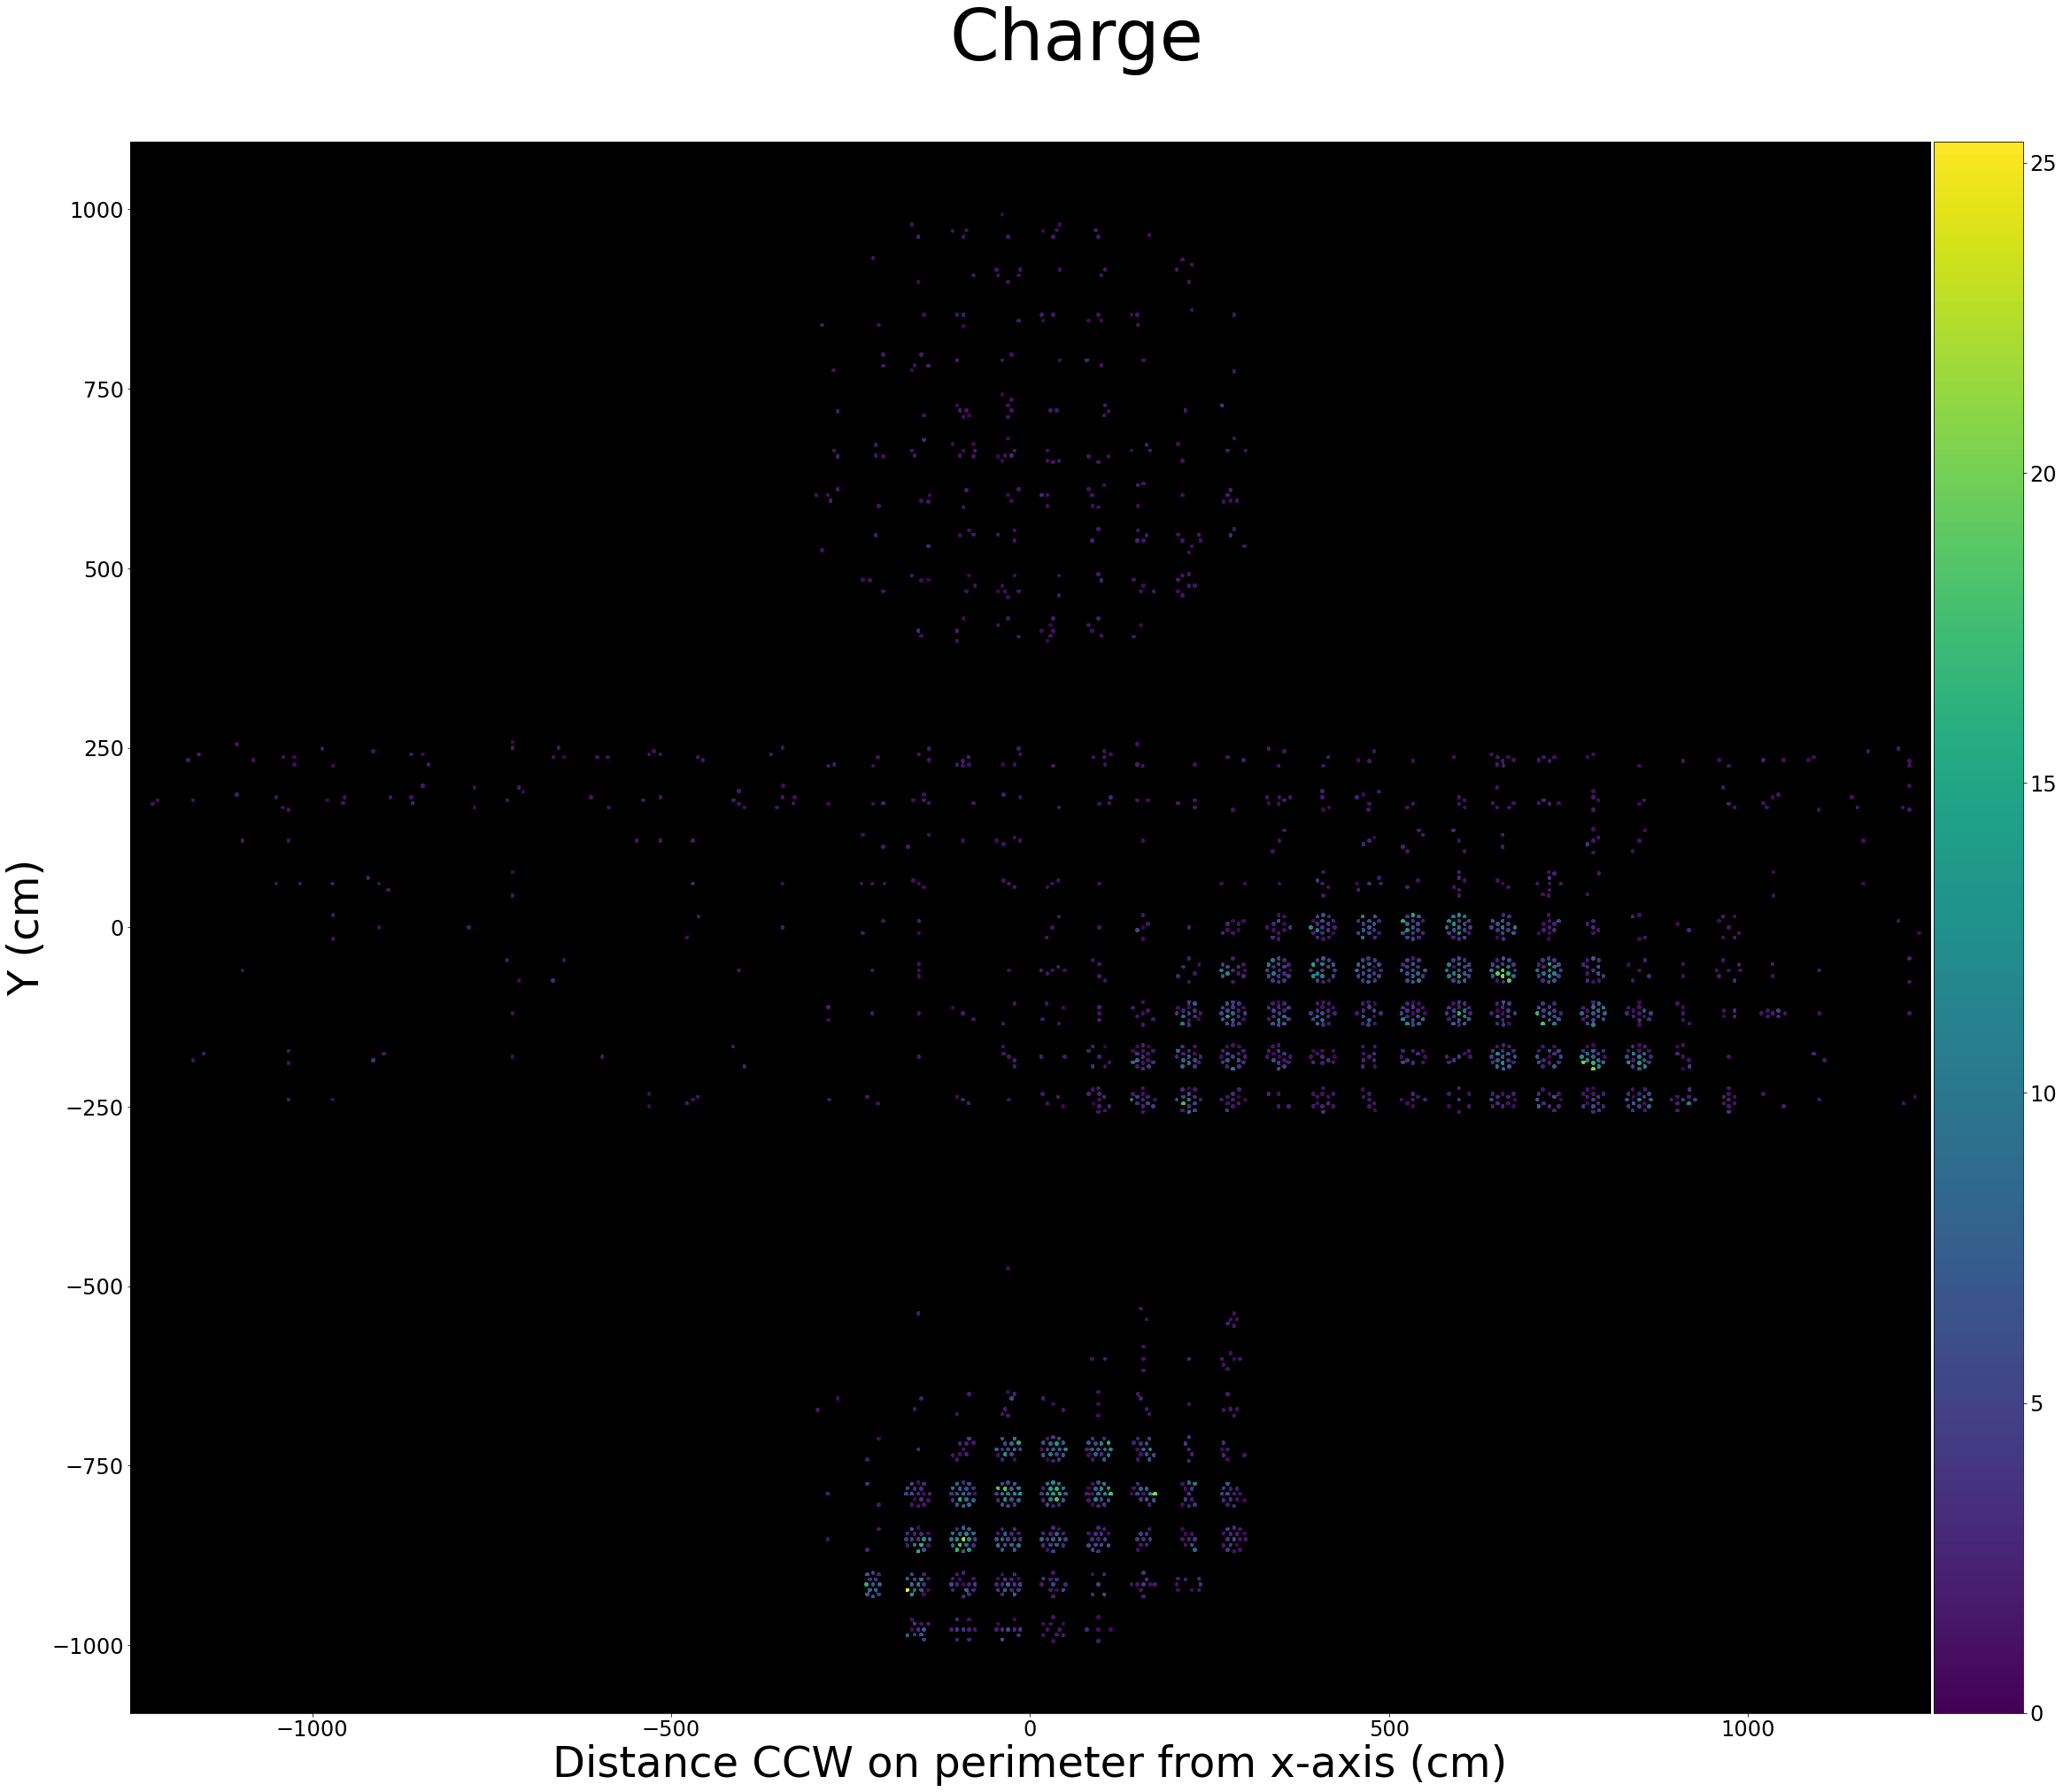

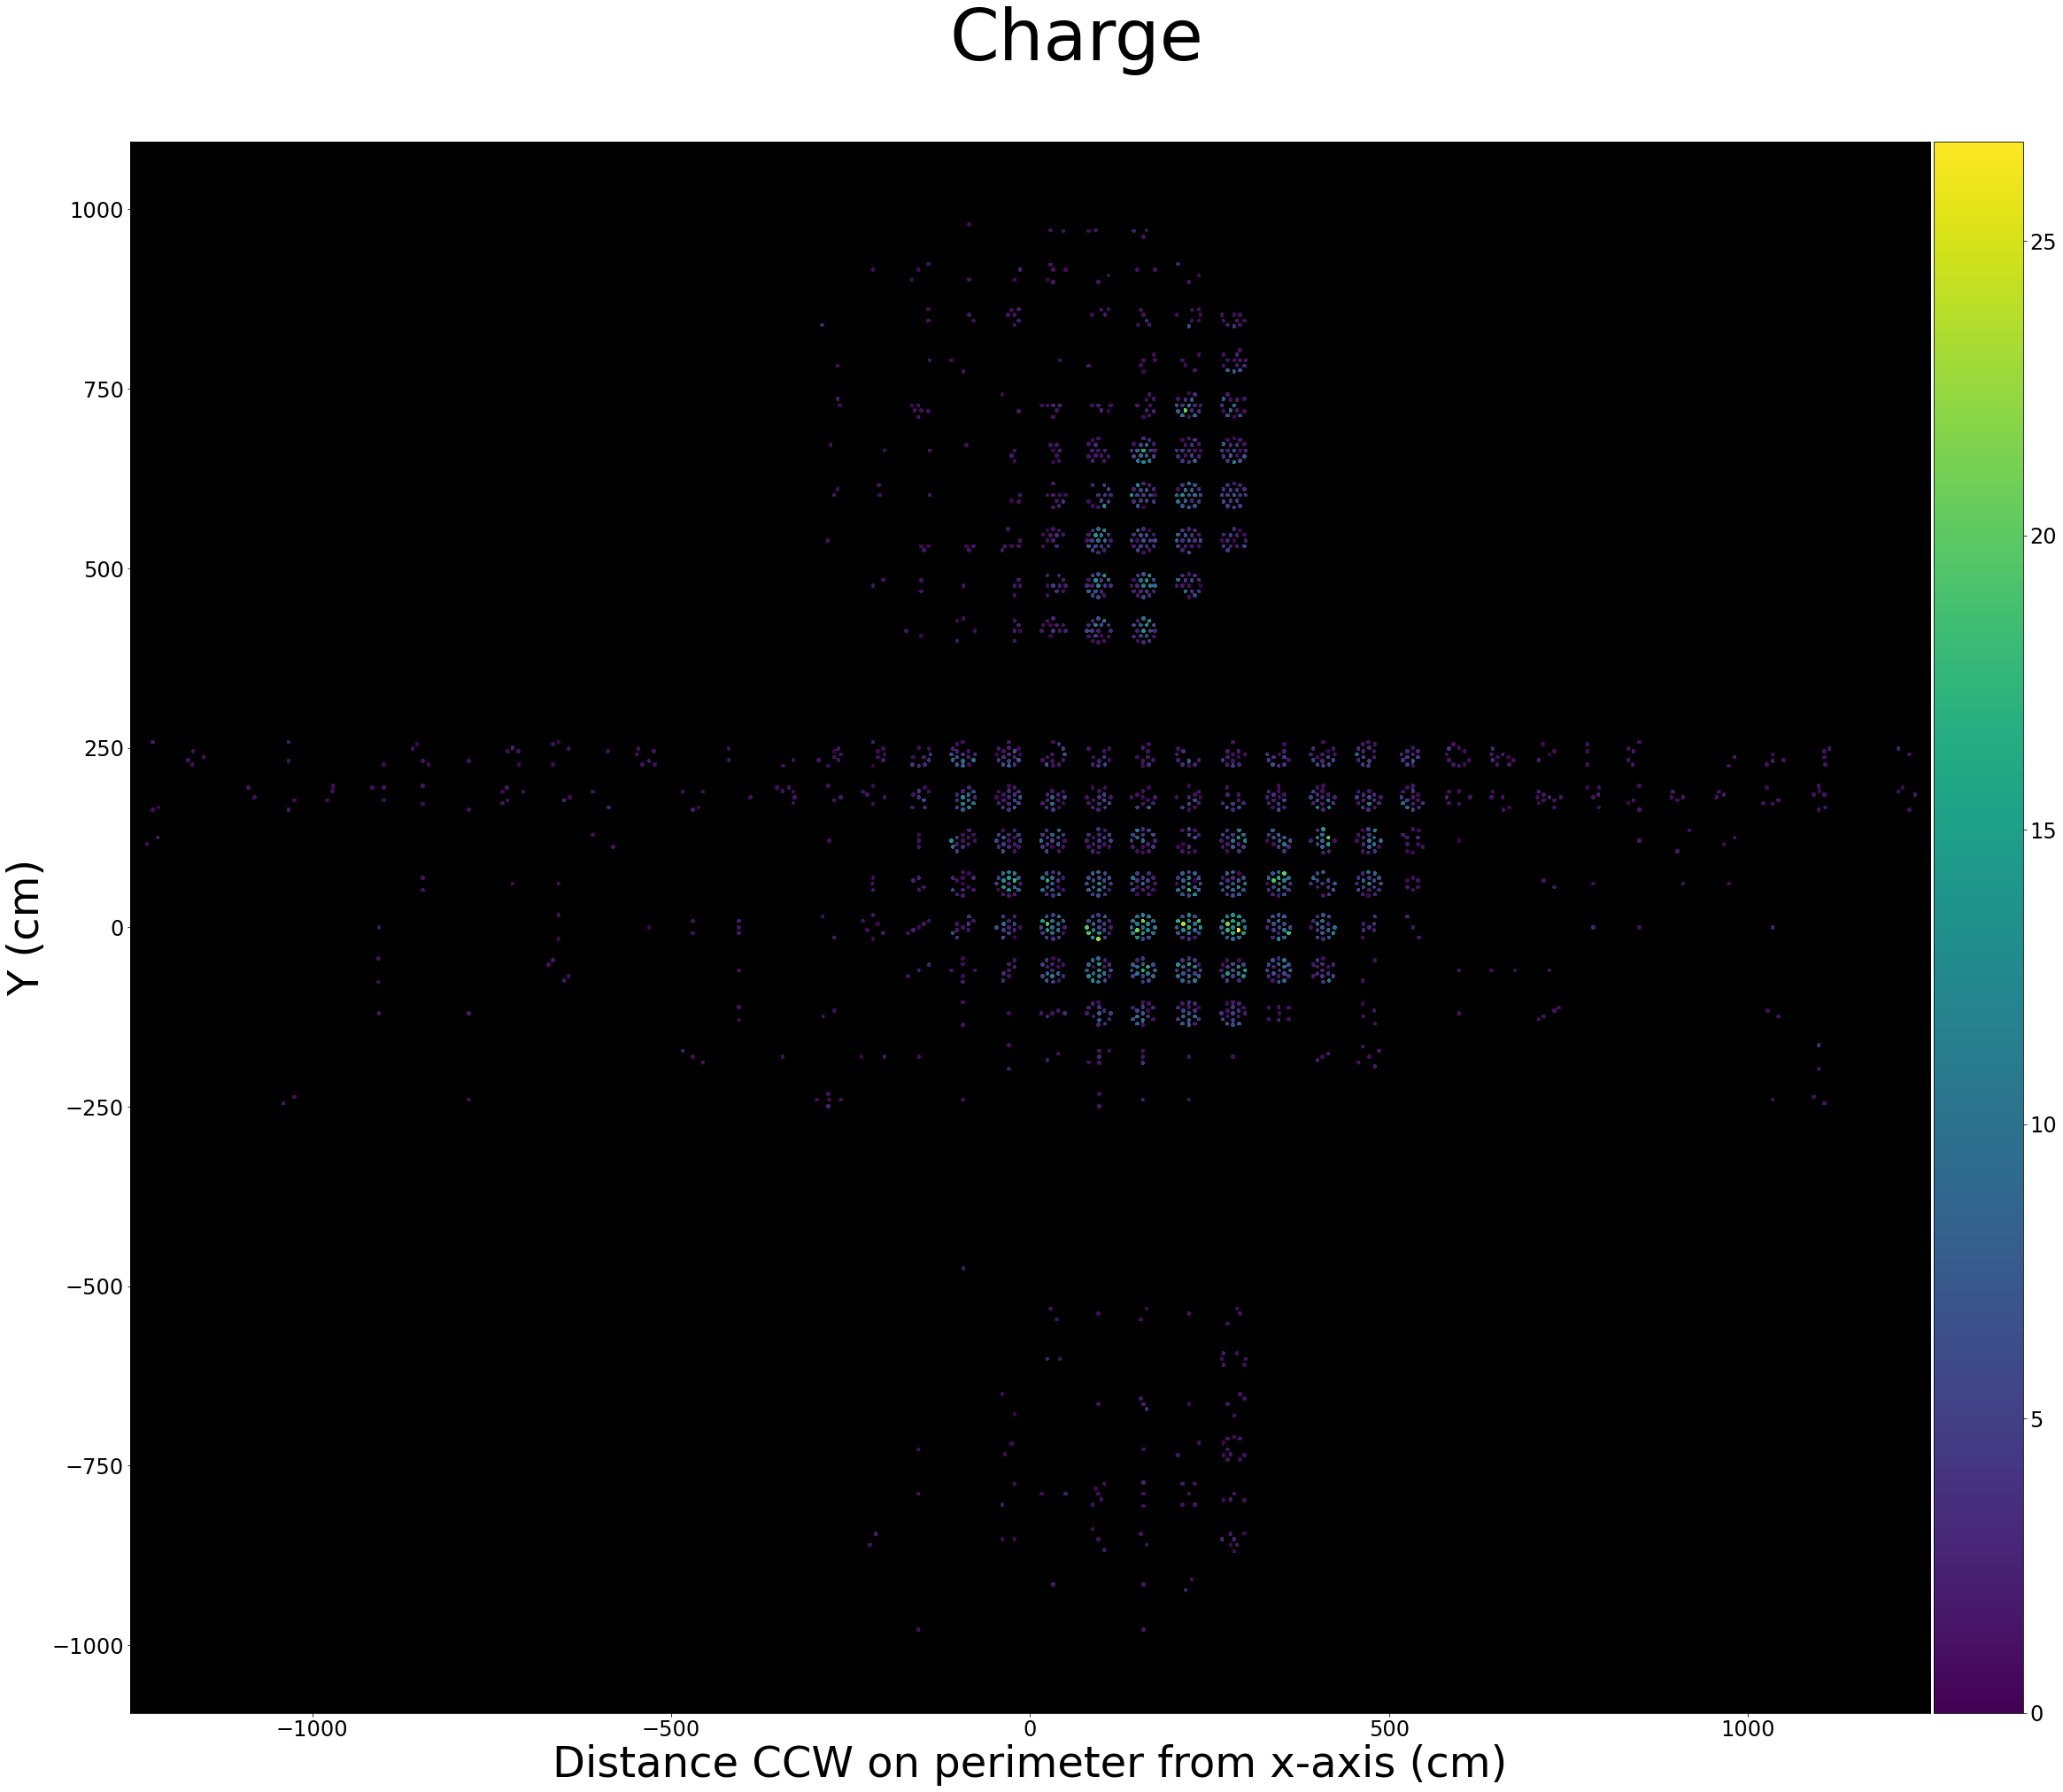

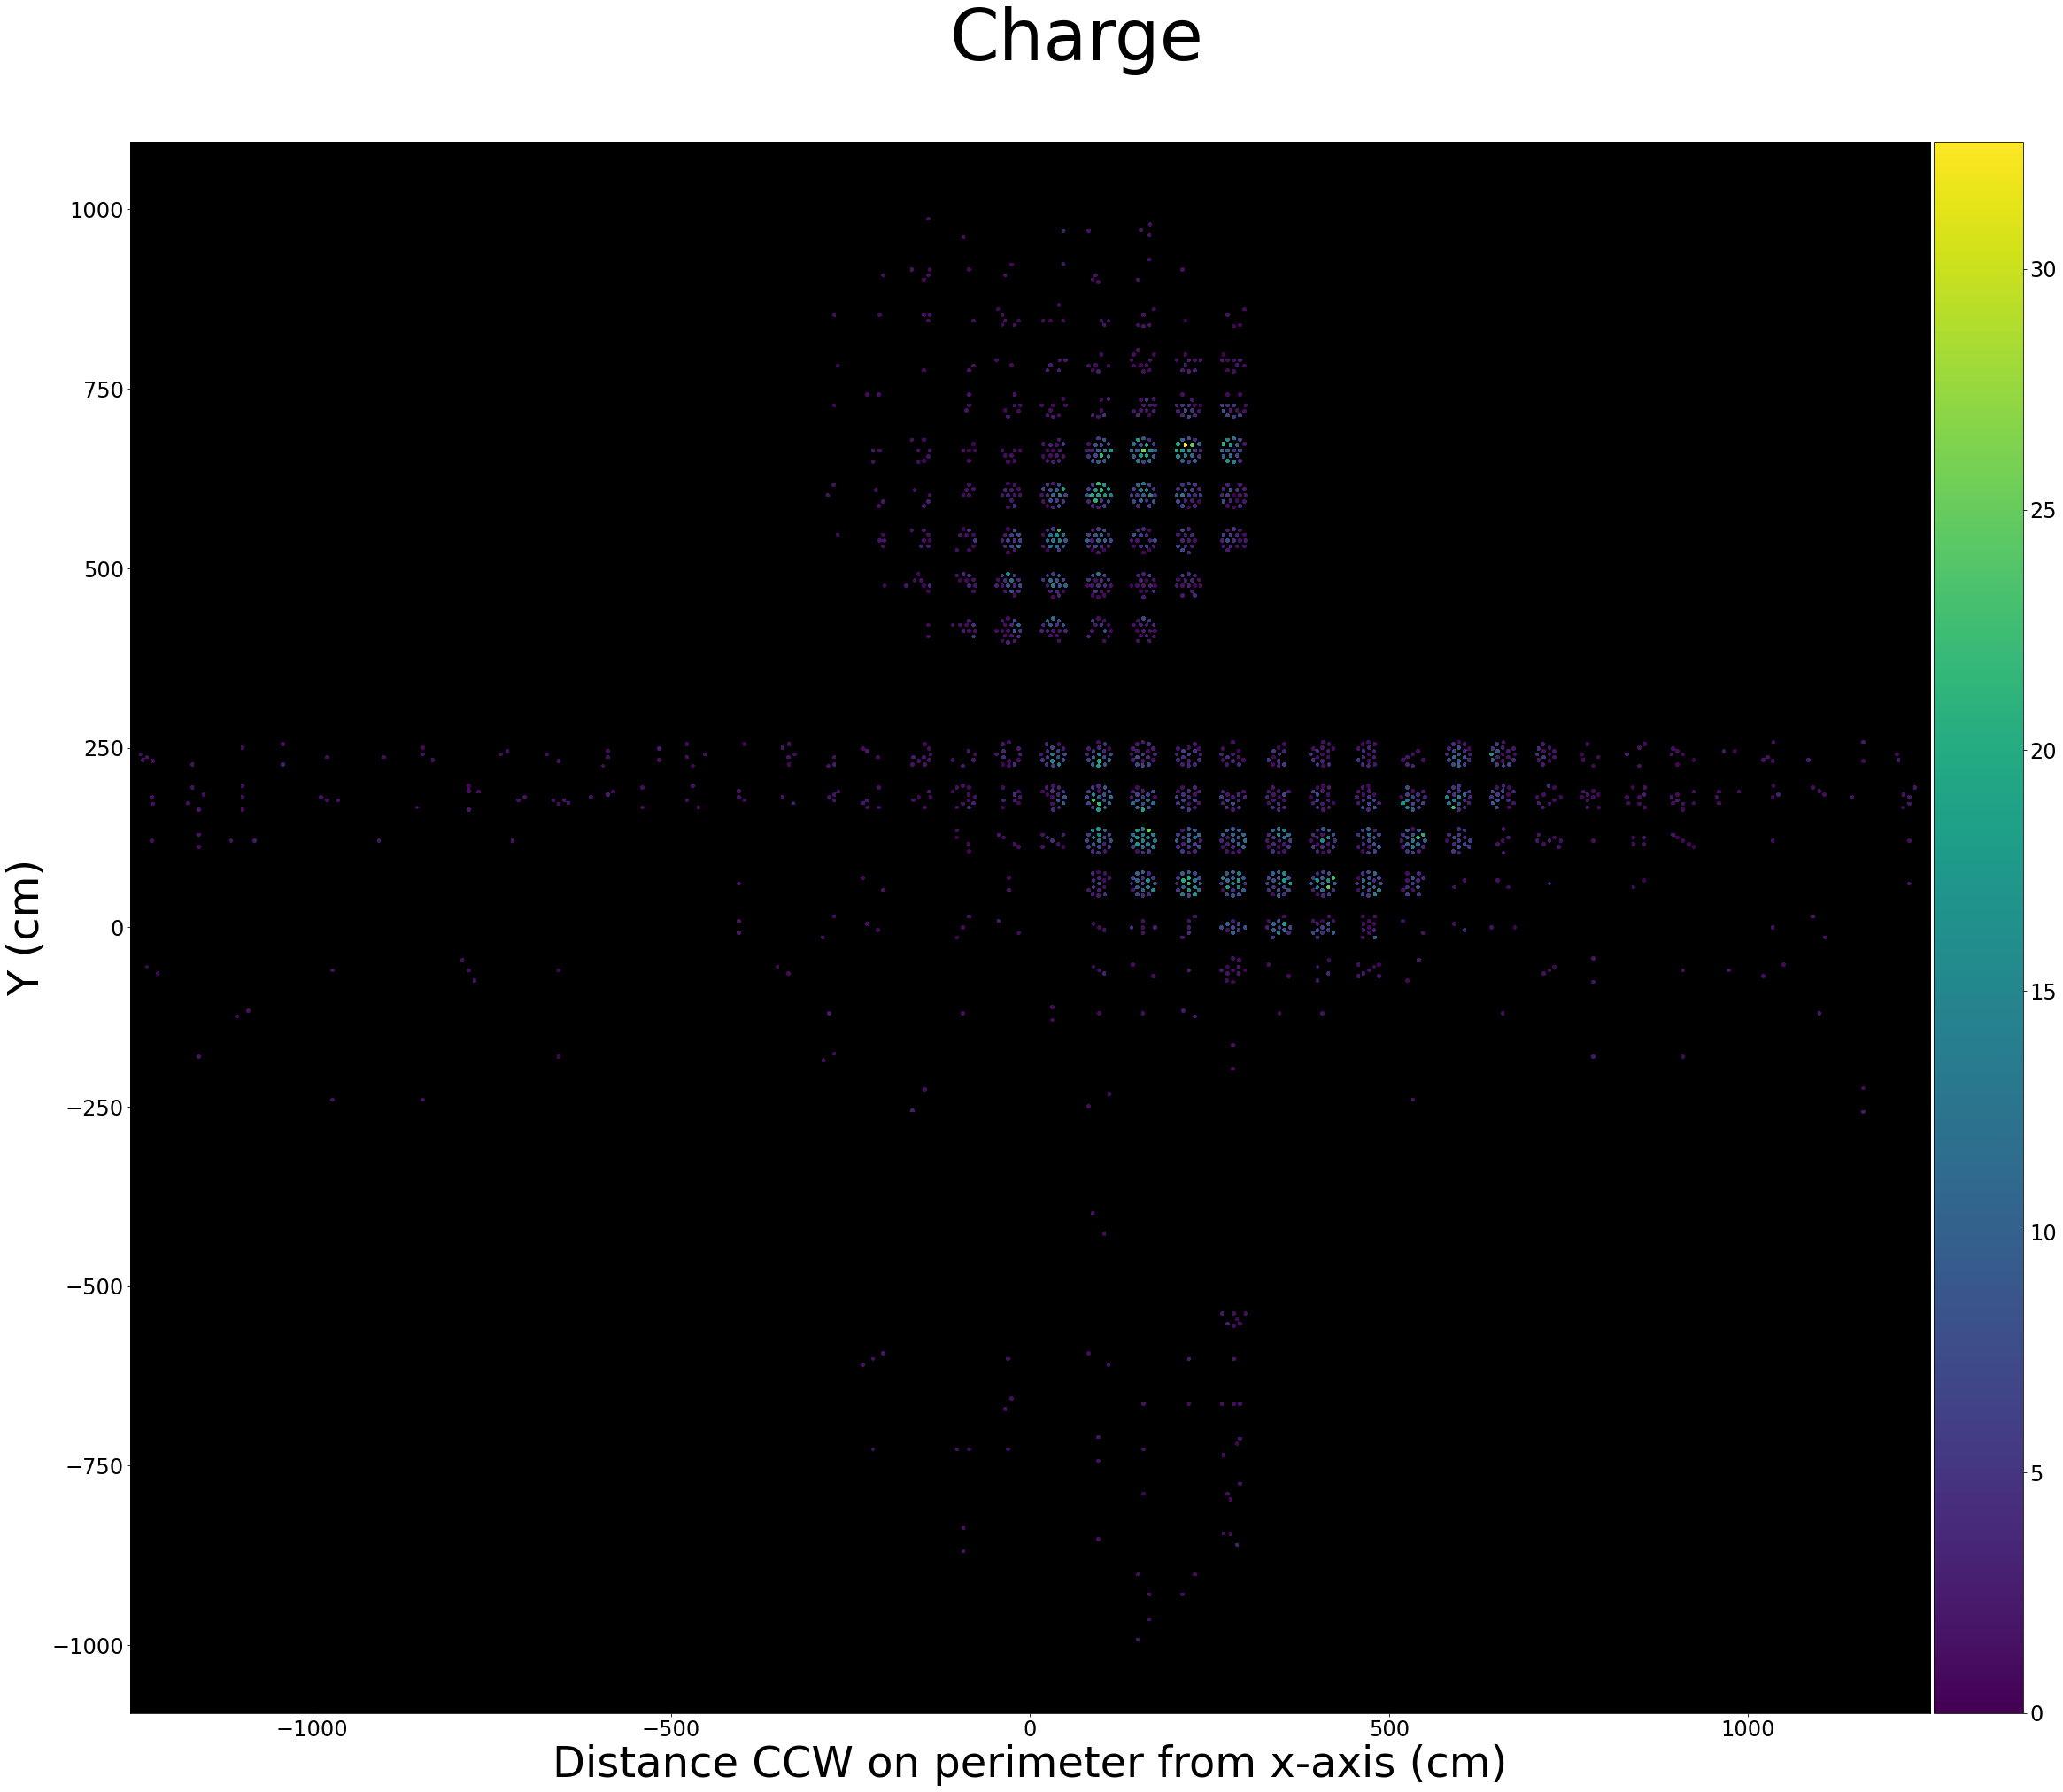

In [69]:
plotter.display_event(269, dark=True)
plotter.display_event(14590, dark=True)
plotter.display_event(23830, dark=True)

In [ ]:
plotter.display_event(269)
plotter.display_event(14590)
plotter.display_event(23830)

In [ ]:
pmts, charges, times = plotter.get_event_data_from_index(1)

In [ ]:
plotter.display_data(pmts, charges, dark=False)

In [ ]:
plotter.display_event(8)

In [ ]:
print(len(plotter.dataset[0]))

In [ ]:
raw_data = plotter.dataset[0]

In [ ]:
print(raw_data.keys())

In [ ]:
print(raw_data['data'].shape)

In [ ]:
print(raw_data['data'].flatten().shape)

# Define Mappings

In [ ]:
import sys
sys.path.append("../..")

In [ ]:
from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import PMT_to_flat_cylinder_mapping, PMT_to_flat_cylinder_map_positive
from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import get_event_data_from_index, EventDisplay, pmts_per_mpmt

In [ ]:
PMTFlatMapping = PMT_to_flat_cylinder_mapping( tubes, tube_xyz )
PMTFlatMapPositive = PMT_to_flat_cylinder_map_positive( tubes, tube_xyz )

# Test Short Tank Plotting

In [ ]:
fig = plt.figure(figsize=[40,40]) 

preimage = np.zeros( [2506, 2496 + 3 + 1] )
for tube in PMTFlatMapPositive:
    for dx in range(-3,4):
        for dy in range(-3,4):
            if abs(dx)==3 and abs(dy)==3:
                continue
            preimage[ PMTFlatMapPositive[tube][1]+dx, PMTFlatMapPositive[tube][0]+dy ] = tube + 5000
plt.imshow( preimage )
fig.suptitle('PMT Tube Number + 5000',fontsize=30)
plt.xlabel('Distance CCW on perimeter from x-axis (cm)', fontsize=24)
plt.ylabel('Y (cm)', fontsize=24)
plt.set_cmap('hot_r')
plt.colorbar()

# Test Event Plotting

In [ ]:
original_data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_oldreflector_e-mu-gamma_E0to1000MeV_digihits.h5"
data_file = h5py.File(original_data_path, "r")


hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(original_data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(original_data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(original_data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

In [ ]:
event_hits_index = np.append(data_file["event_hits_index"], hdf5_hit_pmt.shape[0]).astype(np.int64)

mpmt_positions_file = '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz'
mpmt_positions   = np.load(mpmt_positions_file)['mpmt_image_positions']

data_size = np.max(mpmt_positions, axis=0) + 1
n_channels = pmts_per_mpmt
data_size = np.insert(data_size, 0, n_channels)

In [ ]:
# 0, 12, 14

In [ ]:
test_event_pmts, test_event_charges = get_event_data_from_index(12, hit_pmt, hit_charge, event_hits_index, data_size, mpmt_positions)
EventDisplay(test_event_pmts, test_event_charges, PMTFlatMapPositive, figsize=[15,15])

In [ ]:
labels = np.array(data_file['labels'])
print(labels[12])